In [ ]:
### Modélisation avec toute les variables catégorielles Mean encodée 

# suupresion de incident group dans les modeles

# ENCODAGE

In [ ]:
## Faire différent df en fonction du regroupement fait sur le temsp de réponse

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
#df_V1_1 = pd.read_csv("Data/Data_A_Encoder_V1.1.csv",index_col=0)
df_V2_2 = pd.read_csv("Data/Data_A_Encoder_V2.2.csv")
df_V2_2.head(2)

C:\Users\loreb\AppData\Local\Temp\ipykernel_9476\1538761176.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_V2_2 = pd.read_csv("Data/Data_A_Encoder_V2.2.csv")


IncidentNumber  DateOfCall  Month  Weekday  CalYear           TimeOfCall  \
0      235138081  2009-01-01      1        4     2009  1900-01-01 00:00:37   
1           2091  2009-01-01      1        4     2009  1900-01-01 00:03:00   

   HourOfCall Periode Periode_Rush    IncidentGroup StopCodeDescription  \
0           0    Nuit      No rush  Special Service     Special Service   
1           0    Nuit      No rush             Fire      Secondary Fire   

  SpecialServiceType PropertyCategory            PropertyType  \
0                RTC     Road Vehicle                    Car    
1                NaN          Outdoor  Road surface/pavement    

                        AddressQualifier Postcode_full Postcode_district  \
0  In street close to gazetteer location      SW11 4LB              SW11   
1   In street outside gazetteer location        N9 9EL                N9   

  IncGeo_BoroughName IncGeo_WardNameNew  Easting_m  Northing_m  \
0         WANDSWORTH     Battersea Park   528652.0    176830.0   
1            ENFIELD          Haselbury   533773.0    194492.0   

   Easting_rounded  Northing_rounded   Latitude  Longitude  \
0           528650            176850  51.475812  -0.148894   
1           533750            194450  51.633342  -0.068488   

  IncidentStationGround  FirstPumpArriving_AttendanceTime AttendanceTime_Min  \
0             Battersea                             319.0             3-6min   
1              Edmonton                             308.0             3-6min   

  FirstPumpArriving_DeployedFromStation  Latitude_Station  Longitude_Station  \
0                             Battersea         51.467137          -0.169264   
1                              Edmonton         51.627218          -0.069090   

   NumStationsWithPumpsAttending  NumPumpsAttending  PumpCount  \
0                            2.0                2.0          2   
1                            1.0                1.0          1   

   PumpMinutesRounded  Notional Cost (£)  NumCalls  \
0                  60                255       1.0   
1                  60                255       2.0   

   FirstPumpArriving_TurnoutTimeSec  FirstPumpArriving_TravelTimeSec  \
0                               NaN                              NaN   
1                             151.0                            157.0   

  FirstPump_DelayCode_Description FirstPump_Division_staion   London_Zone  \
0                             NaN                         H  Inner London   
1                             NaN                         A  Outer London   

   Covid_Lockdown  FirstPump_Delayed Week_Weekend  Geodesic_Distance  \
0               0                  0         Week        1713.097276   
1               0                  0         Week         682.664410   

   dst_StationIncident  tempsAPI  
0               2250.5     280.8  
1               1071.1     179.3

In [ ]:
df_V2_2.groupby("London_Zone")["dst_StationIncident"].mean()

In [6]:
df_V2_2 = df_V2_2.drop("Geodesic_Distance", axis=1)

In [5]:
df_V2_2["SpecialServiceType"].value_counts()

SpecialServiceType
RTC                                56243
Effecting entry/exit               34664
Flooding                           26644
No action (not false alarm)        17697
Spills and Leaks (not RTC)         12558
Lift Release                       11179
Assist other agencies              10161
Making Safe (not RTC)               7965
Medical Incident                    5614
Animal assistance incidents         5269
Hazardous Materials incident        4489
Removal of objects from people      4391
Other Transport incident            4215
Other rescue/release of persons     3390
Advice Only                         2904
Suicide/attempts                    1804
Evacuation (no fire)                1159
Stand By                             926
Medical Incident - Co-responder      617
Rescue or evacuation from water      571
Water provision                       36
Name: count, dtype: int64

In [7]:
# remplace les NA par du texte si on veut utiliser la variable dans les modeles
df_V2_2["SpecialServiceType"] = np.where(df_V2_2["SpecialServiceType"].isna(),"Not Special Service",df_V2_2["SpecialServiceType"])
df_V2_2["SpecialServiceType"].value_counts()

SpecialServiceType
Not Special Service                703833
RTC                                 56243
Effecting entry/exit                34664
Flooding                            26644
No action (not false alarm)         17697
Spills and Leaks (not RTC)          12558
Lift Release                        11179
Assist other agencies               10161
Making Safe (not RTC)                7965
Medical Incident                     5614
Animal assistance incidents          5269
Hazardous Materials incident         4489
Removal of objects from people       4391
Other Transport incident             4215
Other rescue/release of persons      3390
Advice Only                          2904
Suicide/attempts                     1804
Evacuation (no fire)                 1159
Stand By                              926
Medical Incident - Co-responder       617
Rescue or evacuation from water       571
Water provision                        36
Name: count, dtype: int64

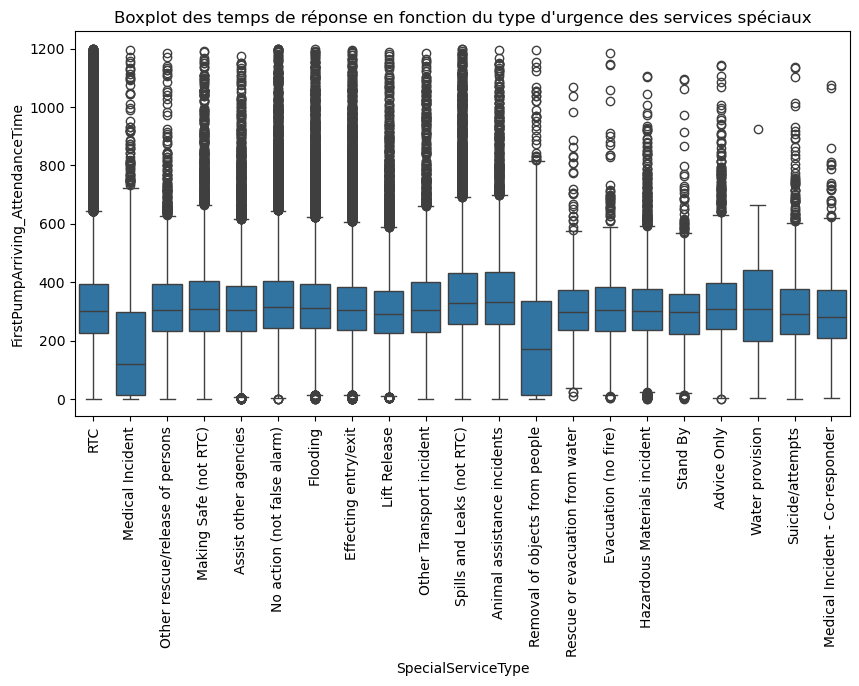

In [21]:
plt.figure(figsize=(10,5))
sns.boxplot(x = "SpecialServiceType", y = "FirstPumpArriving_AttendanceTime",data = df_V2_2)
plt.xticks(rotation = 90)
plt.title("Boxplot des temps de réponse en fonction du type d'urgence des services spéciaux")
plt.show()

In [33]:
# retire les modalités en dessous de 1000 occurences
sst = ["Stand By","Evacuation (no fire)","Medical Incident - Co-responder","Rescue or evacuation from water","Water provision"]

df_V2_2 = df_V2_2[-(df_V2_2.SpecialServiceType.isin(sst))]

df_V2_2.SpecialServiceType.value_counts()

SpecialServiceType
Not Special Service                703833
RTC                                 56243
Effecting entry/exit                34664
Flooding                            26644
No action (not false alarm)         17697
Spills and Leaks (not RTC)          12558
Lift Release                        11179
Assist other agencies               10161
Making Safe (not RTC)                7965
Medical Incident                     5614
Animal assistance incidents          5269
Hazardous Materials incident         4489
Removal of objects from people       4391
Other Transport incident             4215
Other rescue/release of persons      3390
Advice Only                          2904
Suicide/attempts                     1804
Name: count, dtype: int64

In [34]:
df_V2_2["PropertyCategory"].value_counts(normalize=True)

PropertyCategory
Non Residential      0.368062
Dwelling             0.169563
Outdoor              0.142748
Road Vehicle         0.123495
Other Residential    0.098440
Outdoor Structure    0.094957
Rail Vehicle         0.001381
Aircraft             0.000690
Boat                 0.000664
Name: proportion, dtype: float64

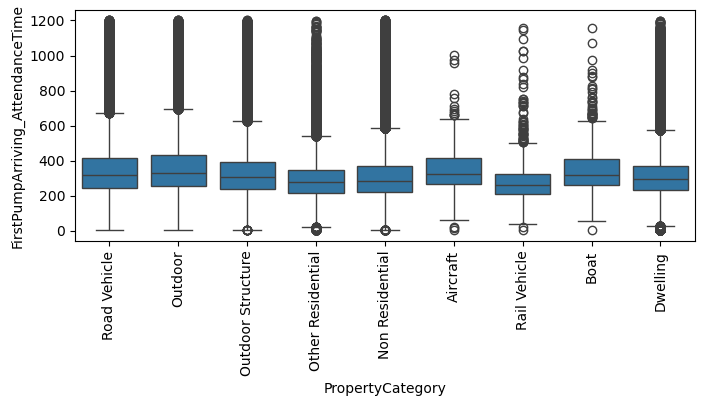

In [8]:
plt.figure(figsize=(8,3))
sns.boxplot(x = "PropertyCategory", y = "FirstPumpArriving_AttendanceTime",data = df_V2_2)
plt.xticks(rotation = 90)

plt.show()

In [24]:
df_V2_2.groupby("PropertyCategory")["FirstPumpArriving_AttendanceTime"].agg(["mean","var",'median',"std","count"])

mean           var  median         std   count
PropertyCategory                                                       
Aircraft           326.945269  15465.043427   314.0  124.358528    1078
Boat               347.778135  21208.227669   316.0  145.630449     622
Dwelling           310.235457  14680.675641   294.0  121.163838  155345
Non Residential    307.318880  18412.012404   286.0  135.690871  336810
Other Residential  291.110920  12958.011391   275.0  113.833261   90065
Outdoor            358.177905  29624.179066   330.0  172.116760  131424
Outdoor Structure  329.612290  22059.230679   304.0  148.523502   86820
Rail Vehicle       280.907874  15239.721215   259.0  123.449266    1270
Road Vehicle       344.393224  29294.171635   316.0  171.155402  112895

In [35]:
# supprime rail vehicule, boat et aircraft car peu d'occurence et trop de diff pour les réunir
vehicule_autre = ["Rail Vehicle","Boat","Aircraft"]

df_V2_2.PropertyCategory = np.where(df_V2_2.PropertyCategory.isin(vehicule_autre),"Other Vehicle",df_V2_2.PropertyCategory)

#df_V2_2 = df_V2_2[-(df_V2_2.PropertyCategory.isin(vehicule_autre))]

df_V2_2.PropertyCategory.value_counts()

PropertyCategory
Non Residential      336048
Dwelling             154814
Outdoor              130332
Road Vehicle         112753
Other Residential     89878
Outdoor Structure     86698
Rail Vehicle           1261
Aircraft                630
Boat                    606
Name: count, dtype: int64

In [39]:
df_V2_2.StopCodeDescription.value_counts()

StopCodeDescription
AFA                               382546
Secondary Fire                    241951
Special Service                   209187
Primary Fire                       79181
Chimney Fire                          91
Late Call                             63
Use of Special Operations Room         1
Name: count, dtype: int64

In [40]:
# gestion des modalité de StopCodeDescription : Supprime Chimne, Late Call et Use of.. car trop peu de modalités.
df_V2_2 = df_V2_2[(df_V2_2['StopCodeDescription'] != "Chimney Fire")]
df_V2_2 = df_V2_2[(df_V2_2['StopCodeDescription'] != "Late Call")]
df_V2_2 = df_V2_2[(df_V2_2['StopCodeDescription'] != "Use of Special Operations Room")]

df_V2_2.StopCodeDescription.value_counts()

StopCodeDescription
AFA                382546
Secondary Fire     241951
Special Service    209187
Primary Fire        79181
Name: count, dtype: int64

In [41]:
# Binarisation pour StopCodeDescription et PropertyCategory et London_Zone
# on conserve la colonne d'origine pour les modèle de classification
# on drop la premiere variables pour eviter le dummy variable trap qui crée de la colinéarité dans les modele de regression

df_V2_2["IncidentGroup_orig"] = df_V2_2["IncidentGroup"]
df_V2_2["StopCodeDescription_orig"] = df_V2_2["StopCodeDescription"]
df_V2_2["PropertyCategory_orig"] = df_V2_2["PropertyCategory"]

df_V2_2 = pd.get_dummies(df_V2_2, columns=["IncidentGroup","StopCodeDescription","PropertyCategory"],prefix = ["Incident","StopCode",""],drop_first=True, dtype='int')

df_V2_2["London_Zone"] = df_V2_2["London_Zone"].replace({'Inner London' : 1, 'Outer London' : 0})

df_V2_2["Week_Weekend"] = df_V2_2["Week_Weekend"].replace({'Week' : 0, 'Weekend' : 1})


C:\Users\loreb\AppData\Local\Temp\ipykernel_1596\1682845997.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_V2_2["London_Zone"] = df_V2_2["London_Zone"].replace({'Inner London' : 1, 'Outer London' : 0})
C:\Users\loreb\AppData\Local\Temp\ipykernel_1596\1682845997.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_V2_2["Week_Weekend"] = df_V2_2["Week_Weekend"].replace({'Week' : 0, 'Weekend' : 1})


In [44]:
max(list(df_V2_2.HourOfCall))

24

In [43]:
# remplace la valeur max pour que ça soit 24 au lieu de 0
df_V2_2["HourOfCall"] = np.where(df_V2_2["HourOfCall"] == 0 , 24,df_V2_2["HourOfCall"])

In [46]:
# Encodage cyclique 

def Encodage_cyclique(df = pd.DataFrame, variable = str) :
        time_cos = np.cos(2*np.pi * df[variable]/df[variable].max())
        time_sin = np.sin(2*np.pi * df[variable]/df[variable].max())
        
        return time_cos, time_sin

# Heure

hour_cos,hour_sin = Encodage_cyclique(df_V2_2, "HourOfCall")
df_V2_2.insert(df_V2_2.columns.get_loc("HourOfCall")+1,'hour_cos',hour_cos)
df_V2_2.insert(df_V2_2.columns.get_loc("HourOfCall")+2,'hour_sin',hour_sin)

# Mois
month_cos,month_sin = Encodage_cyclique(df_V2_2, "Month")
df_V2_2.insert(df_V2_2.columns.get_loc("Month")+1,'month_cos',month_cos)
df_V2_2.insert(df_V2_2.columns.get_loc("Month")+2,'month_sin',month_sin)

#Jour
day_cos,day_sin = Encodage_cyclique(df_V2_2, "Weekday")
df_V2_2.insert(df_V2_2.columns.get_loc("Weekday")+1,'day_cos',day_cos)
df_V2_2.insert(df_V2_2.columns.get_loc("Weekday")+2,'day_sin',day_sin)
df_V2_2.head(2)

IncidentNumber  DateOfCall  Month  month_cos  month_sin  Weekday   day_cos  \
0      235138081  2009-01-01      1   0.866025        0.5        4 -0.900969   
1           2091  2009-01-01      1   0.866025        0.5        4 -0.900969   

    day_sin  CalYear           TimeOfCall  HourOfCall  hour_cos      hour_sin  \
0 -0.433884     2009  1900-01-01 00:00:37          24       1.0 -2.449294e-16   
1 -0.433884     2009  1900-01-01 00:03:00          24       1.0 -2.449294e-16   

  Periode Periode_Rush   SpecialServiceType            PropertyType  \
0    Nuit      No rush                  RTC                    Car    
1    Nuit      No rush  Not Special Service  Road surface/pavement    

                        AddressQualifier Postcode_full Postcode_district  \
0  In street close to gazetteer location      SW11 4LB              SW11   
1   In street outside gazetteer location        N9 9EL                N9   

  IncGeo_BoroughName IncGeo_WardNameNew  Easting_m  Northing_m  \
0         WANDSWORTH     Battersea Park   528652.0    176830.0   
1            ENFIELD          Haselbury   533773.0    194492.0   

   Easting_rounded  Northing_rounded   Latitude  Longitude  \
0           528650            176850  51.475812  -0.148894   
1           533750            194450  51.633342  -0.068488   

  IncidentStationGround  FirstPumpArriving_AttendanceTime AttendanceTime_Min  \
0             Battersea                             319.0             3-6min   
1              Edmonton                             308.0             3-6min   

  FirstPumpArriving_DeployedFromStation  Latitude_Station  Longitude_Station  \
0                             Battersea         51.467137          -0.169264   
1                              Edmonton         51.627218          -0.069090   

   NumStationsWithPumpsAttending  NumPumpsAttending  PumpCount  \
0                            2.0                2.0          2   
1                            1.0                1.0          1   

   PumpMinutesRounded  Notional Cost (£)  NumCalls  \
0                  60                255       1.0   
1                  60                255       2.0   

   FirstPumpArriving_TurnoutTimeSec  FirstPumpArriving_TravelTimeSec  \
0                               NaN                              NaN   
1                             151.0                            157.0   

  FirstPump_DelayCode_Description FirstPump_Division_staion  London_Zone  \
0                             NaN                         H            1   
1                             NaN                         A            0   

   Covid_Lockdown  FirstPump_Delayed  Week_Weekend  dst_StationIncident  \
0               0                  0             0               2250.5   
1               0                  0             0               1071.1   

   tempsAPI IncidentGroup_orig StopCodeDescription_orig PropertyCategory_orig  \
0     280.8    Special Service          Special Service          Road Vehicle   
1     179.3               Fire           Secondary Fire               Outdoor   

   Incident_Fire  Incident_Special Service  StopCode_Primary Fire  \
0              0                         1                      0   
1              1                         0                      0   

   StopCode_Secondary Fire  StopCode_Special Service  _Non Residential  \
0                        0                         1                 0   
1                        1                         0                 0   

   _Other Residential  _Other Vehicle  _Outdoor  _Outdoor Structure  \
0                   0               0         0                   0   
1                   0               0         1                   0   

   _Road Vehicle  
0              1  
1              0

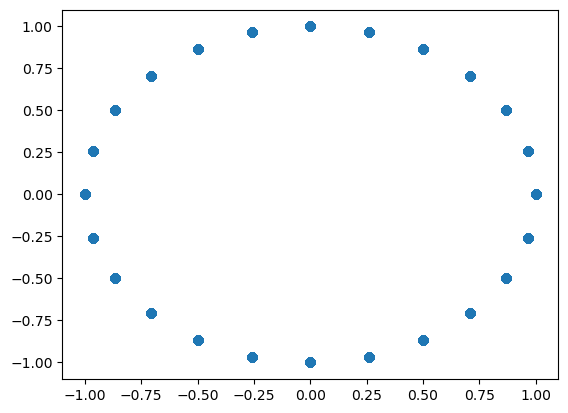

In [47]:
plt.scatter('hour_sin', 'hour_cos', data = df_V2_2)

In [48]:
# frequence de retard par arrondissemment
Retard_arrondissement = df_V2_2.groupby(["IncGeo_BoroughName"], as_index = False)["FirstPump_Delayed"].agg("mean")
Retard_arrondissement.head(2)

IncGeo_BoroughName  FirstPump_Delayed
0  BARKING AND DAGENHAM           0.363928
1                BARNET           0.390074

In [49]:
# frequence de retard par quartier
Retard_ward = df_V2_2.groupby(["IncGeo_WardNameNew"], as_index = False)["FirstPump_Delayed"].agg("mean")
Retard_ward.head(3)

IncGeo_WardNameNew  FirstPump_Delayed
0              Abbey           0.165621
1         Abbey Road           0.171806
2         Abbey Wood           0.325100

In [50]:
# frequence de retard par station
Retard_station = df_V2_2.groupby(["FirstPumpArriving_DeployedFromStation"], as_index = False)["FirstPump_Delayed"].agg("mean")



In [51]:
# frequence de retard par arrondissemment
# création de la nouvelle colonne de fréquence

Retard_arrondissement = df_V2_2.groupby(["IncGeo_BoroughName"])["FirstPump_Delayed"].agg("mean")
df_V2_2["Bo_DelayFreq"] = df_V2_2["IncGeo_BoroughName"].map(Retard_arrondissement)

Retard_ward = df_V2_2.groupby(["IncGeo_WardNameNew"])["FirstPump_Delayed"].agg("mean")
df_V2_2["Ward_DelayFreq"] = df_V2_2["IncGeo_WardNameNew"].map(Retard_ward)

Retard_station = df_V2_2.groupby(["FirstPumpArriving_DeployedFromStation"])["FirstPump_Delayed"].agg("mean")
df_V2_2["Station_DelayFreq"] = df_V2_2["FirstPumpArriving_DeployedFromStation"].map(Retard_station)


In [52]:
df_V2_2 = df_V2_2.reset_index(drop = True)

In [53]:
# Rajout d'une colonne : Quand la station intervention dans sa zone 1 sinon 0

Same_Incident_Station = []
for i in range(0,len(df_V2_2)) :
    if df_V2_2.IncidentStationGround[i] == df_V2_2.FirstPumpArriving_DeployedFromStation[i] :
        Same_Incident_Station.append(1)
    else :
        Same_Incident_Station.append(0)
        


In [54]:
df_V2_2.insert(df_V2_2.columns.get_loc("IncidentStationGround")+1,'Same_Incident_Station',Same_Incident_Station)

df_V2_2.head(2)


IncidentNumber  DateOfCall  Month  month_cos  month_sin  Weekday   day_cos  \
0      235138081  2009-01-01      1   0.866025        0.5        4 -0.900969   
1           2091  2009-01-01      1   0.866025        0.5        4 -0.900969   

    day_sin  CalYear           TimeOfCall  HourOfCall  hour_cos      hour_sin  \
0 -0.433884     2009  1900-01-01 00:00:37          24       1.0 -2.449294e-16   
1 -0.433884     2009  1900-01-01 00:03:00          24       1.0 -2.449294e-16   

  Periode Periode_Rush   SpecialServiceType            PropertyType  \
0    Nuit      No rush                  RTC                    Car    
1    Nuit      No rush  Not Special Service  Road surface/pavement    

                        AddressQualifier Postcode_full Postcode_district  \
0  In street close to gazetteer location      SW11 4LB              SW11   
1   In street outside gazetteer location        N9 9EL                N9   

  IncGeo_BoroughName IncGeo_WardNameNew  Easting_m  Northing_m  \
0         WANDSWORTH     Battersea Park   528652.0    176830.0   
1            ENFIELD          Haselbury   533773.0    194492.0   

   Easting_rounded  Northing_rounded   Latitude  Longitude  \
0           528650            176850  51.475812  -0.148894   
1           533750            194450  51.633342  -0.068488   

  IncidentStationGround  Same_Incident_Station  \
0             Battersea                      1   
1              Edmonton                      1   

   FirstPumpArriving_AttendanceTime AttendanceTime_Min  \
0                             319.0             3-6min   
1                             308.0             3-6min   

  FirstPumpArriving_DeployedFromStation  Latitude_Station  Longitude_Station  \
0                             Battersea         51.467137          -0.169264   
1                              Edmonton         51.627218          -0.069090   

   NumStationsWithPumpsAttending  NumPumpsAttending  PumpCount  \
0                            2.0                2.0          2   
1                            1.0                1.0          1   

   PumpMinutesRounded  Notional Cost (£)  NumCalls  \
0                  60                255       1.0   
1                  60                255       2.0   

   FirstPumpArriving_TurnoutTimeSec  FirstPumpArriving_TravelTimeSec  \
0                               NaN                              NaN   
1                             151.0                            157.0   

  FirstPump_DelayCode_Description FirstPump_Division_staion  London_Zone  \
0                             NaN                         H            1   
1                             NaN                         A            0   

   Covid_Lockdown  FirstPump_Delayed  Week_Weekend  dst_StationIncident  \
0               0                  0             0               2250.5   
1               0                  0             0               1071.1   

   tempsAPI IncidentGroup_orig StopCodeDescription_orig PropertyCategory_orig  \
0     280.8    Special Service          Special Service          Road Vehicle   
1     179.3               Fire           Secondary Fire               Outdoor   

   Incident_Fire  Incident_Special Service  StopCode_Primary Fire  \
0              0                         1                      0   
1              1                         0                      0   

   StopCode_Secondary Fire  StopCode_Special Service  _Non Residential  \
0                        0                         1                 0   
1                        1                         0                 0   

   _Other Residential  _Other Vehicle  _Outdoor  _Outdoor Structure  \
0                   0               0         0                   0   
1                   0               0         1                   0   

   _Road Vehicle  Bo_DelayFreq  Ward_DelayFreq  Station_DelayFreq  
0              1      0.225303        0.167855           0.175985  
1              0      0.457649        0.239731           0.431

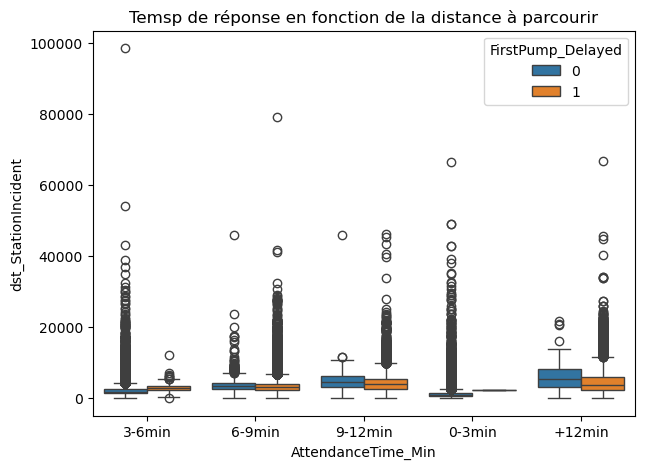

In [55]:
# plot distribution des distances API et geodesic en focntion du temps de réponse
plt.figure(figsize =(7,5))

sns.boxplot(x ="AttendanceTime_Min",y = "dst_StationIncident" ,hue = "FirstPump_Delayed",data=df_V2_2)
plt.title("Temsp de réponse en fonction de la distance à parcourir");



In [56]:
# distance API en fcontion du temps de réponse et si il y a retard ou non
df_V2_2.groupby(["AttendanceTime_Min","FirstPump_Delayed"])[["dst_StationIncident"]].agg(["describe"]) 


dst_StationIncident               \
                                                describe                
                                                   count         mean   
AttendanceTime_Min FirstPump_Delayed                                    
+12min             0                               128.0  6175.825781   
                   1                             18659.0  4582.913355   
0-3min             0                            101291.0  1103.271818   
                   1                                 1.0  2288.100000   
3-6min             0                            538015.0  1958.934663   
                   1                               664.0  2899.149398   
6-9min             0                              1913.0  3584.485416   
                   1                            209776.0  3282.901985   
9-12min            0                               150.0  4980.561333   
                   1                             42268.0  4242.369303   

                                                                              \
                                                                               
                                              std     min       25%      50%   
AttendanceTime_Min FirstPump_Delayed                                           
+12min             0                  4071.536452    69.6  3098.000  5386.70   
                   1                  3274.693206     0.0  2306.500  3782.80   
0-3min             0                  1284.229865     0.0   462.100   796.50   
                   1                          NaN  2288.1  2288.100  2288.10   
3-6min             0                  1004.737211     0.0  1292.500  1822.20   
                   1                  1041.186750   119.1  2199.550  2850.10   
6-9min             0                  2032.603800     0.0  2505.800  3403.90   
                   1                  1467.348359     0.0  2325.875  3162.20   
9-12min            0                  4096.033754    93.8  3121.125  4450.35   
                   1                  2274.337382     0.0  2607.100  3967.40   

                                                         
                                                         
                                           75%      max  
AttendanceTime_Min FirstPump_Delayed                     
+12min             0                  8313.100  21646.5  
                   1                  6053.600  66946.5  
0-3min             0                  1325.200  66458.2  
                   1                  2288.100   2288.1  
3-6min             0                  2454.700  98624.5  
                   1                  3486.775  12180.4  
6-9min             0                  4299.100  46023.1  
                   1                  4056.025  79154.3  
9-12min            0                  6175.625  45950.7  
                   1                  5492.400  46367.6

In [57]:
# determine les outliers "globaux"
IQR = (df_V2_2["dst_StationIncident"].quantile(0.75)) - (df_V2_2["dst_StationIncident"].quantile(0.25)) 
Out_low = (df_V2_2["dst_StationIncident"].quantile(0.25)) -1.5 * IQR
Out_high = (df_V2_2["dst_StationIncident"].quantile(0.75)) +1.5 * IQR

print(Out_low, Out_high)

-1240.6499999999996 5550.15


In [58]:
# calcul IQR de la distance à parcourir en fonction du temps mis
# renvoie les limites des outliers inférieurs et supérieurs pour chaque bin
def calcul_IQR_dst(df = pd.DataFrame, bin = "str") :
    API_IQR = (df[df.AttendanceTime_Min == bin]["dst_StationIncident"].quantile(0.75)) - (df[df.AttendanceTime_Min == bin]["dst_StationIncident"].quantile(0.25)) 
    API_Out_low = (df[df.AttendanceTime_Min == bin]["dst_StationIncident"].quantile(0.25)) -1.5 * API_IQR
    API_Out_high = (df[df.AttendanceTime_Min == bin]["dst_StationIncident"].quantile(0.75)) +1.5 * API_IQR
    
    return API_Out_low, API_Out_high


In [59]:
API_Out_low_03 , API_Out_high_03 = calcul_IQR_dst(df =df_V2_2, bin = "0-3min")
API_Out_low_36 , API_Out_high_36 = calcul_IQR_dst(df =df_V2_2, bin = "3-6min")
API_Out_low_69 , API_Out_high_69 = calcul_IQR_dst(df =df_V2_2, bin = "6-9min")
API_Out_low_912 , API_Out_high_912 = calcul_IQR_dst(df =df_V2_2, bin = "9-12min")
API_Out_low_12 , API_Out_high_12 = calcul_IQR_dst(df =df_V2_2, bin = "+12min")

print(API_Out_low_03,API_Out_high_03)
print(API_Out_low_36,API_Out_high_36)
print(API_Out_low_69,API_Out_high_69)
print(API_Out_low_912,API_Out_high_912)
print(API_Out_low_12,API_Out_high_12)

-832.5500000000001 2619.8500000000004
-452.25 4201.75
-266.7999999999997 6652.4
-1718.3875000000003 9821.9125
-3332.9249999999993 11710.875


In [60]:
# Change les outliers en NA
classes = ["0-3min","3-6min","6-9min","9-12min","+12min"]
API_out_high = [API_Out_high_03,API_Out_high_36,API_Out_high_69,API_Out_high_912,API_Out_high_12]

for classe,outlier in zip(classes,API_out_high): 
    # pour temps de réponse ou il y dépassement de l'outlier en fonction de la classe de temps de réponse, on met un NA si c'est un outlier, sinon on conserve la valeur de base
        df_V2_2.FirstPumpArriving_AttendanceTime = np.where((df_V2_2.AttendanceTime_Min == classe) & (df_V2_2.dst_StationIncident >= outlier),np.nan,df_V2_2.FirstPumpArriving_AttendanceTime)    




In [61]:
df_V2_2.dropna(subset = ["FirstPumpArriving_AttendanceTime"], how = "any", axis = 0, inplace= True)

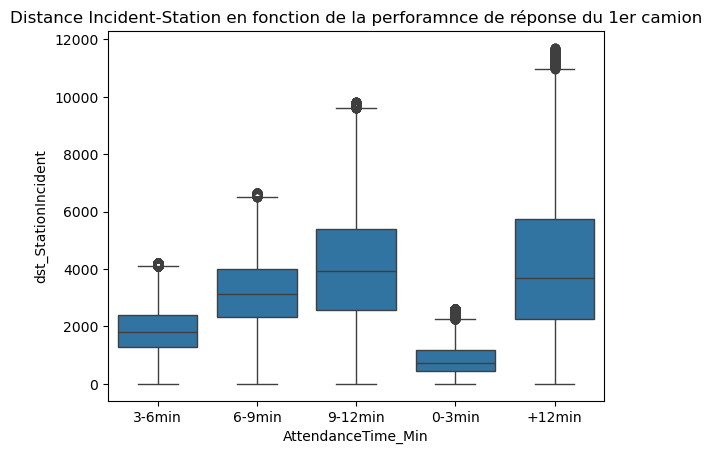

In [62]:
sns.boxplot(x ="AttendanceTime_Min",y = "dst_StationIncident" ,data = df_V2_2)
plt.title("Distance Incident-Station en fonction de la perforamnce de réponse du 1er camion")
plt.show()

# Toujours le probleme de comment gérer les faibles valeurs pour les temps de réponse long

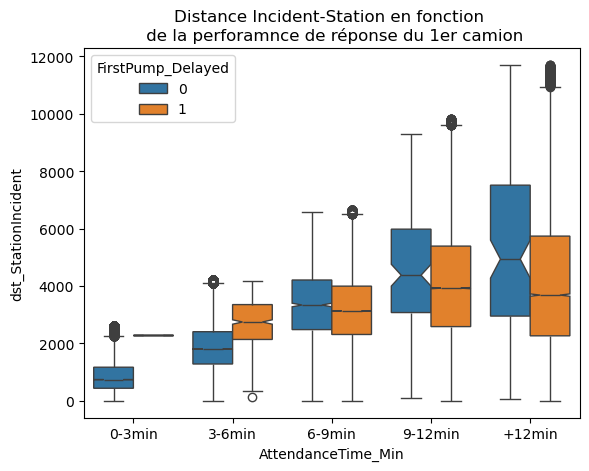

In [63]:
order = ["0-3min","3-6min","6-9min","9-12min","+12min"]
sns.boxplot(x ="AttendanceTime_Min",y = "dst_StationIncident" ,data = df_V2_2,hue = "FirstPump_Delayed",notch = True, order = order)
plt.title("Distance Incident-Station en fonction \n de la perforamnce de réponse du 1er camion");

#### save des df

In [64]:
# réduction des données sur 4 ans
## Conserve les années à partir de 2020 et en retirant les périodes de confinement covid
## Conserve le dataFrame avec toute les années également

df_2020 = df_V2_2[(df_V2_2["CalYear"]>= 2020) & (df_V2_2["Covid_Lockdown"]==0)]

print(df_2020.CalYear.value_counts())
print(df_2020.Covid_Lockdown.value_counts())

df_2020 = df_2020.drop(columns=["Covid_Lockdown"])
display(df_2020.head())

df_V2_2 = df_V2_2.drop(columns=["Covid_Lockdown"])


CalYear
2022    113886
2023     73342
2020     62601
2021     40152
Name: count, dtype: int64
Covid_Lockdown
0    289981
Name: count, dtype: int64


IncidentNumber  DateOfCall  Month  month_cos  month_sin  Weekday  \
575727  000008-01012020  2020-01-01      1   0.866025        0.5        3   
575728  000009-01012020  2020-01-01      1   0.866025        0.5        3   
575729  000011-01012020  2020-01-01      1   0.866025        0.5        3   
575730  000015-01012020  2020-01-01      1   0.866025        0.5        3   
575731  000016-01012020  2020-01-01      1   0.866025        0.5        3   

         day_cos   day_sin  CalYear           TimeOfCall  HourOfCall  \
575727 -0.900969  0.433884     2020  1900-01-01 00:11:05          24   
575728 -0.900969  0.433884     2020  1900-01-01 00:11:16          24   
575729 -0.900969  0.433884     2020  1900-01-01 00:12:02          24   
575730 -0.900969  0.433884     2020  1900-01-01 00:12:52          24   
575731 -0.900969  0.433884     2020  1900-01-01 00:15:29          24   

        hour_cos      hour_sin Periode Periode_Rush    SpecialServiceType  \
575727       1.0 -2.449294e-16    Nuit      No rush   Not Special Service   
575728       1.0 -2.449294e-16    Nuit      No rush   Not Special Service   
575729       1.0 -2.449294e-16    Nuit      No rush   Not Special Service   
575730       1.0 -2.449294e-16    Nuit      No rush   Not Special Service   
575731       1.0 -2.449294e-16    Nuit      No rush  Effecting entry/exit   

                                             PropertyType  \
575727                                 Telephone exchange   
575728                     Small refuse/rubbish container   
575729                        Retirement/Old Persons Home   
575730                             Road surface/pavement    
575731  Purpose Built Flats/Maisonettes - 4 to 9 storeys    

                            AddressQualifier Postcode_full Postcode_district  \
575727             Correct incident location       TW9 1LW               TW9   
575728      On land associated with building        N9 8NB                N9   
575729                  Within same building      SW17 9JH              SW17   
575730  In street outside gazetteer location       KT4 8JS               KT4   
575731             Correct incident location           NaN               SE1   

          IncGeo_BoroughName    IncGeo_WardNameNew  Easting_m  Northing_m  \
575727  RICHMOND UPON THAMES        South Richmond   518296.0    174887.0   
575728               ENFIELD        Lower Edmonton   535304.0    194202.0   
575729            WANDSWORTH      Tooting Broadway   527716.0    171174.0   
575730                SUTTON  Worcester Park North   522816.0    165937.0   
575731             SOUTHWARK    Borough & Bankside        NaN         NaN   

        Easting_rounded  Northing_rounded   Latitude  Longitude  \
575727           518250            174850  51.460614  -0.298579   
575728           535350            194250  51.630370  -0.046492   
575729           527750            171150  51.425195  -0.164395   
575730           522850            165950  51.379212  -0.236646   
575731           532150            179650  51.500349  -0.097501   

       IncidentStationGround  Same_Incident_Station  \
575727              Richmond                      1   
575728              Edmonton                      1   
575729               Tooting                      1   
575730                Sutton                      1   
575731               Dowgate                      0   

        FirstPumpArriving_AttendanceTime AttendanceTime_Min  \
575727                             195.0             3-6min   
575728                             426.0             6-9min   
575729                             249.0             3-6min   
575730                             526.0             6-9min   
575731                             472.0             6-9min   

       FirstPumpArriving_DeployedFromStation  Latitude_Station  \
575727                              Richmond         51.467464   
575728                              Edmonton         51.627218   
575729                      

In [65]:
df_V2_2.to_csv("Data/Data_Encodee_V2_2.csv",index=False)
df_2020.to_csv("Data/Data_Encodee_V2_2_2020.csv",index=False)



# Encodage des varaibles catégorielle pas encore fait car utilisation de mean encoding sur les données d'entrainement pour limité le data leakage
# re check les corrélation avec les varirbles catégorielles mean encodées


# MODELISATION

In [ ]:
conda install conda-forge::feature_engine 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from feature_engine.encoding import MeanEncoder
from sklearn.feature_selection import SelectKBest,f_regression,mutual_info_regression,SelectFromModel, mutual_info_classif

from sklearn.model_selection import cross_val_score,StratifiedKFold
from sklearn.metrics import mean_squared_error,mean_absolute_error, root_mean_squared_error,r2_score, mutual_info_score

from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LinearRegression


In [2]:
df_2020 = pd.read_csv("../Data_Encodee_V2_2_2020.csv")
pd.set_option("display.max_columns",70)

## passe la distance en kilometres
df_2020["dst_StationIncident"] = df_2020["dst_StationIncident"]/1000
df_2020["dst_StationIncident"].describe()
df_2020.head(2)

IncidentNumber  DateOfCall  Month  month_cos  month_sin  Weekday  \
0  000008-01012020  2020-01-01      1   0.866025        0.5        3   
1  000009-01012020  2020-01-01      1   0.866025        0.5        3   

    day_cos   day_sin  CalYear           TimeOfCall  HourOfCall  hour_cos  \
0 -0.900969  0.433884     2020  1900-01-01 00:11:05          24       1.0   
1 -0.900969  0.433884     2020  1900-01-01 00:11:16          24       1.0   

       hour_sin Periode Periode_Rush   SpecialServiceType  \
0 -2.449294e-16    Nuit      No rush  Not Special Service   
1 -2.449294e-16    Nuit      No rush  Not Special Service   

                     PropertyType                  AddressQualifier  \
0              Telephone exchange         Correct incident location   
1  Small refuse/rubbish container  On land associated with building   

  Postcode_full Postcode_district    IncGeo_BoroughName IncGeo_WardNameNew  \
0       TW9 1LW               TW9  RICHMOND UPON THAMES     South Richmond   
1        N9 8NB                N9               ENFIELD     Lower Edmonton   

   Easting_m  Northing_m  Easting_rounded  Northing_rounded   Latitude  \
0   518296.0    174887.0           518250            174850  51.460614   
1   535304.0    194202.0           535350            194250  51.630370   

   Longitude IncidentStationGround  Same_Incident_Station  \
0  -0.298579              Richmond                      1   
1  -0.046492              Edmonton                      1   

   FirstPumpArriving_AttendanceTime AttendanceTime_Min  \
0                             195.0             3-6min   
1                             426.0             6-9min   

  FirstPumpArriving_DeployedFromStation  Latitude_Station  Longitude_Station  \
0                              Richmond         51.467464          -0.284855   
1                              Edmonton         51.627218          -0.069090   

   NumStationsWithPumpsAttending  NumPumpsAttending  PumpCount  \
0                            1.0                1.0          1   
1                            1.0                1.0          1   

   PumpMinutesRounded  Notional Cost (£)  NumCalls  \
0                  60                339       1.0   
1                  60                339       1.0   

   FirstPumpArriving_TurnoutTimeSec  FirstPumpArriving_TravelTimeSec  \
0                              60.0                            135.0   
1                             108.0                            318.0   

  FirstPump_DelayCode_Description FirstPump_Division_staion  London_Zone  \
0                             NaN                         H            0   
1         Traffic, roadworks, etc                         A            0   

   FirstPump_Delayed  Week_Weekend  dst_StationIncident  tempsAPI  \
0                  0             0               1.7365     210.0   
1                  1             0               2.0598     281.4   

  IncidentGroup_orig StopCodeDescription_orig PropertyCategory_orig  \
0        False Alarm                      AFA       Non Residential   
1               Fire           Secondary Fire     Outdoor Structure   

   Incident_Fire  Incident_Special Service  StopCode_Primary Fire  \
0              0                         0                      0   
1              1                         0                      0   

   StopCode_Secondary Fire  StopCode_Special Service  _Non Residential  \
0                        0                         0                 1   
1                        1                         0                 0   

   _Other Residential  _Other Vehicle  _Outdoor  _Outdoor Structure  \
0                   0               0         0                   0   
1                   0               0         0                   1   

   _Road Vehicle  Bo_DelayFreq  Ward_DelayFreq  Station_DelayFreq  
0              0      0.394037        0.266184           0.329016  
1              0      0.457649        0.291587           0.431141

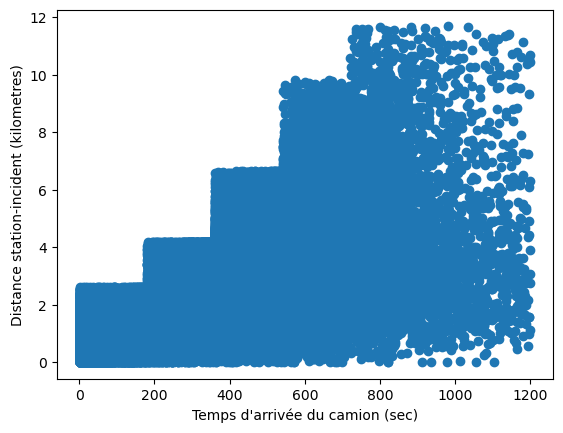

In [8]:
plt.scatter("FirstPumpArriving_AttendanceTime" ,"dst_StationIncident", data = df_2020)
plt.xlabel("Temps d'arrivée du camion (sec)")
plt.ylabel("Distance station-incident (kilometres)")

plt.show()



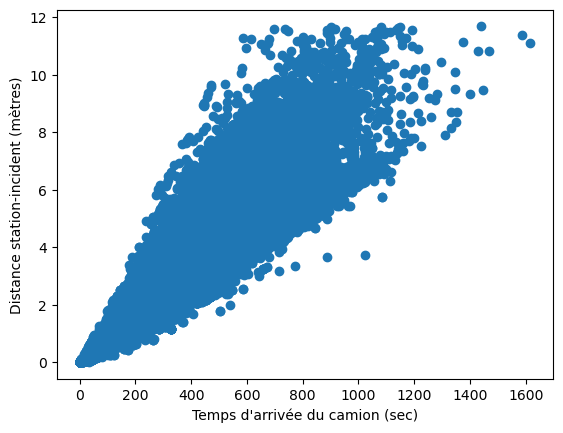

In [11]:
plt.scatter("tempsAPI" ,"dst_StationIncident"  , data = df_2020)
plt.xlabel("Temps d'arrivée du camion (sec)")
plt.ylabel("Distance station-incident (kilomètres)")

plt.show()



In [3]:
TempsAPI_Min = pd.cut(df_2020.tempsAPI,bins= [0,180,360,540,720,1200],include_lowest=False,right =True, labels = ["0-3min","3-6min","6-9min","9-12min","+12min"])


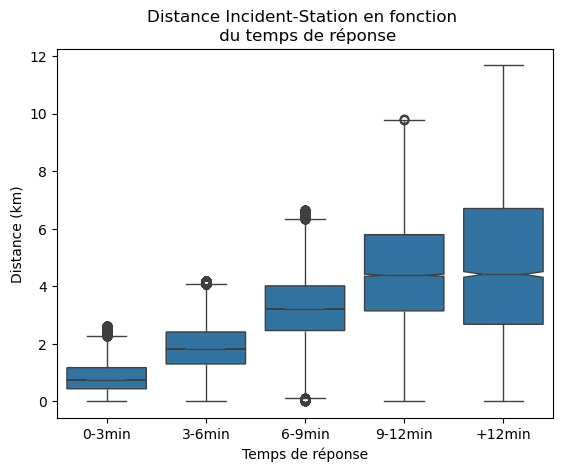

In [10]:
order = ["0-3min","3-6min","6-9min","9-12min","+12min"]
sns.boxplot(x = "AttendanceTime_Min" ,y = "dst_StationIncident" ,data = df_2020,notch = True, order = order)
plt.ylabel("Distance (km)")
plt.xlabel("Temps de réponse")
plt.title("Distance Incident-Station en fonction \n du temps de réponse");


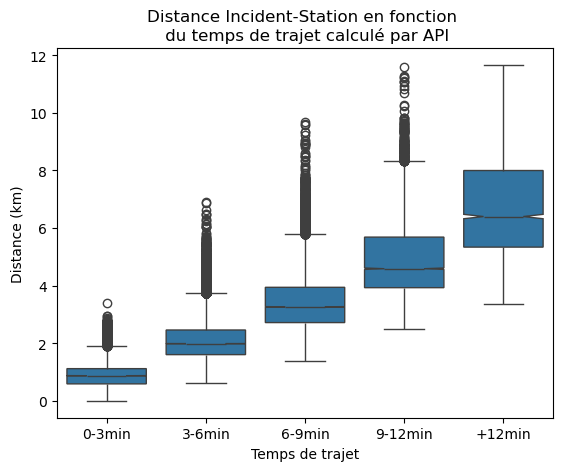

In [33]:
order = ["0-3min","3-6min","6-9min","9-12min","+12min"]
sns.boxplot(x = TempsAPI_Min ,y = "dst_StationIncident" ,data = df_2020,notch = True, order = order)
plt.ylabel("Distance (km)")
plt.xlabel("Temps de trajet")
plt.title("Distance Incident-Station en fonction \n du temps de trajet calculé par API");


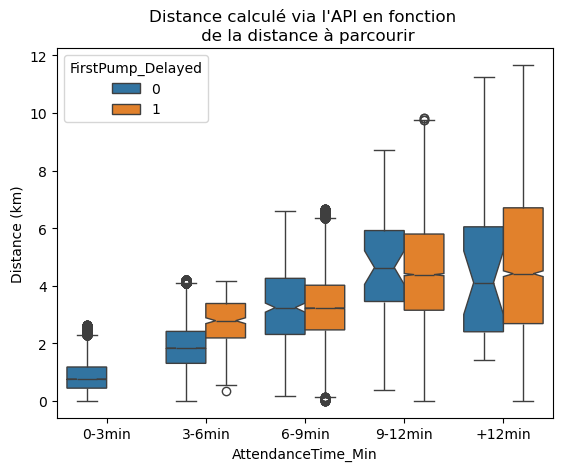

In [38]:
order = ["0-3min","3-6min","6-9min","9-12min","+12min"]
sns.boxplot(x ="AttendanceTime_Min",y = df_2020.dst_StationIncident ,data = df_2020,hue = "FirstPump_Delayed",notch = True, order = order)
plt.ylabel("Distance (km)")
plt.title("Distance calculé via l'API en fonction \n de la distance à parcourir");


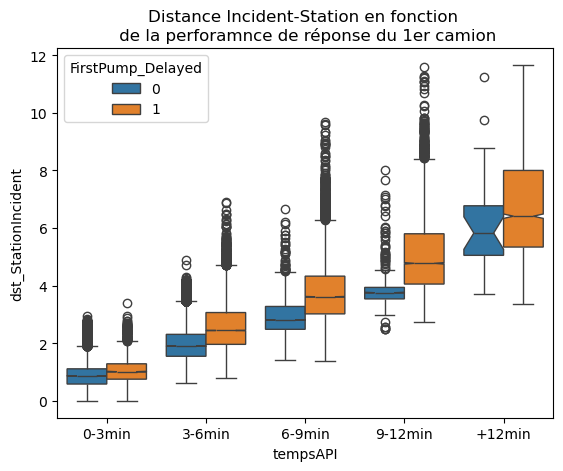

In [21]:
order = ["0-3min","3-6min","6-9min","9-12min","+12min"]
sns.boxplot(x =TempsAPI_Min,y = df_2020.dst_StationIncident ,data = df_2020,hue = "FirstPump_Delayed",notch = True, order = order)
plt.ylabel("Distance (km)")
plt.title("Distance calculé via l'API en fonction \n de la distance à parcourir");


## check des lien entre varibles

In [ ]:
# nouvelle discretisation des temp de réponse

In [69]:
df_2020.groupby('Periode')["FirstPumpArriving_AttendanceTime"].agg(["mean","median",'var','min','max'])

mean  median           var  min     max
Periode                                               
Matin    309.651897   292.0  16251.908009  1.0  1199.0
Midi     329.161208   308.0  21311.544922  1.0  1200.0
Nuit     318.151426   303.0  13176.569174  1.0  1189.0
Soir     301.493011   284.0  15681.488682  1.0  1199.0

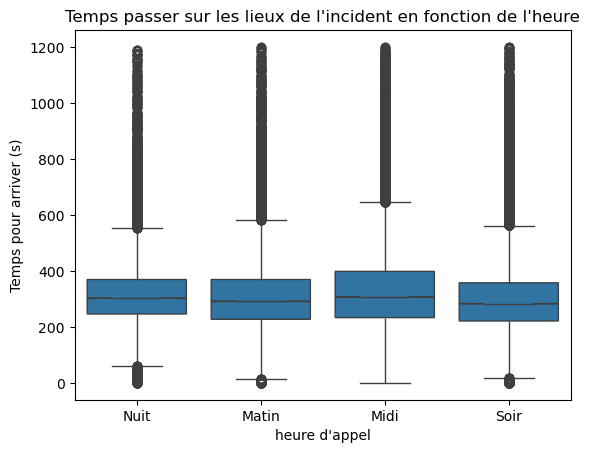

In [70]:
sns.boxplot(y='FirstPumpArriving_AttendanceTime', x = 'Periode' ,notch=True, data = df_2020)
plt.xlabel("heure d'appel")
plt.ylabel("Temps pour arriver (s)")
plt.title("Temps passer sur les lieux de l'incident en fonction de l'heure")
plt.show()

In [71]:
df_2020.groupby('Periode_Rush')["FirstPumpArriving_AttendanceTime"].agg(["mean","median",'var','min','max'])

mean  median           var  min     max
Periode_Rush                                                 
Afternoon rush  317.348100   297.0  18566.828017  1.0  1193.0
Morning rush    301.150273   285.0  14796.499874  1.0  1198.0
No rush         317.106135   298.0  17643.498209  1.0  1200.0

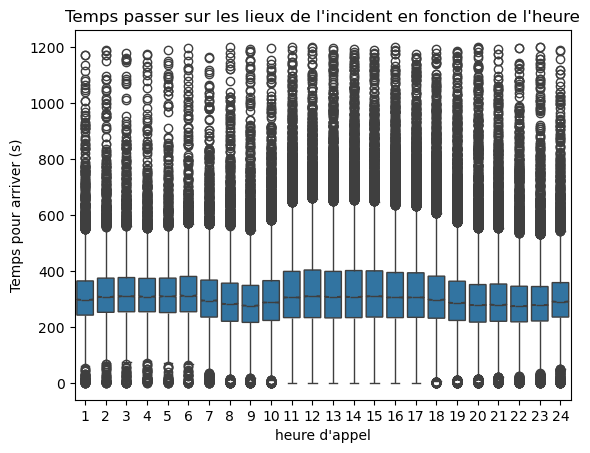

In [72]:
sns.boxplot(y='FirstPumpArriving_AttendanceTime', x = 'HourOfCall' ,notch=True, data = df_2020)
plt.xlabel("heure d'appel")
plt.ylabel("Temps pour arriver (s)")
plt.title("Temps passer sur les lieux de l'incident en fonction de l'heure")
plt.show()

In [ ]:
df_2020_mod.columns

In [4]:
# On conserve 12 variables pour les features

df_2020_mod = df_2020.drop(columns = ["IncidentNumber","DateOfCall","TimeOfCall","PropertyType","AddressQualifier",
                       "Postcode_full","Postcode_district","IncidentStationGround","Easting_m","Northing_m","Easting_rounded","Northing_rounded","Latitude",
                       "Longitude","Latitude_Station","Longitude_Station","NumStationsWithPumpsAttending","NumPumpsAttending","PumpCount",
                       "PumpMinutesRounded","Notional Cost (£)","NumCalls","FirstPumpArriving_TravelTimeSec",
                       "FirstPump_DelayCode_Description","FirstPump_Division_staion","tempsAPI"], axis = 1)

pd.set_option("display.max_columns",70)
df_2020_mod.head()

Month  month_cos  month_sin  Weekday   day_cos   day_sin  CalYear  \
0      1   0.866025        0.5        3 -0.900969  0.433884     2020   
1      1   0.866025        0.5        3 -0.900969  0.433884     2020   
2      1   0.866025        0.5        3 -0.900969  0.433884     2020   
3      1   0.866025        0.5        3 -0.900969  0.433884     2020   
4      1   0.866025        0.5        3 -0.900969  0.433884     2020   

   HourOfCall  hour_cos      hour_sin Periode Periode_Rush  \
0          24       1.0 -2.449294e-16    Nuit      No rush   
1          24       1.0 -2.449294e-16    Nuit      No rush   
2          24       1.0 -2.449294e-16    Nuit      No rush   
3          24       1.0 -2.449294e-16    Nuit      No rush   
4          24       1.0 -2.449294e-16    Nuit      No rush   

     SpecialServiceType    IncGeo_BoroughName    IncGeo_WardNameNew  \
0   Not Special Service  RICHMOND UPON THAMES        South Richmond   
1   Not Special Service               ENFIELD        Lower Edmonton   
2   Not Special Service            WANDSWORTH      Tooting Broadway   
3   Not Special Service                SUTTON  Worcester Park North   
4  Effecting entry/exit             SOUTHWARK    Borough & Bankside   

   Same_Incident_Station  FirstPumpArriving_AttendanceTime AttendanceTime_Min  \
0                      1                             195.0             3-6min   
1                      1                             426.0             6-9min   
2                      1                             249.0             3-6min   
3                      1                             526.0             6-9min   
4                      0                             472.0             6-9min   

  FirstPumpArriving_DeployedFromStation  FirstPumpArriving_TurnoutTimeSec  \
0                              Richmond                              60.0   
1                              Edmonton                             108.0   
2                               Tooting                              66.0   
3                                Sutton                             118.0   
4                         Old Kent Road                              85.0   

   London_Zone  FirstPump_Delayed  Week_Weekend  dst_StationIncident  \
0            0                  0             0               1.7365   
1            0                  1             0               2.0598   
2            1                  0             0               1.8095   
3            0                  1             0               2.9730   
4            1                  1             0               2.9607   

  IncidentGroup_orig StopCodeDescription_orig PropertyCategory_orig  \
0        False Alarm                      AFA       Non Residential   
1               Fire           Secondary Fire     Outdoor Structure   
2        False Alarm                      AFA     Other Residential   
3               Fire           Secondary Fire               Outdoor   
4    Special Service          Special Service              Dwelling   

   Incident_Fire  Incident_Special Service  StopCode_Primary Fire  \
0              0                         0                      0   
1              1                         0                      0   
2              0                         0                      0   
3              1                         0                      0   
4              0                         1                      0   

   StopCode_Secondary Fire  StopCode_Special Service  _Non Residential  \
0                        0                         0                 1   
1                        1                         0                 0   
2                        0                         0                 0   
3                        1                         0                 0   
4                        0                         1                 0   

   _Other Residential  _Other Vehicle  _Outdoor  _Outdoor Structure  \
0                   0        

In [ ]:
df_2020_mod.info()

In [74]:
df_2020_mod.isna().sum()

Month                                       0
month_cos                                   0
month_sin                                   0
Weekday                                     0
day_cos                                     0
day_sin                                     0
CalYear                                     0
HourOfCall                                  0
hour_cos                                    0
hour_sin                                    0
Periode                                     0
Periode_Rush                                0
SpecialServiceType                          0
IncGeo_BoroughName                          0
IncGeo_WardNameNew                         90
Same_Incident_Station                       0
FirstPumpArriving_AttendanceTime            0
AttendanceTime_Min                          0
FirstPumpArriving_DeployedFromStation       0
FirstPumpArriving_TurnoutTimeSec         1352
London_Zone                                 0
FirstPump_Delayed                 

In [5]:
df_2020_mod = df_2020_mod.dropna(axis=0)
df_2020_mod.isna().sum()

Month                                    0
month_cos                                0
month_sin                                0
Weekday                                  0
day_cos                                  0
day_sin                                  0
CalYear                                  0
HourOfCall                               0
hour_cos                                 0
hour_sin                                 0
Periode                                  0
Periode_Rush                             0
SpecialServiceType                       0
IncGeo_BoroughName                       0
IncGeo_WardNameNew                       0
Same_Incident_Station                    0
FirstPumpArriving_AttendanceTime         0
AttendanceTime_Min                       0
FirstPumpArriving_DeployedFromStation    0
FirstPumpArriving_TurnoutTimeSec         0
London_Zone                              0
FirstPump_Delayed                        0
Week_Weekend                             0
dst_Station

In [7]:
df_2020_mod["IncGeo_WardNameNew"].value_counts().values

array([5022, 3916, 1892, 1815, 1755, 1493, 1414, 1402, 1378, 1254, 1167,
       1134, 1081, 1022,  983,  963,  957,  953,  944,  934,  920,  903,
        894,  874,  867,  867,  866,  859,  858,  856,  854,  835,  829,
        828,  828,  818,  805,  804,  789,  781,  767,  762,  760,  758,
        754,  752,  751,  750,  748,  746,  729,  727,  726,  724,  721,
        718,  717,  717,  712,  712,  710,  706,  704,  702,  699,  695,
        695,  692,  691,  688,  681,  681,  677,  672,  671,  670,  665,
        663,  660,  655,  653,  652,  650,  650,  648,  639,  638,  637,
        637,  635,  635,  634,  634,  634,  631,  625,  623,  623,  620,
        619,  615,  615,  614,  613,  613,  610,  610,  607,  605,  603,
        599,  597,  592,  592,  591,  591,  588,  584,  583,  581,  580,
        578,  578,  576,  576,  575,  574,  574,  573,  573,  572,  570,
        568,  568,  568,  568,  566,  563,  563,  562,  561,  556,  555,
        555,  552,  551,  551,  548,  547,  547,  5

In [9]:
len(df_2020_mod["IncGeo_WardNameNew"].unique())

701

In [11]:
df_2020_mod["IncGeo_WardNameNew"].value_counts().index

Index(['West End', 'St. James'S', 'Bloomsbury', 'Heathrow Villages',
       'Holborn & Covent Garden', 'Regent'S Park', 'Marylebone', 'Kilburn',
       'Fairfield', 'Bunhill',
       ...
       'Billingsgate', 'Vintry', 'Queenhithe', 'Crystal Palace',
       'Cray Valley East', 'Herne Hill', 'Beddington South', 'New Cross',
       'Beddington North', 'St. Mary'S Park'],
      dtype='object', name='IncGeo_WardNameNew', length=701)

In [6]:
# conserve les lignes où on a des données pour les ward sup à 100
ward = df_2020_mod["IncGeo_WardNameNew"].value_counts().loc[lambda x : x > 100].index

In [7]:
df_2020_mod = df_2020_mod[df_2020_mod["IncGeo_WardNameNew"].isin(ward)]

In [ ]:
len(df_2020_mod[(df_2020_mod.FirstPumpArriving_AttendanceTime < 60)])

### corrélation

In [78]:
# Checks des corrélations entre variables

X_corr = df_2020_mod.drop(columns=["Weekday","Month","FirstPumpArriving_AttendanceTime","AttendanceTime_Min"])
y_reg = df_2020_mod.FirstPumpArriving_AttendanceTime
y_class1 = df_2020_mod.AttendanceTime_Min

# Mean encoding avec feat-engine
X_corr = X_corr.astype({"HourOfCall" : 'object'})
#cat_variables = ["IncGeo_BoroughName","IncGeo_WardNameNew","FirstPumpArriving_DeployedFromStation","SpecialServiceType","HourOfCall"]

mean_enc = MeanEncoder( smoothing='auto',unseen='encode')
X_corr = mean_enc.fit_transform(X_corr,y_reg)


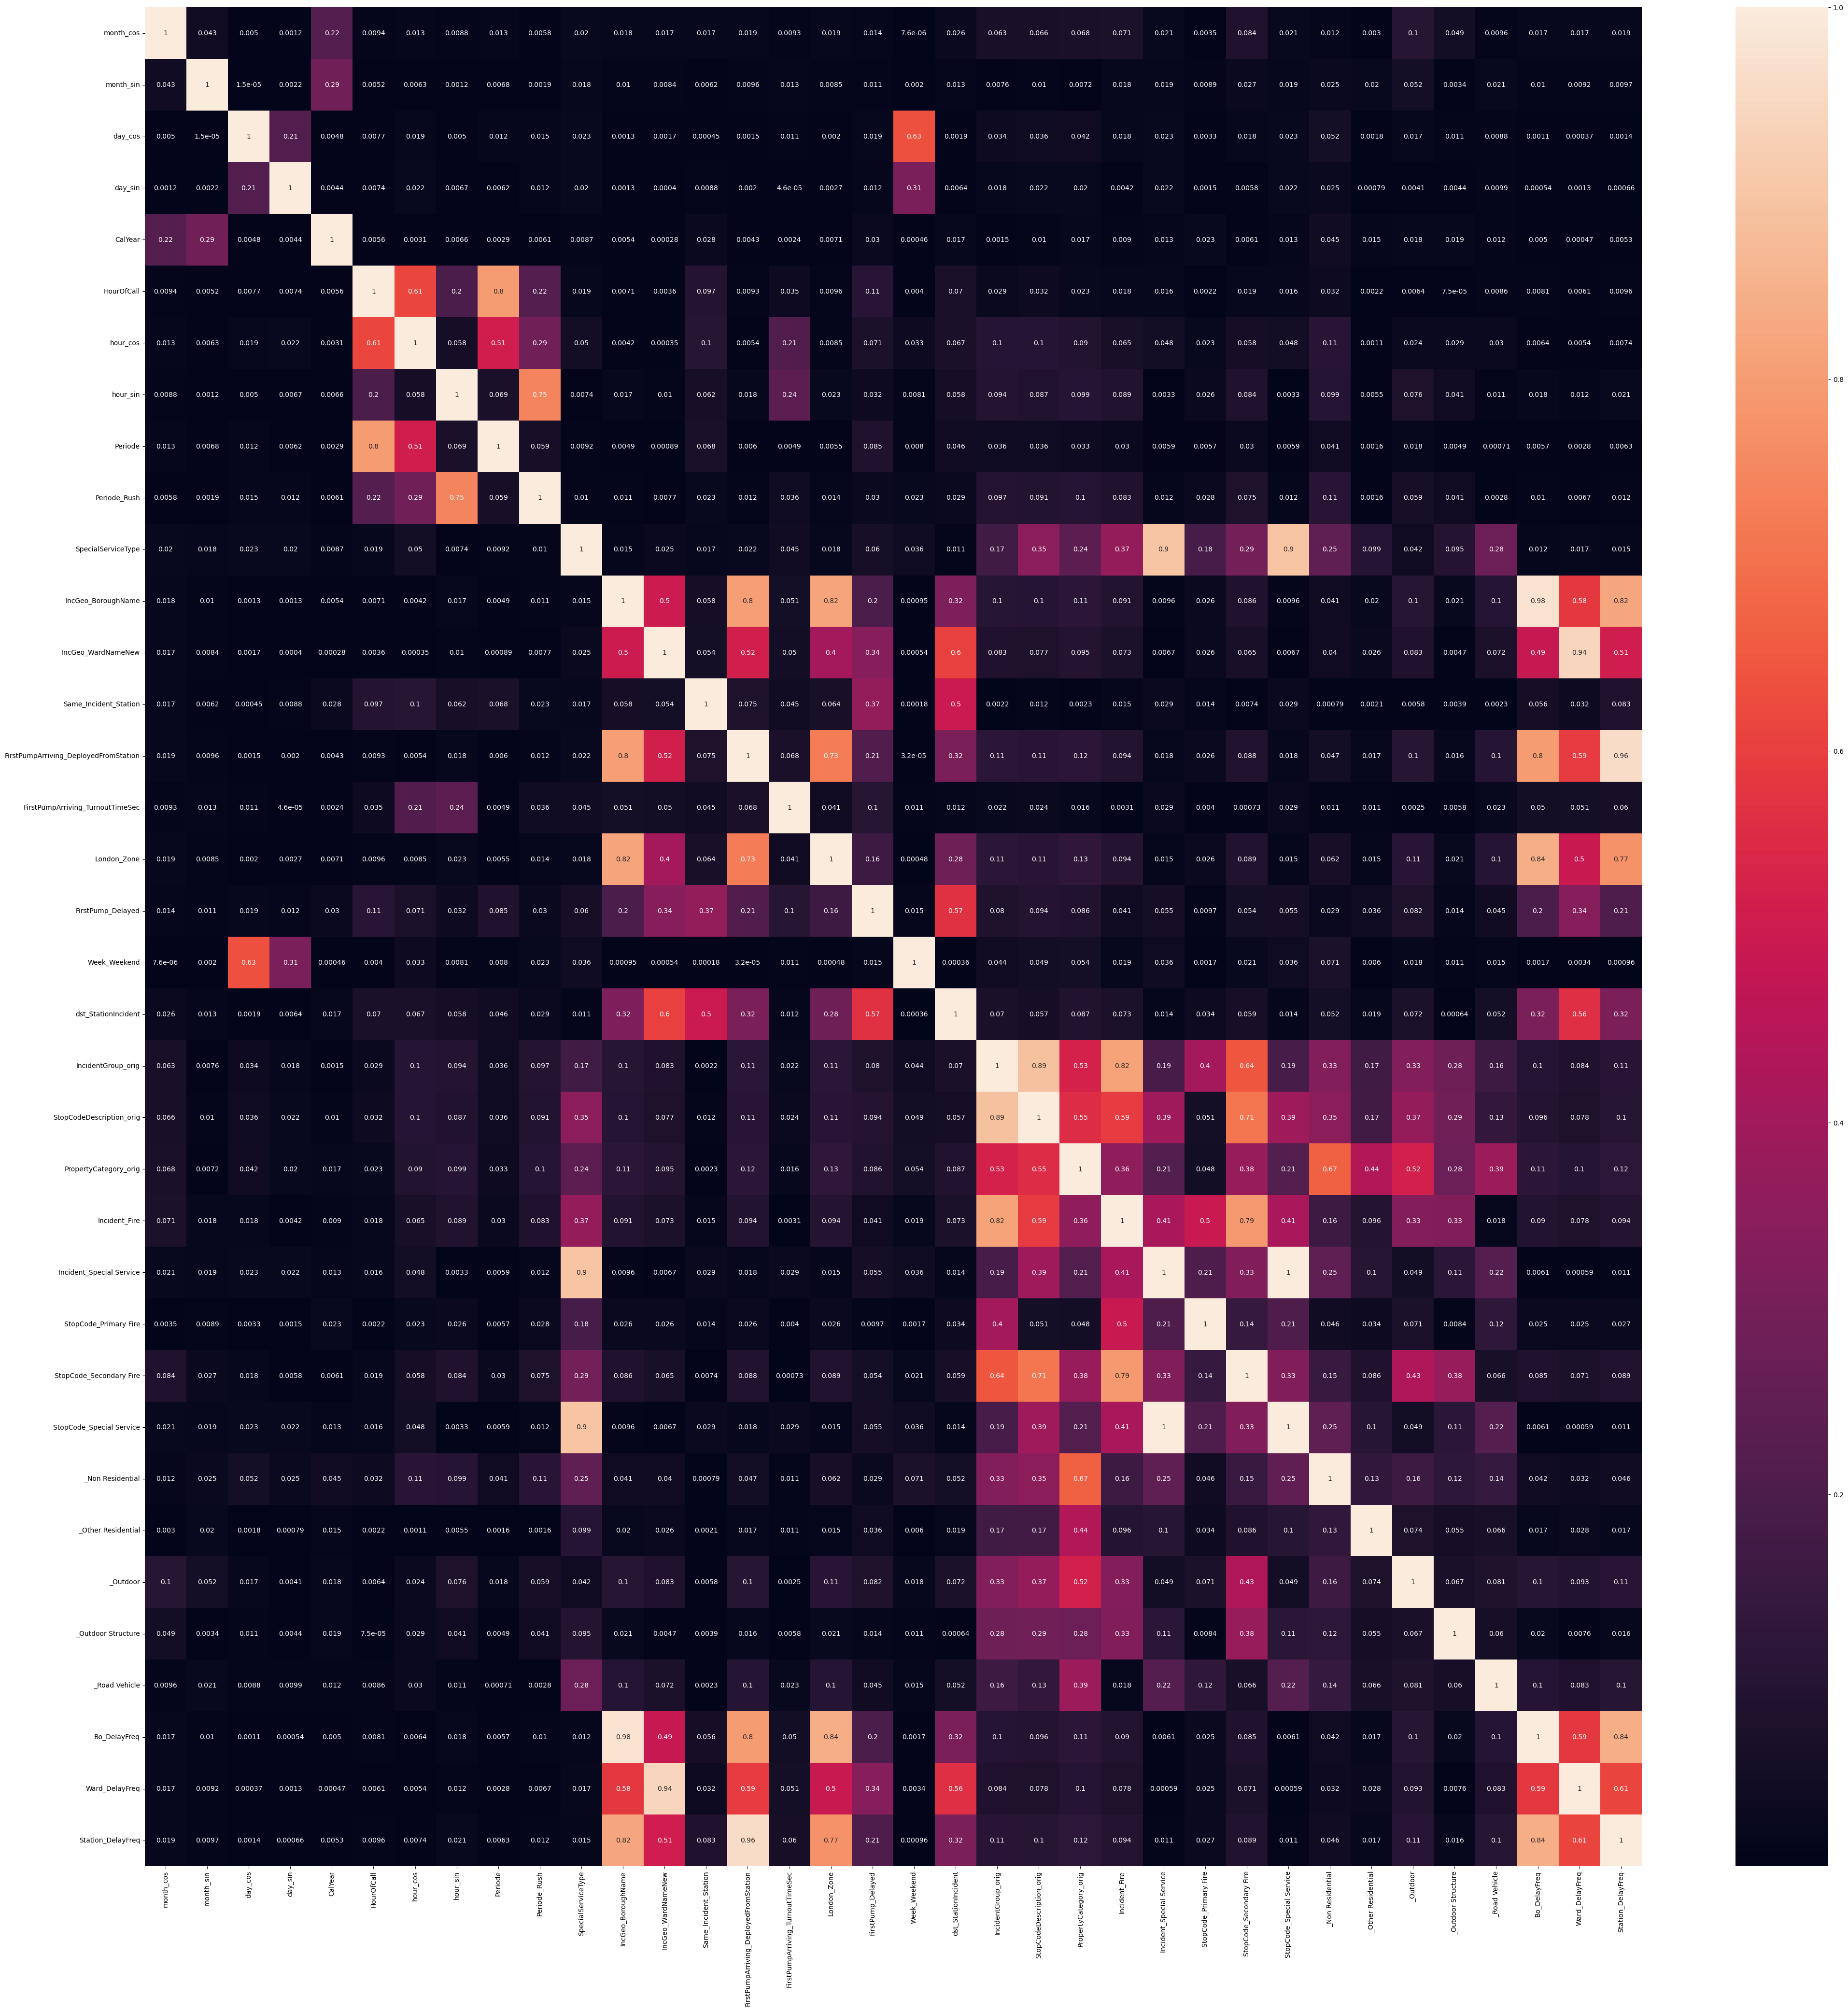

In [10]:
# corrélation entre features
cor  = X_corr.corr(method = "spearman").abs()
plt.figure(figsize=(50,50))
sns.heatmap(cor, annot=True);
# toute variables de lieu sont liées (normal)

In [79]:
# corrélation avec la target
print("corrélation a la target\n")
display(X_corr.corrwith(other = y_reg,method = 'spearman').sort_values(ascending =False))

corrélation a la target



FirstPump_Delayed                        0.783121
dst_StationIncident                      0.735377
IncGeo_WardNameNew                       0.477696
Ward_DelayFreq                           0.449729
FirstPumpArriving_DeployedFromStation    0.246915
Station_DelayFreq                        0.235833
IncGeo_BoroughName                       0.231555
Bo_DelayFreq                             0.227145
FirstPumpArriving_TurnoutTimeSec         0.186183
HourOfCall                               0.107458
StopCodeDescription_orig                 0.106749
PropertyCategory_orig                    0.102102
IncidentGroup_orig                       0.092377
Periode                                  0.088507
_Outdoor                                 0.084054
SpecialServiceType                       0.081869
Incident_Special Service                 0.063182
StopCode_Special Service                 0.063182
StopCode_Secondary Fire                  0.059726
Incident_Fire                            0.048423


<Axes: >

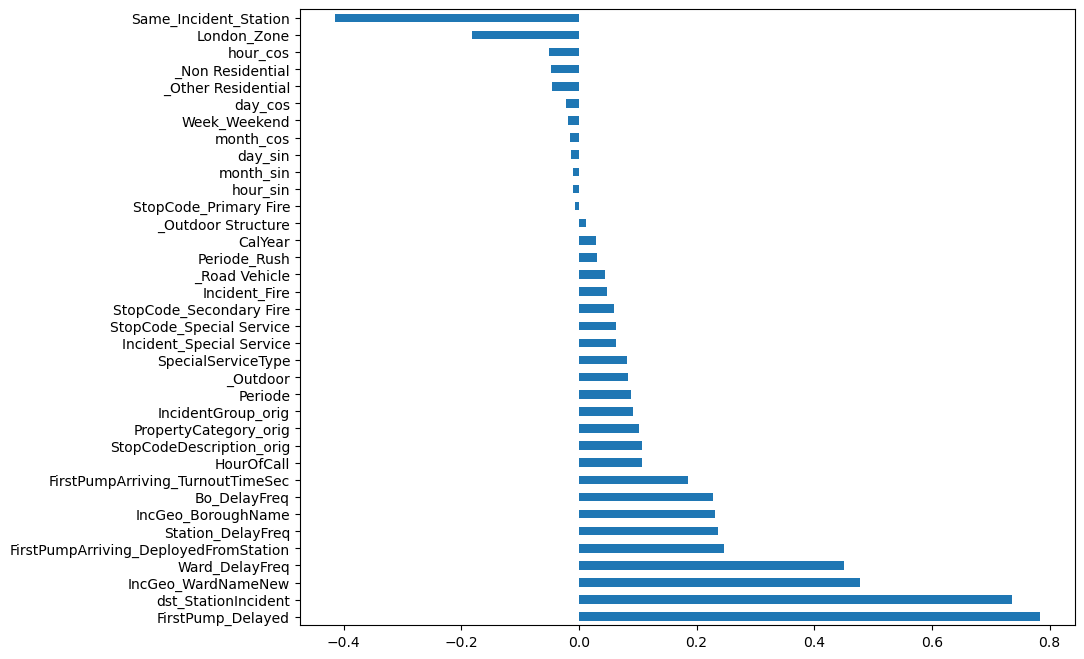

In [12]:
X_corr.corrwith(other = y_reg,method = 'spearman').sort_values(ascending =False).plot(kind='barh', figsize = (10,8))

In [13]:
corr_target = (X_corr.corrwith(other = y_reg,method = 'spearman').abs().sort_values(ascending =False))
variables_tri =  corr_target[corr_target > 0.20].index

In [14]:
X_corr[variables_tri].join(y_reg)

FirstPump_Delayed  dst_StationIncident  IncGeo_WardNameNew  \
0                       0               1.7365          329.725751   
1                       1               2.0598          325.706693   
2                       0               1.8095          319.702682   
3                       1               2.9730          380.100773   
4                       1               2.9607          284.944849   
...                   ...                  ...                 ...   
289443                  1               4.3335          371.607540   
289444                  0               2.4267          398.226071   
289445                  0               1.2901          363.577461   
289446                  1               1.0355          308.075752   
289447                  1               2.8530          306.482694   

        Ward_DelayFreq  Same_Incident_Station  \
0             0.266606                      1   
1             0.291587                      1   
2             0.186067                      1   
3             0.571848                      1   
4             0.176149                      0   
...                ...                    ...   
289443        0.501478                      1   
289444        0.619792                      1   
289445        0.356331                      0   
289446        0.208999                      1   
289447        0.238191                      0   

        FirstPumpArriving_DeployedFromStation  Station_DelayFreq  \
0                                  343.126907           0.329054   
1                                  350.101723           0.431259   
2                                  314.149847           0.226302   
3                                  312.594392           0.317537   
4                                  272.135285           0.169566   
...                                       ...                ...   
289443                             312.594392           0.317537   
289444                             343.811640           0.417680   
289445                             268.216613           0.152590   
289446                             295.136322           0.211365   
289447                             299.501408           0.203415   

        IncGeo_BoroughName  Bo_DelayFreq  FirstPumpArriving_AttendanceTime  
0               342.643707      0.393791                             195.0  
1               358.199302      0.457710                             426.0  
2               300.049881      0.225579                             249.0  
3               319.543485      0.341851                             526.0  
4               290.234062      0.209979                             472.0  
...                    ...           ...                               ...  
289443          319.543485      0.341851                             508.0  
289444          342.643707      0.393791                             263.0  
289445          279.950967      0.176751                             258.0  
289446          306.160947      0.261670                             427.0  
289447          299.253423      0.207553                             519.0  

[288006 rows x 10 columns]

In [ ]:
cor = X_corr[variables_tri].join(y_reg).corr(method = "spearman")
sns.heatmap(cor, annot=True);
# conserve dst station et les wards

In [ ]:
df_2020_mod.select_dtypes(include = "object").columns

In [ ]:
from scipy.stats import chi2_contingency

def cramerV(label,x):
    confusion_matrix = pd.crosstab(label, x)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r,k = confusion_matrix.shape
    phi2 = chi2/n
    phi2corr = max(0,phi2-((k-1)*(r-1))/(n-1))
    rcorr = r - ((r - 1) ** 2) / ( n - 1 )
    kcorr = k - ((k - 1) ** 2) / ( n - 1 )
    try:
        if min((kcorr - 1),(rcorr - 1)) == 0:
            warnings.warn(
            "Unable to calculate Cramer's V using bias correction. Consider not using bias correction",RuntimeWarning)
            v = 0
            print("If condition Met: ",v)
        else:
            v = np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))
            print("Else condition Met: ",v)
    except:
        print("inside error")
        v = 0
    return v

def plot_cramer(df):
    cramer = pd.DataFrame(index=df.columns,columns=df.columns)
    for column_of_interest in df.columns:
        try:
            temp = {}

            columns = df.columns
            for j in range(0,len(columns)):
                v = cramerV(df[column_of_interest],df[columns[j]])
                cramer.loc[column_of_interest,columns[j]] = v
                if (column_of_interest==columns[j]):
                    pass
                else:
                    temp[columns[j]] = v
            cramer.fillna(value=np.nan,inplace=True)
        except:
            print('Dropping row:',column_of_interest)
            pass
    
    return cramer
       


In [ ]:
df_cramer = plot_cramer(df_2020_mod)    

In [ ]:
plt.figure(figsize=(20,7))
sns.heatmap(df_cramer,annot=True,fmt='.2f')

plt.show()

In [ ]:
## Corrélation entre le retard et les lieux
import scipy.stats as ss

def cramers_v(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher,
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

confusion_matrix_Ward = pd.crosstab(df_2020_mod["FirstPump_Delayed"], df_2020_mod["IncGeo_WardNameNew"])
confusion_matrix_Bo = pd.crosstab(df_2020_mod["FirstPump_Delayed"], df_2020_mod["IncGeo_BoroughName"])
confusion_matrix_Zone = pd.crosstab(df_2020_mod["FirstPump_Delayed"], df_2020_mod["London_Zone"])

print("Corelation retard-Ward",cramers_v(confusion_matrix_Ward.values))
print("Corelation retard-Borough",cramers_v(confusion_matrix_Bo.values))
print("Corelation retard-Zone",cramers_v(confusion_matrix_Zone.values))



In [80]:
df_2020_mod.columns

Index(['Month', 'month_cos', 'month_sin', 'Weekday', 'day_cos', 'day_sin',
       'CalYear', 'HourOfCall', 'hour_cos', 'hour_sin', 'Periode',
       'Periode_Rush', 'SpecialServiceType', 'IncGeo_BoroughName',
       'IncGeo_WardNameNew', 'Same_Incident_Station',
       'FirstPumpArriving_AttendanceTime', 'AttendanceTime_Min',
       'FirstPumpArriving_DeployedFromStation',
       'FirstPumpArriving_TurnoutTimeSec', 'London_Zone', 'FirstPump_Delayed',
       'Week_Weekend', 'dst_StationIncident', 'IncidentGroup_orig',
       'StopCodeDescription_orig', 'PropertyCategory_orig', 'Incident_Fire',
       'Incident_Special Service', 'StopCode_Primary Fire',
       'StopCode_Secondary Fire', 'StopCode_Special Service',
       '_Non Residential', '_Other Residential', '_Other Vehicle', '_Outdoor',
       '_Outdoor Structure', '_Road Vehicle', 'Bo_DelayFreq', 'Ward_DelayFreq',
       'Station_DelayFreq'],
      dtype='object')

## Modeles Linéaire

#### Préparation des données


In [15]:
# Préparation des données

X_reg = df_2020_mod.drop(columns=["FirstPumpArriving_TurnoutTimeSec","HourOfCall","Weekday","Month","Periode","Periode_Rush","Week_Weekend","CalYear","Same_Incident_Station",
                          "FirstPumpArriving_AttendanceTime","AttendanceTime_Min","FirstPump_Delayed",
                          "Station_DelayFreq","IncGeo_WardNameNew","Ward_DelayFreq","Bo_DelayFreq" ,'Incident_Fire', 'Incident_Special Service',
       'StopCode_Primary Fire', 'StopCode_Secondary Fire',
       'StopCode_Special Service', '_Non Residential', '_Other Residential',
       '_Outdoor', '_Outdoor Structure', '_Road Vehicle',"_Other Vehicle","London_Zone","IncidentGroup_orig"])

# X_reg = X_reg.astype({"HourOfCall" : 'object'})

y_reg = df_2020_mod.FirstPumpArriving_AttendanceTime

cat_variables = ["IncGeo_BoroughName","FirstPumpArriving_DeployedFromStation","SpecialServiceType"
                 ,"StopCodeDescription_orig","PropertyCategory_orig"]

# pour éviter de scaler les 1 et 0
no_binary_variables = ['month_cos', 'month_sin', 'day_cos', 'day_sin', 'hour_cos', 'hour_sin',
       'SpecialServiceType', 'IncGeo_BoroughName','FirstPumpArriving_DeployedFromStation',
       'dst_StationIncident']

binary_variables =['Same_Incident_Station','London_Zone','Incident_Fire', 'Incident_Special Service',
       'StopCode_Primary Fire', 'StopCode_Secondary Fire',
       'StopCode_Special Service', '_Non Residential', '_Other Residential',
       '_Outdoor', '_Outdoor Structure', '_Road Vehicle']


In [16]:
X_reg.PropertyCategory_orig.value_counts()

PropertyCategory_orig
Dwelling             150491
Non Residential       62789
Outdoor               23875
Road Vehicle          19189
Other Residential     16443
Outdoor Structure     13666
Other Vehicle           508
Name: count, dtype: int64

In [18]:
X_reg.StopCodeDescription_orig.value_counts()

StopCodeDescription_orig
AFA                118829
Special Service     92768
Secondary Fire      52941
Primary Fire        23468
Name: count, dtype: int64

In [18]:
# préparation des variables
from sklearn.preprocessing import RobustScaler

from feature_engine.encoding import MeanEncoder

X_train, X_test, y_train,y_test = train_test_split(X_reg,y_reg, test_size=0.25, random_state=42)

# Mean encoding avec feat-engine
mean_enc = MeanEncoder(variables= cat_variables, smoothing='auto')
X_train = mean_enc.fit_transform(X_train,y_train)
X_test = mean_enc.transform(X_test)

# Scale
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#X_train_nobin = pd.DataFrame(scaler.fit_transform(X_train[no_binary_variables]),columns=X_train[no_binary_variables].columns).reset_index(drop=True)
#X_test_nobin = pd.DataFrame(scaler.transform(X_test[no_binary_variables]),columns=X_train[no_binary_variables].columns).reset_index(drop=True)

#X_train_bin = pd.DataFrame(X_train[binary_variables]).reset_index(drop=True)
#X_test_bin = pd.DataFrame(X_test[binary_variables]).reset_index(drop=True)

#X_train_scaled = pd.concat([X_train_bin,X_train_nobin], axis = 1)
#X_test_scaled = pd.concat([X_test_bin,X_test_nobin], axis = 1)




In [ ]:
## conserve que la distance, la fréquence de retard

### Régression linéaire 
#### naive


In [15]:
# Modele naif : on garde toutes variables  

lr_naif = LinearRegression()

lr_naif.fit(X_train_scaled,y_train)
print("Score train modele full:",lr_naif.score(X_train_scaled,y_train))
print("Score test modele full:",lr_naif.score(X_test_scaled,y_test))
print("MSE train:",mean_squared_error(y_train,lr_naif.predict(X_train_scaled)))
print("MSE test:",mean_squared_error(y_test,lr_naif.predict(X_test_scaled)))
print("MAE train:",mean_absolute_error(y_train,lr_naif.predict(X_train_scaled)))
print("MAE test:",mean_absolute_error(y_test,lr_naif.predict(X_test_scaled)))


Score train modele full: 0.5026863862489594
Score test modele full: 0.5088086241541177
MSE train: 8530.523397052808
MSE test: 8425.224104831646
MAE train: 60.9341042233039
MAE test: 60.90679856618537


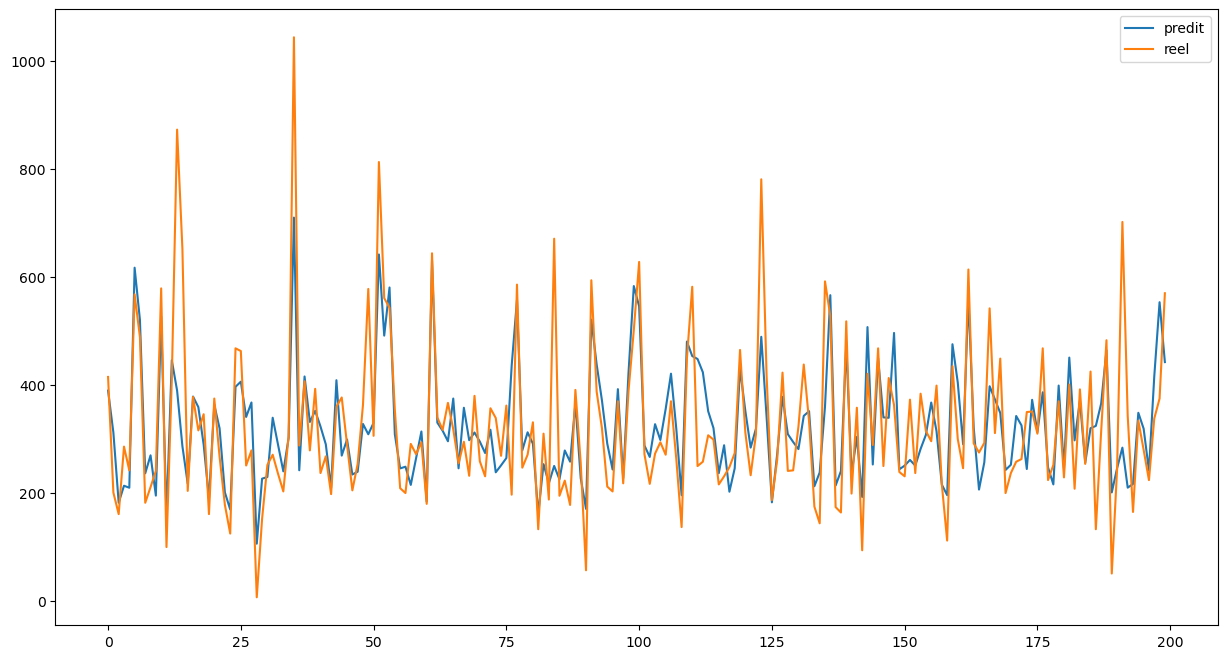

In [93]:
plt.figure(figsize = (15,8))
plt.plot(lr_naif.predict(X_test_scaled)[5300:5500])
plt.plot(y_test[5300:5500].values)
plt.legend(["predit","reel"])
plt.show()

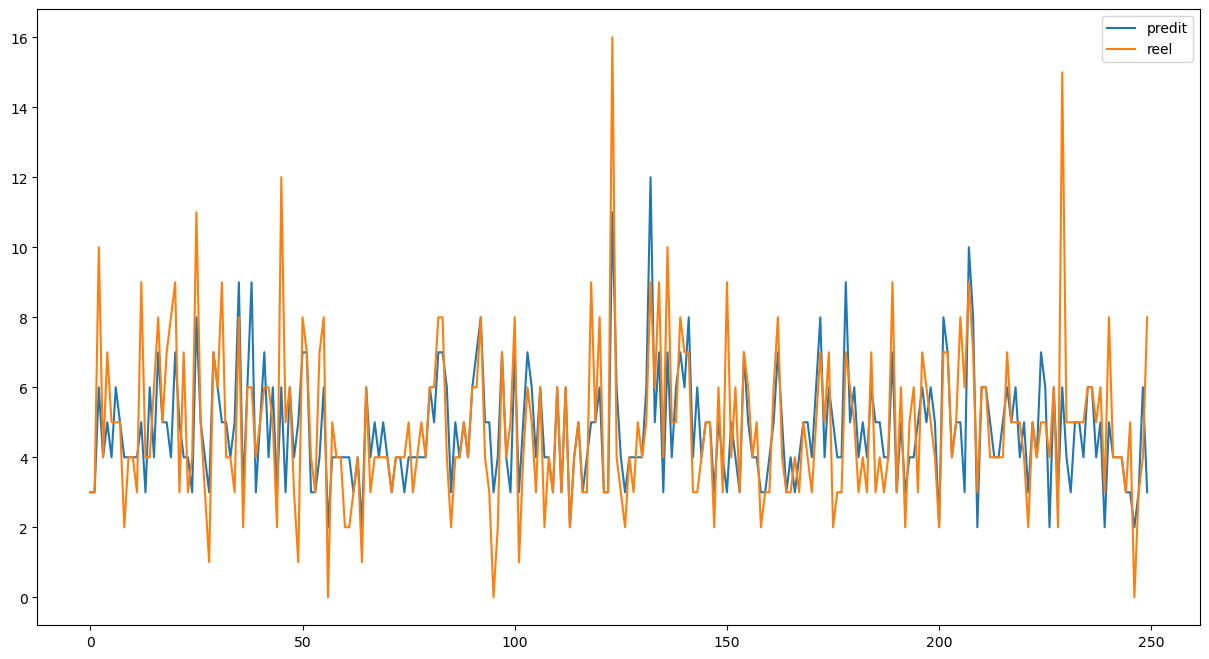

In [94]:
# en minutes
plt.figure(figsize = (15,8))
plt.plot(lr_naif.predict(X_test_scaled)[0:250]//60)
plt.plot(y_test[0:250].values//60)
plt.legend(["predit","reel"])
plt.show()

In [95]:
pd.DataFrame({"variable" : X_test.columns,
             "coeff" : lr_naif.coef_,
              "intercept" : lr_naif.intercept_}).sort_values("coeff")


variable       coeff   intercept
7                      IncGeo_BoroughName   -9.923819  302.170233
2                                 day_cos   -6.850069  302.170233
3                                 day_sin   -1.724445  302.170233
4                                hour_cos   -1.306608  302.170233
1                               month_sin   -0.321061  302.170233
11                  PropertyCategory_orig    1.436849  302.170233
0                               month_cos    1.830186  302.170233
8   FirstPumpArriving_DeployedFromStation    6.533099  302.170233
6                      SpecialServiceType    7.712367  302.170233
5                                hour_sin   10.256360  302.170233
10               StopCodeDescription_orig   11.812971  302.170233
9                     dst_StationIncident  111.282379  302.170233

In [96]:
# renvoie les métriques pour évaluation

def calcul_metrics_reg(y_true_train,y_pred_train,y_true_test,y_pred_test):

    R2_train = r2_score(y_true_train,y_pred_train)
    MAE_train = mean_absolute_error(y_true_train,y_pred_train )
    MSE_train = mean_squared_error(y_true_train,y_pred_train)
    
    R2_test = r2_score(y_true_test,y_pred_test)
    MAE_test = mean_absolute_error(y_true_test,y_pred_test)
    MSE_test = mean_squared_error(y_true_test,y_pred_test)

    diff_mae_train_test = MAE_train-MAE_test
    diff_mse_train_test = MSE_train - MSE_test

    
    return [(R2_train,R2_test, MAE_train,MAE_test, diff_mae_train_test, MSE_train,MSE_test,diff_mse_train_test)]




In [97]:
y_pred_train = lr_naif.predict(X_train_scaled)
y_pred_test = lr_naif.predict(X_test_scaled)

scr =calcul_metrics_reg(y_train,y_pred_train,y_test,y_pred_test)

reg_scores = pd.DataFrame(data =scr, columns=["R2 train",'R2 test',"MAE train","MAE test","Diff MAE train-test",
                                              "MSE train",'MSE test',"Diff MSE train-test"],
                                              index=["reg lineaire naive"])

reg_scores

R2 train   R2 test  MAE train   MAE test  \
reg lineaire naive  0.502686  0.508809  60.934104  60.906799   

                    Diff MAE train-test    MSE train     MSE test  \
reg lineaire naive             0.027306  8530.523397  8425.224105   

                    Diff MSE train-test  
reg lineaire naive           105.299292

#### RecursiveFeatureElimination

In [98]:
# avec RecursiveFeatureElimination de feature-engine

from feature_engine.selection import RecursiveFeatureElimination

lr_rfe = LinearRegression()
RFE = RecursiveFeatureElimination(scoring = "neg_mean_absolute_error",estimator = lr_rfe, cv= 5)

RFE.fit(X_train_scaled,y_train)

RecursiveFeatureElimination(cv=5, estimator=LinearRegression(),
                            scoring='neg_mean_absolute_error')

In [99]:
RFE.initial_model_performance_

-60.93965789384661

In [100]:
# Variables conservées
X_train.columns[RFE.get_support()]

Index(['day_cos', 'hour_sin', 'SpecialServiceType', 'IncGeo_BoroughName',
       'FirstPumpArriving_DeployedFromStation', 'dst_StationIncident',
       'StopCodeDescription_orig'],
      dtype='object')

In [104]:
# Tableau avec data conservées
X_train_RFE = RFE.transform(X_train_scaled)
X_test_RFE = RFE.transform(X_test_scaled)

lr_RFE = LinearRegression()
lr_RFE.fit(X_train_RFE,y_train)
print("Score train modele RFE:",lr_RFE.score(X_train_RFE,y_train))
print("Score test modele RFE:",lr_RFE.score(X_test_RFE,y_test))
print("MSE train:",mean_squared_error(y_train,lr_RFE.predict(X_train_RFE)))
print("MSE test:",mean_squared_error(y_test,lr_RFE.predict(X_test_RFE)))
print("MAE train:",mean_absolute_error(y_train,lr_RFE.predict(X_train_RFE)))
print("MAE test:",mean_absolute_error(y_test,lr_RFE.predict(X_test_RFE)))
#données deja transformées donc OK

Score train modele RFE: 0.5021271004919349
Score test modele RFE: 0.5080790087074898
MSE train: 8540.116941456208
MSE test: 8437.738928891009
MAE train: 60.936489595723636
MAE test: 60.91788266350297


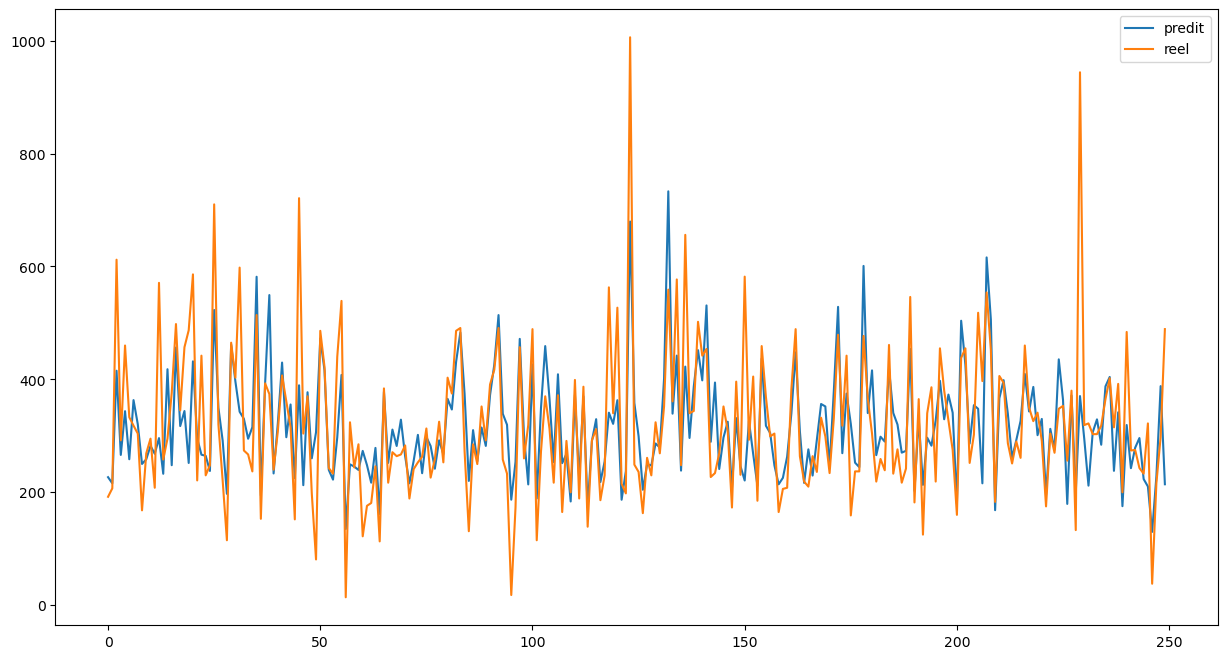

In [102]:
plt.figure(figsize = (15,8))
plt.plot(lr_RFE.predict(X_test_RFE)[0:250])
plt.plot(y_test[0:250].values)
plt.legend(["predit","reel"])
plt.show()

In [105]:
pd.DataFrame({"variable" : X_train.columns[RFE.get_support()],
             "coeff" : lr_RFE.coef_,
              "intercept" : lr_RFE.intercept_})


variable       coeff   intercept
0                                day_cos   -6.799811  303.854429
1                               hour_sin   10.161538  303.854429
2                     SpecialServiceType    7.684351  303.854429
3                     IncGeo_BoroughName   -9.728272  303.854429
4  FirstPumpArriving_DeployedFromStation    6.709632  303.854429
5                    dst_StationIncident  111.501030  303.854429
6               StopCodeDescription_orig   14.500076  303.854429

In [106]:
y_pred_train = lr_RFE.predict(X_train_RFE)
y_pred_test = lr_RFE.predict(X_test_RFE)

scr =calcul_metrics_reg(y_train,y_pred_train,y_test,y_pred_test)

lr_rfe = pd.DataFrame(data =scr, columns=["R2 train",'R2 test',"MAE train","MAE test","Diff MAE train-test",
                                              "MSE train",'MSE test',"Diff MSE train-test"],
                                              index=["reg lineaire RFE"])

reg_scores = pd.concat([reg_scores,lr_rfe])
reg_scores

R2 train   R2 test  MAE train   MAE test  \
reg lineaire naive  0.502686  0.508809  60.934104  60.906799   
reg lineaire RFE    0.502127  0.508079  60.936490  60.917883   

                    Diff MAE train-test    MSE train     MSE test  \
reg lineaire naive             0.027306  8530.523397  8425.224105   
reg lineaire RFE               0.018607  8540.116941  8437.738929   

                    Diff MSE train-test  
reg lineaire naive           105.299292  
reg lineaire RFE             102.378013

### ElasticNet Lasso et ridge

#### Ridge

In [107]:
from sklearn.linear_model import RidgeCV


#alpha =[0.001, 0.01, 0.02, 0.025, 0.05, 0.1, 0.25, 0.5, 0.8, 1.0, 5.0, 9.0, 10]
alpha = np.logspace(-10, 10, 21)


ridge_reg = RidgeCV(alphas = alpha, scoring = 'neg_mean_squared_error').fit(X_train_scaled, y_train)

In [108]:
ridge_reg.alpha_

10.0

In [109]:
print("score train",ridge_reg.score(X_train_scaled,y_train))
print("score test",ridge_reg.score(X_test_scaled,y_test))
ridge_pred_train = ridge_reg.predict(X_train_scaled)
ridge_pred_test = ridge_reg.predict(X_test_scaled)
print("MAE train",mean_absolute_error(y_train, ridge_pred_train))
print("MAE test",mean_absolute_error(y_test, ridge_pred_test))
print("MSE train",mean_squared_error(y_train, ridge_pred_train))
print("MSE test",mean_squared_error(y_test, ridge_pred_test))

score train 0.5026863831733863
score test 0.5088089473636768
MAE train 60.93421730178791
MAE test 60.90686213884974
MSE train 8530.52344980875
MSE test 8425.21856093755


In [110]:
pd.DataFrame({"variable" : X_reg.columns,
             "coeff" : ridge_reg.coef_,
              "intercept" : ridge_reg.intercept_})


variable       coeff   intercept
0                               month_cos    1.829731  302.169711
1                               month_sin   -0.321143  302.169711
2                                 day_cos   -6.848454  302.169711
3                                 day_sin   -1.724206  302.169711
4                                hour_cos   -1.307681  302.169711
5                                hour_sin   10.253413  302.169711
6                      SpecialServiceType    7.712492  302.169711
7                      IncGeo_BoroughName   -9.916794  302.169711
8   FirstPumpArriving_DeployedFromStation    6.530586  302.169711
9                     dst_StationIncident  111.273529  302.169711
10               StopCodeDescription_orig   11.810316  302.169711
11                  PropertyCategory_orig    1.437264  302.169711

In [112]:
y_pred_train = ridge_reg.predict(X_train_scaled)
y_pred_test = ridge_reg.predict(X_test_scaled)

scr = calcul_metrics_reg(y_train,y_pred_train,y_test,y_pred_test)

ridge = pd.DataFrame(data =scr, columns=["R2 train",'R2 test',"MAE train","MAE test","Diff MAE train-test",
                                              "MSE train",'MSE test',"Diff MSE train-test"],
                                              index=["Modele ridge"])

reg_scores = pd.concat([reg_scores,ridge])
reg_scores



R2 train   R2 test  MAE train   MAE test  \
reg lineaire naive  0.502686  0.508809  60.934104  60.906799   
reg lineaire RFE    0.502127  0.508079  60.936490  60.917883   
Modele ridge        0.502686  0.508809  60.934217  60.906862   

                    Diff MAE train-test    MSE train     MSE test  \
reg lineaire naive             0.027306  8530.523397  8425.224105   
reg lineaire RFE               0.018607  8540.116941  8437.738929   
Modele ridge                   0.027355  8530.523450  8425.218561   

                    Diff MSE train-test  
reg lineaire naive           105.299292  
reg lineaire RFE             102.378013  
Modele ridge                 105.304889

#### Lasso

In [113]:
from sklearn.linear_model import lasso_path


# Récupère les alphas tester et la matrice de coefficients pour chaque alpha testés
alpha = (0.001, 0.01, 0.02, 0.025, 0.05, 0.1, 0.25, 0.5, 0.8, 1.0)
#alpha = np.logspace(-10, 10, 21)

alpha_path, coefs_lasso, _ = lasso_path(X_train_scaled, y_train, alphas = alpha, tol=1e-2)
coefs_lasso.shape


(12, 10)

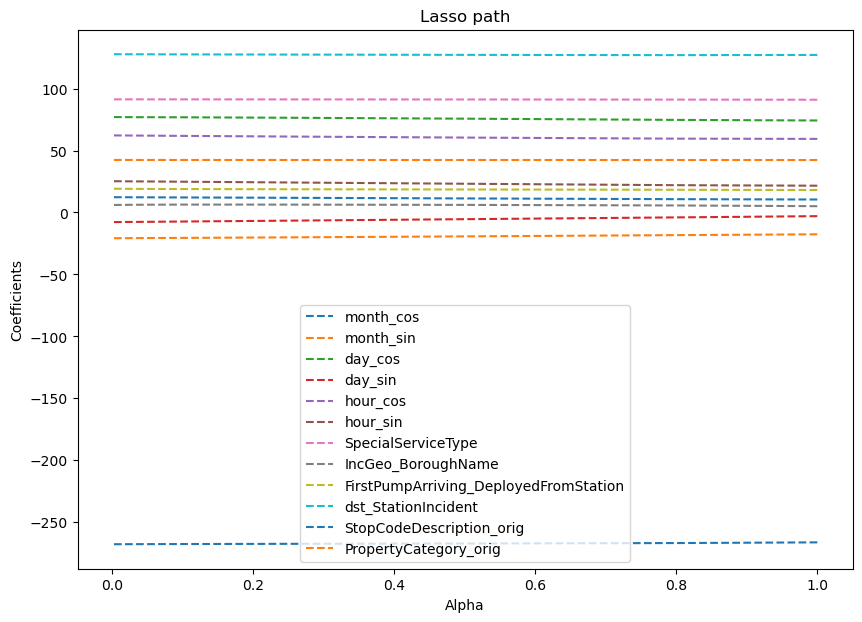

In [114]:
# Plot des coefficient des variables en focntion de la valeurs de alpha
plt.figure(figsize=(10, 7))

for i in range(coefs_lasso.shape[0]):
    plt.plot(alpha_path, coefs_lasso[i,:], '--', label =X_reg.columns[i])

plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Lasso path')
plt.legend();


In [115]:
from sklearn.linear_model import LassoCV


# Récupère les alphas tester et la matrice de coefficients pour chaque alpha testés
#alphas = (0.001, 0.01, 0.02, 0.025, 0.05, 0.1, 0.25, 0.5, 0.8, 1.0)
alphas = np.logspace(-10, 10, 21)


md_Lasso = LassoCV(alphas = alphas, cv= 8, tol = 0.01).fit(X_train_scaled,y_train)

In [116]:
md_Lasso.alpha_

0.0001

In [279]:
md_Lasso.n_features_in_

12

In [278]:
md_Lasso.coef_

array([  1.82995349,  -0.32068394,  -6.84959017,  -1.72395615,
        -1.30624332,  10.25594755,   7.71229989,  -9.92370182,
         6.53284464, 111.28228232,  11.81254007,   1.43688167])

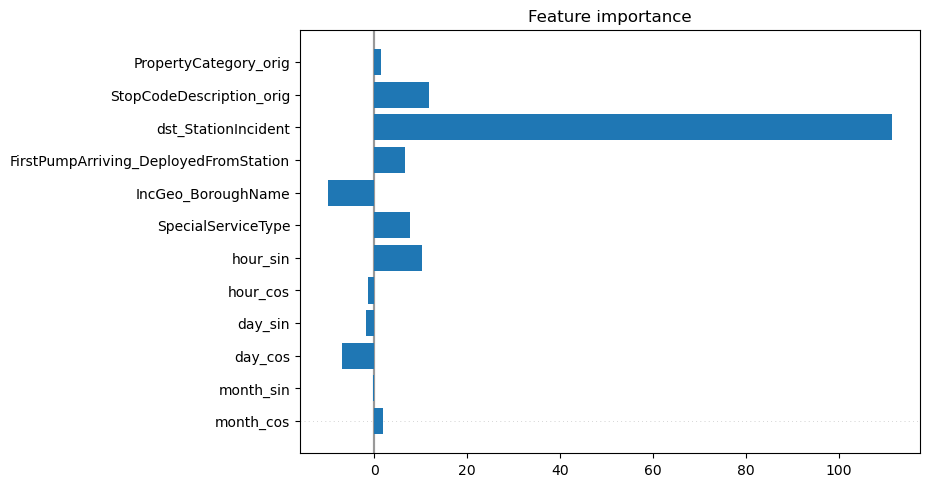

In [276]:
imp_coef = md_Lasso.coef_
plt.barh(range(0,len(imp_coef)),imp_coef)
plt.yticks(range(len(imp_coef)),X_reg.columns)
plt.title("Feature importance");
plt.show()



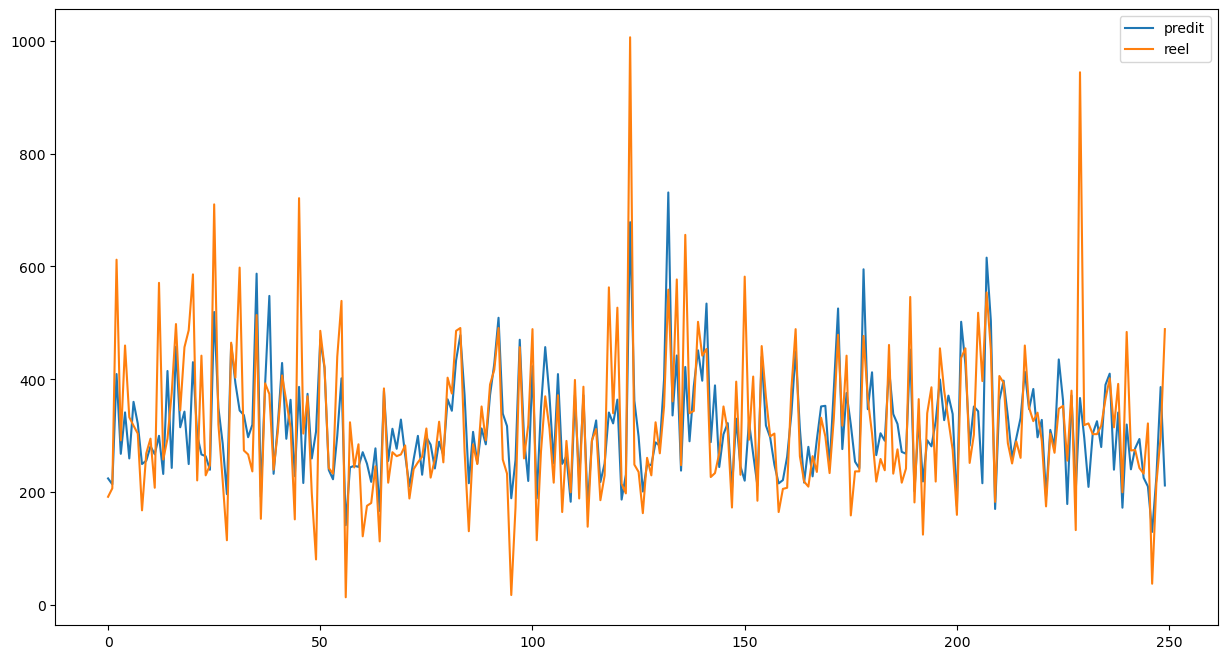

In [119]:
plt.figure(figsize = (15,8))
plt.plot(md_Lasso.predict(X_test_scaled)[0:250])
plt.plot(y_test[0:250].values)
plt.legend(["predit","reel"])
plt.show()

In [120]:
pd.DataFrame({"variable" : X_test.columns,
             "coeff" : md_Lasso.coef_,
              "intercept" : md_Lasso.intercept_}).sort_values("coeff")


variable       coeff   intercept
7                      IncGeo_BoroughName   -9.923702  302.170045
2                                 day_cos   -6.849590  302.170045
3                                 day_sin   -1.723956  302.170045
4                                hour_cos   -1.306243  302.170045
1                               month_sin   -0.320684  302.170045
11                  PropertyCategory_orig    1.436882  302.170045
0                               month_cos    1.829953  302.170045
8   FirstPumpArriving_DeployedFromStation    6.532845  302.170045
6                      SpecialServiceType    7.712300  302.170045
5                                hour_sin   10.255948  302.170045
10               StopCodeDescription_orig   11.812540  302.170045
9                     dst_StationIncident  111.282282  302.170045

In [121]:
print("score train",md_Lasso.score(X_train_scaled,y_train))
print("score test",md_Lasso.score(X_test_scaled,y_test))
lasso_pred_train = md_Lasso.predict(X_train_scaled)
lasso_pred_test = md_Lasso.predict(X_test_scaled)
print("MAE train",mean_absolute_error(y_train, lasso_pred_train))
print("MAE test",mean_absolute_error(y_test, lasso_pred_test))
print("MSE train",mean_squared_error(y_train, lasso_pred_train))
print("MSE test",mean_squared_error(y_test, lasso_pred_test))

score train 0.5026863862307175
score test 0.5088086278576388
MAE train 60.93409940320833
MAE test 60.90679111904555
MSE train 8530.523397365716
MSE test 8425.224041306517


In [122]:

y_pred_train = md_Lasso.predict(X_train_scaled)
y_pred_test = md_Lasso.predict(X_test_scaled)

scr = calcul_metrics_reg(y_train,y_pred_train,y_test,y_pred_test)

lasso = pd.DataFrame(data =scr, columns=["R2 train",'R2 test',"MAE train","MAE test","Diff MAE train-test",
                                              "MSE train",'MSE test',"Diff MSE train-test"],
                                              index=["Modele ridge"])

reg_scores = pd.concat([reg_scores,lasso])
reg_scores



R2 train   R2 test  MAE train   MAE test  \
reg lineaire naive  0.502686  0.508809  60.934104  60.906799   
reg lineaire RFE    0.502127  0.508079  60.936490  60.917883   
Modele ridge        0.502686  0.508809  60.934217  60.906862   
Modele ridge        0.502686  0.508809  60.934099  60.906791   

                    Diff MAE train-test    MSE train     MSE test  \
reg lineaire naive             0.027306  8530.523397  8425.224105   
reg lineaire RFE               0.018607  8540.116941  8437.738929   
Modele ridge                   0.027355  8530.523450  8425.218561   
Modele ridge                   0.027308  8530.523397  8425.224041   

                    Diff MSE train-test  
reg lineaire naive           105.299292  
reg lineaire RFE             102.378013  
Modele ridge                 105.304889  
Modele ridge                 105.299356

#### Elastic

In [123]:
#ElasticNet (faire une selection de variables car erreur de convergence)


l1_rat = [0.1, 0.25, 0.5, 0.7, 0.75, 0.8, 0.85, 0.9,0.95, 0.99,1.0]
alpha =(0.001, 0.01, 0.02, 0.025, 0.05, 0.1, 0.25, 0.5, 0.8, 1.0)
# alpha = np.logspace(-10, 10, 21)


model_elastic = ElasticNetCV(l1_ratio = l1_rat, alphas=np.logspace(-4,4,50),cv=8,tol=0.001)
model_elastic.fit(X_train_scaled,y_train)

from sklearn.metrics import mean_squared_error
model_elastic.predict(X_test_scaled)
print("MSE train:",mean_squared_error(y_train,model_elastic.predict(X_train_scaled)))
print("MSE test:",mean_squared_error(y_test,model_elastic.predict(X_test_scaled)))
print("MAE train:",mean_absolute_error(y_train,model_elastic.predict(X_train_scaled)))
print("MAE test:",mean_absolute_error(y_test,model_elastic.predict(X_test_scaled)))


print("Score train modele full:",model_elastic.score(X_train_scaled,y_train))
print("Score test modele full:",model_elastic.score(X_test_scaled,y_test))



MSE train: 8530.523694540529
MSE test: 8425.211121671136
MAE train: 60.93437142247403
MAE test: 60.906947351141305
Score train modele full: 0.5026863689059797
Score test modele full: 0.5088093810736244


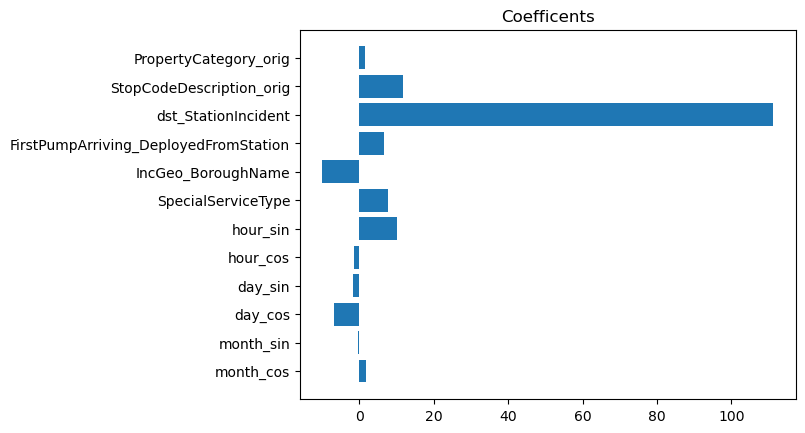

In [124]:
imp_coef = model_elastic.coef_
plt.barh(range(0,len(imp_coef)),imp_coef)
plt.yticks(range(len(imp_coef)),X_reg.columns)
plt.title("Coefficents");
plt.show()



In [125]:
model_elastic.alpha_

0.00014563484775012445

In [126]:
model_elastic.coef_

array([  1.82902615,  -0.32111792,  -6.84607959,  -1.72370251,
        -1.30901224,  10.24924555,   7.71263856,  -9.90706692,
         6.52699452, 111.26142164,  11.80654221,   1.43784004])

In [127]:
pd.DataFrame({"variable" : X_test.columns,
             "coeff" : model_elastic.coef_,
              "intercept" : model_elastic.intercept_}).sort_values("coeff")


variable       coeff  intercept
7                      IncGeo_BoroughName   -9.907067  302.16893
2                                 day_cos   -6.846080  302.16893
3                                 day_sin   -1.723703  302.16893
4                                hour_cos   -1.309012  302.16893
1                               month_sin   -0.321118  302.16893
11                  PropertyCategory_orig    1.437840  302.16893
0                               month_cos    1.829026  302.16893
8   FirstPumpArriving_DeployedFromStation    6.526995  302.16893
6                      SpecialServiceType    7.712639  302.16893
5                                hour_sin   10.249246  302.16893
10               StopCodeDescription_orig   11.806542  302.16893
9                     dst_StationIncident  111.261422  302.16893

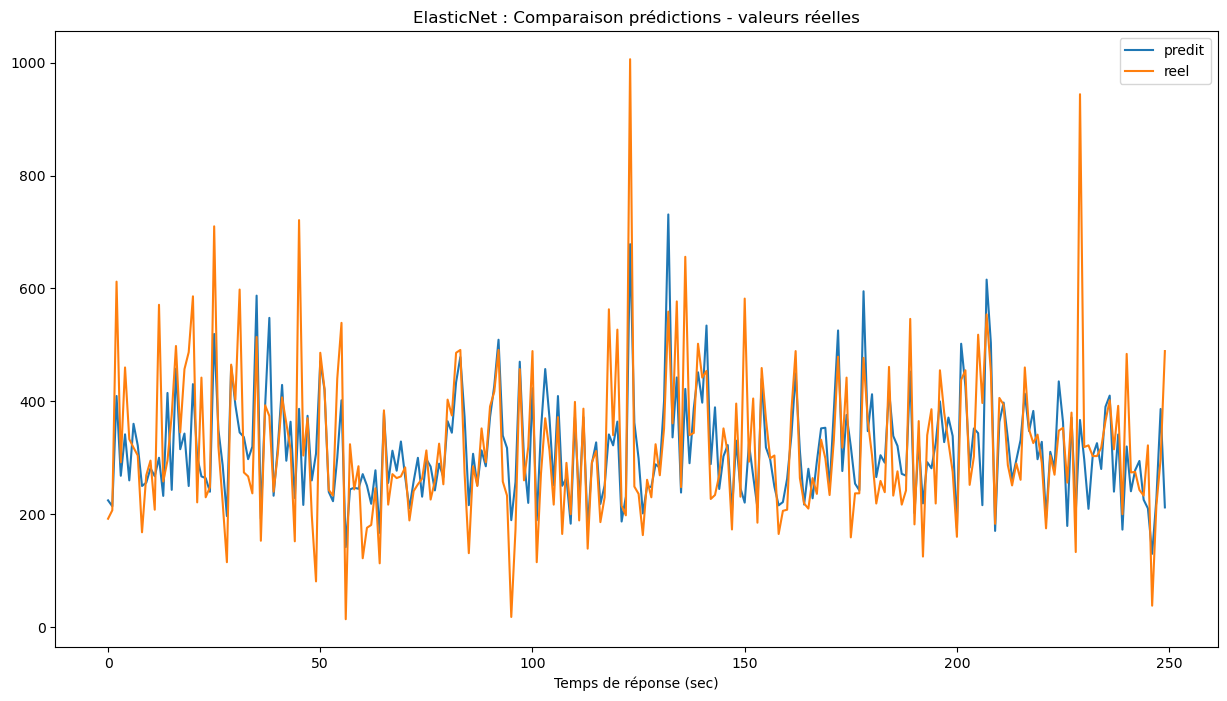

In [128]:
y_pred_test = model_elastic.predict(X_test_scaled)

plt.figure(figsize = (15,8))
plt.plot(y_pred_test[0:250])
plt.plot(y_test[0:250].values)
plt.legend(["predit","reel"])
plt.title("ElasticNet : Comparaison prédictions - valeurs réelles")
plt.xlabel("Temps de réponse (sec)")
plt.show()

In [129]:
y_pred_train = model_elastic.predict(X_train_scaled)
y_pred_test = model_elastic.predict(X_test_scaled)

scr = calcul_metrics_reg(y_train,y_pred_train,y_test,y_pred_test)

elastic = pd.DataFrame(data =scr, columns=["R2 train",'R2 test',"MAE train","MAE test","Diff MAE train-test",
                                              "MSE train",'MSE test',"Diff MSE train-test"],
                                              index=["Modele elastic"])

reg_scores = pd.concat([reg_scores,elastic])
reg_scores



R2 train   R2 test  MAE train   MAE test  \
reg lineaire naive  0.502686  0.508809  60.934104  60.906799   
reg lineaire RFE    0.502127  0.508079  60.936490  60.917883   
Modele ridge        0.502686  0.508809  60.934217  60.906862   
Modele ridge        0.502686  0.508809  60.934099  60.906791   
Modele elastic      0.502686  0.508809  60.934371  60.906947   

                    Diff MAE train-test    MSE train     MSE test  \
reg lineaire naive             0.027306  8530.523397  8425.224105   
reg lineaire RFE               0.018607  8540.116941  8437.738929   
Modele ridge                   0.027355  8530.523450  8425.218561   
Modele ridge                   0.027308  8530.523397  8425.224041   
Modele elastic                 0.027424  8530.523695  8425.211122   

                    Diff MSE train-test  
reg lineaire naive           105.299292  
reg lineaire RFE             102.378013  
Modele ridge                 105.304889  
Modele ridge                 105.299356  
Modele elastic               105.312573

### Regression poylnomiale

In [130]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import ElasticNet

In [131]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import ElasticNet

polynomial_features= PolynomialFeatures(degree=3)

X_train_poly = polynomial_features.fit_transform(X_train_scaled)
X_test_poly = polynomial_features.transform(X_test_scaled)


model = ElasticNet(alpha= model_elastic.alpha_ , l1_ratio= model_elastic.l1_ratio_)
model.fit(X_train_poly, y_train)



c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.885e+08, tolerance: 3.712e+05
  model = cd_fast.enet_coordinate_descent(


ElasticNet(alpha=0.00014563484775012445, l1_ratio=0.25)

In [132]:
y_poly_pred = model.predict(X_test_poly)


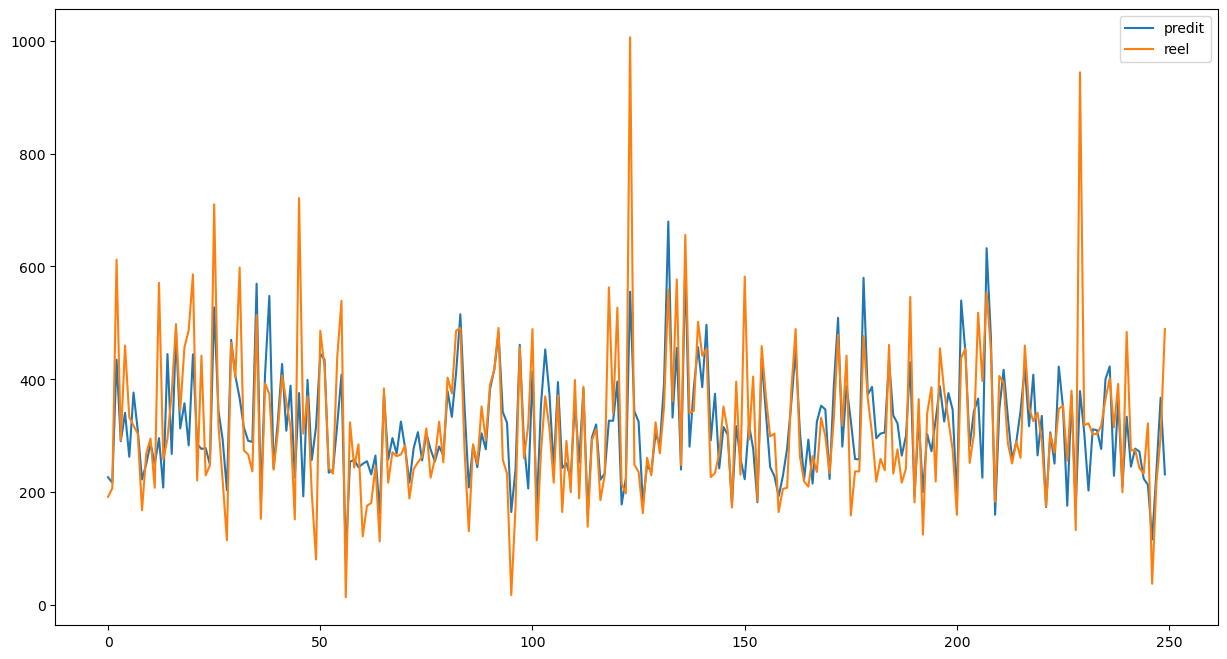

In [133]:
plt.figure(figsize = (15,8))
plt.plot(y_poly_pred[0:250])
plt.plot(y_test[0:250].values)
plt.legend(["predit","reel"])
plt.show()

In [134]:
print("Score train modele poly 3:",model.score(X_train_poly,y_train))
print("Score test modele poly 3:",model.score(X_test_poly,y_test))
print("MAE train:",mean_absolute_error(y_train,model.predict(X_train_poly)))
print("MAE test:",mean_absolute_error(y_test,model.predict(X_test_poly)))
print("MSE train:",mean_squared_error(y_train,model.predict(X_train_poly)))
print("MSE test:",mean_squared_error(y_test,model.predict(X_test_poly)))


Score train modele poly 3: 0.5204306270490993
Score test modele poly 3: 0.5242769732057144
MAE train: 59.19434270427062
MAE test: 59.26649173133734
MSE train: 8226.15276024915
MSE test: 8159.901231303928


In [135]:

y_pred_train = model.predict(X_train_poly)
y_pred_test = model.predict(X_test_poly)

scr = calcul_metrics_reg(y_train,y_pred_train,y_test,y_pred_test)

df_elastic_poly = pd.DataFrame(data =scr, columns=["R2 train",'R2 test',"MAE train","MAE test","Diff MAE train-test",
                                              "MSE train",'MSE test',"Diff MSE train-test"],
                                              index=["Modele elastic poly 3"])

reg_scores = pd.concat([reg_scores,df_elastic_poly])
reg_scores


R2 train   R2 test  MAE train   MAE test  \
reg lineaire naive     0.502686  0.508809  60.934104  60.906799   
reg lineaire RFE       0.502127  0.508079  60.936490  60.917883   
Modele ridge           0.502686  0.508809  60.934217  60.906862   
Modele ridge           0.502686  0.508809  60.934099  60.906791   
Modele elastic         0.502686  0.508809  60.934371  60.906947   
Modele elastic poly 3  0.520431  0.524277  59.194343  59.266492   

                       Diff MAE train-test    MSE train     MSE test  \
reg lineaire naive                0.027306  8530.523397  8425.224105   
reg lineaire RFE                  0.018607  8540.116941  8437.738929   
Modele ridge                      0.027355  8530.523450  8425.218561   
Modele ridge                      0.027308  8530.523397  8425.224041   
Modele elastic                    0.027424  8530.523695  8425.211122   
Modele elastic poly 3            -0.072149  8226.152760  8159.901231   

                       Diff MSE train-test  
reg lineaire naive              105.299292  
reg lineaire RFE                102.378013  
Modele ridge                    105.304889  
Modele ridge                    105.299356  
Modele elastic                  105.312573  
Modele elastic poly 3            66.251529

### RandomForestRegression 

In [159]:
from sklearn.ensemble import RandomForestRegressor

In [137]:
RFR = RandomForestRegressor(n_estimators = 2, max_features = 'sqrt', max_depth = 5, random_state = 42).fit(X_train_scaled, y_train)


In [140]:
pd.DataFrame({"variable" : X_test.columns,
             "feat_imp" : RFR.feature_importances_,
              }).sort_values("feat_imp",ascending=False)


variable  feat_imp
9                     dst_StationIncident  0.959718
6                      SpecialServiceType  0.010890
4                                hour_cos  0.007100
5                                hour_sin  0.005670
11                  PropertyCategory_orig  0.004748
8   FirstPumpArriving_DeployedFromStation  0.004586
10               StopCodeDescription_orig  0.003799
7                      IncGeo_BoroughName  0.003291
0                               month_cos  0.000182
3                                 day_sin  0.000015
1                               month_sin  0.000000
2                                 day_cos  0.000000

In [139]:
print("Score train modele full:",RFR.score(X_train_scaled,y_train))
print("Score test modele full:",RFR.score(X_test_scaled,y_test))
print("MSE train:",mean_squared_error(y_train,RFR.predict(X_train_scaled)))
print("MSE test:",mean_squared_error(y_test,RFR.predict(X_test_scaled)))
print("MAE train:",mean_absolute_error(y_train,RFR.predict(X_train_scaled)))
print("MAE test:",mean_absolute_error(y_test,RFR.predict(X_test_scaled)))


Score train modele full: 0.4317094490463662
Score test modele full: 0.43367441270682616
MSE train: 9748.005498318937
MSE test: 9713.973461013049
MAE train: 66.33466389944533
MAE test: 66.38310382146142


In [ ]:
# gridCV sur le RandomForestReg avec les meilleurs paramètres

parametres = {
              "n_estimators" : [100,150,200,300],
              'min_samples_leaf': [1,3,5],
              'max_features': ['sqrt', 'log2'],
              "max_depth" : [3,5,7,None]
              }

RFR_tuned = RandomForestRegressor(n_jobs = -1)

grille = GridSearchCV(RFR_tuned, param_grid = parametres,scoring= "neg_mean_absolute_error", cv = 5)



In [ ]:
grille.fit(X_train_scaled,y_train)

In [ ]:
# new
print(grille.best_params_)
print(grille.best_score_)


In [ ]:
print(grille.best_params_)
print(grille.best_score_)


In [ ]:
plt.plot(grille.cv_results_["mean_test_score"])


In [ ]:
#RFR_tuned = RandomForestRegressor(**grille.best_params_).fit(X_train_scaled,y_train)

In [161]:
RandomForest_reg = pickle.load(open("ModelesLineaire_old/RandomForest", 'rb'))

In [165]:
RandomForest_reg.get_params

<bound method BaseEstimator.get_params of RandomForestRegressor(max_features='log2', min_samples_leaf=3, n_estimators=300,
                      n_jobs=-1)>

In [ ]:
RFR_tuned = grille.best_estimator_.fit(X_train_scaled,y_train)

In [168]:
para = {"max_features":'log2', "min_samples_leaf":3, "n_estimators":300}

RFR_tuned = RandomForestRegressor(**para).fit(X_train_scaled,y_train)

In [169]:
pd.DataFrame({"variable" : X_test.columns,
             "feat_imp" : RFR_tuned.feature_importances_,
              }).sort_values("feat_imp",ascending=False)


variable  feat_imp
9                     dst_StationIncident  0.651992
8   FirstPumpArriving_DeployedFromStation  0.074868
7                      IncGeo_BoroughName  0.057753
5                                hour_sin  0.033357
4                                hour_cos  0.032813
0                               month_cos  0.025965
1                               month_sin  0.025911
3                                 day_sin  0.023696
11                  PropertyCategory_orig  0.022516
6                      SpecialServiceType  0.021817
2                                 day_cos  0.016428
10               StopCodeDescription_orig  0.012882

In [170]:
y_pred_train = RFR_tuned.predict(X_train_scaled)
y_pred_test = RFR_tuned.predict(X_test_scaled)

scr = calcul_metrics_reg(y_train,y_pred_train,y_test,y_pred_test)

RandomFor = pd.DataFrame(data =scr, columns=["R2 train",'R2 test',"MAE train","MAE test","Diff MAE train-test",
                                              "MSE train",'MSE test',"Diff MSE train-test"],
                                              index=["RandomForest"])

reg_scores = pd.concat([reg_scores,RandomFor])
reg_scores



R2 train   R2 test  MAE train   MAE test  \
reg lineaire naive     0.502686  0.508809  60.934104  60.906799   
reg lineaire RFE       0.502127  0.508079  60.936490  60.917883   
Modele ridge           0.502686  0.508809  60.934217  60.906862   
Modele ridge           0.502686  0.508809  60.934099  60.906791   
Modele elastic         0.502686  0.508809  60.934371  60.906947   
Modele elastic poly 3  0.520431  0.524277  59.194343  59.266492   
XBG                    0.562394  0.547389  55.836441  57.004702   
RandomForest           0.761008  0.540548  40.118965  57.819346   

                       Diff MAE train-test    MSE train     MSE test  \
reg lineaire naive                0.027306  8530.523397  8425.224105   
reg lineaire RFE                  0.018607  8540.116941  8437.738929   
Modele ridge                      0.027355  8530.523450  8425.218561   
Modele ridge                      0.027308  8530.523397  8425.224041   
Modele elastic                    0.027424  8530.523695  8425.211122   
Modele elastic poly 3            -0.072149  8226.152760  8159.901231   
XBG                              -1.168261  7506.351812  7763.468730   
RandomForest                    -17.700381  4099.483812  7880.809971   

                       Diff MSE train-test  
reg lineaire naive              105.299292  
reg lineaire RFE                102.378013  
Modele ridge                    105.304889  
Modele ridge                    105.299356  
Modele elastic                  105.312573  
Modele elastic poly 3            66.251529  
XBG                            -257.116918  
RandomForest                  -3781.326159

### XGBoost

In [141]:
import xgboost as xgb 
from xgboost import XGBRegressor

In [ ]:
# Préparation des données


X_reg = df_2020_mod.drop(columns=["FirstPumpArriving_TurnoutTimeSec","Weekday","Month","HourOfCall","Week_Weekend","CalYear","Same_Incident_Station",
                          "FirstPumpArriving_AttendanceTime","AttendanceTime_Min","FirstPump_Delayed",
                          "Station_DelayFreq","IncGeo_WardNameNew","Ward_DelayFreq","Bo_DelayFreq" ,'Incident_Fire', 'Incident_Special Service',
       'StopCode_Primary Fire', 'StopCode_Secondary Fire',
       'StopCode_Special Service', '_Non Residential', '_Other Residential',
       '_Outdoor', '_Outdoor Structure', '_Road Vehicle',"London_Zone"])


y_reg = df_2020_mod.FirstPumpArriving_AttendanceTime
cat_variables = ["IncGeo_BoroughName","IncGeo_WardNameNew","FirstPumpArriving_DeployedFromStation","SpecialServiceType"]

# pour éviter de scaler les 1 et 0
no_binary_variables = ['month_cos', 'month_sin', 'day_cos', 'day_sin', 'hour_cos', 'hour_sin',
       'SpecialServiceType', 'IncGeo_BoroughName', 'IncGeo_WardNameNew','FirstPumpArriving_DeployedFromStation',
       'dst_StationIncident']
binary_variables =['Same_Incident_Station','London_Zone','Incident_Fire', 'Incident_Special Service',
       'StopCode_Primary Fire', 'StopCode_Secondary Fire',
       'StopCode_Special Service', '_Non Residential', '_Other Residential',
       '_Outdoor', '_Outdoor Structure', '_Road Vehicle']


In [ ]:
#retrait des temps d'arrivé inférieur à 1min
X_reg = X_reg[-(y_reg < 60)]
y_reg = y_reg[-(y_reg < 60)]


In [ ]:
# préparation des variables
from sklearn.preprocessing import RobustScaler
from feature_engine.encoding import MeanEncoder

X_train, X_test, y_train,y_test = train_test_split(X_reg,y_reg, test_size=0.25,random_state = 42)

# Mean encoding avec feat-engine
mean_enc = MeanEncoder(smoothing='auto',unseen='encode')
X_train = mean_enc.fit_transform(X_train,y_train)
X_test = mean_enc.transform(X_test)

# Scale
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#X_train_nobin = pd.DataFrame(scaler.fit_transform(X_train[no_binary_variables]),columns=X_train[no_binary_variables].columns).reset_index(drop=True)
#X_test_nobin = pd.DataFrame(scaler.transform(X_test[no_binary_variables]),columns=X_train[no_binary_variables].columns).reset_index(drop=True)

#X_train_bin = pd.DataFrame(X_train[binary_variables]).reset_index(drop=True)
#X_test_bin = pd.DataFrame(X_test[binary_variables]).reset_index(drop=True)

#X_train_scaled = pd.concat([X_train_bin,X_train_nobin], axis = 1)
#X_test_scaled = pd.concat([X_test_bin,X_test_nobin], axis = 1)




In [142]:
xg = XGBRegressor(alpha = 0.6, reg_lambda= 0.5,n_estimators = 700, eval_metric = "mae", eta =0.001).fit(X_train_scaled,y_train)



In [143]:
print(xg.score(X_train_scaled,y_train))
print(xg.score(X_test_scaled,y_test))

0.3817484191463173
0.3848810120690218


In [ ]:
### avec cv 10
# gridCV sur le RandomForestReg avec les meilleurs paramètres

parametres = {"n_estimators" : [100,150,250,500],
              'reg_lambda' : [0.1,0.3,0.6,0.75,0.9,10,15],
              'reg_alpha' : [0.001, 0.01, 0.02,0.05,0.8,1],
              "learning_rate" : [0.01,0.025,0.034],
              "max_depth" : [3,5,7]

              }

xg = XGBRegressor()

grilleXG = GridSearchCV(xg, param_grid = parametres, scoring= "neg_mean_absolute_error", cv = 5, n_jobs=-1).fit(X_train_scaled,y_train)



In [ ]:
grilleXG.best_params_

In [ ]:
grilleXG.best_params_
#meiileur parameres conservés

In [ ]:
plt.plot(grilleXG.cv_results_["mean_test_score"])

In [ ]:
XGB_tuned = grilleXG.best_estimator_.fit(X_train_scaled,y_train)

In [144]:
#XGB_tuned = XGBRegressor(**grilleXG.best_params_).fit(X_train_scaled,y_train)
# learning_rate': 0.034,
#  'max_depth': 7,
#  'n_estimators': 500,
#  'reg_alpha': 0.001,
#  'reg_lambda': 15
XGB_tuned1 = XGBRegressor(learning_rate = 0.034 ,max_depth= 7, n_estimators= 250,reg_alpha= 0.02,reg_lambda = 10).fit(X_train_scaled,y_train)

XGB_tuned2 = XGBRegressor(learning_rate = 0.034 ,max_depth= 7, n_estimators= 500,reg_alpha= 0.001,reg_lambda = 15).fit(X_train_scaled,y_train)



In [ ]:
min_child_weight 
 eval_metric  mae 
max_depth 
gamma 
booster gbtree

In [148]:
parametres = {"min_child_weight" : [1,3,4,6],
            'eval_metric' : ["mae"],
            'gamma' : [20,30,45,60,68],
            "booster" : ["gbtree"]

            }

xg = XGBRegressor(learning_rate = 0.034 ,max_depth= 7, n_estimators= 250,reg_alpha= 0.02,reg_lambda = 10)

grilleXG2 = GridSearchCV(xg, param_grid = parametres, scoring= "neg_mean_absolute_error", cv = 5, n_jobs=-1).fit(X_train_scaled,y_train)



In [149]:
grilleXG2.best_params_

{'booster': 'gbtree', 'eval_metric': 'mae', 'gamma': 20, 'min_child_weight': 1}

In [151]:
XGB = grilleXG2.best_estimator_.fit(X_train_scaled,y_train)

In [152]:
print("score train",XGB_tuned1.score(X_train_scaled,y_train))
print("score test",XGB_tuned1.score(X_test_scaled,y_test))

print("score train",XGB.score(X_train_scaled,y_train))
print("score test",XGB.score(X_test_scaled,y_test))

score train 0.5623936812032172
score test 0.5473890480521935
score train 0.562393680681947
score test 0.5473890261911358


In [ ]:
pd.DataFrame({"variable" : X_test.columns,
             "feat_imp" : XGB_tuned2.feature_importances_,
              }).sort_values("feat_imp",ascending=False)


In [ ]:
plt.figure(figsize = (15,8))
plt.plot(XGB_tuned.predict(X_test_scaled)[0:250])
plt.plot(y_test[0:250].values)
plt.legend(["predit","reel"])
plt.show()

In [155]:
y_pred_train = XGB.predict(X_train_scaled)
y_pred_test = XGB.predict(X_test_scaled)

scr = calcul_metrics_reg(y_train,y_pred_train,y_test,y_pred_test)

XGBoost = pd.DataFrame(data =scr, columns=["R2 train",'R2 test',"MAE train","MAE test","Diff MAE train-test",
                                              "MSE train",'MSE test',"Diff MSE train-test"],
                                              index=["XBG"])

XGBoost


R2 train   R2 test  MAE train   MAE test  Diff MAE train-test  \
XBG  0.562394  0.547389  55.836441  57.004702            -1.168261   

       MSE train    MSE test  Diff MSE train-test  
XBG  7506.351812  7763.46873          -257.116918

In [156]:
y_pred_train = XGB.predict(X_train_scaled)
y_pred_test = XGB.predict(X_test_scaled)

scr = calcul_metrics_reg(y_train,y_pred_train,y_test,y_pred_test)

XGBoost = pd.DataFrame(data =scr, columns=["R2 train",'R2 test',"MAE train","MAE test","Diff MAE train-test",
                                              "MSE train",'MSE test',"Diff MSE train-test"],
                                              index=["XBG"])

reg_scores = pd.concat([reg_scores,XGBoost])
reg_scores



R2 train   R2 test  MAE train   MAE test  \
reg lineaire naive     0.502686  0.508809  60.934104  60.906799   
reg lineaire RFE       0.502127  0.508079  60.936490  60.917883   
Modele ridge           0.502686  0.508809  60.934217  60.906862   
Modele ridge           0.502686  0.508809  60.934099  60.906791   
Modele elastic         0.502686  0.508809  60.934371  60.906947   
Modele elastic poly 3  0.520431  0.524277  59.194343  59.266492   
XBG                    0.562394  0.547389  55.836441  57.004702   

                       Diff MAE train-test    MSE train     MSE test  \
reg lineaire naive                0.027306  8530.523397  8425.224105   
reg lineaire RFE                  0.018607  8540.116941  8437.738929   
Modele ridge                      0.027355  8530.523450  8425.218561   
Modele ridge                      0.027308  8530.523397  8425.224041   
Modele elastic                    0.027424  8530.523695  8425.211122   
Modele elastic poly 3            -0.072149  8226.152760  8159.901231   
XBG                              -1.168261  7506.351812  7763.468730   

                       Diff MSE train-test  
reg lineaire naive              105.299292  
reg lineaire RFE                102.378013  
Modele ridge                    105.304889  
Modele ridge                    105.299356  
Modele elastic                  105.312573  
Modele elastic poly 3            66.251529  
XBG                            -257.116918

### XGBoost avec optuna

In [ ]:
pip install optuna

In [20]:
import optuna
import xgboost as xgb 
from xgboost import XGBRegressor

In [46]:
# Préparation des données


X_reg = df_2020_mod.drop(columns=["FirstPumpArriving_TurnoutTimeSec","HourOfCall","Weekday","Month","Periode","Periode_Rush","Week_Weekend","CalYear","Same_Incident_Station",
                          "FirstPumpArriving_AttendanceTime","AttendanceTime_Min","FirstPump_Delayed",
                          "Station_DelayFreq","IncGeo_WardNameNew","Ward_DelayFreq","Bo_DelayFreq" ,'Incident_Fire', 'Incident_Special Service',
       'StopCode_Primary Fire', 'StopCode_Secondary Fire',"month_sin","month_cos",
       'StopCode_Special Service', '_Non Residential', '_Other Residential',
       '_Outdoor', '_Outdoor Structure', '_Road Vehicle',"_Other Vehicle","London_Zone","IncidentGroup_orig"])

y_reg = df_2020_mod.FirstPumpArriving_AttendanceTime
cat_variables = ["IncGeo_BoroughName","IncGeo_WardNameNew","FirstPumpArriving_DeployedFromStation","SpecialServiceType"]

# pour éviter de scaler les 1 et 0
no_binary_variables = ['day_cos', 'day_sin', 'hour_cos', 'hour_sin',
       'SpecialServiceType', 'IncGeo_BoroughName', 'IncGeo_WardNameNew','FirstPumpArriving_DeployedFromStation',
       'dst_StationIncident']
binary_variables =['Same_Incident_Station','London_Zone','Incident_Fire', 'Incident_Special Service',
       'StopCode_Primary Fire', 'StopCode_Secondary Fire',
       'StopCode_Special Service', '_Non Residential', '_Other Residential',
       '_Outdoor', '_Outdoor Structure', '_Road Vehicle']

#retrait des temps d'arrivé inférieur à 1min
X_reg = X_reg[-(y_reg < 60)]
y_reg = y_reg[-(y_reg < 60)]



In [47]:
# préparation des variables
from sklearn.preprocessing import RobustScaler
from feature_engine.encoding import MeanEncoder

X_train, X_test, y_train,y_test = train_test_split(X_reg,y_reg, test_size=0.25,random_state = 42)

# Mean encoding avec feat-engine
mean_enc = MeanEncoder(smoothing='auto')
X_train = mean_enc.fit_transform(X_train,y_train)
X_test = mean_enc.transform(X_test)

# Scale
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#X_train_nobin = pd.DataFrame(scaler.fit_transform(X_train[no_binary_variables]),columns=X_train[no_binary_variables].columns).reset_index(drop=True)
#X_test_nobin = pd.DataFrame(scaler.transform(X_test[no_binary_variables]),columns=X_train[no_binary_variables].columns).reset_index(drop=True)

#X_train_bin = pd.DataFrame(X_train[binary_variables]).reset_index(drop=True)
#X_test_bin = pd.DataFrame(X_test[binary_variables]).reset_index(drop=True)

#X_train_scaled = pd.concat([X_train_bin,X_train_nobin], axis = 1)
#X_test_scaled = pd.concat([X_test_bin,X_test_nobin], axis = 1)




In [27]:
D_train = xgb.DMatrix(X_train_scaled, label = y_train)
D_test = xgb.DMatrix(X_test_scaled, label =y_test)

In [24]:
# test avec peu de parameter
def objective(trial) :

    parametres = { "n_estimators" : trial.suggest_int("n_estimators" , 100,500),
                  'subsample': trial.suggest_float('subsample', 0.1, 1.0),
                "reg_lambda" : trial.suggest_float("reg_lambda", 0.01,10, log =True),
                'reg_alpha' : trial.suggest_float("reg_alpha" ,0.001, 10,log= True),
                "learning_rate" : trial.suggest_float("learning_rate", 0.001,0.034 ,log=True),
                'gamma': trial.suggest_float('gamma', 1e-5, 1.0, log= True),
                "booster" : trial.suggest_categorical('booster', ['gblinear', 'gbtree']),
                "objective" : "reg:squarederror",
                
                'n_jobs': -1

                }

    model = xgb.train(parametres, D_train, evals = [(D_train, 'train'),(D_test, 'test')])

    y_pred = model.predict(D_test)
    
    score_model = mean_absolute_error(y_test, y_pred)
    return score_model

In [28]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=200,timeout=300)

[I 2024-07-27 15:07:30,907] A new study created in memory with name: no-name-20a95821-f9b6-494d-bef6-e38b0141418c


[0]	train-rmse:126.48893	test-rmse:127.51015
[1]	train-rmse:124.81112	test-rmse:125.79560
[2]	train-rmse:123.23107	test-rmse:124.18035
[3]	train-rmse:121.74214	test-rmse:122.65773
[4]	train-rmse:120.33819	test-rmse:121.22152
[5]	train-rmse:119.01459	test-rmse:119.86711
[6]	train-rmse:117.76370	test-rmse:118.58668
[7]	train-rmse:116.58183	test-rmse:117.37655
[8]	train-rmse:115.46446	test-rmse:116.23215
[9]	train-rmse:114.40967	test-rmse:115.15158


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:30] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "gamma", "n_estimators", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-07-27 15:07:31,073] Trial 0 finished with value: 82.77035891747413 and parameters: {'n_estimators': 147, 'subsample': 0.7263964742562513, 'reg_lambda': 0.04399350152693589, 'reg_alpha': 0.0020049266567243166, 'learning_rate': 0.024658760838971804, 'gamma': 0.0005015746903160613, 'booster': 'gblinear'}. Best is trial 0 with value: 82.77035891747413.
c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:31] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	train-rmse:127.99704	test-rmse:129.05282
[1]	train-rmse:127.73442	test-rmse:128.78646
[2]	train-rmse:127.47385	test-rmse:128.52237
[3]	train-rmse:127.21617	test-rmse:128.26142
[4]	train-rmse:126.95666	test-rmse:127.99833
[5]	train-rmse:126.69932	test-rmse:127.73809
[6]	train-rmse:126.44307	test-rmse:127.47839
[7]	train-rmse:126.19042	test-rmse:127.22226
[8]	train-rmse:125.93977	test-rmse:126.96812
[9]	train-rmse:125.69062	test-rmse:126.71604


[I 2024-07-27 15:07:31,282] Trial 1 finished with value: 92.15967257180985 and parameters: {'n_estimators': 390, 'subsample': 0.21045546728517245, 'reg_lambda': 0.19650212883313, 'reg_alpha': 0.18295315797766315, 'learning_rate': 0.004125398564493841, 'gamma': 2.361282093963616e-05, 'booster': 'gbtree'}. Best is trial 0 with value: 82.77035891747413.


[0]	train-rmse:128.06822	test-rmse:129.12350
[1]	train-rmse:127.87353	test-rmse:128.92466
[2]	train-rmse:127.68009	test-rmse:128.72709
[3]	train-rmse:127.48790	test-rmse:128.53078
[4]	train-rmse:127.29694	test-rmse:128.33573
[5]	train-rmse:127.10721	test-rmse:128.14192
[6]	train-rmse:126.91869	test-rmse:127.94935
[7]	train-rmse:126.73139	test-rmse:127.75801
[8]	train-rmse:126.54528	test-rmse:127.56788
[9]	train-rmse:126.36037	test-rmse:127.37897


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:31] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "gamma", "n_estimators", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-07-27 15:07:31,442] Trial 2 finished with value: 92.76401232212226 and parameters: {'n_estimators': 369, 'subsample': 0.9702935354013845, 'reg_lambda': 0.036490468207504595, 'reg_alpha': 0.021447288675559832, 'learning_rate': 0.0026565243917186713, 'gamma': 0.00011716917718999281, 'booster': 'gblinear'}. Best is trial 0 with value: 82.77035891747413.


[0]	train-rmse:127.89025	test-rmse:128.94173


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:31] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "gamma", "n_estimators", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[1]	train-rmse:127.52102	test-rmse:128.56461
[2]	train-rmse:127.15628	test-rmse:128.19204
[3]	train-rmse:126.79602	test-rmse:127.82403
[4]	train-rmse:126.44020	test-rmse:127.46053
[5]	train-rmse:126.08884	test-rmse:127.10154
[6]	train-rmse:125.74200	test-rmse:126.74716
[7]	train-rmse:125.39909	test-rmse:126.39676
[8]	train-rmse:125.06058	test-rmse:126.05085
[9]	train-rmse:124.72598	test-rmse:125.70888


[I 2024-07-27 15:07:31,633] Trial 3 finished with value: 91.42439604106387 and parameters: {'n_estimators': 336, 'subsample': 0.37175470618800044, 'reg_lambda': 0.04754733938921357, 'reg_alpha': 0.07008780960121426, 'learning_rate': 0.005162282765415917, 'gamma': 0.02970990802473076, 'booster': 'gblinear'}. Best is trial 0 with value: 82.77035891747413.


[0]	train-rmse:127.98772	test-rmse:129.04318
[1]	train-rmse:127.71334	test-rmse:128.76485
[2]	train-rmse:127.44037	test-rmse:128.48831
[3]	train-rmse:127.16917	test-rmse:128.21315
[4]	train-rmse:126.89950	test-rmse:127.93985
[5]	train-rmse:126.63193	test-rmse:127.66851
[6]	train-rmse:126.36626	test-rmse:127.39885
[7]	train-rmse:126.10226	test-rmse:127.13122
[8]	train-rmse:125.83979	test-rmse:126.86495
[9]	train-rmse:125.57924	test-rmse:126.60075


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:31] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-07-27 15:07:31,805] Trial 4 finished with value: 92.06302386509702 and parameters: {'n_estimators': 258, 'subsample': 0.9584047786752911, 'reg_lambda': 0.11553861150483904, 'reg_alpha': 0.022681815505737345, 'learning_rate': 0.004307541062594919, 'gamma': 0.6258903114654375, 'booster': 'gbtree'}. Best is trial 0 with value: 82.77035891747413.


[0]	train-rmse:128.15591	test-rmse:129.21305


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:31] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "gamma", "n_estimators", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[1]	train-rmse:128.04811	test-rmse:129.10296
[2]	train-rmse:127.94077	test-rmse:128.99333
[3]	train-rmse:127.83389	test-rmse:128.88418
[4]	train-rmse:127.72748	test-rmse:128.77549
[5]	train-rmse:127.62152	test-rmse:128.66727
[6]	train-rmse:127.51602	test-rmse:128.55951
[7]	train-rmse:127.41097	test-rmse:128.45222
[8]	train-rmse:127.30637	test-rmse:128.34538
[9]	train-rmse:127.20222	test-rmse:128.23900


[I 2024-07-27 15:07:31,962] Trial 5 finished with value: 93.4652408870788 and parameters: {'n_estimators': 154, 'subsample': 0.2553274758927501, 'reg_lambda': 0.43465993701118705, 'reg_alpha': 0.0019634584592268583, 'learning_rate': 0.0022889523929950795, 'gamma': 0.2841047611104229, 'booster': 'gblinear'}. Best is trial 0 with value: 82.77035891747413.


[0]	train-rmse:128.12860	test-rmse:129.18516

c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:31] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "gamma", "n_estimators", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)



[1]	train-rmse:127.99363	test-rmse:129.04732
[2]	train-rmse:127.85925	test-rmse:128.91008
[3]	train-rmse:127.72547	test-rmse:128.77344
[4]	train-rmse:127.59228	test-rmse:128.63741
[5]	train-rmse:127.45969	test-rmse:128.50198
[6]	train-rmse:127.32768	test-rmse:128.36714
[7]	train-rmse:127.19626	test-rmse:128.23290
[8]	train-rmse:127.06542	test-rmse:128.09925
[9]	train-rmse:126.93515	test-rmse:127.96619


[I 2024-07-27 15:07:32,129] Trial 6 finished with value: 93.23669826745096 and parameters: {'n_estimators': 127, 'subsample': 0.14972381854969605, 'reg_lambda': 0.016978662583968716, 'reg_alpha': 0.8029509518562272, 'learning_rate': 0.0018201167529572862, 'gamma': 0.15661328617601186, 'booster': 'gblinear'}. Best is trial 0 with value: 82.77035891747413.


[0]	train-rmse:127.95902	test-rmse:129.01434


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:32] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[1]	train-rmse:127.65591	test-rmse:128.70691
[2]	train-rmse:127.35510	test-rmse:128.40207
[3]	train-rmse:127.05652	test-rmse:128.09920
[4]	train-rmse:126.75884	test-rmse:127.79751
[5]	train-rmse:126.46398	test-rmse:127.49875
[6]	train-rmse:126.17264	test-rmse:127.20341
[7]	train-rmse:125.88230	test-rmse:126.90912
[8]	train-rmse:125.59415	test-rmse:126.61694
[9]	train-rmse:125.30814	test-rmse:126.32687


[I 2024-07-27 15:07:32,334] Trial 7 finished with value: 91.83492785754335 and parameters: {'n_estimators': 207, 'subsample': 0.7729516577336355, 'reg_lambda': 0.26202634650014156, 'reg_alpha': 0.38755676871111205, 'learning_rate': 0.004755689596541315, 'gamma': 3.032385359525173e-05, 'booster': 'gbtree'}. Best is trial 0 with value: 82.77035891747413.


[0]	train-rmse:127.44083	test-rmse:128.48269
[1]	train-rmse:126.64066	test-rmse:127.66531
[2]	train-rmse:125.86294	test-rmse:126.87072
[3]	train-rmse:125.10692	test-rmse:126.09819
[4]	train-rmse:124.37191	test-rmse:125.34700
[5]	train-rmse:123.65721	test-rmse:124.61646
[6]	train-rmse:122.96219	test-rmse:123.90592
[7]	train-rmse:122.28620	test-rmse:123.21473
[8]	train-rmse:121.62862	test-rmse:122.54228
[9]	train-rmse:120.98886	test-rmse:121.88796


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:32] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "gamma", "n_estimators", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-07-27 15:07:32,499] Trial 8 finished with value: 88.35227811699234 and parameters: {'n_estimators': 309, 'subsample': 0.9711611408316939, 'reg_lambda': 0.1194764817418967, 'reg_alpha': 0.10459736170625705, 'learning_rate': 0.012568626655659226, 'gamma': 0.004012311742719687, 'booster': 'gblinear'}. Best is trial 0 with value: 82.77035891747413.


[0]	train-rmse:128.08841	test-rmse:129.14412


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:32] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "gamma", "n_estimators", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[1]	train-rmse:127.91404	test-rmse:128.96604
[2]	train-rmse:127.74105	test-rmse:128.78936
[3]	train-rmse:127.56943	test-rmse:128.61408
[4]	train-rmse:127.39920	test-rmse:128.44021
[5]	train-rmse:127.23029	test-rmse:128.26769
[6]	train-rmse:127.06270	test-rmse:128.09651
[7]	train-rmse:126.89644	test-rmse:127.92669
[8]	train-rmse:126.73149	test-rmse:127.75819
[9]	train-rmse:126.56784	test-rmse:127.59102


[I 2024-07-27 15:07:32,658] Trial 9 finished with value: 92.96859159488683 and parameters: {'n_estimators': 324, 'subsample': 0.7303953700709096, 'reg_lambda': 0.6356854691576849, 'reg_alpha': 2.908875993734827, 'learning_rate': 0.0046653982697125234, 'gamma': 0.057958000778069806, 'booster': 'gblinear'}. Best is trial 0 with value: 82.77035891747413.
c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:32] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	train-rmse:126.36222	test-rmse:127.39704
[1]	train-rmse:124.54499	test-rmse:125.55262
[2]	train-rmse:122.81181	test-rmse:123.79467
[3]	train-rmse:121.15580	test-rmse:122.11555
[4]	train-rmse:119.56422	test-rmse:120.50363
[5]	train-rmse:118.04886	test-rmse:118.96550
[6]	train-rmse:116.61354	test-rmse:117.50845
[7]	train-rmse:115.24777	test-rmse:116.12249
[8]	train-rmse:113.93768	test-rmse:114.79070
[9]	train-rmse:112.68864	test-rmse:113.52161


[I 2024-07-27 15:07:32,886] Trial 10 finished with value: 80.87242972216255 and parameters: {'n_estimators': 482, 'subsample': 0.5681383339566247, 'reg_lambda': 4.269315341411052, 'reg_alpha': 0.0010822120515271874, 'learning_rate': 0.029996442580706276, 'gamma': 0.0006447950472948284, 'booster': 'gbtree'}. Best is trial 10 with value: 80.87242972216255.


[0]	train-rmse:126.19333	test-rmse:127.22379
[1]	train-rmse:124.22239	test-rmse:125.22450
[2]	train-rmse:122.35308	test-rmse:123.32814
[3]	train-rmse:120.57138	test-rmse:121.52109
[4]	train-rmse:118.86913	test-rmse:119.79777
[5]	train-rmse:117.25402	test-rmse:118.15904
[6]	train-rmse:115.73388	test-rmse:116.61627
[7]	train-rmse:114.29127	test-rmse:115.15069
[8]	train-rmse:112.91646	test-rmse:113.75397


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:32] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[9]	train-rmse:111.61316	test-rmse:112.42984


[I 2024-07-27 15:07:33,092] Trial 11 finished with value: 79.90195433036813 and parameters: {'n_estimators': 491, 'subsample': 0.5461991920145539, 'reg_lambda': 7.257325118398968, 'reg_alpha': 0.0011766592745305205, 'learning_rate': 0.03278117392071888, 'gamma': 0.0006168789787062947, 'booster': 'gbtree'}. Best is trial 11 with value: 79.90195433036813.


[0]	train-rmse:126.19556	test-rmse:127.22843
[1]	train-rmse:124.23041	test-rmse:125.23526
[2]	train-rmse:122.36442	test-rmse:123.34384
[3]	train-rmse:120.58609	test-rmse:121.53931
[4]	train-rmse:118.88726	test-rmse:119.81974
[5]	train-rmse:117.27410	test-rmse:118.18213
[6]	train-rmse:115.75637	test-rmse:116.64329
[7]	train-rmse:114.31516	test-rmse:115.17915


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:33] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[8]	train-rmse:112.94296	test-rmse:113.78596
[9]	train-rmse:111.63840	test-rmse:112.46137


[I 2024-07-27 15:07:33,315] Trial 12 finished with value: 79.921837422006 and parameters: {'n_estimators': 499, 'subsample': 0.5109804601471531, 'reg_lambda': 8.220100620932575, 'reg_alpha': 0.0010422849955101052, 'learning_rate': 0.03277099423674584, 'gamma': 0.0019142722243056986, 'booster': 'gbtree'}. Best is trial 11 with value: 79.90195433036813.


[0]	train-rmse:127.33489	test-rmse:128.38211
[1]	train-rmse:126.42622	test-rmse:127.46055
[2]	train-rmse:125.53950	test-rmse:126.56242
[3]	train-rmse:124.67023	test-rmse:125.68074
[4]	train-rmse:123.81498	test-rmse:124.81449
[5]	train-rmse:122.98002	test-rmse:123.96722
[6]	train-rmse:122.16914	test-rmse:123.14505
[7]	train-rmse:121.37583	test-rmse:122.33978
[8]	train-rmse:120.59757	test-rmse:121.55109
[9]	train-rmse:119.83716	test-rmse:120.78014


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:33] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-07-27 15:07:33,502] Trial 13 finished with value: 87.14339656415454 and parameters: {'n_estimators': 497, 'subsample': 0.5163199424916224, 'reg_lambda': 7.9522869828061244, 'reg_alpha': 0.006417112635017898, 'learning_rate': 0.014652832270225449, 'gamma': 0.007090826747055611, 'booster': 'gbtree'}. Best is trial 11 with value: 79.90195433036813.
c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:33] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	train-rmse:127.54207	test-rmse:128.59260
[1]	train-rmse:126.83150	test-rmse:127.87284
[2]	train-rmse:126.13750	test-rmse:127.16921
[3]	train-rmse:125.45116	test-rmse:126.47252
[4]	train-rmse:124.77445	test-rmse:125.78724
[5]	train-rmse:124.11000	test-rmse:125.11408
[6]	train-rmse:123.46029	test-rmse:124.45534
[7]	train-rmse:122.82122	test-rmse:123.80728
[8]	train-rmse:122.19117	test-rmse:123.16852
[9]	train-rmse:121.57295	test-rmse:122.54204


[I 2024-07-27 15:07:33,691] Trial 14 finished with value: 88.6540791547944 and parameters: {'n_estimators': 428, 'subsample': 0.4728765576724516, 'reg_lambda': 2.097224905239701, 'reg_alpha': 0.007405514466028364, 'learning_rate': 0.01130142655923622, 'gamma': 0.000766524390412268, 'booster': 'gbtree'}. Best is trial 11 with value: 79.90195433036813.
c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:33] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	train-rmse:127.04833	test-rmse:128.09115
[1]	train-rmse:125.86505	test-rmse:126.89094
[2]	train-rmse:124.71772	test-rmse:125.72835
[3]	train-rmse:123.60408	test-rmse:124.59902
[4]	train-rmse:122.51527	test-rmse:123.49602
[5]	train-rmse:121.45917	test-rmse:122.42496
[6]	train-rmse:120.44012	test-rmse:121.39146
[7]	train-rmse:119.45074	test-rmse:120.38791
[8]	train-rmse:118.48804	test-rmse:119.41114
[9]	train-rmse:117.55307	test-rmse:118.46213


[I 2024-07-27 15:07:33,902] Trial 15 finished with value: 85.17743654737922 and parameters: {'n_estimators': 446, 'subsample': 0.6234668115804414, 'reg_lambda': 1.7162806113306013, 'reg_alpha': 0.005598629292986974, 'learning_rate': 0.019083726662440376, 'gamma': 0.00014849776513407539, 'booster': 'gbtree'}. Best is trial 11 with value: 79.90195433036813.


[0]	train-rmse:128.20046	test-rmse:129.25910
[1]	train-rmse:128.13692	test-rmse:129.19466
[2]	train-rmse:128.07389	test-rmse:129.13079
[3]	train-rmse:128.01078	test-rmse:129.06684
[4]	train-rmse:127.94731	test-rmse:129.00254
[5]	train-rmse:127.88381	test-rmse:128.93820
[6]	train-rmse:127.82091	test-rmse:128.87447
[7]	train-rmse:127.75825	test-rmse:128.81100
[8]	train-rmse:127.69537	test-rmse:128.74730
[9]	train-rmse:127.63263	test-rmse:128.68373


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:33] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-07-27 15:07:34,090] Trial 16 finished with value: 93.78898396151868 and parameters: {'n_estimators': 438, 'subsample': 0.3829201735372925, 'reg_lambda': 8.621995273351038, 'reg_alpha': 0.0010948653490527223, 'learning_rate': 0.0010026212191826945, 'gamma': 0.018470650030041984, 'booster': 'gbtree'}. Best is trial 11 with value: 79.90195433036813.


[0]	train-rmse:127.72962	test-rmse:128.78248


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:34] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[1]	train-rmse:127.20096	test-rmse:128.24589
[2]	train-rmse:126.68296	test-rmse:127.72083
[3]	train-rmse:126.16941	test-rmse:127.20009
[4]	train-rmse:125.65860	test-rmse:126.68338
[5]	train-rmse:125.15579	test-rmse:126.17308
[6]	train-rmse:124.66115	test-rmse:125.67154
[7]	train-rmse:124.17346	test-rmse:125.17751
[8]	train-rmse:123.68986	test-rmse:124.68707
[9]	train-rmse:123.21370	test-rmse:124.20444


[I 2024-07-27 15:07:34,281] Trial 17 finished with value: 90.05740667627869 and parameters: {'n_estimators': 249, 'subsample': 0.4130808243869265, 'reg_lambda': 1.1669586215420906, 'reg_alpha': 0.02588434703887968, 'learning_rate': 0.008351924512042235, 'gamma': 0.002174256767509266, 'booster': 'gbtree'}. Best is trial 11 with value: 79.90195433036813.
c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:34] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	train-rmse:126.27923	test-rmse:127.31243
[1]	train-rmse:124.38186	test-rmse:125.38763
[2]	train-rmse:122.57726	test-rmse:123.55881
[3]	train-rmse:120.85874	test-rmse:121.81705
[4]	train-rmse:119.21289	test-rmse:120.14770
[5]	train-rmse:117.64643	test-rmse:118.55610
[6]	train-rmse:116.16493	test-rmse:117.05387
[7]	train-rmse:114.75875	test-rmse:115.62522
[8]	train-rmse:113.41772	test-rmse:114.26288
[9]	train-rmse:112.14149	test-rmse:112.96738


[I 2024-07-27 15:07:34,474] Trial 18 finished with value: 80.3871980757328 and parameters: {'n_estimators': 398, 'subsample': 0.6305740460621225, 'reg_lambda': 3.5993903930558666, 'reg_alpha': 9.72459294110057, 'learning_rate': 0.0313289491585803, 'gamma': 0.00016728461793576933, 'booster': 'gbtree'}. Best is trial 11 with value: 79.90195433036813.
c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:34] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	train-rmse:127.02329	test-rmse:128.06679
[1]	train-rmse:125.82369	test-rmse:126.84979
[2]	train-rmse:124.66225	test-rmse:125.67184
[3]	train-rmse:123.53670	test-rmse:124.53115
[4]	train-rmse:122.43695	test-rmse:123.41755
[5]	train-rmse:121.35931	test-rmse:122.32492
[6]	train-rmse:120.32281	test-rmse:121.27252
[7]	train-rmse:119.31817	test-rmse:120.25382
[8]	train-rmse:118.34210	test-rmse:119.26365
[9]	train-rmse:117.39738	test-rmse:118.30519


[I 2024-07-27 15:07:34,685] Trial 19 finished with value: 85.0327478016073 and parameters: {'n_estimators': 472, 'subsample': 0.31986385753726676, 'reg_lambda': 4.60604302044049, 'reg_alpha': 0.00291209508377331, 'learning_rate': 0.01954070445165659, 'gamma': 0.0015842825339775562, 'booster': 'gbtree'}. Best is trial 11 with value: 79.90195433036813.


[0]	train-rmse:127.73526	test-rmse:128.78785
[1]	train-rmse:127.21298	test-rmse:128.25879
[2]	train-rmse:126.69721	test-rmse:127.73606
[3]	train-rmse:126.18685	test-rmse:127.21869
[4]	train-rmse:125.68260	test-rmse:126.70693
[5]	train-rmse:125.18484	test-rmse:126.20221
[6]	train-rmse:124.69514	test-rmse:125.70521
[7]	train-rmse:124.21075	test-rmse:125.21388
[8]	train-rmse:123.73237	test-rmse:124.72861
[9]	train-rmse:123.26040	test-rmse:124.25055


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:34] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-07-27 15:07:34,874] Trial 20 finished with value: 90.09729344674416 and parameters: {'n_estimators': 499, 'subsample': 0.835413332800481, 'reg_lambda': 0.8238876946126243, 'reg_alpha': 0.009500117502893576, 'learning_rate': 0.008258014995370879, 'gamma': 6.324393861164434e-05, 'booster': 'gbtree'}. Best is trial 11 with value: 79.90195433036813.
c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:34] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	train-rmse:126.45704	test-rmse:127.49015
[1]	train-rmse:124.72630	test-rmse:125.73427
[2]	train-rmse:123.07250	test-rmse:124.05780
[3]	train-rmse:121.48932	test-rmse:122.45431
[4]	train-rmse:119.96632	test-rmse:120.91067
[5]	train-rmse:118.50935	test-rmse:119.43131
[6]	train-rmse:117.12482	test-rmse:118.02939
[7]	train-rmse:115.80366	test-rmse:116.68872
[8]	train-rmse:114.53728	test-rmse:115.40274
[9]	train-rmse:113.32451	test-rmse:114.17116


[I 2024-07-27 15:07:35,065] Trial 21 finished with value: 81.44558792537977 and parameters: {'n_estimators': 397, 'subsample': 0.5986790495521769, 'reg_lambda': 3.435954092114981, 'reg_alpha': 6.6041441783693, 'learning_rate': 0.028446714053793856, 'gamma': 0.00023496761451591026, 'booster': 'gbtree'}. Best is trial 11 with value: 79.90195433036813.
c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:35] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	train-rmse:126.21059	test-rmse:127.24061
[1]	train-rmse:124.25055	test-rmse:125.25358
[2]	train-rmse:122.38933	test-rmse:123.36728
[3]	train-rmse:120.62025	test-rmse:121.57230
[4]	train-rmse:118.92890	test-rmse:119.85613
[5]	train-rmse:117.32211	test-rmse:118.22339
[6]	train-rmse:115.80509	test-rmse:116.68577
[7]	train-rmse:114.36827	test-rmse:115.22567
[8]	train-rmse:113.00109	test-rmse:113.83616
[9]	train-rmse:111.70142	test-rmse:112.51664


[I 2024-07-27 15:07:35,258] Trial 22 finished with value: 79.96934569622596 and parameters: {'n_estimators': 419, 'subsample': 0.6325634763998098, 'reg_lambda': 9.595353456905375, 'reg_alpha': 1.2656874937967333, 'learning_rate': 0.032597534037907515, 'gamma': 1.3671732118405183e-05, 'booster': 'gbtree'}. Best is trial 11 with value: 79.90195433036813.
c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:35] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	train-rmse:126.91388	test-rmse:127.95600
[1]	train-rmse:125.60639	test-rmse:126.63098
[2]	train-rmse:124.34850	test-rmse:125.35700
[3]	train-rmse:123.12309	test-rmse:124.11437
[4]	train-rmse:121.93348	test-rmse:122.91030
[5]	train-rmse:120.78319	test-rmse:121.74199
[6]	train-rmse:119.67776	test-rmse:120.62106
[7]	train-rmse:118.60669	test-rmse:119.53397
[8]	train-rmse:117.56684	test-rmse:118.47864
[9]	train-rmse:116.56300	test-rmse:117.45943


[I 2024-07-27 15:07:35,483] Trial 23 finished with value: 84.28955115822104 and parameters: {'n_estimators': 455, 'subsample': 0.47608486292092433, 'reg_lambda': 8.991580466819915, 'reg_alpha': 1.4518973015987235, 'learning_rate': 0.021329920964430295, 'gamma': 0.008840096539575461, 'booster': 'gbtree'}. Best is trial 11 with value: 79.90195433036813.


[0]	train-rmse:127.12485	test-rmse:128.16911
[1]	train-rmse:126.01387	test-rmse:127.04230
[2]	train-rmse:124.93667	test-rmse:125.95037
[3]	train-rmse:123.88577	test-rmse:124.88335
[4]	train-rmse:122.85966	test-rmse:123.84242
[5]	train-rmse:121.86095	test-rmse:122.82876
[6]	train-rmse:120.89572	test-rmse:121.85068
[7]	train-rmse:119.95498	test-rmse:120.89736
[8]	train-rmse:119.04028	test-rmse:119.96955
[9]	train-rmse:118.14966	test-rmse:119.06585


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:35] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-07-27 15:07:35,675] Trial 24 finished with value: 85.68894473108513 and parameters: {'n_estimators': 425, 'subsample': 0.6721261088714386, 'reg_lambda': 5.514136072203119, 'reg_alpha': 0.3820207234288149, 'learning_rate': 0.01792405164518592, 'gamma': 1.5824391243375238e-05, 'booster': 'gbtree'}. Best is trial 11 with value: 79.90195433036813.
c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:35] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	train-rmse:126.21795	test-rmse:127.25079
[1]	train-rmse:124.27220	test-rmse:125.27730
[2]	train-rmse:122.42190	test-rmse:123.40046
[3]	train-rmse:120.65943	test-rmse:121.61297
[4]	train-rmse:118.97397	test-rmse:119.90563
[5]	train-rmse:117.37501	test-rmse:118.28201
[6]	train-rmse:115.86557	test-rmse:116.74978
[7]	train-rmse:114.43552	test-rmse:115.29858
[8]	train-rmse:113.06879	test-rmse:113.91089
[9]	train-rmse:111.77404	test-rmse:112.59533


[I 2024-07-27 15:07:35,869] Trial 25 finished with value: 80.0647301410866 and parameters: {'n_estimators': 349, 'subsample': 0.5350226332324195, 'reg_lambda': 2.432022200656357, 'reg_alpha': 0.05431132357989668, 'learning_rate': 0.03220843883635604, 'gamma': 6.289674929730167e-05, 'booster': 'gbtree'}. Best is trial 11 with value: 79.90195433036813.
c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:35] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	train-rmse:127.66991	test-rmse:128.72069
[1]	train-rmse:127.08425	test-rmse:128.12687
[2]	train-rmse:126.50647	test-rmse:127.54124
[3]	train-rmse:125.93612	test-rmse:126.96253
[4]	train-rmse:125.37347	test-rmse:126.39172
[5]	train-rmse:124.81860	test-rmse:125.82860
[6]	train-rmse:124.27358	test-rmse:125.27524
[7]	train-rmse:123.73538	test-rmse:124.72903
[8]	train-rmse:123.20466	test-rmse:124.19051
[9]	train-rmse:122.68167	test-rmse:123.66058


[I 2024-07-27 15:07:36,063] Trial 26 finished with value: 89.59347634847607 and parameters: {'n_estimators': 471, 'subsample': 0.8429046430168623, 'reg_lambda': 9.490368597516243, 'reg_alpha': 0.0033669637376226875, 'learning_rate': 0.0093375796234296, 'gamma': 0.0013788321140872104, 'booster': 'gbtree'}. Best is trial 11 with value: 79.90195433036813.
c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:36] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	train-rmse:127.26574	test-rmse:128.31246
[1]	train-rmse:126.28856	test-rmse:127.32261
[2]	train-rmse:125.34354	test-rmse:126.36447
[3]	train-rmse:124.41289	test-rmse:125.42089
[4]	train-rmse:123.50164	test-rmse:124.49920
[5]	train-rmse:122.61311	test-rmse:123.59857
[6]	train-rmse:121.75005	test-rmse:122.72275
[7]	train-rmse:120.90797	test-rmse:121.86856
[8]	train-rmse:120.08179	test-rmse:121.03161
[9]	train-rmse:119.27847	test-rmse:120.21688


[I 2024-07-27 15:07:36,284] Trial 27 finished with value: 86.67957817369971 and parameters: {'n_estimators': 407, 'subsample': 0.4460544986834787, 'reg_lambda': 1.3810960764429097, 'reg_alpha': 4.3085200958645204, 'learning_rate': 0.01563651639451931, 'gamma': 1.0236205633785881e-05, 'booster': 'gbtree'}. Best is trial 11 with value: 79.90195433036813.


[0]	train-rmse:126.11025	test-rmse:127.14082
[1]	train-rmse:124.06235	test-rmse:125.06334
[2]	train-rmse:122.12463	test-rmse:123.09891
[3]	train-rmse:120.28405	test-rmse:121.23362
[4]	train-rmse:118.53147	test-rmse:119.45526
[5]	train-rmse:116.87068	test-rmse:117.76784
[6]	train-rmse:115.30724	test-rmse:116.18407
[7]	train-rmse:113.82425	test-rmse:114.67890
[8]	train-rmse:112.42141	test-rmse:113.25269


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:36] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[9]	train-rmse:111.09238	test-rmse:111.90273


[I 2024-07-27 15:07:36,479] Trial 28 finished with value: 79.45324588560733 and parameters: {'n_estimators': 458, 'subsample': 0.6729711153443382, 'reg_lambda': 2.7288935100201446, 'reg_alpha': 1.5200994586621495, 'learning_rate': 0.03394270256859995, 'gamma': 0.0003776964443451916, 'booster': 'gbtree'}. Best is trial 28 with value: 79.45324588560733.
c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:36] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	train-rmse:126.73820	test-rmse:127.77680
[1]	train-rmse:125.26421	test-rmse:126.28134
[2]	train-rmse:123.84631	test-rmse:124.84471
[3]	train-rmse:122.47894	test-rmse:123.45784
[4]	train-rmse:121.15640	test-rmse:122.11807
[5]	train-rmse:119.88265	test-rmse:120.82474
[6]	train-rmse:118.66292	test-rmse:119.58808
[7]	train-rmse:117.48538	test-rmse:118.39489
[8]	train-rmse:116.35194	test-rmse:117.24457
[9]	train-rmse:115.26065	test-rmse:116.13629


[I 2024-07-27 15:07:36,680] Trial 29 finished with value: 83.16718611327592 and parameters: {'n_estimators': 460, 'subsample': 0.7024330737340909, 'reg_lambda': 2.4105212598969827, 'reg_alpha': 0.015418262985643501, 'learning_rate': 0.02397039808354978, 'gamma': 0.00035561766138098765, 'booster': 'gbtree'}. Best is trial 28 with value: 79.45324588560733.
c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:36] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	train-rmse:126.85853	test-rmse:127.89941
[1]	train-rmse:125.49860	test-rmse:126.52052
[2]	train-rmse:124.18363	test-rmse:125.18792
[3]	train-rmse:122.91199	test-rmse:123.89910
[4]	train-rmse:121.67831	test-rmse:122.64778
[5]	train-rmse:120.48942	test-rmse:121.44218
[6]	train-rmse:119.34621	test-rmse:120.28238
[7]	train-rmse:118.23775	test-rmse:119.15855
[8]	train-rmse:117.16778	test-rmse:118.07393
[9]	train-rmse:116.13462	test-rmse:117.02549


[I 2024-07-27 15:07:36,876] Trial 30 finished with value: 83.94470791186804 and parameters: {'n_estimators': 374, 'subsample': 0.7908933364275487, 'reg_lambda': 1.0830446611557263, 'reg_alpha': 0.0021044949496139644, 'learning_rate': 0.022037597873482216, 'gamma': 0.0007158759560773364, 'booster': 'gbtree'}. Best is trial 28 with value: 79.45324588560733.
c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:36] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	train-rmse:126.61264	test-rmse:127.64994
[1]	train-rmse:125.02132	test-rmse:126.03579
[2]	train-rmse:123.49776	test-rmse:124.49116
[3]	train-rmse:122.03148	test-rmse:123.00173
[4]	train-rmse:120.61506	test-rmse:121.56650
[5]	train-rmse:119.25791	test-rmse:120.18811
[6]	train-rmse:117.96154	test-rmse:118.87466
[7]	train-rmse:116.71913	test-rmse:117.61389
[8]	train-rmse:115.52368	test-rmse:116.40063
[9]	train-rmse:114.37685	test-rmse:115.23704


[I 2024-07-27 15:07:37,100] Trial 31 finished with value: 82.36817385307425 and parameters: {'n_estimators': 489, 'subsample': 0.6505669801354967, 'reg_lambda': 6.033003613981081, 'reg_alpha': 1.6028705319061816, 'learning_rate': 0.026061809491469207, 'gamma': 0.0038029084926059463, 'booster': 'gbtree'}. Best is trial 28 with value: 79.45324588560733.


[0]	train-rmse:126.14102	test-rmse:127.17044
[1]	train-rmse:124.12152	test-rmse:125.12114
[2]	train-rmse:122.20794	test-rmse:123.18022
[3]	train-rmse:120.38762	test-rmse:121.33484
[4]	train-rmse:118.65003	test-rmse:119.57479
[5]	train-rmse:117.00584	test-rmse:117.90549
[6]	train-rmse:115.45835	test-rmse:116.33599
[7]	train-rmse:113.99317	test-rmse:114.84866
[8]	train-rmse:112.59721	test-rmse:113.43017
[9]	train-rmse:111.27551	test-rmse:112.08647


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:37] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-07-27 15:07:37,299] Trial 32 finished with value: 79.6052055294315 and parameters: {'n_estimators': 429, 'subsample': 0.5637513188126599, 'reg_lambda': 5.83155531976204, 'reg_alpha': 0.5180402481524289, 'learning_rate': 0.03358609091199855, 'gamma': 6.233322802364006e-05, 'booster': 'gbtree'}. Best is trial 28 with value: 79.45324588560733.


[0]	train-rmse:126.68535	test-rmse:127.72406
[1]	train-rmse:125.16537	test-rmse:126.18211
[2]	train-rmse:123.70512	test-rmse:124.70147
[3]	train-rmse:122.29547	test-rmse:123.27223
[4]	train-rmse:120.93238	test-rmse:121.89156
[5]	train-rmse:119.62249	test-rmse:120.56230
[6]	train-rmse:118.37217	test-rmse:119.29295
[7]	train-rmse:117.16999	test-rmse:118.07312
[8]	train-rmse:116.00808	test-rmse:116.89444
[9]	train-rmse:114.89255	test-rmse:115.76127


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:37] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-07-27 15:07:37,496] Trial 33 finished with value: 82.83648742690296 and parameters: {'n_estimators': 457, 'subsample': 0.5502325965179635, 'reg_lambda': 3.2646260869052943, 'reg_alpha': 0.3113705993832515, 'learning_rate': 0.0248291509586478, 'gamma': 4.9378318179948155e-05, 'booster': 'gbtree'}. Best is trial 28 with value: 79.45324588560733.
c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:37] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	train-rmse:127.30567	test-rmse:128.35243
[1]	train-rmse:126.36916	test-rmse:127.40273
[2]	train-rmse:125.45882	test-rmse:126.48001
[3]	train-rmse:124.56496	test-rmse:125.57323
[4]	train-rmse:123.68810	test-rmse:124.68540
[5]	train-rmse:122.83044	test-rmse:123.81584
[6]	train-rmse:121.99728	test-rmse:122.97032
[7]	train-rmse:121.18351	test-rmse:122.14490
[8]	train-rmse:120.38571	test-rmse:121.33640
[9]	train-rmse:119.60701	test-rmse:120.54724


[I 2024-07-27 15:07:37,694] Trial 34 finished with value: 86.95080321012186 and parameters: {'n_estimators': 369, 'subsample': 0.48731773729477934, 'reg_lambda': 6.101310392695645, 'reg_alpha': 0.7060382422872012, 'learning_rate': 0.015075599664245725, 'gamma': 0.0003767573752630442, 'booster': 'gbtree'}. Best is trial 28 with value: 79.45324588560733.
c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:37] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "gamma", "n_estimators", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	train-rmse:128.16059	test-rmse:129.21777
[1]	train-rmse:128.05792	test-rmse:129.11285
[2]	train-rmse:127.95615	test-rmse:129.00885
[3]	train-rmse:127.85526	test-rmse:128.90576
[4]	train-rmse:127.75529	test-rmse:128.80359
[5]	train-rmse:127.65619	test-rmse:128.70232
[6]	train-rmse:127.55795	test-rmse:128.60192
[7]	train-rmse:127.46057	test-rmse:128.50240
[8]	train-rmse:127.36401	test-rmse:128.40372
[9]	train-rmse:127.26830	test-rmse:128.30590


[I 2024-07-27 15:07:37,907] Trial 35 finished with value: 93.55196070617383 and parameters: {'n_estimators': 499, 'subsample': 0.32965247108271356, 'reg_lambda': 2.7119601316510233, 'reg_alpha': 0.14261019291409677, 'learning_rate': 0.006266863074005434, 'gamma': 9.448139453242338e-05, 'booster': 'gblinear'}. Best is trial 28 with value: 79.45324588560733.


[0]	train-rmse:126.14421	test-rmse:127.17207
[1]	train-rmse:124.12952	test-rmse:125.12793
[2]	train-rmse:122.21731	test-rmse:123.18929
[3]	train-rmse:120.40254	test-rmse:121.34918
[4]	train-rmse:118.66810	test-rmse:119.59201
[5]	train-rmse:117.02547	test-rmse:117.92446
[6]	train-rmse:115.48012	test-rmse:116.35611
[7]	train-rmse:114.01678	test-rmse:114.87112
[8]	train-rmse:112.62361	test-rmse:113.45562


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:37] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[9]	train-rmse:111.30268	test-rmse:112.11231


[I 2024-07-27 15:07:38,107] Trial 36 finished with value: 79.62271476478674 and parameters: {'n_estimators': 439, 'subsample': 0.5836001340183706, 'reg_lambda': 5.798217360946504, 'reg_alpha': 2.6616526056963683, 'learning_rate': 0.033513019485319415, 'gamma': 0.0011154931088790349, 'booster': 'gbtree'}. Best is trial 28 with value: 79.45324588560733.
c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:38] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "gamma", "n_estimators", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	train-rmse:128.03091	test-rmse:129.08511
[1]	train-rmse:127.80528	test-rmse:128.85440
[2]	train-rmse:127.58700	test-rmse:128.63120
[3]	train-rmse:127.37579	test-rmse:128.41522
[4]	train-rmse:127.17137	test-rmse:128.20619
[5]	train-rmse:126.97351	test-rmse:128.00386
[6]	train-rmse:126.78194	test-rmse:127.80796
[7]	train-rmse:126.59644	test-rmse:127.61827
[8]	train-rmse:126.41678	test-rmse:127.43456
[9]	train-rmse:126.24276	test-rmse:127.25660


[I 2024-07-27 15:07:38,302] Trial 37 finished with value: 92.80765040919435 and parameters: {'n_estimators': 280, 'subsample': 0.7218698658413011, 'reg_lambda': 5.43095519114856, 'reg_alpha': 2.864063091703189, 'learning_rate': 0.025137998793610655, 'gamma': 0.00028467327079533574, 'booster': 'gblinear'}. Best is trial 28 with value: 79.45324588560733.
c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:38] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	train-rmse:128.08027	test-rmse:129.13723
[1]	train-rmse:127.89726	test-rmse:128.95157
[2]	train-rmse:127.71508	test-rmse:128.76695
[3]	train-rmse:127.53362	test-rmse:128.58302
[4]	train-rmse:127.35197	test-rmse:128.39890
[5]	train-rmse:127.17126	test-rmse:128.21574
[6]	train-rmse:126.99248	test-rmse:128.03466
[7]	train-rmse:126.81456	test-rmse:127.85434
[8]	train-rmse:126.63667	test-rmse:127.67418
[9]	train-rmse:126.45945	test-rmse:127.49449


[I 2024-07-27 15:07:38,507] Trial 38 finished with value: 92.80427273408141 and parameters: {'n_estimators': 356, 'subsample': 0.5809554446423971, 'reg_lambda': 1.8549888647949588, 'reg_alpha': 0.6488516577131361, 'learning_rate': 0.0028726700758420908, 'gamma': 0.001057875312867487, 'booster': 'gbtree'}. Best is trial 28 with value: 79.45324588560733.
c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:38] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	train-rmse:127.15466	test-rmse:128.19885
[1]	train-rmse:126.07165	test-rmse:127.10251
[2]	train-rmse:125.02013	test-rmse:126.03715
[3]	train-rmse:123.99474	test-rmse:124.99686
[4]	train-rmse:122.99263	test-rmse:123.98196
[5]	train-rmse:122.01663	test-rmse:122.99112
[6]	train-rmse:121.07129	test-rmse:122.03337
[7]	train-rmse:120.15000	test-rmse:121.09927
[8]	train-rmse:119.25346	test-rmse:120.18970
[9]	train-rmse:118.37991	test-rmse:119.30362


[I 2024-07-27 15:07:38,733] Trial 39 finished with value: 85.90531677678992 and parameters: {'n_estimators': 185, 'subsample': 0.6865265267383169, 'reg_lambda': 0.611599042340524, 'reg_alpha': 0.2188649416685389, 'learning_rate': 0.01737055795016398, 'gamma': 2.6871002192236732e-05, 'booster': 'gbtree'}. Best is trial 28 with value: 79.45324588560733.


[0]	train-rmse:127.44431	test-rmse:128.48622
[1]	train-rmse:126.64671	test-rmse:127.67143
[2]	train-rmse:125.87067	test-rmse:126.87855
[3]	train-rmse:125.11550	test-rmse:126.10688
[4]	train-rmse:124.38052	test-rmse:125.35574
[5]	train-rmse:123.66509	test-rmse:124.62447
[6]	train-rmse:122.96860	test-rmse:123.91246
[7]	train-rmse:122.29042	test-rmse:123.21909
[8]	train-rmse:121.63000	test-rmse:122.54378


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:38] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "gamma", "n_estimators", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[9]	train-rmse:120.98675	test-rmse:121.88595


[I 2024-07-27 15:07:38,928] Trial 40 finished with value: 88.3671119367296 and parameters: {'n_estimators': 383, 'subsample': 0.7528183248769078, 'reg_lambda': 0.011722604088472787, 'reg_alpha': 2.5192377514632236, 'learning_rate': 0.011441171669213167, 'gamma': 0.0004805065353197984, 'booster': 'gblinear'}. Best is trial 28 with value: 79.45324588560733.
c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:38] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	train-rmse:126.15510	test-rmse:127.18723
[1]	train-rmse:124.15055	test-rmse:125.15317
[2]	train-rmse:122.25077	test-rmse:123.22580
[3]	train-rmse:120.44246	test-rmse:121.39096
[4]	train-rmse:118.71760	test-rmse:119.64526
[5]	train-rmse:117.08301	test-rmse:117.98532
[6]	train-rmse:115.54228	test-rmse:116.42154
[7]	train-rmse:114.08283	test-rmse:114.93963
[8]	train-rmse:112.69426	test-rmse:113.53155
[9]	train-rmse:111.37951	test-rmse:112.19714


[I 2024-07-27 15:07:39,132] Trial 41 finished with value: 79.69678460439171 and parameters: {'n_estimators': 446, 'subsample': 0.5188706350417568, 'reg_lambda': 6.754211005350296, 'reg_alpha': 1.0470841994669704, 'learning_rate': 0.0333800926595627, 'gamma': 0.003348553985369621, 'booster': 'gbtree'}. Best is trial 28 with value: 79.45324588560733.
c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:39] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	train-rmse:126.59266	test-rmse:127.63263
[1]	train-rmse:124.98500	test-rmse:126.00214
[2]	train-rmse:123.45237	test-rmse:124.44791
[3]	train-rmse:121.97341	test-rmse:122.94700
[4]	train-rmse:120.54549	test-rmse:121.50109
[5]	train-rmse:119.17739	test-rmse:120.11148
[6]	train-rmse:117.87221	test-rmse:118.78819
[7]	train-rmse:116.62249	test-rmse:117.51965
[8]	train-rmse:115.41502	test-rmse:116.29544
[9]	train-rmse:114.26261	test-rmse:115.12626


[I 2024-07-27 15:07:39,337] Trial 42 finished with value: 82.27540933949932 and parameters: {'n_estimators': 439, 'subsample': 0.4291133342951071, 'reg_lambda': 4.736420900917956, 'reg_alpha': 1.0021464309910617, 'learning_rate': 0.026342771884894096, 'gamma': 0.008915187987354361, 'booster': 'gbtree'}. Best is trial 28 with value: 79.45324588560733.


[0]	train-rmse:126.86122	test-rmse:127.90199
[1]	train-rmse:125.50443	test-rmse:126.52438
[2]	train-rmse:124.19293	test-rmse:125.19490
[3]	train-rmse:122.92537	test-rmse:123.90934
[4]	train-rmse:121.69001	test-rmse:122.65840
[5]	train-rmse:120.50004	test-rmse:121.45044
[6]	train-rmse:119.35805	test-rmse:120.29293
[7]	train-rmse:118.25587	test-rmse:119.17491


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:39] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[8]	train-rmse:117.18475	test-rmse:118.08850
[9]	train-rmse:116.15045	test-rmse:117.03904


[I 2024-07-27 15:07:39,562] Trial 43 finished with value: 83.95995943132348 and parameters: {'n_estimators': 413, 'subsample': 0.5762828862732845, 'reg_lambda': 0.04285544521544073, 'reg_alpha': 1.9959702373222827, 'learning_rate': 0.021971220219693357, 'gamma': 0.002775616080914413, 'booster': 'gbtree'}. Best is trial 28 with value: 79.45324588560733.


[0]	train-rmse:126.15026	test-rmse:127.18111
[1]	train-rmse:124.14170	test-rmse:125.14035
[2]	train-rmse:122.23661	test-rmse:123.20928
[3]	train-rmse:120.42584	test-rmse:121.37168
[4]	train-rmse:118.69645	test-rmse:119.62071
[5]	train-rmse:117.05857	test-rmse:117.95763
[6]	train-rmse:115.51717	test-rmse:116.39554
[7]	train-rmse:114.05663	test-rmse:114.91201
[8]	train-rmse:112.66346	test-rmse:113.49793


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:39] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[9]	train-rmse:111.34662	test-rmse:112.16195


[I 2024-07-27 15:07:39,774] Trial 44 finished with value: 79.69841361668541 and parameters: {'n_estimators': 473, 'subsample': 0.5249644101514129, 'reg_lambda': 0.08605177043491918, 'reg_alpha': 0.04789345365693973, 'learning_rate': 0.033181669000622756, 'gamma': 0.005052406271122048, 'booster': 'gbtree'}. Best is trial 28 with value: 79.45324588560733.
c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:39] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	train-rmse:126.45828	test-rmse:127.49466
[1]	train-rmse:124.74450	test-rmse:125.75786
[2]	train-rmse:123.10231	test-rmse:124.09112
[3]	train-rmse:121.52890	test-rmse:122.49872
[4]	train-rmse:120.02052	test-rmse:120.96685
[5]	train-rmse:118.56981	test-rmse:119.49765
[6]	train-rmse:117.18762	test-rmse:118.09320
[7]	train-rmse:115.86798	test-rmse:116.75379
[8]	train-rmse:114.61239	test-rmse:115.48170
[9]	train-rmse:113.40908	test-rmse:114.26248


[I 2024-07-27 15:07:39,987] Trial 45 finished with value: 81.55880964085006 and parameters: {'n_estimators': 476, 'subsample': 0.2331583598038232, 'reg_lambda': 0.06970809477766324, 'reg_alpha': 0.06569966217312433, 'learning_rate': 0.028088104884007387, 'gamma': 0.024186612410168083, 'booster': 'gbtree'}. Best is trial 28 with value: 79.45324588560733.


[0]	train-rmse:126.53224	test-rmse:127.55451
[1]	train-rmse:124.90472	test-rmse:125.89148
[2]	train-rmse:123.37426	test-rmse:124.32714
[3]	train-rmse:121.93453	test-rmse:122.85510
[4]	train-rmse:120.57829	test-rmse:121.46799
[5]	train-rmse:119.30465	test-rmse:120.16499
[6]	train-rmse:118.09918	test-rmse:118.93143
[7]	train-rmse:116.96156	test-rmse:117.76700


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:40] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "gamma", "n_estimators", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[8]	train-rmse:115.88717	test-rmse:116.66704
[9]	train-rmse:114.87176	test-rmse:115.62725


[I 2024-07-27 15:07:40,212] Trial 46 finished with value: 83.2230384119786 and parameters: {'n_estimators': 437, 'subsample': 0.8972558733330547, 'reg_lambda': 0.15087880204491594, 'reg_alpha': 0.534415274975411, 'learning_rate': 0.027934721430867598, 'gamma': 0.0403481224933828, 'booster': 'gblinear'}. Best is trial 28 with value: 79.45324588560733.


[0]	train-rmse:126.10851	test-rmse:127.13866
[1]	train-rmse:124.06283	test-rmse:125.06315
[2]	train-rmse:122.12777	test-rmse:123.10103
[3]	train-rmse:120.28717	test-rmse:121.23286
[4]	train-rmse:118.53211	test-rmse:119.45411
[5]	train-rmse:116.87081	test-rmse:117.76911
[6]	train-rmse:115.31083	test-rmse:116.18828
[7]	train-rmse:113.83171	test-rmse:114.68676
[8]	train-rmse:112.42530	test-rmse:113.25810
[9]	train-rmse:111.09554	test-rmse:111.90855


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:40] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-07-27 15:07:40,415] Trial 47 finished with value: 79.47722360048948 and parameters: {'n_estimators': 467, 'subsample': 0.5062731673935903, 'reg_lambda': 0.030568323249543748, 'reg_alpha': 0.2233104047613864, 'learning_rate': 0.03382087174005195, 'gamma': 0.006773485975790878, 'booster': 'gbtree'}. Best is trial 28 with value: 79.45324588560733.
c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:40] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	train-rmse:128.02815	test-rmse:129.08428
[1]	train-rmse:127.79337	test-rmse:128.84602
[2]	train-rmse:127.56038	test-rmse:128.60986
[3]	train-rmse:127.32866	test-rmse:128.37518
[4]	train-rmse:127.09674	test-rmse:128.14031
[5]	train-rmse:126.86630	test-rmse:127.90666
[6]	train-rmse:126.63858	test-rmse:127.67596
[7]	train-rmse:126.41206	test-rmse:127.44634
[8]	train-rmse:126.18619	test-rmse:127.21747
[9]	train-rmse:125.96131	test-rmse:126.98956


[I 2024-07-27 15:07:40,625] Trial 48 finished with value: 92.385643659307 and parameters: {'n_estimators': 452, 'subsample': 0.5996791909663377, 'reg_lambda': 0.4175773936571109, 'reg_alpha': 0.2518110452349009, 'learning_rate': 0.0036791088114631965, 'gamma': 0.015155798535213247, 'booster': 'gbtree'}. Best is trial 28 with value: 79.45324588560733.


[0]	train-rmse:128.15166	test-rmse:129.20966
[1]	train-rmse:128.03976	test-rmse:129.09626
[2]	train-rmse:127.92839	test-rmse:128.98338
[3]	train-rmse:127.81746	test-rmse:128.87100
[4]	train-rmse:127.70606	test-rmse:128.75817
[5]	train-rmse:127.59458	test-rmse:128.64518
[6]	train-rmse:127.48388	test-rmse:128.53297
[7]	train-rmse:127.37374	test-rmse:128.42138


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:40] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[8]	train-rmse:127.26355	test-rmse:128.30978
[9]	train-rmse:127.15406	test-rmse:128.19877


[I 2024-07-27 15:07:40,846] Trial 49 finished with value: 93.390296542094 and parameters: {'n_estimators': 321, 'subsample': 0.33595955161992286, 'reg_lambda': 0.02688292626046243, 'reg_alpha': 0.13673791897139842, 'learning_rate': 0.0017503211634337808, 'gamma': 0.17412343552286072, 'booster': 'gbtree'}. Best is trial 28 with value: 79.45324588560733.


[0]	train-rmse:126.87884	test-rmse:127.92126
[1]	train-rmse:125.54637	test-rmse:126.57520
[2]	train-rmse:124.26679	test-rmse:125.27877
[3]	train-rmse:123.02947	test-rmse:124.02598
[4]	train-rmse:121.82899	test-rmse:122.81145
[5]	train-rmse:120.65576	test-rmse:121.62252
[6]	train-rmse:119.52178	test-rmse:120.47071
[7]	train-rmse:118.43786	test-rmse:119.37266
[8]	train-rmse:117.39390	test-rmse:118.31566


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:40] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[9]	train-rmse:116.37119	test-rmse:117.28294


[I 2024-07-27 15:07:41,064] Trial 50 finished with value: 84.17378842777126 and parameters: {'n_estimators': 412, 'subsample': 0.11144964513481709, 'reg_lambda': 0.2699258423884918, 'reg_alpha': 5.1367689034740245, 'learning_rate': 0.021497511969694655, 'gamma': 0.7979847245444466, 'booster': 'gbtree'}. Best is trial 28 with value: 79.45324588560733.


[0]	train-rmse:126.13503	test-rmse:127.16542
[1]	train-rmse:124.11204	test-rmse:125.10996
[2]	train-rmse:122.19446	test-rmse:123.16635
[3]	train-rmse:120.37155	test-rmse:121.31665
[4]	train-rmse:118.63259	test-rmse:119.55602
[5]	train-rmse:116.98525	test-rmse:117.88490
[6]	train-rmse:115.43602	test-rmse:116.31449
[7]	train-rmse:113.96844	test-rmse:114.82436
[8]	train-rmse:112.57160	test-rmse:113.40543


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:41] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[9]	train-rmse:111.24914	test-rmse:112.06347


[I 2024-07-27 15:07:41,281] Trial 51 finished with value: 79.61415123556954 and parameters: {'n_estimators': 471, 'subsample': 0.5234065993095948, 'reg_lambda': 0.07634984213159428, 'reg_alpha': 0.03783075298587313, 'learning_rate': 0.033428395937698835, 'gamma': 0.00449709410191372, 'booster': 'gbtree'}. Best is trial 28 with value: 79.45324588560733.


[0]	train-rmse:126.43988	test-rmse:127.47445
[1]	train-rmse:124.69640	test-rmse:125.70644
[2]	train-rmse:123.03372	test-rmse:124.02058
[3]	train-rmse:121.43710	test-rmse:122.39943
[4]	train-rmse:119.90335	test-rmse:120.84742
[5]	train-rmse:118.43573	test-rmse:119.35828
[6]	train-rmse:117.04622	test-rmse:117.94873
[7]	train-rmse:115.71730	test-rmse:116.59956
[8]	train-rmse:114.44204	test-rmse:115.30638


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:41] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[9]	train-rmse:113.22476	test-rmse:114.07117


[I 2024-07-27 15:07:41,495] Trial 52 finished with value: 81.37899908861976 and parameters: {'n_estimators': 430, 'subsample': 0.49971737667477845, 'reg_lambda': 0.023366084188601286, 'reg_alpha': 0.03412722188476882, 'learning_rate': 0.02856000032190516, 'gamma': 0.006655634251638299, 'booster': 'gbtree'}. Best is trial 28 with value: 79.45324588560733.


[0]	train-rmse:126.09898	test-rmse:127.13087
[1]	train-rmse:124.04468	test-rmse:125.04401
[2]	train-rmse:122.11026	test-rmse:123.08314
[3]	train-rmse:120.26811	test-rmse:121.21648
[4]	train-rmse:118.50673	test-rmse:119.43329
[5]	train-rmse:116.83822	test-rmse:117.74039
[6]	train-rmse:115.27008	test-rmse:116.14926


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:41] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[7]	train-rmse:113.78861	test-rmse:114.64581
[8]	train-rmse:112.37522	test-rmse:113.20977
[9]	train-rmse:111.04646	test-rmse:111.86254


[I 2024-07-27 15:07:41,735] Trial 53 finished with value: 79.44222565143397 and parameters: {'n_estimators': 461, 'subsample': 0.3893853921600825, 'reg_lambda': 0.031733645844920194, 'reg_alpha': 0.4906905672236098, 'learning_rate': 0.0339560054950607, 'gamma': 0.013672672836249176, 'booster': 'gbtree'}. Best is trial 53 with value: 79.44222565143397.


[0]	train-rmse:126.71469	test-rmse:127.75483
[1]	train-rmse:125.22212	test-rmse:126.23969
[2]	train-rmse:123.79521	test-rmse:124.79377
[3]	train-rmse:122.41485	test-rmse:123.39522
[4]	train-rmse:121.07581	test-rmse:122.03868
[5]	train-rmse:119.78522	test-rmse:120.72954
[6]	train-rmse:118.55197	test-rmse:119.47575
[7]	train-rmse:117.36789	test-rmse:118.27456


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:41] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[8]	train-rmse:116.21988	test-rmse:117.10981
[9]	train-rmse:115.12000	test-rmse:115.99446


[I 2024-07-27 15:07:41,951] Trial 54 finished with value: 83.06314502265289 and parameters: {'n_estimators': 463, 'subsample': 0.3875050478177005, 'reg_lambda': 0.06650704303927694, 'reg_alpha': 0.09198511040642156, 'learning_rate': 0.024232498159470924, 'gamma': 0.08955725340292174, 'booster': 'gbtree'}. Best is trial 53 with value: 79.44222565143397.


[0]	train-rmse:126.40687	test-rmse:127.44179
[1]	train-rmse:124.62535	test-rmse:125.63520
[2]	train-rmse:122.93908	test-rmse:123.92445
[3]	train-rmse:121.31245	test-rmse:122.27598
[4]	train-rmse:119.75227	test-rmse:120.69602
[5]	train-rmse:118.26654	test-rmse:119.18742
[6]	train-rmse:116.85499	test-rmse:117.75576
[7]	train-rmse:115.50763	test-rmse:116.38750
[8]	train-rmse:114.21527	test-rmse:115.07656


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:41] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[9]	train-rmse:112.98693	test-rmse:113.83069


[I 2024-07-27 15:07:42,164] Trial 55 finished with value: 81.16771121729705 and parameters: {'n_estimators': 482, 'subsample': 0.4507969478433566, 'reg_lambda': 0.030056543714231554, 'reg_alpha': 0.576960332029406, 'learning_rate': 0.029134075840305067, 'gamma': 0.01305810894421582, 'booster': 'gbtree'}. Best is trial 53 with value: 79.44222565143397.


[0]	train-rmse:127.00791	test-rmse:128.04961
[1]	train-rmse:125.79961	test-rmse:126.82586
[2]	train-rmse:124.62683	test-rmse:125.63609
[3]	train-rmse:123.49363	test-rmse:124.48877
[4]	train-rmse:122.38804	test-rmse:123.36869
[5]	train-rmse:121.30407	test-rmse:122.26939
[6]	train-rmse:120.26136	test-rmse:121.21008
[7]	train-rmse:119.24892	test-rmse:120.18341
[8]	train-rmse:118.26883	test-rmse:119.19053


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:42] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[9]	train-rmse:117.31809	test-rmse:118.22722


[I 2024-07-27 15:07:42,398] Trial 56 finished with value: 84.9974775449745 and parameters: {'n_estimators': 394, 'subsample': 0.26342923804432083, 'reg_lambda': 0.01885801597815509, 'reg_alpha': 0.36505755241526244, 'learning_rate': 0.019489353994689314, 'gamma': 0.00105154777084429, 'booster': 'gbtree'}. Best is trial 53 with value: 79.44222565143397.


[0]	train-rmse:125.79239	test-rmse:126.79839
[1]	train-rmse:123.52032	test-rmse:124.47600
[2]	train-rmse:121.42914	test-rmse:122.33747
[3]	train-rmse:119.50190	test-rmse:120.36571
[4]	train-rmse:117.72334	test-rmse:118.54529
[5]	train-rmse:116.07974	test-rmse:116.86233
[6]	train-rmse:114.55873	test-rmse:115.30435
[7]	train-rmse:113.14921	test-rmse:113.86009
[8]	train-rmse:111.84121	test-rmse:112.51945


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:42] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "gamma", "n_estimators", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[9]	train-rmse:110.62576	test-rmse:111.27332


[I 2024-07-27 15:07:42,610] Trial 57 finished with value: 79.5285986607929 and parameters: {'n_estimators': 428, 'subsample': 0.41333477027233234, 'reg_lambda': 0.014676284266355555, 'reg_alpha': 0.4924238167579505, 'learning_rate': 0.033306710318100195, 'gamma': 0.037868308042885025, 'booster': 'gblinear'}. Best is trial 53 with value: 79.44222565143397.


[0]	train-rmse:126.50743	test-rmse:127.52909
[1]	train-rmse:124.85144	test-rmse:125.83686
[2]	train-rmse:123.28948	test-rmse:124.24017
[3]	train-rmse:121.81529	test-rmse:122.73269
[4]	train-rmse:120.42307	test-rmse:121.30857
[5]	train-rmse:119.10742	test-rmse:119.96235
[6]	train-rmse:117.86330	test-rmse:118.68895
[7]	train-rmse:116.68606	test-rmse:117.48367
[8]	train-rmse:115.57135	test-rmse:116.34211
[9]	train-rmse:114.51516	test-rmse:115.26020


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:42] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "gamma", "n_estimators", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-07-27 15:07:42,812] Trial 58 finished with value: 82.86411576699112 and parameters: {'n_estimators': 424, 'subsample': 0.2783304769059711, 'reg_lambda': 0.011361377862401757, 'reg_alpha': 0.4548814898421419, 'learning_rate': 0.02342211221995506, 'gamma': 0.05059594906571088, 'booster': 'gblinear'}. Best is trial 53 with value: 79.44222565143397.


[0]	train-rmse:127.00973	test-rmse:128.04228
[1]	train-rmse:125.80664	test-rmse:126.81308
[2]	train-rmse:124.65249	test-rmse:125.63356
[3]	train-rmse:123.54495	test-rmse:124.50141
[4]	train-rmse:122.48184	test-rmse:123.41440
[5]	train-rmse:121.46107	test-rmse:122.37043
[6]	train-rmse:120.48065	test-rmse:121.36750
[7]	train-rmse:119.53868	test-rmse:120.40369


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:42] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "gamma", "n_estimators", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[8]	train-rmse:118.63339	test-rmse:119.47720
[9]	train-rmse:117.76305	test-rmse:118.58630


[I 2024-07-27 15:07:43,021] Trial 59 finished with value: 85.61548052343343 and parameters: {'n_estimators': 116, 'subsample': 0.3612119363571554, 'reg_lambda': 0.014922614534385634, 'reg_alpha': 0.1702286713601289, 'learning_rate': 0.016643157221196685, 'gamma': 0.07755645587687608, 'booster': 'gblinear'}. Best is trial 53 with value: 79.44222565143397.


[0]	train-rmse:126.88454	test-rmse:127.91440
[1]	train-rmse:125.56814	test-rmse:126.56940
[2]	train-rmse:124.31149	test-rmse:125.28511
[3]	train-rmse:123.11140	test-rmse:124.05831
[4]	train-rmse:121.96488	test-rmse:122.88598
[5]	train-rmse:120.86908	test-rmse:121.76524
[6]	train-rmse:119.82133	test-rmse:120.69340
[7]	train-rmse:118.81910	test-rmse:119.66790


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:43] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "gamma", "n_estimators", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[8]	train-rmse:117.85998	test-rmse:118.68631
[9]	train-rmse:116.94180	test-rmse:117.74642


[I 2024-07-27 15:07:43,245] Trial 60 finished with value: 84.95424992472874 and parameters: {'n_estimators': 466, 'subsample': 0.4536805093951075, 'reg_lambda': 0.0397073628704438, 'reg_alpha': 0.9247044099789993, 'learning_rate': 0.019351188797696678, 'gamma': 0.02660934319989807, 'booster': 'gblinear'}. Best is trial 53 with value: 79.44222565143397.


[0]	train-rmse:126.12219	test-rmse:127.13542
[1]	train-rmse:124.13123	test-rmse:125.10061
[2]	train-rmse:122.27896	test-rmse:123.20674
[3]	train-rmse:120.55406	test-rmse:121.44238
[4]	train-rmse:118.94619	test-rmse:119.79710
[5]	train-rmse:117.44589	test-rmse:118.26135
[6]	train-rmse:116.04455	test-rmse:116.82640
[7]	train-rmse:114.73431	test-rmse:115.48431
[8]	train-rmse:113.50798	test-rmse:114.22781


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:43] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "gamma", "n_estimators", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[9]	train-rmse:112.35903	test-rmse:113.05027


[I 2024-07-27 15:07:43,451] Trial 61 finished with value: 81.01993298928483 and parameters: {'n_estimators': 444, 'subsample': 0.41991432408696633, 'reg_lambda': 0.034362438042758056, 'reg_alpha': 0.2639555064468587, 'learning_rate': 0.029482313035888056, 'gamma': 0.011852589534454156, 'booster': 'gblinear'}. Best is trial 53 with value: 79.44222565143397.
c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:43] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "gamma", "n_estimators", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	train-rmse:125.95287	test-rmse:126.96240
[1]	train-rmse:123.82097	test-rmse:124.78349
[2]	train-rmse:121.85213	test-rmse:122.77038
[3]	train-rmse:120.03155	test-rmse:120.90816
[4]	train-rmse:118.34584	test-rmse:119.18327
[5]	train-rmse:116.78287	test-rmse:117.58346
[6]	train-rmse:115.33178	test-rmse:116.09773
[7]	train-rmse:113.98278	test-rmse:114.71617
[8]	train-rmse:112.72706	test-rmse:113.42982
[9]	train-rmse:111.55666	test-rmse:112.23062


[I 2024-07-27 15:07:43,654] Trial 62 finished with value: 80.39432574399791 and parameters: {'n_estimators': 481, 'subsample': 0.6565074506349015, 'reg_lambda': 0.05886536927440659, 'reg_alpha': 1.515610754054262, 'learning_rate': 0.033988988796557346, 'gamma': 0.002348770431917433, 'booster': 'gblinear'}. Best is trial 53 with value: 79.44222565143397.
c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:43] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	train-rmse:126.35948	test-rmse:127.39269
[1]	train-rmse:124.53995	test-rmse:125.54564
[2]	train-rmse:122.80690	test-rmse:123.78860
[3]	train-rmse:121.14746	test-rmse:122.10671
[4]	train-rmse:119.55361	test-rmse:120.49271
[5]	train-rmse:118.03644	test-rmse:118.95323
[6]	train-rmse:116.60244	test-rmse:117.49858
[7]	train-rmse:115.23398	test-rmse:116.10948
[8]	train-rmse:113.92164	test-rmse:114.77575
[9]	train-rmse:112.67554	test-rmse:113.50939


[I 2024-07-27 15:07:43,901] Trial 63 finished with value: 80.8849038619486 and parameters: {'n_estimators': 403, 'subsample': 0.5495910639120535, 'reg_lambda': 0.021824073158792315, 'reg_alpha': 0.11164090238411066, 'learning_rate': 0.029867929103339907, 'gamma': 0.004700095331425444, 'booster': 'gbtree'}. Best is trial 53 with value: 79.44222565143397.


[0]	train-rmse:127.42034	test-rmse:128.46813
[1]	train-rmse:126.59227	test-rmse:127.62950
[2]	train-rmse:125.78208	test-rmse:126.80837
[3]	train-rmse:124.98815	test-rmse:126.00289
[4]	train-rmse:124.20421	test-rmse:125.20918
[5]	train-rmse:123.43762	test-rmse:124.43187
[6]	train-rmse:122.69124	test-rmse:123.67617
[7]	train-rmse:121.96006	test-rmse:122.93465


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:43] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[8]	train-rmse:121.24060	test-rmse:122.20530
[9]	train-rmse:120.53542	test-rmse:121.49041


[I 2024-07-27 15:07:44,123] Trial 64 finished with value: 87.76827662204212 and parameters: {'n_estimators': 384, 'subsample': 0.6118095677540843, 'reg_lambda': 0.015926998884472684, 'reg_alpha': 2.2003845743976194, 'learning_rate': 0.013187360082704309, 'gamma': 0.00627695958826113, 'booster': 'gbtree'}. Best is trial 53 with value: 79.44222565143397.


[0]	train-rmse:126.10047	test-rmse:127.13294
[1]	train-rmse:124.04705	test-rmse:125.04845
[2]	train-rmse:122.11432	test-rmse:123.08934
[3]	train-rmse:120.27374	test-rmse:121.22369
[4]	train-rmse:118.51418	test-rmse:119.44180
[5]	train-rmse:116.84645	test-rmse:117.74986
[6]	train-rmse:115.28007	test-rmse:116.15698
[7]	train-rmse:113.79858	test-rmse:114.65340
[8]	train-rmse:112.38568	test-rmse:113.21808


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:44] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[9]	train-rmse:111.05655	test-rmse:111.86986


[I 2024-07-27 15:07:44,342] Trial 65 finished with value: 79.45044318910875 and parameters: {'n_estimators': 434, 'subsample': 0.38808003470459657, 'reg_lambda': 0.09267265022934579, 'reg_alpha': 3.6540629718890223, 'learning_rate': 0.033935994854770904, 'gamma': 0.0014978719230629418, 'booster': 'gbtree'}. Best is trial 53 with value: 79.44222565143397.


[0]	train-rmse:126.60241	test-rmse:127.64106
[1]	train-rmse:125.01310	test-rmse:126.03014
[2]	train-rmse:123.48931	test-rmse:124.48519
[3]	train-rmse:122.03268	test-rmse:123.00987
[4]	train-rmse:120.62077	test-rmse:121.58031
[5]	train-rmse:119.25389	test-rmse:120.19441
[6]	train-rmse:117.95113	test-rmse:118.87069
[7]	train-rmse:116.70107	test-rmse:117.60261
[8]	train-rmse:115.49984	test-rmse:116.38382


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:44] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[9]	train-rmse:114.35057	test-rmse:115.21704


[I 2024-07-27 15:07:44,558] Trial 66 finished with value: 82.38316417471185 and parameters: {'n_estimators': 248, 'subsample': 0.2979155273500881, 'reg_lambda': 0.22328782136510522, 'reg_alpha': 4.172345673069508, 'learning_rate': 0.02596804745335981, 'gamma': 0.009189987050318598, 'booster': 'gbtree'}. Best is trial 53 with value: 79.44222565143397.


[0]	train-rmse:126.64349	test-rmse:127.66870
[1]	train-rmse:125.11385	test-rmse:126.10641
[2]	train-rmse:123.67716	test-rmse:124.63883
[3]	train-rmse:122.31783	test-rmse:123.24994
[4]	train-rmse:121.03457	test-rmse:121.93855
[5]	train-rmse:119.82252	test-rmse:120.69974
[6]	train-rmse:118.67681	test-rmse:119.52858
[7]	train-rmse:117.59299	test-rmse:118.42053


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:44] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "gamma", "n_estimators", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[8]	train-rmse:116.56693	test-rmse:117.37142
[9]	train-rmse:115.59483	test-rmse:116.37737


[I 2024-07-27 15:07:44,779] Trial 67 finished with value: 83.99216309550053 and parameters: {'n_estimators': 456, 'subsample': 0.3891408132445481, 'reg_lambda': 0.10527156522786503, 'reg_alpha': 8.633729584982206, 'learning_rate': 0.030168209440745653, 'gamma': 0.020407881620187373, 'booster': 'gblinear'}. Best is trial 53 with value: 79.44222565143397.


[0]	train-rmse:126.84894	test-rmse:127.89137
[1]	train-rmse:125.50074	test-rmse:126.52357
[2]	train-rmse:124.19938	test-rmse:125.20448
[3]	train-rmse:122.94187	test-rmse:123.92954
[4]	train-rmse:121.71381	test-rmse:122.68393
[5]	train-rmse:120.52348	test-rmse:121.47985
[6]	train-rmse:119.37383	test-rmse:120.31335
[7]	train-rmse:118.27155	test-rmse:119.19459


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:44] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[8]	train-rmse:117.21208	test-rmse:118.12303
[9]	train-rmse:116.18729	test-rmse:117.08486


[I 2024-07-27 15:07:45,000] Trial 68 finished with value: 84.01031917005658 and parameters: {'n_estimators': 486, 'subsample': 0.19090990237076116, 'reg_lambda': 0.05124404523169019, 'reg_alpha': 0.7983066857806779, 'learning_rate': 0.02186526737075246, 'gamma': 0.3873322415801123, 'booster': 'gbtree'}. Best is trial 53 with value: 79.44222565143397.


[0]	train-rmse:126.54062	test-rmse:127.57900
[1]	train-rmse:124.88615	test-rmse:125.90115
[2]	train-rmse:123.30872	test-rmse:124.30157
[3]	train-rmse:121.78557	test-rmse:122.75536
[4]	train-rmse:120.32045	test-rmse:121.27231
[5]	train-rmse:118.91887	test-rmse:119.85064
[6]	train-rmse:117.58311	test-rmse:118.49539
[7]	train-rmse:116.30316	test-rmse:117.19576


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:45] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[8]	train-rmse:115.07289	test-rmse:115.94804
[9]	train-rmse:113.89595	test-rmse:114.75402


[I 2024-07-27 15:07:45,224] Trial 69 finished with value: 81.97715183894863 and parameters: {'n_estimators': 421, 'subsample': 0.46705209811966997, 'reg_lambda': 0.08137584934341903, 'reg_alpha': 0.018325930203795728, 'learning_rate': 0.02698758880234997, 'gamma': 0.0017763300120885355, 'booster': 'gbtree'}. Best is trial 53 with value: 79.44222565143397.


[0]	train-rmse:128.19367	test-rmse:129.25214
[1]	train-rmse:128.12341	test-rmse:129.18095
[2]	train-rmse:128.05365	test-rmse:129.11026
[3]	train-rmse:127.98393	test-rmse:129.03968
[4]	train-rmse:127.91380	test-rmse:128.96871
[5]	train-rmse:127.84367	test-rmse:128.89753


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:45] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[6]	train-rmse:127.77407	test-rmse:128.82698
[7]	train-rmse:127.70469	test-rmse:128.75672
[8]	train-rmse:127.63521	test-rmse:128.68628
[9]	train-rmse:127.56601	test-rmse:128.61612


[I 2024-07-27 15:07:45,486] Trial 70 finished with value: 93.73554865474735 and parameters: {'n_estimators': 430, 'subsample': 0.3532412447526968, 'reg_lambda': 0.1450923167584817, 'reg_alpha': 3.8438915430271146, 'learning_rate': 0.0010962337895199885, 'gamma': 3.9756034726923604e-05, 'booster': 'gbtree'}. Best is trial 53 with value: 79.44222565143397.


[0]	train-rmse:126.11176	test-rmse:127.14392
[1]	train-rmse:124.06494	test-rmse:125.06591
[2]	train-rmse:122.14102	test-rmse:123.11474
[3]	train-rmse:120.30417	test-rmse:121.25195
[4]	train-rmse:118.54828	test-rmse:119.47344
[5]	train-rmse:116.88444	test-rmse:117.78481
[6]	train-rmse:115.32141	test-rmse:116.19380
[7]	train-rmse:113.84331	test-rmse:114.69361
[8]	train-rmse:112.43239	test-rmse:113.26307


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:45] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[9]	train-rmse:111.10434	test-rmse:111.91667


[I 2024-07-27 15:07:45,707] Trial 71 finished with value: 79.4894762435287 and parameters: {'n_estimators': 446, 'subsample': 0.3970037502706726, 'reg_lambda': 0.010050566803698433, 'reg_alpha': 0.45974218906448144, 'learning_rate': 0.03379794171453554, 'gamma': 0.0001961378954725909, 'booster': 'gbtree'}. Best is trial 53 with value: 79.44222565143397.


[0]	train-rmse:126.30792	test-rmse:127.34264
[1]	train-rmse:124.43847	test-rmse:125.44480
[2]	train-rmse:122.67245	test-rmse:123.65386
[3]	train-rmse:120.97820	test-rmse:121.93704
[4]	train-rmse:119.35098	test-rmse:120.28879
[5]	train-rmse:117.80106	test-rmse:118.71647
[6]	train-rmse:116.33605	test-rmse:117.22595
[7]	train-rmse:114.94330	test-rmse:115.81165


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:45] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[8]	train-rmse:113.60765	test-rmse:114.45736
[9]	train-rmse:112.34419	test-rmse:113.17622


[I 2024-07-27 15:07:45,934] Trial 72 finished with value: 80.60004796224428 and parameters: {'n_estimators': 467, 'subsample': 0.3974029795045441, 'reg_lambda': 0.013690931190079081, 'reg_alpha': 0.19121603105961224, 'learning_rate': 0.030693901063765565, 'gamma': 0.00010214734589795018, 'booster': 'gbtree'}. Best is trial 53 with value: 79.44222565143397.


[0]	train-rmse:126.10750	test-rmse:127.13971
[1]	train-rmse:124.05819	test-rmse:125.06032
[2]	train-rmse:122.13015	test-rmse:123.10482
[3]	train-rmse:120.28961	test-rmse:121.23939
[4]	train-rmse:118.53370	test-rmse:119.46089
[5]	train-rmse:116.87796	test-rmse:117.77845
[6]	train-rmse:115.31538	test-rmse:116.19215
[7]	train-rmse:113.84075	test-rmse:114.69473


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:45] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[8]	train-rmse:112.43122	test-rmse:113.26491
[9]	train-rmse:111.10405	test-rmse:111.91857


[I 2024-07-27 15:07:46,188] Trial 73 finished with value: 79.48651173978524 and parameters: {'n_estimators': 447, 'subsample': 0.42623616688739474, 'reg_lambda': 0.01987643278375345, 'reg_alpha': 0.3288813302598556, 'learning_rate': 0.033796786420560936, 'gamma': 0.00017507808178277934, 'booster': 'gbtree'}. Best is trial 53 with value: 79.44222565143397.


[0]	train-rmse:127.87110	test-rmse:128.92536
[1]	train-rmse:127.48060	test-rmse:128.52947
[2]	train-rmse:127.09750	test-rmse:128.14080
[3]	train-rmse:126.71518	test-rmse:127.75323
[4]	train-rmse:126.33449	test-rmse:127.36802
[5]	train-rmse:125.95869	test-rmse:126.98691
[6]	train-rmse:125.58800	test-rmse:126.61104
[7]	train-rmse:125.22057	test-rmse:126.23838


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:46] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[8]	train-rmse:124.85454	test-rmse:125.86729
[9]	train-rmse:124.49346	test-rmse:125.50137


[I 2024-07-27 15:07:46,415] Trial 74 finished with value: 91.14595823740366 and parameters: {'n_estimators': 451, 'subsample': 0.43570460523195165, 'reg_lambda': 0.01797106952177391, 'reg_alpha': 0.31416065885999533, 'learning_rate': 0.006127728865671038, 'gamma': 0.00015991087844184238, 'booster': 'gbtree'}. Best is trial 53 with value: 79.44222565143397.


[0]	train-rmse:126.76618	test-rmse:127.80683
[1]	train-rmse:125.31681	test-rmse:126.33669
[2]	train-rmse:123.93169	test-rmse:124.93162
[3]	train-rmse:122.58782	test-rmse:123.57037
[4]	train-rmse:121.28301	test-rmse:122.24998
[5]	train-rmse:120.02880	test-rmse:120.97757
[6]	train-rmse:118.82559	test-rmse:119.75471
[7]	train-rmse:117.66836	test-rmse:118.58003
[8]	train-rmse:116.54578	test-rmse:117.44041


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:46] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[9]	train-rmse:115.46962	test-rmse:116.34898


[I 2024-07-27 15:07:46,635] Trial 75 finished with value: 83.36933430486955 and parameters: {'n_estimators': 410, 'subsample': 0.41254486293306925, 'reg_lambda': 0.010663697708013462, 'reg_alpha': 0.43715713537174, 'learning_rate': 0.023444934852609865, 'gamma': 7.613101191157307e-05, 'booster': 'gbtree'}. Best is trial 53 with value: 79.44222565143397.


[0]	train-rmse:126.57157	test-rmse:127.60903
[1]	train-rmse:124.94642	test-rmse:125.96035
[2]	train-rmse:123.39542	test-rmse:124.38892
[3]	train-rmse:121.89937	test-rmse:122.87016
[4]	train-rmse:120.45764	test-rmse:121.40996
[5]	train-rmse:119.07484	test-rmse:120.00848
[6]	train-rmse:117.75632	test-rmse:118.67059
[7]	train-rmse:116.49226	test-rmse:117.38705


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:46] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[8]	train-rmse:115.27704	test-rmse:116.15398
[9]	train-rmse:114.11439	test-rmse:114.97445


[I 2024-07-27 15:07:46,863] Trial 76 finished with value: 82.17184321019795 and parameters: {'n_estimators': 441, 'subsample': 0.48060887600076824, 'reg_lambda': 0.022363414949359145, 'reg_alpha': 1.253359587576283, 'learning_rate': 0.0264809744384567, 'gamma': 0.000181266769489166, 'booster': 'gbtree'}. Best is trial 53 with value: 79.44222565143397.


[0]	train-rmse:126.31348	test-rmse:127.34771
[1]	train-rmse:124.45488	test-rmse:125.46389
[2]	train-rmse:122.69083	test-rmse:123.67668
[3]	train-rmse:121.00418	test-rmse:121.96860
[4]	train-rmse:119.38916	test-rmse:120.33718
[5]	train-rmse:117.84323	test-rmse:118.76923
[6]	train-rmse:116.37578	test-rmse:117.27768


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:46] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[7]	train-rmse:114.98439	test-rmse:115.86637
[8]	train-rmse:113.65483	test-rmse:114.51637
[9]	train-rmse:112.39442	test-rmse:113.23828


[I 2024-07-27 15:07:47,118] Trial 77 finished with value: 80.65443750057037 and parameters: {'n_estimators': 354, 'subsample': 0.3566349085743369, 'reg_lambda': 0.030193061924115097, 'reg_alpha': 0.612502272391603, 'learning_rate': 0.030551491692492255, 'gamma': 0.0002319483711788354, 'booster': 'gbtree'}. Best is trial 53 with value: 79.44222565143397.


[0]	train-rmse:126.70132	test-rmse:127.74069
[1]	train-rmse:125.19927	test-rmse:126.21855
[2]	train-rmse:123.75540	test-rmse:124.75484
[3]	train-rmse:122.36671	test-rmse:123.34837
[4]	train-rmse:121.02131	test-rmse:121.98710
[5]	train-rmse:119.71693	test-rmse:120.66413
[6]	train-rmse:118.47034	test-rmse:119.39863
[7]	train-rmse:117.27533	test-rmse:118.18730


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:47] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[8]	train-rmse:116.12026	test-rmse:117.01456
[9]	train-rmse:115.01541	test-rmse:115.89275


[I 2024-07-27 15:07:47,346] Trial 78 finished with value: 82.9745995114223 and parameters: {'n_estimators': 492, 'subsample': 0.33632939021384134, 'reg_lambda': 0.05071433188842981, 'reg_alpha': 0.4772306245135915, 'learning_rate': 0.02445597245958006, 'gamma': 0.03371927388058484, 'booster': 'gbtree'}. Best is trial 53 with value: 79.44222565143397.


[0]	train-rmse:125.76189	test-rmse:126.76719
[1]	train-rmse:123.46444	test-rmse:124.41880
[2]	train-rmse:121.35234	test-rmse:122.25880
[3]	train-rmse:119.40803	test-rmse:120.26947
[4]	train-rmse:117.61569	test-rmse:118.43483
[5]	train-rmse:115.96113	test-rmse:116.74054
[6]	train-rmse:114.43160	test-rmse:115.17369
[7]	train-rmse:113.01565	test-rmse:113.72270
[8]	train-rmse:111.70300	test-rmse:112.37714


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:47] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "gamma", "n_estimators", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[9]	train-rmse:110.48443	test-rmse:111.12767


[I 2024-07-27 15:07:47,556] Trial 79 finished with value: 79.3986317148013 and parameters: {'n_estimators': 427, 'subsample': 0.405903892643216, 'reg_lambda': 0.019664641995567875, 'reg_alpha': 0.28544418111503717, 'learning_rate': 0.0338035616130169, 'gamma': 0.00012388520451697203, 'booster': 'gblinear'}. Best is trial 79 with value: 79.3986317148013.
c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:47] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "gamma", "n_estimators", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	train-rmse:126.72144	test-rmse:127.74774
[1]	train-rmse:125.25640	test-rmse:126.25074
[2]	train-rmse:123.86932	test-rmse:124.83298
[3]	train-rmse:122.54615	test-rmse:123.48011
[4]	train-rmse:121.28790	test-rmse:122.19325
[5]	train-rmse:120.09081	test-rmse:120.96859
[6]	train-rmse:118.95136	test-rmse:119.80259
[7]	train-rmse:117.86623	test-rmse:118.69188
[8]	train-rmse:116.83232	test-rmse:117.63333
[9]	train-rmse:115.84672	test-rmse:116.62400


[I 2024-07-27 15:07:47,805] Trial 80 finished with value: 83.99264050094365 and parameters: {'n_estimators': 418, 'subsample': 0.2992198550062426, 'reg_lambda': 0.014121219596992786, 'reg_alpha': 0.2713763059275624, 'learning_rate': 0.02053242742465894, 'gamma': 0.00011999511089471642, 'booster': 'gblinear'}. Best is trial 79 with value: 79.3986317148013.


[0]	train-rmse:125.73149	test-rmse:126.73612
[1]	train-rmse:123.40792	test-rmse:124.36101
[2]	train-rmse:121.27336	test-rmse:122.17800
[3]	train-rmse:119.30972	test-rmse:120.16886
[4]	train-rmse:117.50076	test-rmse:118.31715
[5]	train-rmse:115.83190	test-rmse:116.60817
[6]	train-rmse:114.29005	test-rmse:115.02866
[7]	train-rmse:112.86349	test-rmse:113.56676


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:47] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "gamma", "n_estimators", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[8]	train-rmse:111.54171	test-rmse:112.21179
[9]	train-rmse:110.31525	test-rmse:110.95420


[I 2024-07-27 15:07:48,022] Trial 81 finished with value: 79.25139633940124 and parameters: {'n_estimators': 434, 'subsample': 0.4054591944350896, 'reg_lambda': 0.010041061309835154, 'reg_alpha': 0.36505025653693024, 'learning_rate': 0.033797156472972545, 'gamma': 0.00038548904974714513, 'booster': 'gblinear'}. Best is trial 81 with value: 79.25139633940124.


[0]	train-rmse:125.97169	test-rmse:126.98161
[1]	train-rmse:123.85075	test-rmse:124.81382
[2]	train-rmse:121.88645	test-rmse:122.80520
[3]	train-rmse:120.06519	test-rmse:120.94207
[4]	train-rmse:118.37464	test-rmse:119.21193
[5]	train-rmse:116.80361	test-rmse:117.60351
[6]	train-rmse:115.34196	test-rmse:116.10652
[7]	train-rmse:113.98047	test-rmse:114.71167


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:48] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "gamma", "n_estimators", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[8]	train-rmse:112.71081	test-rmse:113.41050
[9]	train-rmse:111.52540	test-rmse:112.19534


[I 2024-07-27 15:07:48,244] Trial 82 finished with value: 80.29582774795723 and parameters: {'n_estimators': 457, 'subsample': 0.40845133287783614, 'reg_lambda': 0.013269422604200052, 'reg_alpha': 0.34280553118997253, 'learning_rate': 0.03067525328863947, 'gamma': 0.00047052289430823415, 'booster': 'gblinear'}. Best is trial 81 with value: 79.25139633940124.


[0]	train-rmse:126.26986	test-rmse:127.28631
[1]	train-rmse:124.40510	test-rmse:125.38054
[2]	train-rmse:122.66015	test-rmse:123.59648
[3]	train-rmse:121.02602	test-rmse:121.92509
[4]	train-rmse:119.49443	test-rmse:120.35800
[5]	train-rmse:118.05774	test-rmse:118.88749
[6]	train-rmse:116.70894	test-rmse:117.50647
[7]	train-rmse:115.44155	test-rmse:116.20841


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:48] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "gamma", "n_estimators", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[8]	train-rmse:114.24965	test-rmse:114.98730
[9]	train-rmse:113.12763	test-rmse:113.83748


[I 2024-07-27 15:07:48,477] Trial 83 finished with value: 81.66337522755902 and parameters: {'n_estimators': 432, 'subsample': 0.3857837088129331, 'reg_lambda': 0.010407472221547595, 'reg_alpha': 0.18046037015182975, 'learning_rate': 0.026412437720271728, 'gamma': 0.0002969135494514771, 'booster': 'gblinear'}. Best is trial 81 with value: 79.25139633940124.


[0]	train-rmse:126.16015	test-rmse:127.17423
[1]	train-rmse:124.20132	test-rmse:125.17233
[2]	train-rmse:122.37601	test-rmse:123.30611
[3]	train-rmse:120.67350	test-rmse:121.56476
[4]	train-rmse:119.08397	test-rmse:119.93840
[5]	train-rmse:117.59847	test-rmse:118.41795
[6]	train-rmse:116.20881	test-rmse:116.99513
[7]	train-rmse:114.90749	test-rmse:115.66237


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:48] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "gamma", "n_estimators", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[8]	train-rmse:113.68769	test-rmse:114.41274
[9]	train-rmse:112.54314	test-rmse:113.23993


[I 2024-07-27 15:07:48,696] Trial 84 finished with value: 81.19194638248644 and parameters: {'n_estimators': 450, 'subsample': 0.37039915934659584, 'reg_lambda': 0.018613055060697374, 'reg_alpha': 0.7374505173167849, 'learning_rate': 0.02862172044047634, 'gamma': 0.000662529624800847, 'booster': 'gblinear'}. Best is trial 81 with value: 79.25139633940124.


[0]	train-rmse:125.97182	test-rmse:126.98174
[1]	train-rmse:123.85182	test-rmse:124.81491
[2]	train-rmse:121.88914	test-rmse:122.80795
[3]	train-rmse:120.07010	test-rmse:120.94707
[4]	train-rmse:118.38228	test-rmse:119.21973
[5]	train-rmse:116.81439	test-rmse:117.61451
[6]	train-rmse:115.35623	test-rmse:116.12110
[7]	train-rmse:113.99848	test-rmse:114.73007


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:48] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "gamma", "n_estimators", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[8]	train-rmse:112.73277	test-rmse:113.43294
[9]	train-rmse:111.55148	test-rmse:112.22199


[I 2024-07-27 15:07:48,918] Trial 85 finished with value: 80.31975926189946 and parameters: {'n_estimators': 401, 'subsample': 0.4966821563961932, 'reg_lambda': 0.026435795057513402, 'reg_alpha': 0.2308585412678177, 'learning_rate': 0.03119409050313821, 'gamma': 0.00021427702599327846, 'booster': 'gblinear'}. Best is trial 81 with value: 79.25139633940124.


[0]	train-rmse:125.79672	test-rmse:126.80279
[1]	train-rmse:123.52954	test-rmse:124.48537
[2]	train-rmse:121.44379	test-rmse:122.35234
[3]	train-rmse:119.52244	test-rmse:120.38654
[4]	train-rmse:117.75018	test-rmse:118.57250
[5]	train-rmse:116.11320	test-rmse:116.89625
[6]	train-rmse:114.59909	test-rmse:115.34523
[7]	train-rmse:113.19668	test-rmse:113.90816


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:48] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "gamma", "n_estimators", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[8]	train-rmse:111.89596	test-rmse:112.57486
[9]	train-rmse:110.68792	test-rmse:111.33622


[I 2024-07-27 15:07:49,149] Trial 86 finished with value: 79.57539155901728 and parameters: {'n_estimators': 144, 'subsample': 0.311427843733782, 'reg_lambda': 0.03472215332507564, 'reg_alpha': 0.14626610238079105, 'learning_rate': 0.0339550739116109, 'gamma': 0.00038629972554755, 'booster': 'gblinear'}. Best is trial 81 with value: 79.25139633940124.


[0]	train-rmse:126.55602	test-rmse:127.57871
[1]	train-rmse:124.94323	test-rmse:125.93063
[2]	train-rmse:123.41966	test-rmse:124.37317
[3]	train-rmse:121.97957	test-rmse:122.90056
[4]	train-rmse:120.61759	test-rmse:121.50737
[5]	train-rmse:119.32874	test-rmse:120.18857
[6]	train-rmse:118.10834	test-rmse:118.93945
[7]	train-rmse:116.95207	test-rmse:117.75561


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:49] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "gamma", "n_estimators", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[8]	train-rmse:115.85586	test-rmse:116.63298
[9]	train-rmse:114.81596	test-rmse:115.56774


[I 2024-07-27 15:07:49,376] Trial 87 finished with value: 83.11089302826002 and parameters: {'n_estimators': 446, 'subsample': 0.4293950346356418, 'reg_lambda': 0.019674117822003286, 'reg_alpha': 0.10250373944490634, 'learning_rate': 0.022853061282297586, 'gamma': 7.860796662282791e-05, 'booster': 'gblinear'}. Best is trial 81 with value: 79.25139633940124.


[0]	train-rmse:126.25792	test-rmse:127.27408
[1]	train-rmse:124.38433	test-rmse:125.35934
[2]	train-rmse:122.63308	test-rmse:123.56896
[3]	train-rmse:120.99468	test-rmse:121.89337
[4]	train-rmse:119.46042	test-rmse:120.32377
[5]	train-rmse:118.02232	test-rmse:118.85209
[6]	train-rmse:116.67306	test-rmse:117.47095
[7]	train-rmse:115.40594	test-rmse:116.17356
[8]	train-rmse:114.21483	test-rmse:114.95371


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:49] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "gamma", "n_estimators", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[9]	train-rmse:113.09412	test-rmse:113.80571


[I 2024-07-27 15:07:49,594] Trial 88 finished with value: 81.70364266706113 and parameters: {'n_estimators': 386, 'subsample': 0.460668423232742, 'reg_lambda': 0.012099526008942822, 'reg_alpha': 1.8094355953525727, 'learning_rate': 0.027727272248597896, 'gamma': 0.00012530782542969154, 'booster': 'gblinear'}. Best is trial 81 with value: 79.25139633940124.


[0]	train-rmse:126.44021	test-rmse:127.46038
[1]	train-rmse:124.72600	test-rmse:125.70861
[2]	train-rmse:123.11379	test-rmse:124.06052
[3]	train-rmse:121.59642	test-rmse:122.50888
[4]	train-rmse:120.16725	test-rmse:121.04697
[5]	train-rmse:118.82016	test-rmse:119.66861
[6]	train-rmse:117.54945	test-rmse:118.36805
[7]	train-rmse:116.34989	test-rmse:117.13999


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:49] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "gamma", "n_estimators", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[8]	train-rmse:115.21664	test-rmse:115.97952
[9]	train-rmse:114.14521	test-rmse:114.88211


[I 2024-07-27 15:07:49,811] Trial 89 finished with value: 82.5814781523564 and parameters: {'n_estimators': 464, 'subsample': 0.34271720841970144, 'reg_lambda': 0.024493000351858505, 'reg_alpha': 1.12377331186717, 'learning_rate': 0.02522055160737022, 'gamma': 0.0008392174677984556, 'booster': 'gblinear'}. Best is trial 81 with value: 79.25139633940124.


[0]	train-rmse:125.94071	test-rmse:126.95001
[1]	train-rmse:123.79069	test-rmse:124.75248
[2]	train-rmse:121.80203	test-rmse:122.71895
[3]	train-rmse:119.96050	test-rmse:120.83504
[4]	train-rmse:118.25319	test-rmse:119.08774
[5]	train-rmse:116.66844	test-rmse:117.46524
[6]	train-rmse:115.19566	test-rmse:115.95685


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:49] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "gamma", "n_estimators", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[7]	train-rmse:113.82528	test-rmse:114.55287
[8]	train-rmse:112.54863	test-rmse:113.24453
[9]	train-rmse:111.35788	test-rmse:112.02388


[I 2024-07-27 15:07:50,052] Trial 90 finished with value: 80.15514108351975 and parameters: {'n_estimators': 479, 'subsample': 0.37402248914146036, 'reg_lambda': 0.016324905001290222, 'reg_alpha': 0.40424193565111716, 'learning_rate': 0.031328627607880515, 'gamma': 0.00033660076281729994, 'booster': 'gblinear'}. Best is trial 81 with value: 79.25139633940124.


[0]	train-rmse:125.86528	test-rmse:126.87287
[1]	train-rmse:123.65567	test-rmse:124.61435
[2]	train-rmse:121.61800	test-rmse:122.53059
[3]	train-rmse:119.73658	test-rmse:120.60577
[4]	train-rmse:117.99726	test-rmse:118.82556
[5]	train-rmse:116.38722	test-rmse:117.17702
[6]	train-rmse:114.89490	test-rmse:115.64848
[7]	train-rmse:113.50992	test-rmse:114.22939


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:50] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "gamma", "n_estimators", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[8]	train-rmse:112.22288	test-rmse:112.91025
[9]	train-rmse:111.02532	test-rmse:111.68248


[I 2024-07-27 15:07:50,275] Trial 91 finished with value: 79.86870595987693 and parameters: {'n_estimators': 192, 'subsample': 0.4061902451834238, 'reg_lambda': 0.033461741547500104, 'reg_alpha': 0.20714754598267315, 'learning_rate': 0.032985122476285045, 'gamma': 0.00040206015218627973, 'booster': 'gblinear'}. Best is trial 81 with value: 79.25139633940124.


[0]	train-rmse:126.23561	test-rmse:127.25132
[1]	train-rmse:124.34277	test-rmse:125.31685
[2]	train-rmse:122.57515	test-rmse:123.50963
[3]	train-rmse:120.92308	test-rmse:121.81988
[4]	train-rmse:119.37766	test-rmse:120.23864
[5]	train-rmse:117.93074	test-rmse:118.75765
[6]	train-rmse:116.57482	test-rmse:117.36935
[7]	train-rmse:115.30302	test-rmse:116.06678


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:50] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "gamma", "n_estimators", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[8]	train-rmse:114.10903	test-rmse:114.84354
[9]	train-rmse:112.98707	test-rmse:113.69380


[I 2024-07-27 15:07:50,496] Trial 92 finished with value: 81.55574475693125 and parameters: {'n_estimators': 169, 'subsample': 0.30501934208250553, 'reg_lambda': 0.04080692083670752, 'reg_alpha': 0.12319683518701625, 'learning_rate': 0.028064972625370666, 'gamma': 0.0005276876189272197, 'booster': 'gblinear'}. Best is trial 81 with value: 79.25139633940124.


[0]	train-rmse:125.72883	test-rmse:126.73373
[1]	train-rmse:123.38074	test-rmse:124.33350
[2]	train-rmse:121.23508	test-rmse:122.13946
[3]	train-rmse:119.25223	test-rmse:120.11054
[4]	train-rmse:117.42724	test-rmse:118.24232
[5]	train-rmse:115.74512	test-rmse:116.51961
[6]	train-rmse:114.19241	test-rmse:114.92881


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:50] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "gamma", "n_estimators", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[7]	train-rmse:112.75704	test-rmse:113.45770
[8]	train-rmse:111.42822	test-rmse:112.09535
[9]	train-rmse:110.19627	test-rmse:110.83194


[I 2024-07-27 15:07:50,739] Trial 93 finished with value: 79.1368164175207 and parameters: {'n_estimators': 282, 'subsample': 0.31734875452005673, 'reg_lambda': 0.010003966315026796, 'reg_alpha': 0.1684752181967332, 'learning_rate': 0.03396247264960643, 'gamma': 0.0013380222815154517, 'booster': 'gblinear'}. Best is trial 93 with value: 79.1368164175207.


[0]	train-rmse:125.90835	test-rmse:126.91687
[1]	train-rmse:123.73341	test-rmse:124.69382
[2]	train-rmse:121.72322	test-rmse:122.63820
[3]	train-rmse:119.86314	test-rmse:120.73523
[4]	train-rmse:118.13988	test-rmse:118.97151
[5]	train-rmse:116.54228	test-rmse:117.33576
[6]	train-rmse:115.05763	test-rmse:115.81510


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:50] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "gamma", "n_estimators", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[7]	train-rmse:113.67713	test-rmse:114.40064
[8]	train-rmse:112.39189	test-rmse:113.08337
[9]	train-rmse:111.19387	test-rmse:111.85515


[I 2024-07-27 15:07:50,963] Trial 94 finished with value: 80.00663296868811 and parameters: {'n_estimators': 297, 'subsample': 0.44192926318821557, 'reg_lambda': 0.010291434924504315, 'reg_alpha': 0.3034988061158948, 'learning_rate': 0.031364330282057366, 'gamma': 0.0015966665125972028, 'booster': 'gblinear'}. Best is trial 93 with value: 79.1368164175207.


[0]	train-rmse:126.24242	test-rmse:127.25825
[1]	train-rmse:124.35385	test-rmse:125.32812
[2]	train-rmse:122.58894	test-rmse:123.52366
[3]	train-rmse:120.93704	test-rmse:121.83403
[4]	train-rmse:119.39025	test-rmse:120.25131
[5]	train-rmse:117.94064	test-rmse:118.76751
[6]	train-rmse:116.58093	test-rmse:117.37525
[7]	train-rmse:115.30442	test-rmse:116.06777


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:51] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "gamma", "n_estimators", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[8]	train-rmse:114.10496	test-rmse:114.83883
[9]	train-rmse:112.97691	test-rmse:113.68274


[I 2024-07-27 15:07:51,187] Trial 95 finished with value: 81.53057098847611 and parameters: {'n_estimators': 261, 'subsample': 0.219623265721463, 'reg_lambda': 0.0127869926588477, 'reg_alpha': 0.08341369072889514, 'learning_rate': 0.0268130851232569, 'gamma': 0.0011792108362092778, 'booster': 'gblinear'}. Best is trial 93 with value: 79.1368164175207.


[0]	train-rmse:126.07020	test-rmse:127.08227
[1]	train-rmse:124.04378	test-rmse:125.01122
[2]	train-rmse:122.15870	test-rmse:123.08395
[3]	train-rmse:120.39584	test-rmse:121.28064
[4]	train-rmse:118.75618	test-rmse:119.60272
[5]	train-rmse:117.22619	test-rmse:118.03640


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:51] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "gamma", "n_estimators", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[6]	train-rmse:115.79871	test-rmse:116.57451
[7]	train-rmse:114.46545	test-rmse:115.20867
[8]	train-rmse:113.21890	test-rmse:113.93125
[9]	train-rmse:112.05217	test-rmse:112.73529


[I 2024-07-27 15:07:51,439] Trial 96 finished with value: 80.7407360081974 and parameters: {'n_estimators': 239, 'subsample': 0.2719425668961506, 'reg_lambda': 0.015810369330158124, 'reg_alpha': 0.1635431391704456, 'learning_rate': 0.02932041104955567, 'gamma': 0.000813387938183543, 'booster': 'gblinear'}. Best is trial 93 with value: 79.1368164175207.


[0]	train-rmse:126.10962	test-rmse:127.14166
[1]	train-rmse:124.06015	test-rmse:125.06400
[2]	train-rmse:122.12757	test-rmse:123.10552
[3]	train-rmse:120.28357	test-rmse:121.23185
[4]	train-rmse:118.52885	test-rmse:119.45470
[5]	train-rmse:116.87077	test-rmse:117.77287
[6]	train-rmse:115.30689	test-rmse:116.18630


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:51] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[7]	train-rmse:113.82696	test-rmse:114.68399
[8]	train-rmse:112.42053	test-rmse:113.25563
[9]	train-rmse:111.09140	test-rmse:111.90801


[I 2024-07-27 15:07:51,676] Trial 97 finished with value: 79.47872729616506 and parameters: {'n_estimators': 310, 'subsample': 0.4735790001086918, 'reg_lambda': 0.019329798239842082, 'reg_alpha': 0.9346456427328668, 'learning_rate': 0.03382003861909193, 'gamma': 0.00024309607443029273, 'booster': 'gbtree'}. Best is trial 93 with value: 79.1368164175207.


[0]	train-rmse:126.68474	test-rmse:127.72280
[1]	train-rmse:125.16517	test-rmse:126.18201
[2]	train-rmse:123.70694	test-rmse:124.70331
[3]	train-rmse:122.29821	test-rmse:123.27390
[4]	train-rmse:120.93605	test-rmse:121.89452
[5]	train-rmse:119.62510	test-rmse:120.56449
[6]	train-rmse:118.37495	test-rmse:119.29703
[7]	train-rmse:117.17183	test-rmse:118.07561


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:51] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[8]	train-rmse:116.00984	test-rmse:116.89706
[9]	train-rmse:114.89358	test-rmse:115.76476


[I 2024-07-27 15:07:51,909] Trial 98 finished with value: 82.85833379870544 and parameters: {'n_estimators': 278, 'subsample': 0.5004349248872558, 'reg_lambda': 0.020491517767097532, 'reg_alpha': 0.8766427514526368, 'learning_rate': 0.02471972222405199, 'gamma': 0.00019577116600692687, 'booster': 'gbtree'}. Best is trial 93 with value: 79.1368164175207.


[0]	train-rmse:126.27658	test-rmse:127.31173
[1]	train-rmse:124.38047	test-rmse:125.38978
[2]	train-rmse:122.58392	test-rmse:123.56894
[3]	train-rmse:120.86199	test-rmse:121.82111
[4]	train-rmse:119.21694	test-rmse:120.15445
[5]	train-rmse:117.65412	test-rmse:118.57048
[6]	train-rmse:116.17437	test-rmse:117.06802


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:51] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[7]	train-rmse:114.76790	test-rmse:115.64003
[8]	train-rmse:113.42461	test-rmse:114.27651
[9]	train-rmse:112.14795	test-rmse:112.98002


[I 2024-07-27 15:07:52,173] Trial 99 finished with value: 80.42250513507145 and parameters: {'n_estimators': 329, 'subsample': 0.4714982635268246, 'reg_lambda': 0.02780293722892062, 'reg_alpha': 0.6495972221344499, 'learning_rate': 0.03114666905197064, 'gamma': 4.697059947553994e-05, 'booster': 'gbtree'}. Best is trial 93 with value: 79.1368164175207.


[0]	train-rmse:127.12686	test-rmse:128.17199
[1]	train-rmse:126.01719	test-rmse:127.04750
[2]	train-rmse:124.94793	test-rmse:125.96357
[3]	train-rmse:123.89954	test-rmse:124.90103
[4]	train-rmse:122.87428	test-rmse:123.86305
[5]	train-rmse:121.88022	test-rmse:122.85545
[6]	train-rmse:120.91671	test-rmse:121.87840
[7]	train-rmse:119.98112	test-rmse:120.92892


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:52] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[8]	train-rmse:119.06507	test-rmse:119.99993
[9]	train-rmse:118.17913	test-rmse:119.10215


[I 2024-07-27 15:07:52,411] Trial 100 finished with value: 85.73252281700309 and parameters: {'n_estimators': 295, 'subsample': 0.4320565810113548, 'reg_lambda': 0.3683806140408748, 'reg_alpha': 3.57661089408825, 'learning_rate': 0.017786505672016218, 'gamma': 0.0002632473672438939, 'booster': 'gbtree'}. Best is trial 93 with value: 79.1368164175207.


[0]	train-rmse:127.82233	test-rmse:128.87622
[1]	train-rmse:127.38432	test-rmse:128.43172
[2]	train-rmse:126.95464	test-rmse:127.99600
[3]	train-rmse:126.52748	test-rmse:127.56339
[4]	train-rmse:126.10101	test-rmse:127.13183
[5]	train-rmse:125.67990	test-rmse:126.70478
[6]	train-rmse:125.26590	test-rmse:126.28413
[7]	train-rmse:124.85653	test-rmse:125.86931


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:52] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[8]	train-rmse:124.44900	test-rmse:125.45641
[9]	train-rmse:124.04667	test-rmse:125.04880


[I 2024-07-27 15:07:52,649] Trial 101 finished with value: 90.76901360727335 and parameters: {'n_estimators': 436, 'subsample': 0.39598329337883087, 'reg_lambda': 0.016863473566247594, 'reg_alpha': 0.528705827004074, 'learning_rate': 0.0068911176360353914, 'gamma': 0.0001433519950384151, 'booster': 'gbtree'}. Best is trial 93 with value: 79.1368164175207.


[0]	train-rmse:126.10208	test-rmse:127.13596
[1]	train-rmse:124.05770	test-rmse:125.06371
[2]	train-rmse:122.12550	test-rmse:123.10381
[3]	train-rmse:120.29302	test-rmse:121.24992
[4]	train-rmse:118.54336	test-rmse:119.47855


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:52] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-rmse:116.87116	test-rmse:117.78204
[6]	train-rmse:115.29708	test-rmse:116.17871
[7]	train-rmse:113.81241	test-rmse:114.67348
[8]	train-rmse:112.40152	test-rmse:113.24008
[9]	train-rmse:111.07282	test-rmse:111.89212


[I 2024-07-27 15:07:52,935] Trial 102 finished with value: 79.46767118356935 and parameters: {'n_estimators': 283, 'subsample': 0.32111655753893087, 'reg_lambda': 0.012110524299720895, 'reg_alpha': 0.36805764720340517, 'learning_rate': 0.03385773515891994, 'gamma': 0.0005911800960382071, 'booster': 'gbtree'}. Best is trial 93 with value: 79.1368164175207.


[0]	train-rmse:126.11336	test-rmse:127.14457
[1]	train-rmse:124.07632	test-rmse:125.08015
[2]	train-rmse:122.14922	test-rmse:123.12700
[3]	train-rmse:120.32091	test-rmse:121.27612
[4]	train-rmse:118.57614	test-rmse:119.50945
[5]	train-rmse:116.90992	test-rmse:117.81827
[6]	train-rmse:115.33890	test-rmse:116.22095
[7]	train-rmse:113.85909	test-rmse:114.72061


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:52] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[8]	train-rmse:112.45280	test-rmse:113.29238
[9]	train-rmse:111.12746	test-rmse:111.94873


[I 2024-07-27 15:07:53,165] Trial 103 finished with value: 79.51759192862959 and parameters: {'n_estimators': 305, 'subsample': 0.3278456969329666, 'reg_lambda': 0.010061295362381347, 'reg_alpha': 0.39357015209598417, 'learning_rate': 0.03373063808411541, 'gamma': 0.0005754493543867775, 'booster': 'gbtree'}. Best is trial 93 with value: 79.1368164175207.


[0]	train-rmse:126.42247	test-rmse:127.45759
[1]	train-rmse:124.66275	test-rmse:125.67212
[2]	train-rmse:122.98856	test-rmse:123.97447
[3]	train-rmse:121.38372	test-rmse:122.34951
[4]	train-rmse:119.83995	test-rmse:120.78601
[5]	train-rmse:118.36066	test-rmse:119.28237
[6]	train-rmse:116.95823	test-rmse:117.85622
[7]	train-rmse:115.62171	test-rmse:116.50180


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:53] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[8]	train-rmse:114.33808	test-rmse:115.19867
[9]	train-rmse:113.11701	test-rmse:113.96133


[I 2024-07-27 15:07:53,401] Trial 104 finished with value: 81.2913924513227 and parameters: {'n_estimators': 274, 'subsample': 0.3724145162754851, 'reg_lambda': 0.012190929248736881, 'reg_alpha': 0.27757427265530055, 'learning_rate': 0.028826583427743965, 'gamma': 0.000917272663477484, 'booster': 'gbtree'}. Best is trial 93 with value: 79.1368164175207.


[0]	train-rmse:126.24543	test-rmse:127.27679
[1]	train-rmse:124.34334	test-rmse:125.34995
[2]	train-rmse:122.52915	test-rmse:123.50878
[3]	train-rmse:120.80775	test-rmse:121.76426
[4]	train-rmse:119.16055	test-rmse:120.09513
[5]	train-rmse:117.57870	test-rmse:118.49462
[6]	train-rmse:116.08677	test-rmse:116.98150
[7]	train-rmse:114.66525	test-rmse:115.54005


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:53] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[8]	train-rmse:113.31896	test-rmse:114.17170
[9]	train-rmse:112.03895	test-rmse:112.87084


[I 2024-07-27 15:07:53,668] Trial 105 finished with value: 80.34480322381064 and parameters: {'n_estimators': 267, 'subsample': 0.2415322353020508, 'reg_lambda': 0.013683350564029804, 'reg_alpha': 0.8006917565618493, 'learning_rate': 0.03136794250290851, 'gamma': 0.0029327832807873695, 'booster': 'gbtree'}. Best is trial 93 with value: 79.1368164175207.


[0]	train-rmse:126.52373	test-rmse:127.56027
[1]	train-rmse:124.85551	test-rmse:125.86806
[2]	train-rmse:123.26360	test-rmse:124.25424
[3]	train-rmse:121.73279	test-rmse:122.70186
[4]	train-rmse:120.25814	test-rmse:121.20880
[5]	train-rmse:118.84273	test-rmse:119.77248
[6]	train-rmse:117.49316	test-rmse:118.40013


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:53] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[7]	train-rmse:116.20529	test-rmse:117.09490
[8]	train-rmse:114.96565	test-rmse:115.83658
[9]	train-rmse:113.78483	test-rmse:114.63851


[I 2024-07-27 15:07:53,915] Trial 106 finished with value: 81.88572051956272 and parameters: {'n_estimators': 289, 'subsample': 0.35935787006235276, 'reg_lambda': 0.02310185018683771, 'reg_alpha': 0.24125894739516318, 'learning_rate': 0.02725012540748969, 'gamma': 0.0013860958991738293, 'booster': 'gbtree'}. Best is trial 93 with value: 79.1368164175207.


[0]	train-rmse:126.92487	test-rmse:127.96616
[1]	train-rmse:125.63650	test-rmse:126.66117
[2]	train-rmse:124.38900	test-rmse:125.39608
[3]	train-rmse:123.18632	test-rmse:124.17941
[4]	train-rmse:122.01487	test-rmse:122.99217
[5]	train-rmse:120.86744	test-rmse:121.83012
[6]	train-rmse:119.77104	test-rmse:120.71658
[7]	train-rmse:118.70708	test-rmse:119.63798


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:53] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[8]	train-rmse:117.67837	test-rmse:118.59357
[9]	train-rmse:116.68249	test-rmse:117.58475


[I 2024-07-27 15:07:54,148] Trial 107 finished with value: 84.44665354739679 and parameters: {'n_estimators': 314, 'subsample': 0.28432046710828396, 'reg_lambda': 0.019337325973841007, 'reg_alpha': 0.34364827627328143, 'learning_rate': 0.02083242463921518, 'gamma': 0.002212262076351874, 'booster': 'gbtree'}. Best is trial 93 with value: 79.1368164175207.


[0]	train-rmse:126.37152	test-rmse:127.40668
[1]	train-rmse:124.56601	test-rmse:125.57413
[2]	train-rmse:122.84315	test-rmse:123.82734
[3]	train-rmse:121.19508	test-rmse:122.15651
[4]	train-rmse:119.61090	test-rmse:120.55232
[5]	train-rmse:118.10298	test-rmse:119.02175
[6]	train-rmse:116.67408	test-rmse:117.57206
[7]	train-rmse:115.31322	test-rmse:116.18902


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:54] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[8]	train-rmse:114.00729	test-rmse:114.86244
[9]	train-rmse:112.76777	test-rmse:113.60416


[I 2024-07-27 15:07:54,386] Trial 108 finished with value: 80.96041194557745 and parameters: {'n_estimators': 460, 'subsample': 0.5390030328742509, 'reg_lambda': 0.5841102763863544, 'reg_alpha': 1.2534939125803848, 'learning_rate': 0.029690516913692507, 'gamma': 0.0004610026363294937, 'booster': 'gbtree'}. Best is trial 93 with value: 79.1368164175207.


[0]	train-rmse:128.02798	test-rmse:129.08470
[1]	train-rmse:127.79389	test-rmse:128.84736
[2]	train-rmse:127.56190	test-rmse:128.61211
[3]	train-rmse:127.33178	test-rmse:128.37908
[4]	train-rmse:127.10112	test-rmse:128.14547
[5]	train-rmse:126.87045	test-rmse:127.91163
[6]	train-rmse:126.64235	test-rmse:127.68020


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:54] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[7]	train-rmse:126.41568	test-rmse:127.45054
[8]	train-rmse:126.19002	test-rmse:127.22182
[9]	train-rmse:125.96612	test-rmse:126.99507


[I 2024-07-27 15:07:54,643] Trial 109 finished with value: 92.39250195678285 and parameters: {'n_estimators': 248, 'subsample': 0.31795135284129844, 'reg_lambda': 0.011646412659552581, 'reg_alpha': 0.216805855175701, 'learning_rate': 0.003671279174136565, 'gamma': 0.0003013104697900536, 'booster': 'gbtree'}. Best is trial 93 with value: 79.1368164175207.


[0]	train-rmse:126.78852	test-rmse:127.82915
[1]	train-rmse:125.36005	test-rmse:126.37989
[2]	train-rmse:123.99448	test-rmse:124.99504
[3]	train-rmse:122.66454	test-rmse:123.64579
[4]	train-rmse:121.37698	test-rmse:122.34185
[5]	train-rmse:120.13954	test-rmse:121.08692
[6]	train-rmse:118.95170	test-rmse:119.88152
[7]	train-rmse:117.80556	test-rmse:118.71738


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:54] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[8]	train-rmse:116.69563	test-rmse:117.59240
[9]	train-rmse:115.62857	test-rmse:116.51108


[I 2024-07-27 15:07:54,886] Trial 110 finished with value: 83.50592844267072 and parameters: {'n_estimators': 342, 'subsample': 0.45756053806346136, 'reg_lambda': 0.01704576113673074, 'reg_alpha': 0.5702778045031629, 'learning_rate': 0.023101865806494242, 'gamma': 0.000244635486160877, 'booster': 'gbtree'}. Best is trial 93 with value: 79.1368164175207.


[0]	train-rmse:126.13922	test-rmse:127.16892
[1]	train-rmse:124.12480	test-rmse:125.12566
[2]	train-rmse:122.21638	test-rmse:123.19027
[3]	train-rmse:120.40332	test-rmse:121.35381
[4]	train-rmse:118.67085	test-rmse:119.60267
[5]	train-rmse:117.01890	test-rmse:117.92685
[6]	train-rmse:115.46569	test-rmse:116.34604

c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:54] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)



[7]	train-rmse:113.99539	test-rmse:114.85388
[8]	train-rmse:112.59750	test-rmse:113.43469
[9]	train-rmse:111.27896	test-rmse:112.09713


[I 2024-07-27 15:07:55,142] Trial 111 finished with value: 79.65986836408342 and parameters: {'n_estimators': 317, 'subsample': 0.34679810657168963, 'reg_lambda': 0.011487973237456471, 'reg_alpha': 0.35146972171214985, 'learning_rate': 0.0333306995874692, 'gamma': 0.0006413480251341911, 'booster': 'gbtree'}. Best is trial 93 with value: 79.1368164175207.


[0]	train-rmse:126.22936	test-rmse:127.26498
[1]	train-rmse:124.29901	test-rmse:125.30862
[2]	train-rmse:122.46771	test-rmse:123.45235
[3]	train-rmse:120.72439	test-rmse:121.68813
[4]	train-rmse:119.05489	test-rmse:119.99792
[5]	train-rmse:117.45487	test-rmse:118.37607
[6]	train-rmse:115.94331	test-rmse:116.83825


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:55] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[7]	train-rmse:114.51523	test-rmse:115.39069
[8]	train-rmse:113.15307	test-rmse:114.00727
[9]	train-rmse:111.86495	test-rmse:112.70137


[I 2024-07-27 15:07:55,389] Trial 112 finished with value: 80.18366742499978 and parameters: {'n_estimators': 308, 'subsample': 0.3272864659361204, 'reg_lambda': 0.014616094617467278, 'reg_alpha': 0.4601827656929309, 'learning_rate': 0.031857888391041735, 'gamma': 0.0001629737871119939, 'booster': 'gbtree'}. Best is trial 93 with value: 79.1368164175207.


[0]	train-rmse:126.10200	test-rmse:127.13404
[1]	train-rmse:124.05106	test-rmse:125.05207
[2]	train-rmse:122.11756	test-rmse:123.09274
[3]	train-rmse:120.27843	test-rmse:121.22861
[4]	train-rmse:118.52069	test-rmse:119.44851
[5]	train-rmse:116.85154	test-rmse:117.75210
[6]	train-rmse:115.28525	test-rmse:116.15861


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:55] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[7]	train-rmse:113.80545	test-rmse:114.65763
[8]	train-rmse:112.39482	test-rmse:113.22853
[9]	train-rmse:111.06728	test-rmse:111.88372


[I 2024-07-27 15:07:55,627] Trial 113 finished with value: 79.46313330085981 and parameters: {'n_estimators': 288, 'subsample': 0.3825165924773454, 'reg_lambda': 0.010072026278327643, 'reg_alpha': 0.40780637005826975, 'learning_rate': 0.033910729173963955, 'gamma': 9.506066673252634e-05, 'booster': 'gbtree'}. Best is trial 93 with value: 79.1368164175207.


[0]	train-rmse:126.64096	test-rmse:127.67937
[1]	train-rmse:125.07778	test-rmse:126.09279
[2]	train-rmse:123.58763	test-rmse:124.58143
[3]	train-rmse:122.14555	test-rmse:123.12030
[4]	train-rmse:120.75048	test-rmse:121.70795
[5]	train-rmse:119.41677	test-rmse:120.35475
[6]	train-rmse:118.13948	test-rmse:119.05772
[7]	train-rmse:116.91533	test-rmse:117.81599


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:55] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[8]	train-rmse:115.72981	test-rmse:116.61310
[9]	train-rmse:114.59786	test-rmse:115.46425


[I 2024-07-27 15:07:55,868] Trial 114 finished with value: 82.59728635985921 and parameters: {'n_estimators': 230, 'subsample': 0.4232763211062235, 'reg_lambda': 0.012566294506920461, 'reg_alpha': 6.318455667945889, 'learning_rate': 0.025391650613123706, 'gamma': 0.00010329360627985648, 'booster': 'gbtree'}. Best is trial 93 with value: 79.1368164175207.


[0]	train-rmse:126.43334	test-rmse:127.46950
[1]	train-rmse:124.68191	test-rmse:125.69160
[2]	train-rmse:123.01727	test-rmse:124.00483
[3]	train-rmse:121.42044	test-rmse:122.38686
[4]	train-rmse:119.88025	test-rmse:120.82652
[5]	train-rmse:118.40586	test-rmse:119.32899


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:55] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[6]	train-rmse:117.00941	test-rmse:117.90879
[7]	train-rmse:115.67829	test-rmse:116.55847
[8]	train-rmse:114.39740	test-rmse:115.26069
[9]	train-rmse:113.17981	test-rmse:114.02537


[I 2024-07-27 15:07:56,138] Trial 115 finished with value: 81.3461387276411 and parameters: {'n_estimators': 291, 'subsample': 0.38390616133716604, 'reg_lambda': 0.0100393586991862, 'reg_alpha': 0.7076158856304798, 'learning_rate': 0.028679496443608222, 'gamma': 0.00014146780852960616, 'booster': 'gbtree'}. Best is trial 93 with value: 79.1368164175207.


[0]	train-rmse:126.11124	test-rmse:127.14331
[1]	train-rmse:124.06667	test-rmse:125.07071
[2]	train-rmse:122.13721	test-rmse:123.11525
[3]	train-rmse:120.29984	test-rmse:121.25114
[4]	train-rmse:118.54906	test-rmse:119.47703
[5]	train-rmse:116.89061	test-rmse:117.79592
[6]	train-rmse:115.33098	test-rmse:116.21301


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:56] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[7]	train-rmse:113.85303	test-rmse:114.71359
[8]	train-rmse:112.44830	test-rmse:113.28731
[9]	train-rmse:111.11899	test-rmse:111.94038


[I 2024-07-27 15:07:56,383] Trial 116 finished with value: 79.50304443270575 and parameters: {'n_estimators': 285, 'subsample': 0.4852699721118929, 'reg_lambda': 0.0983502569267248, 'reg_alpha': 0.29454735032852414, 'learning_rate': 0.033755243258542476, 'gamma': 6.991929089945285e-05, 'booster': 'gbtree'}. Best is trial 93 with value: 79.1368164175207.


[0]	train-rmse:126.52484	test-rmse:127.56123
[1]	train-rmse:124.85297	test-rmse:125.86637
[2]	train-rmse:123.26570	test-rmse:124.25567
[3]	train-rmse:121.73039	test-rmse:122.69988
[4]	train-rmse:120.25370	test-rmse:121.20460
[5]	train-rmse:118.84164	test-rmse:119.77182
[6]	train-rmse:117.49628	test-rmse:118.40767
[7]	train-rmse:116.20875	test-rmse:117.10028


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:56] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[8]	train-rmse:114.96823	test-rmse:115.84225
[9]	train-rmse:113.78659	test-rmse:114.64359


[I 2024-07-27 15:07:56,622] Trial 117 finished with value: 81.87757216952342 and parameters: {'n_estimators': 216, 'subsample': 0.44633930958305057, 'reg_lambda': 0.021196397855284363, 'reg_alpha': 1.0256888636353871, 'learning_rate': 0.027252341460787366, 'gamma': 0.00019957099949996547, 'booster': 'gbtree'}. Best is trial 93 with value: 79.1368164175207.


[0]	train-rmse:126.33464	test-rmse:127.36941
[1]	train-rmse:124.48976	test-rmse:125.49795
[2]	train-rmse:122.74375	test-rmse:123.72695
[3]	train-rmse:121.06859	test-rmse:122.02915
[4]	train-rmse:119.45907	test-rmse:120.39921
[5]	train-rmse:117.92770	test-rmse:118.84493


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:56] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[6]	train-rmse:116.47781	test-rmse:117.37058
[7]	train-rmse:115.09895	test-rmse:115.97011
[8]	train-rmse:113.77585	test-rmse:114.62733
[9]	train-rmse:112.52359	test-rmse:113.35720


[I 2024-07-27 15:07:56,892] Trial 118 finished with value: 80.75807656800626 and parameters: {'n_estimators': 366, 'subsample': 0.40793587180262947, 'reg_lambda': 0.03066340682135152, 'reg_alpha': 0.15393452454998058, 'learning_rate': 0.03024365090148751, 'gamma': 0.016936221146328846, 'booster': 'gbtree'}. Best is trial 93 with value: 79.1368164175207.


[0]	train-rmse:126.25199	test-rmse:127.28465
[1]	train-rmse:124.33790	test-rmse:125.34284
[2]	train-rmse:122.51709	test-rmse:123.49687
[3]	train-rmse:120.78008	test-rmse:121.73385
[4]	train-rmse:119.11710	test-rmse:120.04868
[5]	train-rmse:117.53744	test-rmse:118.44630
[6]	train-rmse:116.04728	test-rmse:116.93455
[7]	train-rmse:114.62942	test-rmse:115.49557


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:56] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[8]	train-rmse:113.27681	test-rmse:114.12172
[9]	train-rmse:111.99113	test-rmse:112.81835


[I 2024-07-27 15:07:57,139] Trial 119 finished with value: 80.28066818638396 and parameters: {'n_estimators': 268, 'subsample': 0.5083441657323998, 'reg_lambda': 0.161629749526331, 'reg_alpha': 0.4256895896116787, 'learning_rate': 0.0315665426863754, 'gamma': 0.0003533593424588455, 'booster': 'gbtree'}. Best is trial 93 with value: 79.1368164175207.


[0]	train-rmse:126.63631	test-rmse:127.67317
[1]	train-rmse:125.07086	test-rmse:126.08712
[2]	train-rmse:123.56553	test-rmse:124.56048
[3]	train-rmse:122.11581	test-rmse:123.09014
[4]	train-rmse:120.72172	test-rmse:121.67511
[5]	train-rmse:119.38305	test-rmse:120.31476
[6]	train-rmse:118.10188	test-rmse:119.01568


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:57] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[7]	train-rmse:116.87000	test-rmse:117.76671
[8]	train-rmse:115.68673	test-rmse:116.56608
[9]	train-rmse:114.55116	test-rmse:115.41622


[I 2024-07-27 15:07:57,388] Trial 120 finished with value: 82.55329017718674 and parameters: {'n_estimators': 471, 'subsample': 0.8359186710257231, 'reg_lambda': 0.05916791821984183, 'reg_alpha': 2.234675614090633, 'learning_rate': 0.025504063307112988, 'gamma': 9.73315658194604e-05, 'booster': 'gbtree'}. Best is trial 93 with value: 79.1368164175207.


[0]	train-rmse:126.12816	test-rmse:127.16303
[1]	train-rmse:124.09791	test-rmse:125.10614
[2]	train-rmse:122.18189	test-rmse:123.16393
[3]	train-rmse:120.35148	test-rmse:121.30476
[4]	train-rmse:118.60984	test-rmse:119.54207
[5]	train-rmse:116.96216	test-rmse:117.86957


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:57] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[6]	train-rmse:115.40741	test-rmse:116.29311
[7]	train-rmse:113.93666	test-rmse:114.79992
[8]	train-rmse:112.53813	test-rmse:113.38160
[9]	train-rmse:111.21426	test-rmse:112.03750


[I 2024-07-27 15:07:57,650] Trial 121 finished with value: 79.58025616419985 and parameters: {'n_estimators': 262, 'subsample': 0.4724358540254376, 'reg_lambda': 0.9613257764634346, 'reg_alpha': 0.2873035453831782, 'learning_rate': 0.03355846081871323, 'gamma': 3.892396111825137e-05, 'booster': 'gbtree'}. Best is trial 93 with value: 79.1368164175207.


[0]	train-rmse:126.38129	test-rmse:127.41444
[1]	train-rmse:124.57984	test-rmse:125.58750
[2]	train-rmse:122.85883	test-rmse:123.84331
[3]	train-rmse:121.21512	test-rmse:122.17535
[4]	train-rmse:119.64029	test-rmse:120.57680
[5]	train-rmse:118.14145	test-rmse:119.05673
[6]	train-rmse:116.71857	test-rmse:117.61386
[7]	train-rmse:115.35539	test-rmse:116.23033


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:57] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[8]	train-rmse:114.05589	test-rmse:114.91040
[9]	train-rmse:112.81827	test-rmse:113.65367


[I 2024-07-27 15:07:57,890] Trial 122 finished with value: 81.01288259709627 and parameters: {'n_estimators': 331, 'subsample': 0.7975786207524613, 'reg_lambda': 0.09527947829310066, 'reg_alpha': 0.1977041714015006, 'learning_rate': 0.02954279916853258, 'gamma': 7.54866487299299e-05, 'booster': 'gbtree'}. Best is trial 93 with value: 79.1368164175207.


[0]	train-rmse:126.22566	test-rmse:127.25807
[1]	train-rmse:124.28804	test-rmse:125.29264
[2]	train-rmse:122.45567	test-rmse:123.43483
[3]	train-rmse:120.70464	test-rmse:121.66003
[4]	train-rmse:119.03116	test-rmse:119.96486
[5]	train-rmse:117.43547	test-rmse:118.34324
[6]	train-rmse:115.92454	test-rmse:116.80711


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:57] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[7]	train-rmse:114.49549	test-rmse:115.35844
[8]	train-rmse:113.13392	test-rmse:113.97594
[9]	train-rmse:111.84516	test-rmse:112.66836


[I 2024-07-27 15:07:58,133] Trial 123 finished with value: 80.15384739487202 and parameters: {'n_estimators': 281, 'subsample': 0.36475511641488934, 'reg_lambda': 0.11901906386859412, 'reg_alpha': 0.3473048772366235, 'learning_rate': 0.03191698738215332, 'gamma': 6.427984026554342e-05, 'booster': 'gbtree'}. Best is trial 93 with value: 79.1368164175207.


[0]	train-rmse:126.11057	test-rmse:127.14197
[1]	train-rmse:124.06681	test-rmse:125.06861
[2]	train-rmse:122.13882	test-rmse:123.11520
[3]	train-rmse:120.30084	test-rmse:121.24890
[4]	train-rmse:118.55035	test-rmse:119.47584
[5]	train-rmse:116.89141	test-rmse:117.79439


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:58] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[6]	train-rmse:115.33024	test-rmse:116.21115
[7]	train-rmse:113.85211	test-rmse:114.70993
[8]	train-rmse:112.44758	test-rmse:113.28605
[9]	train-rmse:111.12227	test-rmse:111.93935


[I 2024-07-27 15:07:58,399] Trial 124 finished with value: 79.50327157590681 and parameters: {'n_estimators': 446, 'subsample': 0.4826139639844301, 'reg_lambda': 0.02590077014071472, 'reg_alpha': 0.24687505211311214, 'learning_rate': 0.033744639098157544, 'gamma': 0.010943720366723985, 'booster': 'gbtree'}. Best is trial 93 with value: 79.1368164175207.


[0]	train-rmse:126.48061	test-rmse:127.51655
[1]	train-rmse:124.77180	test-rmse:125.78311
[2]	train-rmse:123.13893	test-rmse:124.12873
[3]	train-rmse:121.56951	test-rmse:122.53741
[4]	train-rmse:120.05933	test-rmse:121.00839
[5]	train-rmse:118.61768	test-rmse:119.54549
[6]	train-rmse:117.24891	test-rmse:118.15606
[7]	train-rmse:115.93911	test-rmse:116.82590


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:58] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[8]	train-rmse:114.67961	test-rmse:115.54758
[9]	train-rmse:113.47700	test-rmse:114.32614


[I 2024-07-27 15:07:58,642] Trial 125 finished with value: 81.59753755150783 and parameters: {'n_estimators': 304, 'subsample': 0.5575119831279779, 'reg_lambda': 0.046760027305710126, 'reg_alpha': 0.6400850989064674, 'learning_rate': 0.02796094784184781, 'gamma': 2.404480881176911e-05, 'booster': 'gbtree'}. Best is trial 93 with value: 79.1368164175207.


[0]	train-rmse:126.10455	test-rmse:127.13647
[1]	train-rmse:124.05518	test-rmse:125.05525
[2]	train-rmse:122.12578	test-rmse:123.09963
[3]	train-rmse:120.28738	test-rmse:121.23699
[4]	train-rmse:118.53051	test-rmse:119.45780
[5]	train-rmse:116.86507	test-rmse:117.76808
[6]	train-rmse:115.29899	test-rmse:116.17559
[7]	train-rmse:113.81936	test-rmse:114.67413


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:58] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[8]	train-rmse:112.40809	test-rmse:113.24046
[9]	train-rmse:111.08034	test-rmse:111.89366


[I 2024-07-27 15:07:58,883] Trial 126 finished with value: 79.47457565338142 and parameters: {'n_estimators': 284, 'subsample': 0.38837856437280555, 'reg_lambda': 0.015411476290523977, 'reg_alpha': 0.5048462414312677, 'learning_rate': 0.03386379562492787, 'gamma': 5.582362777056979e-05, 'booster': 'gbtree'}. Best is trial 93 with value: 79.1368164175207.


[0]	train-rmse:126.37702	test-rmse:127.41326
[1]	train-rmse:124.57183	test-rmse:125.58086
[2]	train-rmse:122.86121	test-rmse:123.84647
[3]	train-rmse:121.21948	test-rmse:122.18267
[4]	train-rmse:119.63911	test-rmse:120.58193
[5]	train-rmse:118.13044	test-rmse:119.05157


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:58] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[6]	train-rmse:116.70151	test-rmse:117.59941
[7]	train-rmse:115.34214	test-rmse:116.22017
[8]	train-rmse:114.03690	test-rmse:114.89743
[9]	train-rmse:112.79837	test-rmse:113.64205


[I 2024-07-27 15:07:59,157] Trial 127 finished with value: 81.00887421355728 and parameters: {'n_estimators': 419, 'subsample': 0.3944886039265668, 'reg_lambda': 0.016994994317487015, 'reg_alpha': 0.5033366912800447, 'learning_rate': 0.029586630603337494, 'gamma': 0.003590966069446286, 'booster': 'gbtree'}. Best is trial 93 with value: 79.1368164175207.


[0]	train-rmse:127.60408	test-rmse:128.65524
[1]	train-rmse:126.95329	test-rmse:127.99489
[2]	train-rmse:126.31889	test-rmse:127.35162
[3]	train-rmse:125.69012	test-rmse:126.71446
[4]	train-rmse:125.06747	test-rmse:126.08384
[5]	train-rmse:124.45733	test-rmse:125.46558
[6]	train-rmse:123.85844	test-rmse:124.85824


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:59] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[7]	train-rmse:123.27004	test-rmse:124.26186
[8]	train-rmse:122.68675	test-rmse:123.67020
[9]	train-rmse:122.11489	test-rmse:123.09087


[I 2024-07-27 15:07:59,399] Trial 128 finished with value: 89.12525763302934 and parameters: {'n_estimators': 273, 'subsample': 0.4253709813593994, 'reg_lambda': 0.01531871705993342, 'reg_alpha': 1.642664496807977, 'learning_rate': 0.010285661468913706, 'gamma': 0.00028511427156620214, 'booster': 'gbtree'}. Best is trial 93 with value: 79.1368164175207.


[0]	train-rmse:126.57204	test-rmse:127.60938
[1]	train-rmse:124.94765	test-rmse:125.96129
[2]	train-rmse:123.39972	test-rmse:124.39232
[3]	train-rmse:121.90849	test-rmse:122.88226
[4]	train-rmse:120.46638	test-rmse:121.42214
[5]	train-rmse:119.07981	test-rmse:120.01496
[6]	train-rmse:117.76154	test-rmse:118.67432
[7]	train-rmse:116.50011	test-rmse:117.39583


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:59] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[8]	train-rmse:115.28366	test-rmse:116.16261
[9]	train-rmse:114.12295	test-rmse:114.98600


[I 2024-07-27 15:07:59,639] Trial 129 finished with value: 82.1821447155534 and parameters: {'n_estimators': 454, 'subsample': 0.3786638268592424, 'reg_lambda': 0.013440258756886472, 'reg_alpha': 0.9059577818962089, 'learning_rate': 0.02648409249054711, 'gamma': 0.006147318671398537, 'booster': 'gbtree'}. Best is trial 93 with value: 79.1368164175207.


[0]	train-rmse:126.26134	test-rmse:127.29408
[1]	train-rmse:124.35842	test-rmse:125.36460
[2]	train-rmse:122.54680	test-rmse:123.52725
[3]	train-rmse:120.82291	test-rmse:121.78230
[4]	train-rmse:119.17290	test-rmse:120.11355


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:59] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[5]	train-rmse:117.59158	test-rmse:118.50931
[6]	train-rmse:116.09910	test-rmse:116.99028
[7]	train-rmse:114.68356	test-rmse:115.55359
[8]	train-rmse:113.33173	test-rmse:114.18098
[9]	train-rmse:112.05367	test-rmse:112.88489


[I 2024-07-27 15:07:59,916] Trial 130 finished with value: 80.34802901118303 and parameters: {'n_estimators': 488, 'subsample': 0.33845924640241004, 'reg_lambda': 0.020788558637652933, 'reg_alpha': 0.12623508736084993, 'learning_rate': 0.031396714274747675, 'gamma': 0.00011939100727212421, 'booster': 'gbtree'}. Best is trial 93 with value: 79.1368164175207.


[0]	train-rmse:126.10179	test-rmse:127.13284
[1]	train-rmse:124.04443	test-rmse:125.04676
[2]	train-rmse:122.11243	test-rmse:123.08738
[3]	train-rmse:120.26465	test-rmse:121.21466
[4]	train-rmse:118.50534	test-rmse:119.43199
[5]	train-rmse:116.84402	test-rmse:117.74547
[6]	train-rmse:115.27848	test-rmse:116.15869


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:07:59] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[7]	train-rmse:113.79671	test-rmse:114.65378
[8]	train-rmse:112.38405	test-rmse:113.22047
[9]	train-rmse:111.05778	test-rmse:111.87428


[I 2024-07-27 15:08:00,162] Trial 131 finished with value: 79.44052688370017 and parameters: {'n_estimators': 280, 'subsample': 0.44247780885512095, 'reg_lambda': 0.2627935082304212, 'reg_alpha': 0.39967572973507415, 'learning_rate': 0.033956933843141135, 'gamma': 5.057343736098395e-05, 'booster': 'gbtree'}. Best is trial 93 with value: 79.1368164175207.


[0]	train-rmse:126.10537	test-rmse:127.13661
[1]	train-rmse:124.05123	test-rmse:125.05394
[2]	train-rmse:122.12216	test-rmse:123.09757
[3]	train-rmse:120.27737	test-rmse:121.22778
[4]	train-rmse:118.52030	test-rmse:119.44753
[5]	train-rmse:116.86033	test-rmse:117.76315
[6]	train-rmse:115.29596	test-rmse:116.17742


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:08:00] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[7]	train-rmse:113.81560	test-rmse:114.67392
[8]	train-rmse:112.40423	test-rmse:113.24181
[9]	train-rmse:111.07943	test-rmse:111.89716


[I 2024-07-27 15:08:00,411] Trial 132 finished with value: 79.46317042418316 and parameters: {'n_estimators': 285, 'subsample': 0.44170971372293394, 'reg_lambda': 0.2067695716788331, 'reg_alpha': 0.43095572167673346, 'learning_rate': 0.03388574695253906, 'gamma': 1.6067900269515173e-05, 'booster': 'gbtree'}. Best is trial 93 with value: 79.1368164175207.


[0]	train-rmse:126.36696	test-rmse:127.40170
[1]	train-rmse:124.54901	test-rmse:125.55980
[2]	train-rmse:122.82980	test-rmse:123.81550
[3]	train-rmse:121.17370	test-rmse:122.13705
[4]	train-rmse:119.58620	test-rmse:120.52908
[5]	train-rmse:118.07554	test-rmse:118.99489


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:08:00] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[6]	train-rmse:116.64247	test-rmse:117.54079
[7]	train-rmse:115.27728	test-rmse:116.15453
[8]	train-rmse:113.96837	test-rmse:114.82697
[9]	train-rmse:112.72569	test-rmse:113.56640


[I 2024-07-27 15:08:00,681] Trial 133 finished with value: 80.93413428464581 and parameters: {'n_estimators': 300, 'subsample': 0.45036337326316705, 'reg_lambda': 0.27879127690271116, 'reg_alpha': 0.41024893400733015, 'learning_rate': 0.029778258570418548, 'gamma': 1.9936386369068236e-05, 'booster': 'gbtree'}. Best is trial 93 with value: 79.1368164175207.


[0]	train-rmse:126.26004	test-rmse:127.29320
[1]	train-rmse:124.34543	test-rmse:125.35314
[2]	train-rmse:122.53770	test-rmse:123.52028
[3]	train-rmse:120.80590	test-rmse:121.76547
[4]	train-rmse:119.14809	test-rmse:120.08713
[5]	train-rmse:117.57532	test-rmse:118.49013
[6]	train-rmse:116.08801	test-rmse:116.98259


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:08:00] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[7]	train-rmse:114.67465	test-rmse:115.54724
[8]	train-rmse:113.32038	test-rmse:114.17290
[9]	train-rmse:112.04300	test-rmse:112.87555


[I 2024-07-27 15:08:00,929] Trial 134 finished with value: 80.3284405209256 and parameters: {'n_estimators': 279, 'subsample': 0.4375236628134402, 'reg_lambda': 0.21646968900618505, 'reg_alpha': 3.2574294339724417, 'learning_rate': 0.031452660538244845, 'gamma': 3.542092431388271e-05, 'booster': 'gbtree'}. Best is trial 93 with value: 79.1368164175207.


[0]	train-rmse:126.49417	test-rmse:127.53182
[1]	train-rmse:124.79510	test-rmse:125.80875
[2]	train-rmse:123.18076	test-rmse:124.17169
[3]	train-rmse:121.62651	test-rmse:122.59611
[4]	train-rmse:120.12749	test-rmse:121.07819
[5]	train-rmse:118.69670	test-rmse:119.62589
[6]	train-rmse:117.33420	test-rmse:118.24360
[7]	train-rmse:116.03320	test-rmse:116.92269


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:08:00] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[8]	train-rmse:114.78058	test-rmse:115.65250
[9]	train-rmse:113.58804	test-rmse:114.44377


[I 2024-07-27 15:08:01,199] Trial 135 finished with value: 81.70276876705498 and parameters: {'n_estimators': 290, 'subsample': 0.416580247524673, 'reg_lambda': 0.19675864389652525, 'reg_alpha': 0.5850120448922881, 'learning_rate': 0.027724149089791532, 'gamma': 4.867371238753339e-05, 'booster': 'gbtree'}. Best is trial 93 with value: 79.1368164175207.


[0]	train-rmse:126.81880	test-rmse:127.84729
[1]	train-rmse:125.44304	test-rmse:126.44164
[2]	train-rmse:124.13669	test-rmse:125.10654
[3]	train-rmse:122.89566	test-rmse:123.83786
[4]	train-rmse:121.71611	test-rmse:122.63172
[5]	train-rmse:120.59445	test-rmse:121.48450
[6]	train-rmse:119.52730	test-rmse:120.39277


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:08:01] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "gamma", "n_estimators", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[7]	train-rmse:118.51150	test-rmse:119.35334
[8]	train-rmse:117.54410	test-rmse:118.36322
[9]	train-rmse:116.62297	test-rmse:117.42029


[I 2024-07-27 15:08:01,435] Trial 136 finished with value: 84.70514003619769 and parameters: {'n_estimators': 256, 'subsample': 0.9209663952302045, 'reg_lambda': 0.17323945121411918, 'reg_alpha': 0.22595181721076987, 'learning_rate': 0.023792314146573047, 'gamma': 1.776029655358028e-05, 'booster': 'gblinear'}. Best is trial 93 with value: 79.1368164175207.


[0]	train-rmse:126.26563	test-rmse:127.29828
[1]	train-rmse:124.36276	test-rmse:125.36693
[2]	train-rmse:122.55136	test-rmse:123.53228
[3]	train-rmse:120.82447	test-rmse:121.78168
[4]	train-rmse:119.17008	test-rmse:120.10685
[5]	train-rmse:117.59844	test-rmse:118.51159


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:08:01] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[6]	train-rmse:116.11403	test-rmse:117.00652
[7]	train-rmse:114.70471	test-rmse:115.57467
[8]	train-rmse:113.35610	test-rmse:114.20420
[9]	train-rmse:112.07652	test-rmse:112.90572


[I 2024-07-27 15:08:01,709] Trial 137 finished with value: 80.34937919511142 and parameters: {'n_estimators': 284, 'subsample': 0.5277958906039933, 'reg_lambda': 0.4799998234823995, 'reg_alpha': 0.37533185178554374, 'learning_rate': 0.03137363720813604, 'gamma': 3.0348131549416733e-05, 'booster': 'gbtree'}. Best is trial 93 with value: 79.1368164175207.


[0]	train-rmse:128.13318	test-rmse:129.19097
[1]	train-rmse:128.00344	test-rmse:129.05957
[2]	train-rmse:127.87412	test-rmse:128.92841
[3]	train-rmse:127.74577	test-rmse:128.79858
[4]	train-rmse:127.61714	test-rmse:128.66842
[5]	train-rmse:127.48784	test-rmse:128.53759
[6]	train-rmse:127.35992	test-rmse:128.40773


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:08:01] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[7]	train-rmse:127.23231	test-rmse:128.27840
[8]	train-rmse:127.10529	test-rmse:128.14956
[9]	train-rmse:126.97866	test-rmse:128.02112


[I 2024-07-27 15:08:01,987] Trial 138 finished with value: 93.24294684093788 and parameters: {'n_estimators': 255, 'subsample': 0.2886188500544885, 'reg_lambda': 0.3161438488076953, 'reg_alpha': 0.31508940733112983, 'learning_rate': 0.0020322428418513006, 'gamma': 5.5567984695411255e-05, 'booster': 'gbtree'}. Best is trial 93 with value: 79.1368164175207.


[0]	train-rmse:127.37004	test-rmse:128.41019
[1]	train-rmse:126.52205	test-rmse:127.54377
[2]	train-rmse:125.71739	test-rmse:126.72151
[3]	train-rmse:124.95344	test-rmse:125.94076
[4]	train-rmse:124.22777	test-rmse:125.19903
[5]	train-rmse:123.53809	test-rmse:124.49402
[6]	train-rmse:122.88229	test-rmse:123.82358
[7]	train-rmse:122.25839	test-rmse:123.18570


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:08:02] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "gamma", "n_estimators", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[8]	train-rmse:121.66457	test-rmse:122.57851
[9]	train-rmse:121.09910	test-rmse:122.00027


[I 2024-07-27 15:08:02,225] Trial 139 finished with value: 88.58917739411572 and parameters: {'n_estimators': 312, 'subsample': 0.4612897620458979, 'reg_lambda': 1.325405707246227, 'reg_alpha': 0.7573281794486463, 'learning_rate': 0.033949961114525036, 'gamma': 0.008301666951513298, 'booster': 'gblinear'}. Best is trial 93 with value: 79.1368164175207.


[0]	train-rmse:126.44089	test-rmse:127.47770
[1]	train-rmse:124.69345	test-rmse:125.70571
[2]	train-rmse:123.03698	test-rmse:124.02526
[3]	train-rmse:121.44279	test-rmse:122.40825
[4]	train-rmse:119.90630	test-rmse:120.85247
[5]	train-rmse:118.43915	test-rmse:119.36351
[6]	train-rmse:117.04780	test-rmse:117.95075
[7]	train-rmse:115.71714	test-rmse:116.60048


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:08:02] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[8]	train-rmse:114.43921	test-rmse:115.30441
[9]	train-rmse:113.22526	test-rmse:114.07348


[I 2024-07-27 15:08:02,470] Trial 140 finished with value: 81.38137710311081 and parameters: {'n_estimators': 297, 'subsample': 0.40190476214260007, 'reg_lambda': 0.31174132423429735, 'reg_alpha': 0.5308421069093189, 'learning_rate': 0.028578518634084345, 'gamma': 8.928442849535036e-05, 'booster': 'gbtree'}. Best is trial 93 with value: 79.1368164175207.


[0]	train-rmse:126.10505	test-rmse:127.13336
[1]	train-rmse:124.05747	test-rmse:125.05667
[2]	train-rmse:122.12530	test-rmse:123.09811
[3]	train-rmse:120.28611	test-rmse:121.23617
[4]	train-rmse:118.53380	test-rmse:119.46115
[5]	train-rmse:116.86897	test-rmse:117.76756
[6]	train-rmse:115.29775	test-rmse:116.16980
[7]	train-rmse:113.81797	test-rmse:114.67055


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:08:02] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[8]	train-rmse:112.40979	test-rmse:113.24020
[9]	train-rmse:111.08357	test-rmse:111.89450


[I 2024-07-27 15:08:02,715] Trial 141 finished with value: 79.47283004219193 and parameters: {'n_estimators': 439, 'subsample': 0.3621681451433187, 'reg_lambda': 0.012010828071628173, 'reg_alpha': 0.17042807878026778, 'learning_rate': 0.03384268599793528, 'gamma': 0.00019924460394475383, 'booster': 'gbtree'}. Best is trial 93 with value: 79.1368164175207.


[0]	train-rmse:126.10420	test-rmse:127.13392
[1]	train-rmse:124.05665	test-rmse:125.05925
[2]	train-rmse:122.12389	test-rmse:123.09991
[3]	train-rmse:120.28690	test-rmse:121.23942
[4]	train-rmse:118.53366	test-rmse:119.46754
[5]	train-rmse:116.86564	test-rmse:117.77450


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:08:02] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[6]	train-rmse:115.29531	test-rmse:116.17740
[7]	train-rmse:113.81331	test-rmse:114.67442
[8]	train-rmse:112.40478	test-rmse:113.24328
[9]	train-rmse:111.07864	test-rmse:111.89762


[I 2024-07-27 15:08:02,992] Trial 142 finished with value: 79.47060541606798 and parameters: {'n_estimators': 269, 'subsample': 0.35348619288640576, 'reg_lambda': 0.24548267289560344, 'reg_alpha': 0.07716393987390846, 'learning_rate': 0.0338777787238306, 'gamma': 0.0004175887146411147, 'booster': 'gbtree'}. Best is trial 93 with value: 79.1368164175207.


[0]	train-rmse:126.34492	test-rmse:127.37790
[1]	train-rmse:124.51497	test-rmse:125.52372
[2]	train-rmse:122.77699	test-rmse:123.76175
[3]	train-rmse:121.11484	test-rmse:122.07817
[4]	train-rmse:119.51865	test-rmse:120.46371
[5]	train-rmse:117.99034	test-rmse:118.91328
[6]	train-rmse:116.54266	test-rmse:117.44124


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:08:03] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[7]	train-rmse:115.16705	test-rmse:116.04623
[8]	train-rmse:113.85132	test-rmse:114.71016
[9]	train-rmse:112.60339	test-rmse:113.44324


[I 2024-07-27 15:08:03,241] Trial 143 finished with value: 80.83390705110831 and parameters: {'n_estimators': 273, 'subsample': 0.353154748573269, 'reg_lambda': 0.1366842190905671, 'reg_alpha': 0.0855029404788045, 'learning_rate': 0.030057115586910946, 'gamma': 1.1404575933658565e-05, 'booster': 'gbtree'}. Best is trial 93 with value: 79.1368164175207.


[0]	train-rmse:126.26302	test-rmse:127.29750
[1]	train-rmse:124.35728	test-rmse:125.36341
[2]	train-rmse:122.55348	test-rmse:123.53530
[3]	train-rmse:120.83031	test-rmse:121.78806
[4]	train-rmse:119.17520	test-rmse:120.11125
[5]	train-rmse:117.59775	test-rmse:118.50738
[6]	train-rmse:116.11188	test-rmse:116.99693
[7]	train-rmse:114.70177	test-rmse:115.56628


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:08:03] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[8]	train-rmse:113.35086	test-rmse:114.19781
[9]	train-rmse:112.07289	test-rmse:112.90068


[I 2024-07-27 15:08:03,485] Trial 144 finished with value: 80.35624876884586 and parameters: {'n_estimators': 267, 'subsample': 0.38346396199701765, 'reg_lambda': 0.23491975151082392, 'reg_alpha': 0.18576921033324809, 'learning_rate': 0.0313853005919721, 'gamma': 0.00042558695527561896, 'booster': 'gbtree'}. Best is trial 93 with value: 79.1368164175207.


[0]	train-rmse:126.59930	test-rmse:127.63966
[1]	train-rmse:125.00607	test-rmse:126.02532
[2]	train-rmse:123.47928	test-rmse:124.47741
[3]	train-rmse:122.01852	test-rmse:122.99798
[4]	train-rmse:120.60175	test-rmse:121.56297
[5]	train-rmse:119.22981	test-rmse:120.17372


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:08:03] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[6]	train-rmse:117.92975	test-rmse:118.85339
[7]	train-rmse:116.67915	test-rmse:117.58566
[8]	train-rmse:115.47692	test-rmse:116.36698
[9]	train-rmse:114.32752	test-rmse:115.20112


[I 2024-07-27 15:08:03,738] Trial 145 finished with value: 82.37111403300626 and parameters: {'n_estimators': 287, 'subsample': 0.3079300471487023, 'reg_lambda': 0.2549177836808281, 'reg_alpha': 0.11227966575826283, 'learning_rate': 0.0260272108568804, 'gamma': 0.0007375896784839203, 'booster': 'gbtree'}. Best is trial 93 with value: 79.1368164175207.


[0]	train-rmse:126.45921	test-rmse:127.49514
[1]	train-rmse:124.73284	test-rmse:125.74424
[2]	train-rmse:123.09055	test-rmse:124.07926
[3]	train-rmse:121.51294	test-rmse:122.48223
[4]	train-rmse:119.99428	test-rmse:120.94367
[5]	train-rmse:118.53775	test-rmse:119.46335
[6]	train-rmse:117.15341	test-rmse:118.05740
[7]	train-rmse:115.83375	test-rmse:116.72008


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:08:03] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[8]	train-rmse:114.56813	test-rmse:115.43526
[9]	train-rmse:113.36198	test-rmse:114.21194


[I 2024-07-27 15:08:03,972] Trial 146 finished with value: 81.50246225876859 and parameters: {'n_estimators': 245, 'subsample': 0.365135695662893, 'reg_lambda': 0.4909623100301569, 'reg_alpha': 0.15908914309150798, 'learning_rate': 0.028279806018539723, 'gamma': 0.0012866200952919861, 'booster': 'gbtree'}. Best is trial 93 with value: 79.1368164175207.


[0]	train-rmse:126.22520	test-rmse:127.25666
[1]	train-rmse:124.28792	test-rmse:125.29253
[2]	train-rmse:122.44987	test-rmse:123.42870
[3]	train-rmse:120.69821	test-rmse:121.65364
[4]	train-rmse:119.01981	test-rmse:119.95665
[5]	train-rmse:117.41686	test-rmse:118.32921
[6]	train-rmse:115.90811	test-rmse:116.79642
[7]	train-rmse:114.47631	test-rmse:115.34451


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:08:04] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[8]	train-rmse:113.11030	test-rmse:113.95706
[9]	train-rmse:111.82048	test-rmse:112.64870


[I 2024-07-27 15:08:04,200] Trial 147 finished with value: 80.13677910976757 and parameters: {'n_estimators': 436, 'subsample': 0.34868075426697076, 'reg_lambda': 0.3587000151012471, 'reg_alpha': 0.26257328393508944, 'learning_rate': 0.03201421602582371, 'gamma': 0.0005530051936271532, 'booster': 'gbtree'}. Best is trial 93 with value: 79.1368164175207.


[0]	train-rmse:125.72191	test-rmse:126.72629
[1]	train-rmse:123.39013	test-rmse:124.34271
[2]	train-rmse:121.24866	test-rmse:122.15255
[3]	train-rmse:119.27932	test-rmse:120.13744
[4]	train-rmse:117.46575	test-rmse:118.28088
[5]	train-rmse:115.79324	test-rmse:116.56802
[6]	train-rmse:114.25428	test-rmse:114.99146


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:08:04] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "gamma", "n_estimators", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[7]	train-rmse:112.82940	test-rmse:113.53126
[8]	train-rmse:111.50430	test-rmse:112.17270
[9]	train-rmse:110.27538	test-rmse:110.91237


[I 2024-07-27 15:08:04,444] Trial 148 finished with value: 79.20101184865516 and parameters: {'n_estimators': 237, 'subsample': 0.3197940670765658, 'reg_lambda': 0.012027921434708393, 'reg_alpha': 0.06736648256988084, 'learning_rate': 0.03378084253273334, 'gamma': 1.4451238083110357e-05, 'booster': 'gblinear'}. Best is trial 93 with value: 79.1368164175207.


[0]	train-rmse:126.00934	test-rmse:127.02005
[1]	train-rmse:123.92006	test-rmse:124.88459
[2]	train-rmse:121.98227	test-rmse:122.90307
[3]	train-rmse:120.18316	test-rmse:121.06253
[4]	train-rmse:118.51101	test-rmse:119.35118
[5]	train-rmse:116.95519	test-rmse:117.75827
[6]	train-rmse:115.50601	test-rmse:116.27400
[7]	train-rmse:114.15466	test-rmse:114.88945


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:08:04] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "gamma", "n_estimators", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[8]	train-rmse:112.89313	test-rmse:113.59651
[9]	train-rmse:111.71414	test-rmse:112.38783


[I 2024-07-27 15:08:04,665] Trial 149 finished with value: 80.44357411529856 and parameters: {'n_estimators': 231, 'subsample': 0.32903786813430613, 'reg_lambda': 0.011470731465216152, 'reg_alpha': 0.06075512197965556, 'learning_rate': 0.02987419633552741, 'gamma': 1.8024905426396766e-05, 'booster': 'gblinear'}. Best is trial 93 with value: 79.1368164175207.


[0]	train-rmse:126.24255	test-rmse:127.25839
[1]	train-rmse:124.35416	test-rmse:125.32843
[2]	train-rmse:122.58884	test-rmse:123.52351
[3]	train-rmse:120.93726	test-rmse:121.83421
[4]	train-rmse:119.39079	test-rmse:120.25183
[5]	train-rmse:117.94152	test-rmse:118.76836
[6]	train-rmse:116.58215	test-rmse:117.37646
[7]	train-rmse:115.30599	test-rmse:116.06933


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:08:04] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "gamma", "n_estimators", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[8]	train-rmse:114.10690	test-rmse:114.84077
[9]	train-rmse:112.97921	test-rmse:113.68505


[I 2024-07-27 15:08:04,893] Trial 150 finished with value: 81.53298199882042 and parameters: {'n_estimators': 240, 'subsample': 0.2495405117660258, 'reg_lambda': 0.013954961337971824, 'reg_alpha': 0.06692158819158357, 'learning_rate': 0.026847630501791828, 'gamma': 1.0484394020775632e-05, 'booster': 'gblinear'}. Best is trial 93 with value: 79.1368164175207.


[0]	train-rmse:125.73481	test-rmse:126.73947
[1]	train-rmse:123.41376	test-rmse:124.36687
[2]	train-rmse:121.28116	test-rmse:122.18578
[3]	train-rmse:119.31911	test-rmse:120.17815
[4]	train-rmse:117.51149	test-rmse:118.32770
[5]	train-rmse:115.84381	test-rmse:116.61978
[6]	train-rmse:114.30305	test-rmse:115.04123
[7]	train-rmse:112.87751	test-rmse:113.58020


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:08:04] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "gamma", "n_estimators", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[8]	train-rmse:111.55670	test-rmse:112.22606
[9]	train-rmse:110.33144	test-rmse:110.96954


[I 2024-07-27 15:08:05,150] Trial 151 finished with value: 79.24940880693443 and parameters: {'n_estimators': 258, 'subsample': 0.3164732435938183, 'reg_lambda': 0.011751772485412627, 'reg_alpha': 0.04730341958639173, 'learning_rate': 0.0335759805066559, 'gamma': 3.093931380974621e-05, 'booster': 'gblinear'}. Best is trial 93 with value: 79.1368164175207.


[0]	train-rmse:125.86812	test-rmse:126.87572
[1]	train-rmse:123.65901	test-rmse:124.61766
[2]	train-rmse:121.61997	test-rmse:122.53241
[3]	train-rmse:119.73570	test-rmse:120.60455
[4]	train-rmse:117.99234	test-rmse:118.82009
[5]	train-rmse:116.37736	test-rmse:117.16635
[6]	train-rmse:114.87942	test-rmse:115.63188


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:08:05] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "gamma", "n_estimators", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[7]	train-rmse:113.48827	test-rmse:114.20630
[8]	train-rmse:112.19466	test-rmse:112.88025
[9]	train-rmse:110.99024	test-rmse:111.64525


[I 2024-07-27 15:08:05,388] Trial 152 finished with value: 79.81850709791487 and parameters: {'n_estimators': 259, 'subsample': 0.31394461325703044, 'reg_lambda': 0.012008991988056814, 'reg_alpha': 0.029873313309890844, 'learning_rate': 0.031776800358209165, 'gamma': 3.349424955917344e-05, 'booster': 'gblinear'}. Best is trial 93 with value: 79.1368164175207.


[0]	train-rmse:126.01982	test-rmse:127.03077
[1]	train-rmse:123.93938	test-rmse:124.90435
[2]	train-rmse:122.00902	test-rmse:122.93042
[3]	train-rmse:120.21609	test-rmse:121.09622
[4]	train-rmse:118.54907	test-rmse:119.39013
[5]	train-rmse:116.99746	test-rmse:117.80153
[6]	train-rmse:115.55169	test-rmse:116.32075


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:08:05] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "gamma", "n_estimators", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[7]	train-rmse:114.20307	test-rmse:114.93900
[8]	train-rmse:112.94349	test-rmse:113.64809
[9]	train-rmse:111.76614	test-rmse:112.44108


[I 2024-07-27 15:08:05,621] Trial 153 finished with value: 80.48683354541164 and parameters: {'n_estimators': 220, 'subsample': 0.28091520072468723, 'reg_lambda': 0.010109875062406673, 'reg_alpha': 0.04866202475337669, 'learning_rate': 0.029663287548880087, 'gamma': 1.4688040074011117e-05, 'booster': 'gblinear'}. Best is trial 93 with value: 79.1368164175207.


[0]	train-rmse:125.75283	test-rmse:126.75790
[1]	train-rmse:123.44716	test-rmse:124.40104
[2]	train-rmse:121.32765	test-rmse:122.23339
[3]	train-rmse:119.37672	test-rmse:120.23718
[4]	train-rmse:117.57851	test-rmse:118.39641
[5]	train-rmse:115.91876	test-rmse:116.69668
[6]	train-rmse:114.38466	test-rmse:115.12501
[7]	train-rmse:112.96469	test-rmse:113.66975

c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:08:05] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "gamma", "n_estimators", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)



[8]	train-rmse:111.64852	test-rmse:112.32043
[9]	train-rmse:110.42688	test-rmse:111.06764


[I 2024-07-27 15:08:05,847] Trial 154 finished with value: 79.33619075965287 and parameters: {'n_estimators': 268, 'subsample': 0.9942907383648201, 'reg_lambda': 0.015090832158296364, 'reg_alpha': 0.07989554206571069, 'learning_rate': 0.03352753927338828, 'gamma': 2.11663947852327e-05, 'booster': 'gblinear'}. Best is trial 93 with value: 79.1368164175207.


[0]	train-rmse:125.74120	test-rmse:126.74604
[1]	train-rmse:123.41413	test-rmse:124.36730
[2]	train-rmse:121.27677	test-rmse:122.18134
[3]	train-rmse:119.31100	test-rmse:120.16991
[4]	train-rmse:117.50056	test-rmse:118.31657
[5]	train-rmse:115.83081	test-rmse:116.60653
[6]	train-rmse:114.28861	test-rmse:115.02651


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:08:05] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "gamma", "n_estimators", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[7]	train-rmse:112.86216	test-rmse:113.56456
[8]	train-rmse:111.54090	test-rmse:112.20996
[9]	train-rmse:110.31533	test-rmse:110.95309


[I 2024-07-27 15:08:06,087] Trial 155 finished with value: 79.23797330734517 and parameters: {'n_estimators': 253, 'subsample': 0.2947494795349462, 'reg_lambda': 0.01538784776446472, 'reg_alpha': 0.04366367901483177, 'learning_rate': 0.03383753569644828, 'gamma': 2.1887842904265875e-05, 'booster': 'gblinear'}. Best is trial 93 with value: 79.1368164175207.


[0]	train-rmse:125.88438	test-rmse:126.89234
[1]	train-rmse:123.68904	test-rmse:124.64837
[2]	train-rmse:121.66164	test-rmse:122.57505
[3]	train-rmse:119.78715	test-rmse:120.65722
[4]	train-rmse:118.05197	test-rmse:118.88116
[5]	train-rmse:116.44378	test-rmse:117.23441
[6]	train-rmse:114.95144	test-rmse:115.70571


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:08:06] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "gamma", "n_estimators", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[7]	train-rmse:113.56487	test-rmse:114.28486
[8]	train-rmse:112.27496	test-rmse:112.96263
[9]	train-rmse:111.07350	test-rmse:111.73070


[I 2024-07-27 15:08:06,323] Trial 156 finished with value: 79.89089378633471 and parameters: {'n_estimators': 250, 'subsample': 0.3012741566913023, 'reg_lambda': 0.012581456749072177, 'reg_alpha': 0.03604723726244292, 'learning_rate': 0.03158982370179441, 'gamma': 2.341319978766929e-05, 'booster': 'gblinear'}. Best is trial 93 with value: 79.1368164175207.


[0]	train-rmse:126.12808	test-rmse:127.14140
[1]	train-rmse:124.14069	test-rmse:125.11018
[2]	train-rmse:122.29004	test-rmse:123.21788
[3]	train-rmse:120.56516	test-rmse:121.45345
[4]	train-rmse:118.95599	test-rmse:119.80673
[5]	train-rmse:117.45332	test-rmse:118.26842
[6]	train-rmse:116.04874	test-rmse:116.83002
[7]	train-rmse:114.73455	test-rmse:115.48374


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:08:06] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "gamma", "n_estimators", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[8]	train-rmse:113.50371	test-rmse:114.22245
[9]	train-rmse:112.34978	test-rmse:113.03964


[I 2024-07-27 15:08:06,546] Trial 157 finished with value: 80.99117933810462 and parameters: {'n_estimators': 235, 'subsample': 0.9871345368034447, 'reg_lambda': 0.013743786853449715, 'reg_alpha': 0.043879530097135536, 'learning_rate': 0.02836419926337625, 'gamma': 2.156832402498883e-05, 'booster': 'gblinear'}. Best is trial 93 with value: 79.1368164175207.


[0]	train-rmse:126.23593	test-rmse:127.25169
[1]	train-rmse:124.35286	test-rmse:125.32732
[2]	train-rmse:122.60321	test-rmse:123.53858
[3]	train-rmse:120.97577	test-rmse:121.87418
[4]	train-rmse:119.46047	test-rmse:120.32394
[5]	train-rmse:118.04813	test-rmse:118.87858
[6]	train-rmse:116.73040	test-rmse:117.52963


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:08:06] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "gamma", "n_estimators", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[7]	train-rmse:115.49965	test-rmse:116.26939
[8]	train-rmse:114.34895	test-rmse:115.09081
[9]	train-rmse:113.27198	test-rmse:113.98749


[I 2024-07-27 15:08:06,785] Trial 158 finished with value: 81.85217361916607 and parameters: {'n_estimators': 269, 'subsample': 0.18156446869410947, 'reg_lambda': 0.19123654906622423, 'reg_alpha': 0.024484646126156886, 'learning_rate': 0.033974562115203076, 'gamma': 1.3373263323725701e-05, 'booster': 'gblinear'}. Best is trial 93 with value: 79.1368164175207.


[0]	train-rmse:126.40572	test-rmse:127.42512
[1]	train-rmse:124.65971	test-rmse:125.64079
[2]	train-rmse:123.01829	test-rmse:123.96270
[3]	train-rmse:121.47417	test-rmse:122.38350
[4]	train-rmse:120.02058	test-rmse:120.89636
[5]	train-rmse:118.65127	test-rmse:119.49497
[6]	train-rmse:117.36040	test-rmse:118.17345
[7]	train-rmse:116.14262	test-rmse:116.92635


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:08:06] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "gamma", "n_estimators", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[8]	train-rmse:114.99293	test-rmse:115.74866
[9]	train-rmse:113.90673	test-rmse:114.63570


[I 2024-07-27 15:08:07,014] Trial 159 finished with value: 82.32603223348204 and parameters: {'n_estimators': 264, 'subsample': 0.2574886158543845, 'reg_lambda': 0.011022134031968958, 'reg_alpha': 0.05033997048138374, 'learning_rate': 0.024535474541000087, 'gamma': 2.4110517750386595e-05, 'booster': 'gblinear'}. Best is trial 93 with value: 79.1368164175207.


[0]	train-rmse:127.85861	test-rmse:128.90941
[1]	train-rmse:127.45842	test-rmse:128.50066
[2]	train-rmse:127.06352	test-rmse:128.09727
[3]	train-rmse:126.67382	test-rmse:127.69917
[4]	train-rmse:126.28925	test-rmse:127.30628
[5]	train-rmse:125.90974	test-rmse:126.91852
[6]	train-rmse:125.53520	test-rmse:126.53581


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:08:07] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "gamma", "n_estimators", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[7]	train-rmse:125.16557	test-rmse:126.15808
[8]	train-rmse:124.80075	test-rmse:125.78524
[9]	train-rmse:124.44070	test-rmse:125.41724


[I 2024-07-27 15:08:07,248] Trial 160 finished with value: 91.18514918121649 and parameters: {'n_estimators': 257, 'subsample': 0.9500117912429266, 'reg_lambda': 0.017892958645628607, 'reg_alpha': 0.07567506769702782, 'learning_rate': 0.005363500219080524, 'gamma': 2.859344270295571e-05, 'booster': 'gblinear'}. Best is trial 93 with value: 79.1368164175207.


[0]	train-rmse:125.73566	test-rmse:126.74061
[1]	train-rmse:123.40066	test-rmse:124.35376
[2]	train-rmse:121.25672	test-rmse:122.16108
[3]	train-rmse:119.28551	test-rmse:120.14407
[4]	train-rmse:117.47060	test-rmse:118.28615
[5]	train-rmse:115.79721	test-rmse:116.57238
[6]	train-rmse:114.25208	test-rmse:114.98934


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:08:07] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "gamma", "n_estimators", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[7]	train-rmse:112.82330	test-rmse:113.52499
[8]	train-rmse:111.50022	test-rmse:112.16852
[9]	train-rmse:110.27327	test-rmse:110.91022


[I 2024-07-27 15:08:07,492] Trial 161 finished with value: 79.2029092683914 and parameters: {'n_estimators': 277, 'subsample': 0.3252994513187545, 'reg_lambda': 0.015503025312822067, 'reg_alpha': 0.06019874034315505, 'learning_rate': 0.03396610152464168, 'gamma': 4.258184098728677e-05, 'booster': 'gblinear'}. Best is trial 93 with value: 79.1368164175207.


[0]	train-rmse:125.92538	test-rmse:126.93425
[1]	train-rmse:123.76498	test-rmse:124.72604
[2]	train-rmse:121.76724	test-rmse:122.68311
[3]	train-rmse:119.91785	test-rmse:120.79103
[4]	train-rmse:118.20380	test-rmse:119.03668
[5]	train-rmse:116.61333	test-rmse:117.40816
[6]	train-rmse:115.13574	test-rmse:115.89466
[7]	train-rmse:113.76137	test-rmse:114.48640


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:08:07] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "gamma", "n_estimators", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[8]	train-rmse:112.48147	test-rmse:113.17452
[9]	train-rmse:111.28811	test-rmse:111.95098


[I 2024-07-27 15:08:07,723] Trial 162 finished with value: 80.07856620426865 and parameters: {'n_estimators': 225, 'subsample': 0.3338276162625472, 'reg_lambda': 0.015479924771188829, 'reg_alpha': 0.05742891346133277, 'learning_rate': 0.03118905603855052, 'gamma': 1.2905566264100564e-05, 'booster': 'gblinear'}. Best is trial 93 with value: 79.1368164175207.


[0]	train-rmse:125.71210	test-rmse:126.71627
[1]	train-rmse:123.37217	test-rmse:124.32435
[2]	train-rmse:121.22395	test-rmse:122.12728
[3]	train-rmse:119.24906	test-rmse:120.10648
[4]	train-rmse:117.43096	test-rmse:118.24527
[5]	train-rmse:115.75478	test-rmse:116.52864
[6]	train-rmse:114.21265	test-rmse:114.94899
[7]	train-rmse:112.78054	test-rmse:113.48121


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:08:07] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "gamma", "n_estimators", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[8]	train-rmse:111.45455	test-rmse:112.12173
[9]	train-rmse:110.22506	test-rmse:110.86082


[I 2024-07-27 15:08:07,953] Trial 163 finished with value: 79.15888090379013 and parameters: {'n_estimators': 277, 'subsample': 0.31757687674389556, 'reg_lambda': 0.012164535626540964, 'reg_alpha': 0.07905148029603828, 'learning_rate': 0.03393008515883219, 'gamma': 1.840774679044235e-05, 'booster': 'gblinear'}. Best is trial 93 with value: 79.1368164175207.


[0]	train-rmse:127.16038	test-rmse:128.19612
[1]	train-rmse:126.11395	test-rmse:127.12702
[2]	train-rmse:125.12136	test-rmse:126.11276
[3]	train-rmse:124.17591	test-rmse:125.14646
[4]	train-rmse:123.27778	test-rmse:124.22837
[5]	train-rmse:122.42305	test-rmse:123.35451


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:08:08] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "gamma", "n_estimators", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[6]	train-rmse:121.60978	test-rmse:122.52290
[7]	train-rmse:120.83664	test-rmse:121.73225
[8]	train-rmse:120.09914	test-rmse:120.97792
[9]	train-rmse:119.39637	test-rmse:120.25902


[I 2024-07-27 15:08:08,210] Trial 164 finished with value: 87.12561386426668 and parameters: {'n_estimators': 275, 'subsample': 0.3211690789396253, 'reg_lambda': 0.7634090957313387, 'reg_alpha': 0.04262913407558538, 'learning_rate': 0.030218956829044227, 'gamma': 1.8593021801023172e-05, 'booster': 'gblinear'}. Best is trial 93 with value: 79.1368164175207.


[0]	train-rmse:126.15254	test-rmse:127.16641
[1]	train-rmse:124.18629	test-rmse:125.15681
[2]	train-rmse:122.35384	test-rmse:123.28317
[3]	train-rmse:120.64456	test-rmse:121.53474
[4]	train-rmse:119.04871	test-rmse:119.90171
[5]	train-rmse:117.55736	test-rmse:118.37505
[6]	train-rmse:116.16234	test-rmse:116.94649
[7]	train-rmse:114.85614	test-rmse:115.60847


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:08:08] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "gamma", "n_estimators", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[8]	train-rmse:113.63194	test-rmse:114.35405
[9]	train-rmse:112.48347	test-rmse:113.17689


[I 2024-07-27 15:08:08,438] Trial 165 finished with value: 81.10870209344327 and parameters: {'n_estimators': 253, 'subsample': 0.2731023638918484, 'reg_lambda': 0.013975800871353368, 'reg_alpha': 0.096649993731668, 'learning_rate': 0.02808095088360687, 'gamma': 4.418865858993937e-05, 'booster': 'gblinear'}. Best is trial 93 with value: 79.1368164175207.


[0]	train-rmse:125.86181	test-rmse:126.86928
[1]	train-rmse:123.64736	test-rmse:124.60576
[2]	train-rmse:121.60381	test-rmse:122.51591
[3]	train-rmse:119.71574	test-rmse:120.58417
[4]	train-rmse:117.96918	test-rmse:118.79643
[5]	train-rmse:116.35151	test-rmse:117.13994
[6]	train-rmse:114.85130	test-rmse:115.60316


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:08:08] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "gamma", "n_estimators", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[7]	train-rmse:113.45825	test-rmse:114.17565
[8]	train-rmse:112.16305	test-rmse:112.84798
[9]	train-rmse:110.95732	test-rmse:111.61165


[I 2024-07-27 15:08:08,674] Trial 166 finished with value: 79.79194148339971 and parameters: {'n_estimators': 275, 'subsample': 0.2913789670123077, 'reg_lambda': 0.011231592909837619, 'reg_alpha': 0.0757740572823107, 'learning_rate': 0.031860283546088504, 'gamma': 1.5106894916002144e-05, 'booster': 'gblinear'}. Best is trial 93 with value: 79.1368164175207.


[0]	train-rmse:126.04040	test-rmse:127.05180
[1]	train-rmse:123.97792	test-rmse:124.94377
[2]	train-rmse:122.06321	test-rmse:122.98588
[3]	train-rmse:120.28390	test-rmse:121.16566
[4]	train-rmse:118.62872	test-rmse:119.47174
[5]	train-rmse:117.08738	test-rmse:117.89371
[6]	train-rmse:115.65052	test-rmse:116.42211


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:08:08] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "gamma", "n_estimators", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[7]	train-rmse:114.30959	test-rmse:115.04831
[8]	train-rmse:113.05683	test-rmse:113.76444
[9]	train-rmse:111.88520	test-rmse:112.56335


[I 2024-07-27 15:08:08,915] Trial 167 finished with value: 80.59335324074608 and parameters: {'n_estimators': 243, 'subsample': 0.31060380506790297, 'reg_lambda': 0.015538145477747909, 'reg_alpha': 0.06335375268521021, 'learning_rate': 0.029639518388509273, 'gamma': 2.9642132505514182e-05, 'booster': 'gblinear'}. Best is trial 93 with value: 79.1368164175207.


[0]	train-rmse:125.70300	test-rmse:126.70697
[1]	train-rmse:123.35532	test-rmse:124.30712
[2]	train-rmse:121.20050	test-rmse:122.10328
[3]	train-rmse:119.22000	test-rmse:120.07672
[4]	train-rmse:117.39712	test-rmse:118.21062
[5]	train-rmse:115.71691	test-rmse:116.48982
[6]	train-rmse:114.16591	test-rmse:114.90075
[7]	train-rmse:112.73210	test-rmse:113.43120


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:08:08] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "gamma", "n_estimators", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[8]	train-rmse:111.40469	test-rmse:112.07027
[9]	train-rmse:110.17402	test-rmse:110.80813


[I 2024-07-27 15:08:09,145] Trial 168 finished with value: 79.11513909012416 and parameters: {'n_estimators': 295, 'subsample': 0.8645606711338414, 'reg_lambda': 0.010037161677736108, 'reg_alpha': 0.0901055220589678, 'learning_rate': 0.033952981134746145, 'gamma': 2.606336590971035e-05, 'booster': 'gblinear'}. Best is trial 168 with value: 79.11513909012416.


[0]	train-rmse:125.89859	test-rmse:126.90687
[1]	train-rmse:123.71514	test-rmse:124.67506
[2]	train-rmse:121.69759	test-rmse:122.61184
[3]	train-rmse:119.83120	test-rmse:120.70234
[4]	train-rmse:118.10260	test-rmse:118.93305
[5]	train-rmse:116.49969	test-rmse:117.29174
[6]	train-rmse:115.01150	test-rmse:115.76733
[7]	train-rmse:113.62811	test-rmse:114.34978


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:08:09] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "gamma", "n_estimators", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[8]	train-rmse:112.34671	test-rmse:113.03657
[9]	train-rmse:111.14704	test-rmse:111.80658


[I 2024-07-27 15:08:09,402] Trial 169 finished with value: 79.95359356946373 and parameters: {'n_estimators': 300, 'subsample': 0.9101684229404104, 'reg_lambda': 0.010064242565639071, 'reg_alpha': 0.08827855073762794, 'learning_rate': 0.03131909719864769, 'gamma': 1.6568427862759045e-05, 'booster': 'gblinear'}. Best is trial 168 with value: 79.11513909012416.


[0]	train-rmse:126.24569	test-rmse:127.26159
[1]	train-rmse:124.35994	test-rmse:125.33433
[2]	train-rmse:122.59684	test-rmse:123.53168
[3]	train-rmse:120.94709	test-rmse:121.84425
[4]	train-rmse:119.40213	test-rmse:120.26341
[5]	train-rmse:117.95408	test-rmse:118.78119
[6]	train-rmse:116.59569	test-rmse:117.39028


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:08:09] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "gamma", "n_estimators", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[7]	train-rmse:115.32029	test-rmse:116.08394
[8]	train-rmse:114.12177	test-rmse:114.85596
[9]	train-rmse:112.99450	test-rmse:113.70065


[I 2024-07-27 15:08:09,637] Trial 170 finished with value: 81.54476089043148 and parameters: {'n_estimators': 294, 'subsample': 0.8615626920940176, 'reg_lambda': 0.012696253290057405, 'reg_alpha': 0.052485948185551565, 'learning_rate': 0.026745145875824824, 'gamma': 3.3901876673412365e-05, 'booster': 'gblinear'}. Best is trial 168 with value: 79.11513909012416.


[0]	train-rmse:125.73620	test-rmse:126.74091
[1]	train-rmse:123.41681	test-rmse:124.37001
[2]	train-rmse:121.28605	test-rmse:122.19083
[3]	train-rmse:119.32598	test-rmse:120.18525
[4]	train-rmse:117.52042	test-rmse:118.33694
[5]	train-rmse:115.85485	test-rmse:116.63122
[6]	train-rmse:114.31622	test-rmse:115.05488


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:08:09] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "gamma", "n_estimators", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[7]	train-rmse:112.89281	test-rmse:113.59608
[8]	train-rmse:111.57412	test-rmse:112.24416
[9]	train-rmse:110.35074	test-rmse:110.98957


[I 2024-07-27 15:08:09,869] Trial 171 finished with value: 79.27120535409342 and parameters: {'n_estimators': 279, 'subsample': 0.353476672341097, 'reg_lambda': 0.017103642293286807, 'reg_alpha': 0.07410949703069973, 'learning_rate': 0.03385038389027456, 'gamma': 2.4342706745036516e-05, 'booster': 'gblinear'}. Best is trial 168 with value: 79.11513909012416.


[0]	train-rmse:125.72382	test-rmse:126.72824
[1]	train-rmse:123.39403	test-rmse:124.34670
[2]	train-rmse:121.25460	test-rmse:122.15863
[3]	train-rmse:119.28734	test-rmse:120.14565
[4]	train-rmse:117.47587	test-rmse:118.29125
[5]	train-rmse:115.80549	test-rmse:116.58056
[6]	train-rmse:114.26299	test-rmse:115.00022
[7]	train-rmse:112.83652	test-rmse:113.53822


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:08:09] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "gamma", "n_estimators", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[8]	train-rmse:111.51545	test-rmse:112.18381
[9]	train-rmse:110.29026	test-rmse:110.92732


[I 2024-07-27 15:08:10,104] Trial 172 finished with value: 79.21660915131571 and parameters: {'n_estimators': 283, 'subsample': 0.8659976703647083, 'reg_lambda': 0.017070759449864185, 'reg_alpha': 0.02841745169083484, 'learning_rate': 0.03397937946593778, 'gamma': 2.3059998117801247e-05, 'booster': 'gblinear'}. Best is trial 168 with value: 79.11513909012416.


[0]	train-rmse:125.93119	test-rmse:126.94019
[1]	train-rmse:123.77584	test-rmse:124.73714
[2]	train-rmse:121.78250	test-rmse:122.69871
[3]	train-rmse:119.93694	test-rmse:120.81055
[4]	train-rmse:118.22624	test-rmse:119.05962
[5]	train-rmse:116.63870	test-rmse:117.43410
[6]	train-rmse:115.16369	test-rmse:115.92324


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:08:10] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "gamma", "n_estimators", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[7]	train-rmse:113.79159	test-rmse:114.51731
[8]	train-rmse:112.51369	test-rmse:113.20747
[9]	train-rmse:111.32209	test-rmse:111.98574


[I 2024-07-27 15:08:10,346] Trial 173 finished with value: 80.10718568705529 and parameters: {'n_estimators': 280, 'subsample': 0.8037169109143509, 'reg_lambda': 0.017763943797977317, 'reg_alpha': 0.017159875695292294, 'learning_rate': 0.03118629010536274, 'gamma': 2.7632003104321432e-05, 'booster': 'gblinear'}. Best is trial 168 with value: 79.11513909012416.


[0]	train-rmse:128.17206	test-rmse:129.22954
[1]	train-rmse:128.08021	test-rmse:129.13574
[2]	train-rmse:127.98865	test-rmse:129.04223
[3]	train-rmse:127.89736	test-rmse:128.94899
[4]	train-rmse:127.80634	test-rmse:128.85603
[5]	train-rmse:127.71559	test-rmse:128.76335
[6]	train-rmse:127.62513	test-rmse:128.67095
[7]	train-rmse:127.53493	test-rmse:128.57882


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:08:10] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "gamma", "n_estimators", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[8]	train-rmse:127.44500	test-rmse:128.48697
[9]	train-rmse:127.35534	test-rmse:128.39539


[I 2024-07-27 15:08:10,578] Trial 174 finished with value: 93.57766823062663 and parameters: {'n_estimators': 292, 'subsample': 0.8697350514240266, 'reg_lambda': 0.023484886354650705, 'reg_alpha': 0.10062366723298057, 'learning_rate': 0.0012268687018184854, 'gamma': 2.2175576723456403e-05, 'booster': 'gblinear'}. Best is trial 168 with value: 79.11513909012416.


[0]	train-rmse:125.72500	test-rmse:126.72945
[1]	train-rmse:123.39624	test-rmse:124.34897
[2]	train-rmse:121.25770	test-rmse:122.16181
[3]	train-rmse:119.29122	test-rmse:120.14964
[4]	train-rmse:117.48042	test-rmse:118.29593
[5]	train-rmse:115.81061	test-rmse:116.58583
[6]	train-rmse:114.26860	test-rmse:115.00600


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:08:10] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "gamma", "n_estimators", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[7]	train-rmse:112.84254	test-rmse:113.54444
[8]	train-rmse:111.52183	test-rmse:112.19041
[9]	train-rmse:110.29694	test-rmse:110.93424


[I 2024-07-27 15:08:10,810] Trial 175 finished with value: 79.22313047936598 and parameters: {'n_estimators': 264, 'subsample': 0.716356587992063, 'reg_lambda': 0.017440867953477567, 'reg_alpha': 0.03914767857984431, 'learning_rate': 0.033991052676346015, 'gamma': 3.907481171959925e-05, 'booster': 'gblinear'}. Best is trial 168 with value: 79.11513909012416.


[0]	train-rmse:126.08725	test-rmse:127.09991
[1]	train-rmse:124.05583	test-rmse:125.02366
[2]	train-rmse:122.17453	test-rmse:123.10021
[3]	train-rmse:120.41656	test-rmse:121.30188
[4]	train-rmse:118.77938	test-rmse:119.62642
[5]	train-rmse:117.25315	test-rmse:118.06392


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:08:10] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "gamma", "n_estimators", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[6]	train-rmse:115.82888	test-rmse:116.60527
[7]	train-rmse:114.49838	test-rmse:115.24219
[8]	train-rmse:113.25417	test-rmse:113.96712
[9]	train-rmse:112.08945	test-rmse:112.77316


[I 2024-07-27 15:08:11,059] Trial 176 finished with value: 80.76813535182139 and parameters: {'n_estimators': 261, 'subsample': 0.7582817373436368, 'reg_lambda': 0.016481835461471046, 'reg_alpha': 0.028999329783775812, 'learning_rate': 0.02914397375107202, 'gamma': 3.958938705839372e-05, 'booster': 'gblinear'}. Best is trial 168 with value: 79.11513909012416.


[0]	train-rmse:125.86696	test-rmse:126.87454
[1]	train-rmse:123.65702	test-rmse:124.61562
[2]	train-rmse:121.61742	test-rmse:122.52981
[3]	train-rmse:119.73283	test-rmse:120.60162
[4]	train-rmse:117.98935	test-rmse:118.81703
[5]	train-rmse:116.37442	test-rmse:117.16335
[6]	train-rmse:114.87666	test-rmse:115.62906


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:08:11] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "gamma", "n_estimators", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[7]	train-rmse:113.48581	test-rmse:114.20379
[8]	train-rmse:112.19259	test-rmse:112.87815
[9]	train-rmse:110.98865	test-rmse:111.64364


[I 2024-07-27 15:08:11,288] Trial 177 finished with value: 79.81783798113392 and parameters: {'n_estimators': 266, 'subsample': 0.9561584680327953, 'reg_lambda': 0.014039671095236865, 'reg_alpha': 0.02042316453310214, 'learning_rate': 0.03188252547326456, 'gamma': 4.176313468701306e-05, 'booster': 'gblinear'}. Best is trial 168 with value: 79.11513909012416.


[0]	train-rmse:127.67225	test-rmse:128.71906
[1]	train-rmse:127.09177	test-rmse:128.12612
[2]	train-rmse:126.52247	test-rmse:127.54453
[3]	train-rmse:125.96411	test-rmse:126.97405
[4]	train-rmse:125.41645	test-rmse:126.41442
[5]	train-rmse:124.87925	test-rmse:125.86543
[6]	train-rmse:124.35228	test-rmse:125.32682
[7]	train-rmse:123.83531	test-rmse:124.79837

c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:08:11] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "gamma", "n_estimators", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)



[8]	train-rmse:123.32812	test-rmse:124.27986
[9]	train-rmse:122.83049	test-rmse:123.77107


[I 2024-07-27 15:08:11,531] Trial 178 finished with value: 89.85478384013862 and parameters: {'n_estimators': 278, 'subsample': 0.931190303631193, 'reg_lambda': 0.018391095831531173, 'reg_alpha': 0.04088695897026247, 'learning_rate': 0.007836302029317612, 'gamma': 2.7339961424429483e-05, 'booster': 'gblinear'}. Best is trial 168 with value: 79.11513909012416.


[0]	train-rmse:126.08862	test-rmse:127.10108
[1]	train-rmse:124.06777	test-rmse:125.03564
[2]	train-rmse:122.18891	test-rmse:123.11446
[3]	train-rmse:120.44039	test-rmse:121.32581
[4]	train-rmse:118.81158	test-rmse:119.65895
[5]	train-rmse:117.29276	test-rmse:118.10406
[6]	train-rmse:115.87504	test-rmse:116.65215


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:08:11] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "gamma", "n_estimators", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[7]	train-rmse:114.55033	test-rmse:115.29504
[8]	train-rmse:113.31123	test-rmse:114.02526
[9]	train-rmse:112.15103	test-rmse:112.83597


[I 2024-07-27 15:08:11,773] Trial 179 finished with value: 80.82378103025876 and parameters: {'n_estimators': 247, 'subsample': 0.8108111777810744, 'reg_lambda': 0.020976406576355043, 'reg_alpha': 0.034705555987989446, 'learning_rate': 0.029203540390840606, 'gamma': 4.9239460691556444e-05, 'booster': 'gblinear'}. Best is trial 168 with value: 79.11513909012416.


[0]	train-rmse:125.85060	test-rmse:126.85782
[1]	train-rmse:123.62685	test-rmse:124.58479
[2]	train-rmse:121.57564	test-rmse:122.48709
[3]	train-rmse:119.68132	test-rmse:120.54893
[4]	train-rmse:117.92973	test-rmse:118.75603
[5]	train-rmse:116.30806	test-rmse:117.09543
[6]	train-rmse:114.80474	test-rmse:115.55544
[7]	train-rmse:113.40934	test-rmse:114.12550


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:08:11] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "gamma", "n_estimators", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[8]	train-rmse:112.11244	test-rmse:112.79607
[9]	train-rmse:110.90555	test-rmse:111.55854


[I 2024-07-27 15:08:12,002] Trial 180 finished with value: 79.74762490948937 and parameters: {'n_estimators': 255, 'subsample': 0.7583830065016153, 'reg_lambda': 0.013371142882602112, 'reg_alpha': 0.05815880945793177, 'learning_rate': 0.032100931111161295, 'gamma': 2.01907987952133e-05, 'booster': 'gblinear'}. Best is trial 168 with value: 79.11513909012416.


[0]	train-rmse:125.87933	test-rmse:126.88718
[1]	train-rmse:123.67966	test-rmse:124.63879
[2]	train-rmse:121.64854	test-rmse:122.56167
[3]	train-rmse:119.77087	test-rmse:120.64058
[4]	train-rmse:118.03295	test-rmse:118.86172
[5]	train-rmse:116.42242	test-rmse:117.21257
[6]	train-rmse:114.92806	test-rmse:115.68180
[7]	train-rmse:113.53974	test-rmse:114.25917


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:08:12] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "gamma", "n_estimators", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[8]	train-rmse:112.24834	test-rmse:112.93542
[9]	train-rmse:111.04559	test-rmse:111.70217


[I 2024-07-27 15:08:12,248] Trial 181 finished with value: 79.86775129713219 and parameters: {'n_estimators': 288, 'subsample': 0.8872329531179829, 'reg_lambda': 0.011283242725139715, 'reg_alpha': 0.06950131515701631, 'learning_rate': 0.031621853230458456, 'gamma': 1.6642148434488226e-05, 'booster': 'gblinear'}. Best is trial 168 with value: 79.11513909012416.


[0]	train-rmse:126.02990	test-rmse:127.04119
[1]	train-rmse:123.96373	test-rmse:124.92977
[2]	train-rmse:122.05030	test-rmse:122.97380
[3]	train-rmse:120.27577	test-rmse:121.15930
[4]	train-rmse:118.62770	test-rmse:119.47369
[5]	train-rmse:117.09495	test-rmse:117.90567
[6]	train-rmse:115.66739	test-rmse:116.44497


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:08:12] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "gamma", "n_estimators", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[7]	train-rmse:114.33568	test-rmse:115.08206
[8]	train-rmse:113.09185	test-rmse:113.80888
[9]	train-rmse:111.92873	test-rmse:112.61812


[I 2024-07-27 15:08:12,483] Trial 182 finished with value: 80.79041468191765 and parameters: {'n_estimators': 302, 'subsample': 0.8241277389645915, 'reg_lambda': 0.015551119142280747, 'reg_alpha': 5.044072624953154, 'learning_rate': 0.03372775728963788, 'gamma': 1.2756894286064448e-05, 'booster': 'gblinear'}. Best is trial 168 with value: 79.11513909012416.


[0]	train-rmse:125.73750	test-rmse:126.74222
[1]	train-rmse:123.41915	test-rmse:124.37240
[2]	train-rmse:121.28927	test-rmse:122.19409
[3]	train-rmse:119.32991	test-rmse:120.18923
[4]	train-rmse:117.52496	test-rmse:118.34153
[5]	train-rmse:115.85991	test-rmse:116.63632
[6]	train-rmse:114.32173	test-rmse:115.06042


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:08:12] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "gamma", "n_estimators", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[7]	train-rmse:112.89872	test-rmse:113.60200
[8]	train-rmse:111.58039	test-rmse:112.25042
[9]	train-rmse:110.35731	test-rmse:110.99612


[I 2024-07-27 15:08:12,712] Trial 183 finished with value: 79.27481474750395 and parameters: {'n_estimators': 272, 'subsample': 0.7043478416708585, 'reg_lambda': 0.01745359408261192, 'reg_alpha': 0.02831887099144094, 'learning_rate': 0.03381264715106355, 'gamma': 3.343115475705764e-05, 'booster': 'gblinear'}. Best is trial 168 with value: 79.11513909012416.


[0]	train-rmse:126.04512	test-rmse:127.05662
[1]	train-rmse:123.98676	test-rmse:124.95280
[2]	train-rmse:122.07564	test-rmse:122.99858
[3]	train-rmse:120.29947	test-rmse:121.18158
[4]	train-rmse:118.64704	test-rmse:119.49046
[5]	train-rmse:117.10810	test-rmse:117.91489
[6]	train-rmse:115.67334	test-rmse:116.44545
[7]	train-rmse:114.33427	test-rmse:115.07354


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:08:12] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "gamma", "n_estimators", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[8]	train-rmse:113.08315	test-rmse:113.79134
[9]	train-rmse:111.91295	test-rmse:112.59172


[I 2024-07-27 15:08:12,943] Trial 184 finished with value: 80.61646475898061 and parameters: {'n_estimators': 271, 'subsample': 0.7163933624450818, 'reg_lambda': 0.01721767493307184, 'reg_alpha': 0.02757162923145533, 'learning_rate': 0.02962422419981488, 'gamma': 3.176505365818499e-05, 'booster': 'gblinear'}. Best is trial 168 with value: 79.11513909012416.


[0]	train-rmse:126.18767	test-rmse:127.20253
[1]	train-rmse:124.24361	test-rmse:125.21565
[2]	train-rmse:122.42975	test-rmse:123.36102
[3]	train-rmse:120.73629	test-rmse:121.62880
[4]	train-rmse:119.15385	test-rmse:120.00949
[5]	train-rmse:117.67380	test-rmse:118.49441
[6]	train-rmse:116.28824	test-rmse:117.07556


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:08:13] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "gamma", "n_estimators", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[7]	train-rmse:114.98992	test-rmse:115.74560
[8]	train-rmse:113.77221	test-rmse:114.49784
[9]	train-rmse:112.62903	test-rmse:113.32610


[I 2024-07-27 15:08:13,189] Trial 185 finished with value: 81.22958920951649 and parameters: {'n_estimators': 262, 'subsample': 0.7449055641608889, 'reg_lambda': 0.013178131031824523, 'reg_alpha': 0.02244946300630848, 'learning_rate': 0.027635071701086207, 'gamma': 5.7825350920909935e-05, 'booster': 'gblinear'}. Best is trial 168 with value: 79.11513909012416.


[0]	train-rmse:125.75242	test-rmse:126.75748
[1]	train-rmse:123.44721	test-rmse:124.40111
[2]	train-rmse:121.32890	test-rmse:122.23467
[3]	train-rmse:119.37977	test-rmse:120.24031
[4]	train-rmse:117.58385	test-rmse:118.40189
[5]	train-rmse:115.92680	test-rmse:116.70492
[6]	train-rmse:114.39572	test-rmse:115.13635
[7]	train-rmse:112.97904	test-rmse:113.68446


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:08:13] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "gamma", "n_estimators", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[8]	train-rmse:111.66634	test-rmse:112.33870
[9]	train-rmse:110.44829	test-rmse:111.08961


[I 2024-07-27 15:08:13,420] Trial 186 finished with value: 79.35704167536277 and parameters: {'n_estimators': 277, 'subsample': 0.6339691303826391, 'reg_lambda': 0.025477158361122895, 'reg_alpha': 0.010598333500206938, 'learning_rate': 0.03399789565002364, 'gamma': 2.4608974640094714e-05, 'booster': 'gblinear'}. Best is trial 168 with value: 79.11513909012416.


[0]	train-rmse:125.97565	test-rmse:126.98562
[1]	train-rmse:123.85825	test-rmse:124.82140
[2]	train-rmse:121.89719	test-rmse:122.81604
[3]	train-rmse:120.07900	test-rmse:120.95595
[4]	train-rmse:118.39142	test-rmse:119.22875
[5]	train-rmse:116.82329	test-rmse:117.62319
[6]	train-rmse:115.36451	test-rmse:116.12903
[7]	train-rmse:114.00588	test-rmse:114.73698


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:08:13] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "gamma", "n_estimators", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[8]	train-rmse:112.73906	test-rmse:113.43858
[9]	train-rmse:111.55649	test-rmse:112.22618


[I 2024-07-27 15:08:13,649] Trial 187 finished with value: 80.31029760534875 and parameters: {'n_estimators': 276, 'subsample': 0.6719321183831478, 'reg_lambda': 0.020646780731999232, 'reg_alpha': 0.0066324921501853705, 'learning_rate': 0.030706869025074645, 'gamma': 2.4051660511390493e-05, 'booster': 'gblinear'}. Best is trial 168 with value: 79.11513909012416.


[0]	train-rmse:125.88490	test-rmse:126.89289
[1]	train-rmse:123.69090	test-rmse:124.65030
[2]	train-rmse:121.66552	test-rmse:122.57907
[3]	train-rmse:119.79363	test-rmse:120.66392
[4]	train-rmse:118.06150	test-rmse:118.89100
[5]	train-rmse:116.45672	test-rmse:117.24778


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:08:13] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "gamma", "n_estimators", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[6]	train-rmse:114.96808	test-rmse:115.72290
[7]	train-rmse:113.58543	test-rmse:114.30610
[8]	train-rmse:112.29960	test-rmse:112.98809
[9]	train-rmse:111.10232	test-rmse:111.76048


[I 2024-07-27 15:08:13,908] Trial 188 finished with value: 79.92133221249324 and parameters: {'n_estimators': 264, 'subsample': 0.6398995372345686, 'reg_lambda': 0.025038915182345384, 'reg_alpha': 0.009107604370363757, 'learning_rate': 0.03215471918486396, 'gamma': 3.604142009521796e-05, 'booster': 'gblinear'}. Best is trial 168 with value: 79.11513909012416.


[0]	train-rmse:126.06562	test-rmse:127.07758
[1]	train-rmse:124.02549	test-rmse:124.99242
[2]	train-rmse:122.13060	test-rmse:123.05484
[3]	train-rmse:120.36889	test-rmse:121.25266
[4]	train-rmse:118.72933	test-rmse:119.57477
[5]	train-rmse:117.20188	test-rmse:118.01102
[6]	train-rmse:115.77737	test-rmse:116.55214
[7]	train-rmse:114.44746	test-rmse:115.18969


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:08:13] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "gamma", "n_estimators", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[8]	train-rmse:113.20454	test-rmse:113.91595
[9]	train-rmse:112.04169	test-rmse:112.72393


[I 2024-07-27 15:08:14,136] Trial 189 finished with value: 80.73232820772701 and parameters: {'n_estimators': 278, 'subsample': 0.6953161074957142, 'reg_lambda': 0.027901707646107304, 'reg_alpha': 0.011891760350738403, 'learning_rate': 0.029803962369146605, 'gamma': 2.1525294679621245e-05, 'booster': 'gblinear'}. Best is trial 168 with value: 79.11513909012416.


[0]	train-rmse:126.19546	test-rmse:127.21027
[1]	train-rmse:124.26671	test-rmse:125.23903
[2]	train-rmse:122.46698	test-rmse:123.39890
[3]	train-rmse:120.78622	test-rmse:121.67970
[4]	train-rmse:119.21518	test-rmse:120.07212
[5]	train-rmse:117.74538	test-rmse:118.56757
[6]	train-rmse:116.36902	test-rmse:117.15820
[7]	train-rmse:115.07897	test-rmse:115.83679


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:08:14] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "gamma", "n_estimators", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[8]	train-rmse:113.86870	test-rmse:114.59672
[9]	train-rmse:112.73221	test-rmse:113.43191


[I 2024-07-27 15:08:14,383] Trial 190 finished with value: 81.32422877751529 and parameters: {'n_estimators': 253, 'subsample': 0.6698505253929753, 'reg_lambda': 0.022303123836335762, 'reg_alpha': 0.04027688494002493, 'learning_rate': 0.02780842761134002, 'gamma': 2.8012305318952326e-05, 'booster': 'gblinear'}. Best is trial 168 with value: 79.11513909012416.


[0]	train-rmse:125.85391	test-rmse:126.86121
[1]	train-rmse:123.63307	test-rmse:124.59114
[2]	train-rmse:121.58441	test-rmse:122.49606
[3]	train-rmse:119.69233	test-rmse:120.56020
[4]	train-rmse:117.94271	test-rmse:118.76932
[5]	train-rmse:116.32278	test-rmse:117.11051
[6]	train-rmse:114.82100	test-rmse:115.57211


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:08:14] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "gamma", "n_estimators", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[7]	train-rmse:113.42697	test-rmse:114.14358
[8]	train-rmse:112.13129	test-rmse:112.81539
[9]	train-rmse:110.92548	test-rmse:111.57898


[I 2024-07-27 15:08:14,623] Trial 191 finished with value: 79.76517791767259 and parameters: {'n_estimators': 290, 'subsample': 0.709725954053105, 'reg_lambda': 0.01497011088013416, 'reg_alpha': 0.04695879113179072, 'learning_rate': 0.032124554512329685, 'gamma': 4.5373484980020784e-05, 'booster': 'gblinear'}. Best is trial 168 with value: 79.11513909012416.


[0]	train-rmse:125.76568	test-rmse:126.77104
[1]	train-rmse:123.47107	test-rmse:124.42552
[2]	train-rmse:121.36106	test-rmse:122.26762
[3]	train-rmse:119.41825	test-rmse:120.27977
[4]	train-rmse:117.62698	test-rmse:118.44615
[5]	train-rmse:115.97313	test-rmse:116.75251
[6]	train-rmse:114.44403	test-rmse:115.18602


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:08:14] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "gamma", "n_estimators", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[7]	train-rmse:113.02828	test-rmse:113.73515
[8]	train-rmse:111.71567	test-rmse:112.38954
[9]	train-rmse:110.49700	test-rmse:111.13987


[I 2024-07-27 15:08:14,853] Trial 192 finished with value: 79.40076913339057 and parameters: {'n_estimators': 271, 'subsample': 0.7822550932462362, 'reg_lambda': 0.018068233670716666, 'reg_alpha': 0.12654255121433655, 'learning_rate': 0.03354033333972853, 'gamma': 3.736776683731412e-05, 'booster': 'gblinear'}. Best is trial 168 with value: 79.11513909012416.


[0]	train-rmse:125.74168	test-rmse:126.74650
[1]	train-rmse:123.42693	test-rmse:124.38036
[2]	train-rmse:121.30014	test-rmse:122.20523
[3]	train-rmse:119.34345	test-rmse:120.20310
[4]	train-rmse:117.54078	test-rmse:118.35775
[5]	train-rmse:115.87768	test-rmse:116.65455
[6]	train-rmse:114.34117	test-rmse:115.08039
[7]	train-rmse:112.91959	test-rmse:113.62344


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:08:14] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "gamma", "n_estimators", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[8]	train-rmse:111.60248	test-rmse:112.27313
[9]	train-rmse:110.38282	test-rmse:111.02249


[I 2024-07-27 15:08:15,092] Trial 193 finished with value: 79.29673060621337 and parameters: {'n_estimators': 269, 'subsample': 0.7836014955827917, 'reg_lambda': 0.018656553257722253, 'reg_alpha': 0.0326858254378795, 'learning_rate': 0.033820077526944735, 'gamma': 3.2124880792486445e-05, 'booster': 'gblinear'}. Best is trial 168 with value: 79.11513909012416.


[0]	train-rmse:125.73570	test-rmse:126.74039
[1]	train-rmse:123.41594	test-rmse:124.36911
[2]	train-rmse:121.28493	test-rmse:122.18966
[3]	train-rmse:119.32472	test-rmse:120.18393
[4]	train-rmse:117.51913	test-rmse:118.33556
[5]	train-rmse:115.85362	test-rmse:116.62989
[6]	train-rmse:114.31513	test-rmse:115.05368


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:08:15] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "gamma", "n_estimators", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[7]	train-rmse:112.89194	test-rmse:113.59508
[8]	train-rmse:111.57353	test-rmse:112.24342
[9]	train-rmse:110.35047	test-rmse:110.98914


[I 2024-07-27 15:08:15,335] Trial 194 finished with value: 79.26948105884503 and parameters: {'n_estimators': 272, 'subsample': 0.7796107149962305, 'reg_lambda': 0.01822546419460224, 'reg_alpha': 0.031319736199823756, 'learning_rate': 0.03387856598603117, 'gamma': 3.8651465501901125e-05, 'booster': 'gblinear'}. Best is trial 168 with value: 79.11513909012416.


[0]	train-rmse:125.72729	test-rmse:126.73179
[1]	train-rmse:123.40050	test-rmse:124.35331
[2]	train-rmse:121.26367	test-rmse:122.16790
[3]	train-rmse:119.29868	test-rmse:120.15724
[4]	train-rmse:117.48919	test-rmse:118.30487
[5]	train-rmse:115.82055	test-rmse:116.59596
[6]	train-rmse:114.27958	test-rmse:115.01719
[7]	train-rmse:112.85447	test-rmse:113.55658


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:08:15] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "gamma", "n_estimators", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[8]	train-rmse:111.53460	test-rmse:112.20340
[9]	train-rmse:110.31047	test-rmse:110.94799


[I 2024-07-27 15:08:15,568] Trial 195 finished with value: 79.2337470467072 and parameters: {'n_estimators': 268, 'subsample': 0.7731676968039042, 'reg_lambda': 0.018662484186857314, 'reg_alpha': 0.0033005470107543775, 'learning_rate': 0.033992209357218195, 'gamma': 3.615635744954992e-05, 'booster': 'gblinear'}. Best is trial 168 with value: 79.11513909012416.


[0]	train-rmse:125.73416	test-rmse:126.73881
[1]	train-rmse:123.41310	test-rmse:124.36620
[2]	train-rmse:121.28104	test-rmse:122.18567
[3]	train-rmse:119.32002	test-rmse:120.17909
[4]	train-rmse:117.51375	test-rmse:118.33003
[5]	train-rmse:115.84773	test-rmse:116.62381
[6]	train-rmse:114.30887	test-rmse:115.04721
[7]	train-rmse:112.88543	test-rmse:113.58833


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:08:15] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "gamma", "n_estimators", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[8]	train-rmse:111.56687	test-rmse:112.23650
[9]	train-rmse:110.34712	test-rmse:110.98576


[I 2024-07-27 15:08:15,811] Trial 196 finished with value: 79.26434414459092 and parameters: {'n_estimators': 270, 'subsample': 0.7391790559125678, 'reg_lambda': 0.0186786624864749, 'reg_alpha': 0.0035322006769080527, 'learning_rate': 0.03389962459887832, 'gamma': 3.5973709040312814e-05, 'booster': 'gblinear'}. Best is trial 168 with value: 79.11513909012416.


[0]	train-rmse:125.99595	test-rmse:127.00638
[1]	train-rmse:123.89570	test-rmse:124.85969
[2]	train-rmse:121.94905	test-rmse:122.86908
[3]	train-rmse:120.14288	test-rmse:121.02132
[4]	train-rmse:118.46526	test-rmse:119.30434
[5]	train-rmse:116.90533	test-rmse:117.70719
[6]	train-rmse:115.45320	test-rmse:116.21987


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:08:15] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "gamma", "n_estimators", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[7]	train-rmse:114.09990	test-rmse:114.83330
[8]	train-rmse:112.83728	test-rmse:113.53923
[9]	train-rmse:111.65793	test-rmse:112.33015


[I 2024-07-27 15:08:16,050] Trial 197 finished with value: 80.3965054537866 and parameters: {'n_estimators': 259, 'subsample': 0.7781322468184156, 'reg_lambda': 0.018707900653414312, 'reg_alpha': 0.004276671450558406, 'learning_rate': 0.03034073814658803, 'gamma': 3.687482189695328e-05, 'booster': 'gblinear'}. Best is trial 168 with value: 79.11513909012416.


[0]	train-rmse:125.89401	test-rmse:126.90219
[1]	train-rmse:123.70727	test-rmse:124.66702
[2]	train-rmse:121.68754	test-rmse:122.60156
[3]	train-rmse:119.81992	test-rmse:120.69078
[4]	train-rmse:118.09092	test-rmse:118.92105
[5]	train-rmse:116.48828	test-rmse:117.28001
[6]	train-rmse:115.00095	test-rmse:115.75647
[7]	train-rmse:113.61892	test-rmse:114.34029


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:08:16] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "gamma", "n_estimators", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[8]	train-rmse:112.33313	test-rmse:113.02231
[9]	train-rmse:111.13539	test-rmse:111.79422


[I 2024-07-27 15:08:16,286] Trial 198 finished with value: 79.94622136353729 and parameters: {'n_estimators': 267, 'subsample': 0.7309794062103381, 'reg_lambda': 0.018956980713419735, 'reg_alpha': 0.0029886921350828657, 'learning_rate': 0.03173659983852198, 'gamma': 2.5682382460455236e-05, 'booster': 'gblinear'}. Best is trial 168 with value: 79.11513909012416.


[0]	train-rmse:126.07144	test-rmse:127.08352
[1]	train-rmse:124.03601	test-rmse:125.00316
[2]	train-rmse:122.14484	test-rmse:123.06938
[3]	train-rmse:120.38601	test-rmse:121.27015
[4]	train-rmse:118.74862	test-rmse:119.59448
[5]	train-rmse:117.22273	test-rmse:118.03232
[6]	train-rmse:115.79927	test-rmse:116.57450
[7]	train-rmse:114.46995	test-rmse:115.21265


c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:08:16] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "gamma", "n_estimators", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


[8]	train-rmse:113.22725	test-rmse:113.93913
[9]	train-rmse:112.06429	test-rmse:112.74698


[I 2024-07-27 15:08:16,539] Trial 199 finished with value: 80.7491848323394 and parameters: {'n_estimators': 271, 'subsample': 0.7704379499062719, 'reg_lambda': 0.023646492921534566, 'reg_alpha': 0.004455487603012676, 'learning_rate': 0.029532566320777318, 'gamma': 3.15711343647767e-05, 'booster': 'gblinear'}. Best is trial 168 with value: 79.11513909012416.


In [29]:
# Get the best hyperparameters and best AUCPR score
best_params = study.best_params
best_score = study.best_value


In [30]:
best_params

{'n_estimators': 295,
 'subsample': 0.8645606711338414,
 'reg_lambda': 0.010037161677736108,
 'reg_alpha': 0.0901055220589678,
 'learning_rate': 0.033952981134746145,
 'gamma': 2.606336590971035e-05,
 'booster': 'gblinear'}

In [31]:
best_score

79.11513909012416

In [32]:
study.best_trial

FrozenTrial(number=168, state=1, values=[79.11513909012416], datetime_start=datetime.datetime(2024, 7, 27, 15, 8, 8, 916943), datetime_complete=datetime.datetime(2024, 7, 27, 15, 8, 9, 144961), params={'n_estimators': 295, 'subsample': 0.8645606711338414, 'reg_lambda': 0.010037161677736108, 'reg_alpha': 0.0901055220589678, 'learning_rate': 0.033952981134746145, 'gamma': 2.606336590971035e-05, 'booster': 'gblinear'}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=500, log=False, low=100, step=1), 'subsample': FloatDistribution(high=1.0, log=False, low=0.1, step=None), 'reg_lambda': FloatDistribution(high=10.0, log=True, low=0.01, step=None), 'reg_alpha': FloatDistribution(high=10.0, log=True, low=0.001, step=None), 'learning_rate': FloatDistribution(high=0.034, log=True, low=0.001, step=None), 'gamma': FloatDistribution(high=1.0, log=True, low=1e-05, step=None), 'booster': CategoricalDistribution(choices=('gblinear', 'gbtree')

In [33]:
#best_params = best_trial.params

best_model = xgb.train(best_params, D_train)

c:\Users\loreb\anaconda3\envs\Pinpon\Lib\site-packages\xgboost\core.py:160: UserWarning: [15:10:15] WARNING: D:\bld\xgboost-split_1713397727666\work\src\learner.cc:742: 
Parameters: { "gamma", "n_estimators", "subsample" } are not used.

  warnings.warn(smsg, UserWarning)


In [34]:
y_pred = best_model.predict(D_test)
    
mean_absolute_error(y_test, y_pred)

79.11514612407093

In [36]:
#print("score train",best_model.score(X_train_scaled,y_train))
#print("score test",best_model.score(X_test_scaled,y_test))
ridge_pred_train = best_model.predict(D_train)
ridge_pred_test = best_model.predict(D_test)
print("MAE train",mean_absolute_error(y_train, ridge_pred_train))
print("MAE test",mean_absolute_error(y_test, ridge_pred_test))
print("MSE train",mean_squared_error(y_train, ridge_pred_train))
print("MSE test",mean_squared_error(y_test, ridge_pred_test))

print("diff",(mean_squared_error(y_train, ridge_pred_train)-mean_squared_error(y_test, ridge_pred_test)))

MAE train 78.94193773532434
MAE test 79.11514612407093
MSE train 12138.315397825143
MSE test 12278.443147816015
diff -140.12774999087196


In [55]:
## avec gblinear

# test avec peu de parameter
def objective(trial) :

    parametres = { "num_boost_round" : trial.suggest_int("num_boost_round" , 100, 700),
                "reg_lambda" : trial.suggest_float("reg_lambda", 00.1, 10,log = True),
                'reg_alpha' : trial.suggest_float("reg_alpha" ,0.001, 1,log = True),
                "learning_rate" : trial.suggest_float("learning_rate", 0.001, 0.4,log = True),
                "max_depth" : trial.suggest_int("max_depth", 3,7, step = 1),
                "objective"  : "reg:absoluteerror",
                "eval_metric" : "mae"

                }

    model = XGBRegressor(parametres).fit(X_train_scaled,y_train)

    y_pred = model.predict(X_test_scaled)
    
    score_model = mean_absolute_error(y_test, y_pred)
    return score_model

In [57]:
study = optuna.create_study(direction='minimize')
#study.optimize(objective, timeout=10)

[I 2024-07-27 15:35:02,710] A new study created in memory with name: no-name-2b130e09-7353-4f9e-9f1c-a89a80b0fa78


In [39]:
# Get the best hyperparameters and best AUCPR score
best_params = study.best_params
best_score = study.best_value

print(best_params)
print(best_score)


{'num_boost_round': 658, 'reg_lambda': 0.10012398070565884, 'reg_alpha': 0.0011315498710892469, 'learning_rate': 0.3992133483640184}
91.59215455349879


In [ ]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

In [ ]:
# Get the best hyperparameters and best AUCPR score
best_params = study.best_params
best_score = study.best_value


### Catboost

In [ ]:
pip install numpy==1.26.4

In [ ]:
import catboost


In [ ]:
X = df_V2_2_mod.drop(columns=["Weekday","Month","HourOfCall", "AttendanceTime_Min_V2",
                          "FirstPumpArriving_AttendanceTime","AttendanceTime_Min","FirstPump_Delayed","Geodesic_Distance"])

y = df_V2_2_mod.FirstPumpArriving_AttendanceTime

cat_variables = ["IncGeo_BoroughName","FirstPumpArriving_DeployedFromStation","SpecialServiceType"]

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.25, random_state = 42)

In [ ]:
#train_dataset = catboost.Pool(X_train,y_train,cat_features=cat_variables)
#test_dataset = catboost.Pool(X_test,y_test,cat_features=cat_variables)

In [ ]:
cb = catboost.CatBoostRegressor(loss_function="MAE",random_state=42)

In [ ]:
X.columns

In [ ]:
# prendre la dataset non encodé
#cb.fit(X_train,y_train, cat_features=cat_variables)

### neurones

In [ ]:
pip install tensorflow

In [ ]:
pip install tqdm

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tqdm.keras import TqdmCallback



In [ ]:

modelCNN = Sequential()
modelCNN.add(Dense(64, input_dim = X_train.shape[1], activation = 'relu'))
modelCNN.add(Dense(32, activation = 'relu'))
modelCNN.add(Dense(1)) 

modelCNN.compile(optimizer = "adam" , loss = "mean_squared_error", metrics = ["mae"])

epochs = 100
batch_size = 128

history = modelCNN.fit(X_train_scaled, y_train,
                    epochs = epochs,
                    batch_size = batch_size,
                    validation_split = 0.2,
                    callbacks = [TqdmCallback(verbose = 1)])

In [ ]:
plt.plot(history.history["val_mae"])
plt.plot(history.history["mae"])

In [ ]:
y_pred_train = modelCNN.predict(X_train_scaled)
y_pred_test = modelCNN.predict(X_test_scaled)

scr = calcul_metrics_reg(y_train,y_pred_train,y_test,y_pred_test)

CNN = pd.DataFrame(data =scr, columns=["R2 train",'R2 test',"MAE train","MAE test","Diff MAE train-test",
                                              "MSE train",'MSE test',"Diff MSE train-test"],
                                              index=["Réseau de neurones"])

reg_scores = pd.concat([reg_scores,CNN])
reg_scores



### Sauve des modeles

In [22]:
import pickle

In [172]:
#Elastic
modelElastic = 'ModelesLineaire/Elastic'
pickle.dump(model_elastic, open(modelElastic, 'wb'))

# lineaire naif
modelineaire = 'ModelesLineaire/lineaire_naif'
pickle.dump(lr_naif, open(modelineaire, 'wb'))

# ridge
modelridge = 'ModelesLineaire/Ridge'
pickle.dump(ridge_reg, open(modelridge, 'wb'))

# lasso
modellasso = 'ModelesLineaire/Lasso'
pickle.dump(md_Lasso, open(modellasso, 'wb'))

#RFE
modelRFE = 'ModelesLineaire/Lasso'
pickle.dump(lr_RFE, open(modelRFE, 'wb'))

# Poly
modelPoly = 'ModelesLineaire/Poly'
pickle.dump(model, open(modelPoly, 'wb'))

#randomForest
modelRF = 'ModelesLineaire/RandomForest'
pickle.dump(RFR_tuned, open(modelRF, 'wb'))

# XGBoost
modelXGB = 'ModelesLineaire/XGBoost'
pickle.dump(XGB, open(modelXGB, 'wb'))


In [24]:
# save des scalers
# meanencoder
file_meanEnc = '../Scalers/MeanEncoder'
pickle.dump(mean_enc, open(file_meanEnc, 'wb'))


# std scaler
file_scaler = '../Scalers/RbScaler'
pickle.dump(scaler, open(file_scaler, 'wb'))


### Interprétation avec SHAP

In [ ]:
pip install shap

In [ ]:
import shap

In [62]:
import pickle 
model_elastic = pickle.load(open("../ModelesLineaire/Elastic", 'rb'))

In [63]:
model_elastic

ElasticNetCV(alphas=array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.32571137e-02, 1.93069773e-02, 2.81176870e-02,
       4.09491506e-02, 5.96362332e-02, 8.68511374e-02, 1.26485522e-01,
       1.84206997e-01, 2.682695...
       3.72759372e+00, 5.42867544e+00, 7.90604321e+00, 1.15139540e+01,
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04]),
             cv=8,
             l1_ratio=[0.1, 0.25, 0.5, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 0.99,
                       1.0],
             tol=0.001)

In [ ]:
md_elsatic= model_elastic.fit(X_train_scaled,y_train)

In [ ]:
import shap.explainers


explainer = shap.explainers.LinearExplainer(model_elastic, X_test_scaled,feature_names=X.columns)
shap_values = explainer(X_test_scaled)


In [ ]:
# features impmortance
shap.summary_plot(shap_values, X_test_scaled, plot_type="bar")


In [ ]:
shap_values.data

In [ ]:
shap_values.data = X_test.values


In [ ]:
shap.plots.scatter(shap_values[:,6])

In [ ]:
shap.plots.scatter(shap_values[:,6:9])

In [ ]:
shap.plots.scatter(shap_values[:, "dst_StationIncident"])

In [ ]:
# classical partial dependence plot show the distribution of feature values as a histogram on the x-axis
# which is the average value of the model output when we fix the median income feature to a given value. expected target response as a function of the input features of interest.
# permet de voir comment les changement dans un feature impact l'output du modele
# ligne grise horizontale : valeur attendu du model
# ligne grise vertical : medianne de la feature
# SHAP value for a specific feature  is just the difference between the expected model output and the partial dependence plot at the feature’s value xi
shap.partial_dependence_plot(
    "dst_StationIncident",
    lr_naif.predict,
    X_test,
    ice=False,
    model_expected_value=True,
    feature_expected_value=True,
    )

In [ ]:
plt.figure(figsize = (2,7))
shap.plots.scatter(shap_values)


In [ ]:
shap.summary_plot(shap_values,X_train, plot_type= 'bar')

In [ ]:
shap.summary_plot(shap_values,X_test)

In [ ]:
shap.plots.bar(shap_values)
# modification moyenne de chauqe feayures  sur le resultat

In [ ]:
shap.plots.bar(shap_values[894], max_display=14)
# effet des variables pour la ligne 10 ligne

In [ ]:
shap.plots.bar(shap_values[1000], max_display=14)
# effet des variables pour la ligne 10 ligne

In [ ]:
shap.plots.waterfall(shap_values[20])

In [ ]:
shap.plots.waterfall(shap_values[8943])

In [ ]:
explainer.expected_valuea

In [ ]:
shap.force_plot(shap_values[1000])


### global regression

In [ ]:
# Préparation des données

X = df_V2_2_mod.drop(columns=["Weekday","Month","HourOfCall", "AttendanceTime_Min_V2",
                          "FirstPumpArriving_AttendanceTime","AttendanceTime_Min","FirstPump_Delayed","Geodesic_Distance"])

y = df_V2_2_mod.FirstPumpArriving_AttendanceTime

cat_variables = ["IncGeo_BoroughName","FirstPumpArriving_DeployedFromStation","SpecialServiceType"]


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.25, random_state = 42)

mean_enc = MeanEncoder(smoothing='auto',unseen='encode')
X_train = mean_enc.fit_transform(X_train,y_train)
X_test = mean_enc.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor


In [ ]:
# DecisionTreeRegressor
parametres = {'criterion' : ['friedman_mse',"absolute_error","squared_error"],
              'max_depth': [None, 1, 5, 10, 15],
              'max_features': ["sqrt","log2","1.0"],
              }

DTR = DecisionTreeRegressor()

grille = GridSearchCV(DTR, param_grid = parametres, cv = 5, scoring = 'neg_mean_absolute_error')
grille.fit(X_train_scaled,y_train)

In [ ]:
## XGBRegressor
parametres = {'learning_rate' : [0.01, 0.1, 0.2, 0.5],
              'eval_metric': ['mae']
              }


XG = XGBRegressor(booster = "gblinear", random_state=42,learning_rate = 0.01,verbosity =2, n_jobs =-1 )
XG.fit(X_train_scaled,y_train)


In [ ]:
y_pred_test = XG.predict(X_test_scaled)
y_pred_train = XG.predict(X_train_scaled)
print(XG.score(X_test_scaled,y_test))

print("MSE train:",mean_squared_error(y_train,y_pred_train))
print("MSE test:",mean_squared_error(y_test,y_pred_test))
print("MAE train:",mean_absolute_error(y_train,y_pred_train))
print("MAE test:",mean_absolute_error(y_test,y_pred_test))


In [ ]:
XG.intercept_

In [ ]:
pd.DataFrame({"variable" : X_test.columns,
             "coeff" : XG.coef_}).sort_values("coeff")


In [ ]:
random_state = 33

l1_rat = [0.1, 0.25, 0.5, 0.7, 0.75, 0.8, 0.85, 0.9,0.95, 0.99,1.0]
alpha =(0.001, 0.01, 0.02, 0.025, 0.05, 0.1, 0.25, 0.5, 0.8, 1.0)

pipe = Pipeline([('Regressor', RandomForestRegressor(random_state=random_state))])

params = [
    {
        'Regressor' : [RandomForestRegressor(random_state=random_state)],
        'Regressor__criterion': ['absolute_error'],
        'Regressor__n_estimators': [50, 100, 500],
        'Regressor__max_features' : ["sqrt","log2","1.0"]
    },
    {
        'Regressor' : [DecisionTreeRegressor(random_state=random_state)],
        'Regressor__criterion' : ['friedman_mse',"absolute_error","squared_error"],
        'Regressor__max_depth' : [None, 1, 5, 10, 15],
        'Regressor__max_features' : ["sqrt","log2","1.0"]
    },
    {
        'Regressor' : [XGBRegressor(random_state=random_state)],
        'Regressor__learning_rate' : [0.01, 0.1, 0.2, 0.5],
        'Regressor__eval_metric' : ['mae']
        
    },
    
    {
        'Regressor' : [GradientBoostingRegressor(random_state = random_state, loss = 'absolute_error', verbose = 1)],
        'Regressor__learning_rate' : [0.01, 0.1, 0.2, 0.5],
        'Regressor__n_estimators': [50, 100, 500],
        'Regressor__max_depth' : [None, 1, 5, 8]
    },
    {
        'Regressor' : [BaggingRegressor(random_state = random_state, verbose = 1)]
    },
    {
        'Regressor' : [LinearRegression()],
    }
]

In [ ]:
grid_search = GridSearchCV(pipe, params, cv = 5, scoring = 'neg_mean_absolute_error', verbose = 2, n_jobs= -1)

grid_search.fit(X_train_scaled, y_train)



In [ ]:
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [ ]:
l1_rat = [0.1, 0.25, 0.5, 0.7, 0.75, 0.8, 0.85, 0.9,0.95, 0.99,1.0]
alpha =(0.001, 0.01, 0.02, 0.025, 0.05, 0.1, 0.25, 0.5, 0.8, 1.0)

pipe = Pipeline([('Regressor', RandomForestRegressor(random_state=random_state))])

params = [
    {
        'Regressor' : [RandomForestRegressor(random_state=random_state)],
        'Regressor__criterion': ['absolute_error'],
        'Regressor__n_estimators': [50, 100, 500],
        'Regressor__max_features' : ["sqrt","log2","1.0"]
    },
    {
        'Regressor' : [DecisionTreeRegressor(random_state=random_state)],
        'Regressor__criterion' : ['friedman_mse',"absolute_error","squared_error"],
        'Regressor__max_depth' : [None, 1, 5, 10, 15],
        'Regressor__max_features' : ["sqrt","log2","1.0"]
    },
    {
        'Regressor' : [XGBRegressor(random_state=random_state)],
        'Regressor__booster' : ["gbtree","gblinear"]
        'Regressor__learning_rate' : [0.01, 0.1, 0.2, 0.5],
        'Regressor__eval_metric' : ['mae'],
        'Regressor__alpha' = alpha,
        'Regressor__lambda' = l1_rat,
    },
    {
        'Regressor' : [LGBMRegressor(random_state=random_state)],
        'Regressor__num_leaves' : [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
        'Regressor__learning_rate' : [0.01, 0.1, 0.2, 0.5],
    },
    {
        'Regressor' : [CatBoostRegressor(verbose=False, random_state=random_state)],
    },
    {
        'Regressor' : [LinearRegression()],
    }
]

## CLASSIFICATION 

In [ ]:
df_2020_mod.columns

In [27]:
X_class = df_2020_mod.drop(columns=["FirstPumpArriving_TurnoutTimeSec","HourOfCall","Weekday","Month","Periode","Periode_Rush","Week_Weekend","CalYear","Same_Incident_Station",
                          "FirstPumpArriving_AttendanceTime","AttendanceTime_Min","FirstPump_Delayed",
                          "Station_DelayFreq","IncGeo_WardNameNew","Ward_DelayFreq","Bo_DelayFreq" ,'Incident_Fire', 'Incident_Special Service',
       'StopCode_Primary Fire', 'StopCode_Secondary Fire',
       'StopCode_Special Service', '_Non Residential', '_Other Residential',
       '_Outdoor', '_Outdoor Structure', '_Road Vehicle',"_Other Vehicle","London_Zone","IncidentGroup_orig"])


y_class = df_2020_mod.AttendanceTime_Min

# encodage de la target
y_class = y_class.replace({'0-3min' : 0,
          '3-6min' : 1,
           '6-9min' : 2,
           "9-12min" : 3,
           '+12min' : 4
          })
cat_variables = ["IncGeo_BoroughName","FirstPumpArriving_DeployedFromStation","SpecialServiceType"
                 ,"StopCodeDescription_orig","PropertyCategory_orig"]





C:\Users\loreb\AppData\Local\Temp\ipykernel_5800\2357087702.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_class = y_class.replace({'0-3min' : 0,


In [28]:
y_class.value_counts()

AttendanceTime_Min
1    175106
2     67633
0     28799
3     11434
4      3989
Name: count, dtype: int64

In [40]:
from sklearn.preprocessing import RobustScaler

X_train,X_test,y_train,y_test = train_test_split(X_class,y_class, test_size = 0.25)

mean_enc_class = MeanEncoder(variables=cat_variables , smoothing='auto',unseen='encode')
X_train = mean_enc_class.fit_transform(X_train,y_train)
X_test = mean_enc_class.transform(X_test)

scaler_class = RobustScaler()
X_train_scaled = scaler_class.fit_transform(X_train)
X_test_scaled = scaler_class.transform(X_test)



In [179]:
# pour modifier les noms de colonnes et index dans les matrices de confusion
dico = {0 : "0-3min"
        ,1 : "3-6min",
        2 : "6-9min",
        3 : "9-12min",
        4 : "+12min"}

# pour arranger l'ordre des colonnes et lignes
order = ["0-3min", "3-6min", "6-9min","9-12min","+12min"]

In [180]:
# renvoie les métriques pour évaluation

def calcul_metrics(y_true_train,y_pred_train,y_true_test,y_pred_test):

    blc_acc_score_train = balanced_accuracy_score(y_true_train,y_pred_train)
    f1_train = f1_score(y_true_train,y_pred_train, average='weighted')
    geo_mean_score_train = geometric_mean_score(y_true_train,y_pred_train ,average='weighted')
    sensitivity_train = sensitivity_score(y_true_train,y_pred_train,average='weighted')
    macro_averaged_MAE_train = macro_averaged_mean_absolute_error(y_true_train,y_pred_train)

    blc_acc_score_test = balanced_accuracy_score(y_true_test,y_pred_test)
    f1_test = f1_score(y_true_test,y_pred_test,average='weighted')
    geo_mean_score_test = geometric_mean_score(y_true_test,y_pred_test, average='weighted')
    sensitivity_test = sensitivity_score(y_true_test,y_pred_test,average='weighted')
    macro_averaged_MAE_test = macro_averaged_mean_absolute_error(y_true_test,y_pred_test)

    return [(blc_acc_score_train,f1_train,geo_mean_score_train,sensitivity_train,macro_averaged_MAE_train,blc_acc_score_test,f1_test,geo_mean_score_test,sensitivity_test,macro_averaged_MAE_test)]




### RandomForest

In [181]:
from sklearn.metrics import balanced_accuracy_score, f1_score, accuracy_score
from imblearn.metrics import macro_averaged_mean_absolute_error ,classification_report_imbalanced, geometric_mean_score , sensitivity_score


In [182]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()

RF.fit(X_train_scaled,y_train)



RandomForestClassifier()

In [184]:
from sklearn.metrics import classification_report

y_pred_test = RF.predict(X_test_scaled)

y_pred_adj = [dico[i] for i in y_pred_test]

print(classification_report_imbalanced(y_test,y_pred_test,target_names = order))
pd.crosstab(y_test.replace(dico),y_pred_adj,rownames=["reels"],colnames=["predits"]).reindex(index=order ,columns=order)

                   pre       rec       spe        f1       geo       iba       sup

     0-3min       0.67      0.44      0.98      0.53      0.65      0.40      7168
     3-6min       0.76      0.90      0.55      0.82      0.70      0.51     43891
     6-9min       0.64      0.53      0.91      0.58      0.70      0.47     17179
    9-12min       0.57      0.19      0.99      0.29      0.44      0.18      2882
     +12min       0.73      0.10      1.00      0.18      0.32      0.09      1015

avg / total       0.71      0.72      0.70      0.70      0.68      0.47     72135



predits  0-3min  3-6min  6-9min  9-12min  +12min
reels                                           
0-3min     3133    4022      13        0       0
3-6min     1438   39329    3107       13       4
6-9min       88    7734    9165      188       4
9-12min      21     648    1629      554      30
+12min       17     288     388      218     104

In [ ]:
pd.DataFrame((classification_report_imbalanced(y_test,y_pred_test,target_names = order, output_dict=True))).transpose()[0:5]

In [ ]:
pd.DataFrame((classification_report_imbalanced(y_test,y_pred_test,target_names = order, output_dict=True)))

In [ ]:
pd.DataFrame((classification_report_imbalanced(y_test,y_pred_test,target_names = order, output_dict=True))).iloc[0:1,5:]

In [185]:
print(RF.score(X_test_scaled,y_test))
print(balanced_accuracy_score(y_test,RF.predict(X_test_scaled)))
print(RF.score(X_train_scaled,y_train))
print(balanced_accuracy_score(y_train,RF.predict(X_train_scaled)))



0.7248215152145283
0.4322666093323533
0.9992144322655774
0.9988349751730577


In [186]:
pd.DataFrame({"features importance": RF.feature_importances_
             },index=X_class.columns).sort_values(ascending =False, by = "features importance")

features importance
dst_StationIncident                               0.411641
FirstPumpArriving_DeployedFromStation             0.106337
IncGeo_BoroughName                                0.083106
hour_sin                                          0.060013
month_cos                                         0.057676
month_sin                                         0.057592
hour_cos                                          0.055690
day_sin                                           0.050802
day_cos                                           0.034505
PropertyCategory_orig                             0.033335
SpecialServiceType                                0.031906
StopCodeDescription_orig                          0.017397

<Axes: >

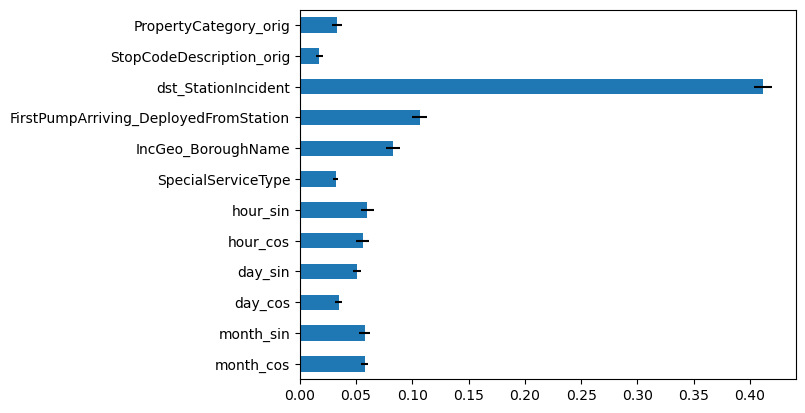

In [187]:
# pour chaque arbre de la RF en récupère les importances des features puis calcul de la std
std = np.std([tree.feature_importances_ for tree in RF.estimators_], axis=0)
forest_importances = pd.Series(RF.feature_importances_, index=X_class.columns)
fig, ax = plt.subplots()
forest_importances.plot.barh(xerr=std, ax=ax)


In [188]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    RF, X_test_scaled, y_test, n_repeats=10, random_state=42, n_jobs=2
)
forest_importances = pd.Series(result.importances_mean, index=X.columns)
forest_importances

KeyboardInterrupt: 

In [ ]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
# pas de grande variablilté dans l'inmportance des features ( un changement aléatoire dans la feature fait t-il baisser les perf du modle)

In [189]:
y_pred_train = RF.predict(X_train_scaled)
y_pred_test = RF.predict(X_test_scaled)

scr =calcul_metrics(y_train,y_pred_train,y_test,y_pred_test)

clf_scores = pd.DataFrame(data =scr, columns=["blc_acc_train",'f1_train',"geo_mean_train","sensitivity_train","macro_avg_MAE_train",
                                              "blc_acc_test",'f1_test',"geo_mean_test","sensitivity_test","macro_avg_MAE_test"],
                                              index=["RF_naive"])
clf_scores

blc_acc_train  f1_train  geo_mean_train  sensitivity_train  \
RF_naive       0.998835  0.999214        0.999156           0.999214   

          macro_avg_MAE_train  blc_acc_test   f1_test  geo_mean_test  \
RF_naive             0.001298      0.432267  0.704154       0.713155   

          sensitivity_test  macro_avg_MAE_test  
RF_naive          0.724822            0.817146

### Decision tree

In [ ]:
clf_scores_init = clf_scores.copy()

In [190]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import balanced_accuracy_score, f1_score,recall_score
from imblearn.metrics import macro_averaged_mean_absolute_error ,classification_report_imbalanced, geometric_mean_score , sensitivity_score


In [ ]:
unique_values = np.unique(y_train)
n_classes = unique_values.size
class_weight_dict = {
    y: float(len(y_train)) / (n_classes * np.sum(y_train == y))
for y in unique_values
}

In [ ]:
class_weight_dict

In [ ]:
#w = {0: 4,
      1: 4, 
      2: 3, 
      3: 2,
    4: 1}

In [191]:

DTC = DecisionTreeClassifier(max_depth = 6,class_weight = 'balanced')
DTC.fit(X_train_scaled, y_train)



DecisionTreeClassifier(class_weight='balanced', max_depth=6)

In [192]:
pd.DataFrame({"features importance": DTC.feature_importances_
             },index=X_class.columns).sort_values(ascending =False, by = "features importance")

features importance
dst_StationIncident                               0.923590
PropertyCategory_orig                             0.036087
SpecialServiceType                                0.011918
StopCodeDescription_orig                          0.009100
IncGeo_BoroughName                                0.007535
hour_sin                                          0.005126
hour_cos                                          0.004384
FirstPumpArriving_DeployedFromStation             0.001784
day_sin                                           0.000476
month_cos                                         0.000000
month_sin                                         0.000000
day_cos                                           0.000000

<Axes: >

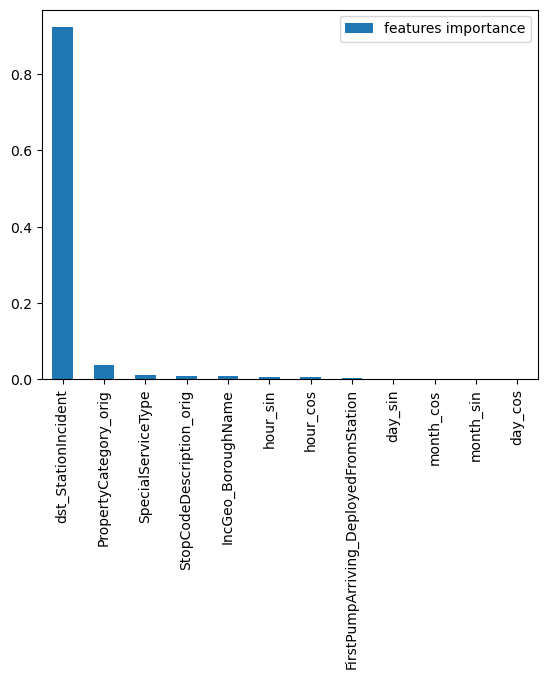

In [193]:
pd.DataFrame({"features importance": DTC.feature_importances_
             },index=X_class.columns).sort_values(ascending =False, by = "features importance").plot(kind ="bar")



In [195]:
DTC.score(X_test_scaled,y_test)

0.5692798225549317

In [194]:
y_pred_train = DTC.predict(X_train_scaled)
y_pred_test = DTC.predict(X_test_scaled)

# changer le label des predictions

y_pred_adj = [dico[i] for i in y_pred_test]
print(classification_report_imbalanced(y_test,y_pred_test, target_names = order))

pd.crosstab(y_test.replace(dico),y_pred_adj,rownames=["reels"],colnames=["predits"]).reindex(index=order ,columns=order)

                   pre       rec       spe        f1       geo       iba       sup

     0-3min       0.41      0.74      0.88      0.53      0.81      0.64      7168
     3-6min       0.81      0.61      0.77      0.70      0.69      0.46     43891
     6-9min       0.49      0.44      0.86      0.47      0.62      0.36     17179
    9-12min       0.27      0.30      0.97      0.28      0.54      0.27      2882
     +12min       0.06      0.46      0.90      0.11      0.64      0.39      1015

avg / total       0.66      0.57      0.81      0.60      0.68      0.45     72135



predits  0-3min  3-6min  6-9min  9-12min  +12min
reels                                           
0-3min     5274    1820       3        0      71
3-6min     7142   26860    6913      138    2838
6-9min      369    4128    7601     2019    3062
9-12min      60     338     707      868     909
+12min       44     156     153      200     462

In [196]:
print("acc test",DTC.score(X_test_scaled,y_test))
print("blc acc test",balanced_accuracy_score(y_test,DTC.predict(X_test_scaled)))

print("acc train",DTC.score(X_train_scaled,y_train))
print("blc acc train",balanced_accuracy_score(y_train,DTC.predict(X_train_scaled)))

print("f1 train",f1_score(y_train,DTC.predict(X_train_scaled),average = "weighted"))
print("f1 test",f1_score(y_test,DTC.predict(X_test_scaled),average = "weighted"))



acc test 0.5692798225549317
blc acc test 0.5093103237621169
acc train 0.5728128870076339
blc acc train 0.5168223525084126
f1 train 0.6027215521040602
f1 test 0.5998113556508193


In [ ]:
plt.figure(figsize =(30,8))
tree.plot_tree(DTC, feature_names = X_test.columns,max_depth=3, fontsize=10)
plt.show()

In [197]:
y_pred_train = DTC.predict(X_train_scaled)
y_pred_test = DTC.predict(X_test_scaled)

scr =calcul_metrics(y_train,y_pred_train,y_test,y_pred_test)

DTC_base = pd.DataFrame(data =scr, columns=["blc_acc_train",'f1_train',"geo_mean_train","sensitivity_train","macro_avg_MAE_train",
                                              "blc_acc_test",'f1_test',"geo_mean_test","sensitivity_test","macro_avg_MAE_test"],
                                              index=["DTC"])

clf_scores = pd.concat([clf_scores, DTC_base])
clf_scores

blc_acc_train  f1_train  geo_mean_train  sensitivity_train  \
RF_naive       0.998835  0.999214        0.999156           0.999214   
DTC            0.516822  0.602722        0.682240           0.572813   

          macro_avg_MAE_train  blc_acc_test   f1_test  geo_mean_test  \
RF_naive             0.001298      0.432267  0.704154       0.713155   
DTC                  0.700896      0.509310  0.599811       0.680377   

          sensitivity_test  macro_avg_MAE_test  
RF_naive          0.724822            0.817146  
DTC               0.569280            0.712572

In [198]:
# gridCV sur le DT

parametres = {'criterion' : ["gini", "entropy", "log_loss"],
              'splitter' : ["best", "random"],
              'min_samples_leaf': [1,3, 5],
              'max_features': ['sqrt', 'log2'],
              "max_depth" : [1,3,5,7]
              }

DTC1 = DecisionTreeClassifier(class_weight = "balanced")

cv = StratifiedKFold(n_splits = 5, shuffle=True)

grille = GridSearchCV(DTC1, param_grid = parametres,scoring= "balanced_accuracy", cv = cv)




In [ ]:
# fit des grilles
grille.fit(X_train_scaled, y_train)


In [ ]:
print(grille.best_score_)


In [ ]:
print(grille.best_params_)


In [ ]:
#tab de classification
y_pred_train = grille.predict(X_train_scaled)
y_pred_test = grille.predict(X_test_scaled)


print(classification_report_imbalanced(y_test,y_pred_test))

y_pred_adj = [dico[i] for i in y_pred_test]
pd.crosstab(y_test.replace(dico),y_pred_adj,rownames=["reels"],colnames=["predits"]).reindex(index=order ,columns=order)


In [ ]:
param = {'criterion': 'log_loss', 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'splitter': 'best'}

In [ ]:
#DTC1 = DecisionTreeClassifier(**grille.best_params_,class_weight = "balanced").fit(X_train_scaled,y_train)
DTC1 = DecisionTreeClassifier(**param,class_weight = "balanced").fit(X_train_scaled,y_train)


In [ ]:
DTC1.get_params

In [ ]:
y_pred_train = DTC1.predict(X_train_scaled)
y_pred_test = DTC1.predict(X_test_scaled)


y_pred_adj = [dico[i] for i in y_pred_test]

# pour arranger l'ordre des colonnes et lignes
print(classification_report_imbalanced(y_test,y_pred_test))

pd.crosstab(y_test.replace(dico),y_pred_adj,rownames=["reels"],colnames=["predits"]).reindex(index=order ,columns=order)

In [ ]:
y_pred_train = DTC1.predict(X_train_scaled)
y_pred_test = DTC1.predict(X_test_scaled)

scr =calcul_metrics(y_train,y_pred_train,y_test,y_pred_test)

clf_scores_CV = pd.DataFrame(data =scr, columns=["blc_acc_train",'f1_train',"geo_mean_train","sensitivity_train","macro_avg_MAE_train",
                                              "blc_acc_test",'f1_test',"geo_mean_test","sensitivity_test","macro_avg_MAE_test"],
                                              index=["DTC_CV"])
clf_scores = pd.concat([clf_scores,clf_scores_CV])

clf_scores

In [ ]:
print("balanced acc class ",balanced_accuracy_score(y_test,grille.predict(X_test_scaled)))
print("macro MAE class ",macro_averaged_mean_absolute_error(y_test,grille.predict(X_test_scaled)))
print("macro MAE class ",f1_score(y_test,grille.predict(X_test_scaled),average='weighted'))



In [ ]:
print("acc test",DTC.score(X_test_scaled,y_test))
print("blc acc test",balanced_accuracy_score(y_test,DTC.predict(X_test_scaled)))

print("acc train",DTC.score(X_train_scaled,y_train))
print("blc acc train",balanced_accuracy_score(y_train,DTC.predict(X_train_scaled)))

In [ ]:
print("acc test",DTC1.score(X_test_scaled,y_test))
print("blc acc test",balanced_accuracy_score(y_test,DTC1.predict(X_test_scaled)))

print("acc train",DTC1.score(X_train_scaled,y_train))
print("blc acc train",balanced_accuracy_score(y_train,DTC1.predict(X_train_scaled)))

In [ ]:
plt.figure(figsize =(30,8))
tree.plot_tree(DTC1, feature_names = X.columns, filled=True,max_depth=5, rounded=True,fontsize=8)
plt.show()

#### DTC aevc selection de variables

In [ ]:
var_select = ["dst_StationIncident", "IncGeo_WardNameNew","Same_Incident_Station","SpecialServiceType"]	
	

In [ ]:
X_train_DTC,X_test_DTC,y_train_DTC,y_test_DTC = train_test_split(X[var_select],y, test_size = 0.25, random_state = 42)

mean_enc = MeanEncoder(smoothing='auto',unseen='encode')
X_train_DTC = mean_enc.fit_transform(X_train_DTC,y_train_DTC)
X_test_DTC = mean_enc.transform(X_test_DTC)

scaler = RobustScaler()
X_train_DTC = scaler.fit_transform(X_train_DTC)
X_test_DTC = scaler.transform(X_test_DTC)

In [ ]:
parametres = {'criterion' : ["gini", "entropy", "log_loss"],
              'splitter' : ["best", "random"],
              'min_samples_leaf': [1,3, 5],
              'max_features': ['sqrt', 'log2'],
              "max_depth" : [1,3,5,7]
              }

DTC_sel = DecisionTreeClassifier(class_weight = "balanced")

cv = StratifiedKFold(n_splits = 3, shuffle=True)

grille_sel = GridSearchCV(DTC_sel,scoring= "balanced_accuracy", param_grid = parametres, cv = cv)
grille_sel.fit(X_train_DTC,y_train_DTC)


In [ ]:
y_pred_test = grille_sel.predict(X_test_DTC)
y_pred_train = grille_sel.predict(X_train_DTC)


display(pd.crosstab(y_test_DTC,y_pred,rownames=["reels"], colnames=["predits"]))

print(classification_report_imbalanced(y_test_DTC,y_pred_test))

print("balanced accuracy:",balanced_accuracy_score(y_test_DTC,y_pred_test))
print("Macro averaged MAE:",macro_averaged_mean_absolute_error(y_test_DTC,y_pred_test))

In [ ]:
DTC_sel = DecisionTreeClassifier(**grille_sel.best_params_)
DTC_sel.fit(X_train_DTC,y_train_DTC)

pd.DataFrame({"features importance": DTC_sel.feature_importances_
             },index=X[var_select].columns).sort_values(ascending =False, by = "features importance")

In [ ]:
scr =calcul_metrics(y_train_DTC,y_pred_train,y_test_DTC,y_pred_test)

clf_scores_CV_FeatSel = pd.DataFrame(data =scr, columns=["blc_acc_train",'"f1_train',"geo_mean_train","sensitivity_train","macro_avg_MAE_train",
                                              "blc_acc_test",'"f1_test',"geo_mean_test","sensitivity_test","macro_avg_MAE_test"],
                                              index=["DTC_CV_featSel"])
clf_scores = pd.concat([clf_scores,clf_scores_CV_FeatSel])

clf_scores

In [ ]:
plt.figure(figsize =(100,50))
tree.plot_tree(DTC_sel, feature_names = X[var_select].columns, filled=True,max_depth=7, rounded=True,fontsize=20)
plt.show()

In [ ]:
grille.best_params_

### Balanced forest

In [ ]:
!pip install imblearn

#!pip uninstall scikit-learn --yes
#!pip uninstall imblearn --yes
#!pip install scikit-learn==1.2.2
#!pip install imblearn

In [199]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import balanced_accuracy_score
from imblearn.metrics import macro_averaged_mean_absolute_error
from imblearn.metrics import classification_report_imbalanced

In [200]:

BCF = BalancedRandomForestClassifier(max_depth = 3, sampling_strategy= 'all', replacement=True, bootstrap=False)
BCF.fit(X_train_scaled,y_train)

y_pred_BCF = BCF.predict(X_test_scaled)
y_pred_adj = [dico[i] for i in y_pred_BCF]

print(classification_report_imbalanced(y_test,y_pred_BCF,target_names = order))
pd.crosstab(y_test.replace(dico),y_pred_adj,rownames=["reels"],colnames=["predits"]).reindex(index=order ,columns=order)



                   pre       rec       spe        f1       geo       iba       sup

     0-3min       0.27      0.86      0.74      0.41      0.80      0.65      7168
     3-6min       0.73      0.29      0.84      0.42      0.49      0.23     43891
     6-9min       0.35      0.29      0.83      0.32      0.49      0.23     17179
    9-12min       0.15      0.35      0.92      0.21      0.57      0.30      2882
     +12min       0.04      0.39      0.86      0.07      0.58      0.32      1015

avg / total       0.56      0.35      0.83      0.38      0.53      0.28     72135



predits  0-3min  3-6min  6-9min  9-12min  +12min
reels                                           
0-3min     6193     570     193       32     180
3-6min    15591   12828    8669     1684    5119
6-9min      964    3686    5052     3680    3797
9-12min     143     313     548     1007     871
+12min       91      78     150      302     394

<Axes: >

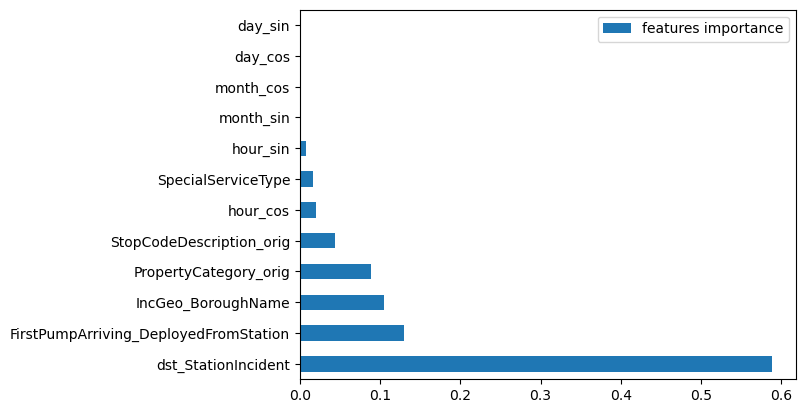

In [202]:
pd.DataFrame({"features importance": BCF.feature_importances_
             },index=X_class.columns).sort_values(ascending =False, by = "features importance").plot(kind ="barh")


In [ ]:
# pour chaque arbre de la RF en récupère les importances des features puis calcul de la std
std = np.std([tree.feature_importances_ for tree in BCF.estimators_], axis=0)
forest_importances = pd.Series(BCF.feature_importances_, index=X.columns)
fig, ax = plt.subplots()
forest_importances.plot.barh(xerr=std, ax=ax)


In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    BCF, X_test_scaled, y_test, n_repeats=10, random_state=42, n_jobs=2
)
forest_importances = pd.Series(result.importances_mean, index=X.columns)
forest_importances
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")

In [203]:
y_pred_test = BCF.predict(X_test_scaled)

print(BCF.score(X_test_scaled,y_test))
print(balanced_accuracy_score(y_test,y_pred))
print(macro_averaged_mean_absolute_error(y_test,y_pred))

0.3531434116586955


NameError: name 'y_pred' is not defined

In [ ]:
# gridCV sur le BCF

parametres = {'criterion' : ["gini", "entropy"],
              'min_samples_leaf': [1,3, 5],
              'max_features': ['sqrt', 'log2'],
              "max_depth" : [1,3,5,7],
              "class_weight" : [None, 'balanced']
              }


BCF = BalancedRandomForestClassifier(n_jobs=-1,sampling_strategy= 'all', replacement=True, bootstrap=False)

cv = StratifiedKFold(n_splits = 4, shuffle=True)

grille = GridSearchCV(BCF, param_grid = parametres,scoring= "balanced_accuracy", cv = cv)




In [ ]:
grille.fit(X_train_scaled,y_train)


In [ ]:
grille.best_params_

In [ ]:
plt.plot(grille.cv_results_["mean_test_score"])

#### BRF tuned

In [ ]:
paramBRF = {'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'log2',
 'min_samples_leaf': 3}

BRF_tunded = BalancedRandomForestClassifier(**paramBRF,sampling_strategy= 'all', replacement=True, bootstrap=False).fit(X_train_scaled,y_train)

In [ ]:
BRF_tunded = grille.best_estimator_.fit(X_train_scaled,y_train)

In [204]:
modelBRF = pickle.load(open("ModeleClass2/BalancedRamdomForest", 'rb'))

In [205]:
modelBRF.get_params

<bound method BaseEstimator.get_params of BalancedRandomForestClassifier(bootstrap=False, criterion='entropy',
                               max_depth=7, max_features='log2',
                               min_samples_leaf=3, replacement=True,
                               sampling_strategy='all')>

In [ ]:
modelBRF = 'ModeleClass2/BalancedRamdomForest'
pickle.dump(BRF_tunded, open(modelBRF, 'wb'))

In [206]:
params = {"bootstrap":False,
           "criterion":'entropy',
            "max_depth" : 7, 
            "max_features":'log2',
            "min_samples_leaf":3, 
            "replacement":True,
            "sampling_strategy":'all'}

BRF_tunded = BalancedRandomForestClassifier(**params).fit(X_train_scaled,y_train)

In [207]:
#new
y_pred_train = BRF_tunded.predict(X_train_scaled)
y_pred_test = BRF_tunded.predict(X_test_scaled)

y_pred_adj = [dico[i] for i in y_pred_test]
print(classification_report_imbalanced(y_test,y_pred_test, target_names = order))

pd.crosstab(y_test.replace(dico),y_pred_adj,rownames=["reels"],colnames=["predits"]).reindex(index=order ,columns=order)


                   pre       rec       spe        f1       geo       iba       sup

     0-3min       0.35      0.79      0.84      0.49      0.82      0.66      7168
     3-6min       0.81      0.56      0.79      0.66      0.67      0.44     43891
     6-9min       0.49      0.44      0.86      0.47      0.62      0.36     17179
    9-12min       0.27      0.35      0.96      0.31      0.58      0.32      2882
     +12min       0.07      0.39      0.92      0.12      0.60      0.34      1015

avg / total       0.65      0.55      0.82      0.58      0.67      0.44     72135



predits  0-3min  3-6min  6-9min  9-12min  +12min
reels                                           
0-3min     5692    1428      13        0      35
3-6min     9893   24788    7126       62    2022
6-9min      527    4031    7628     2407    2586
9-12min      88     323     647     1014     810
+12min       60     160     151      249     395

<Axes: >

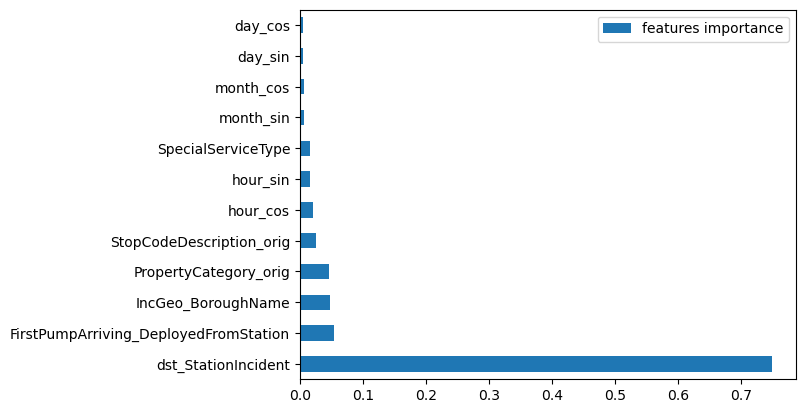

In [208]:
pd.DataFrame({"features importance": BRF_tunded.feature_importances_
             },index=X_class.columns).sort_values(ascending =False, by = "features importance").plot(kind ="barh")


In [ ]:
# pour chaque arbre de la RF en récupère les importances des features puis calcul de la std
std = np.std([tree.feature_importances_ for tree in BRF_tunded.estimators_], axis=0)
forest_importances = pd.Series(BRF_tunded.feature_importances_, index=X_class.columns)
fig, ax = plt.subplots()
forest_importances.plot.barh(xerr=std, ax=ax)


In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    BRF_tunded, X_test_scaled, y_test, n_repeats=10, random_state=42, n_jobs=2
)
forest_importances = pd.Series(result.importances_mean, index=X.columns)
forest_importances
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")

In [209]:
print("acc test",DTC.score(X_test_scaled,y_test))
print("blc acc test",balanced_accuracy_score(y_test,DTC.predict(X_test_scaled)))

print("acc train",DTC.score(X_train_scaled,y_train))
print("blc acc train",balanced_accuracy_score(y_train,DTC.predict(X_train_scaled)))

print("f1 train",f1_score(y_train,DTC.predict(X_train_scaled),average = "weighted"))
print("f1 test",f1_score(y_test,DTC.predict(X_test_scaled),average = "weighted"))

print("acc test",BRF_tunded.score(X_test_scaled,y_test))
print("blc acc test",balanced_accuracy_score(y_test,BRF_tunded.predict(X_test_scaled)))

print("acc train",BRF_tunded.score(X_train_scaled,y_train))
print("blc acc train",balanced_accuracy_score(y_train,BRF_tunded.predict(X_train_scaled)))

print("f1 train",f1_score(y_train,BRF_tunded.predict(X_train_scaled),average = "weighted"))
print("f1 test",f1_score(y_test,BRF_tunded.predict(X_test_scaled),average = "weighted"))



acc test 0.5692798225549317
blc acc test 0.5093103237621169
acc train 0.5728128870076339
blc acc train 0.5168223525084126
f1 train 0.6027215521040602
f1 test 0.5998113556508193
acc test 0.5478200596104527
blc acc test 0.5087759187346028
acc train 0.5521247296722797
blc acc train 0.5325054054067726
f1 train 0.5802894555819877
f1 test 0.5773541558278542


In [210]:
y_pred_train = BRF_tunded.predict(X_train_scaled)
y_pred_test = BRF_tunded.predict(X_test_scaled)

scr =calcul_metrics(y_train,y_pred_train,y_test,y_pred_test)

clf_scores_BRF = pd.DataFrame(data =scr, columns=["blc_acc_train",'f1_train',"geo_mean_train","sensitivity_train","macro_avg_MAE_train",
                                              "blc_acc_test",'f1_test',"geo_mean_test","sensitivity_test","macro_avg_MAE_test"],
                                              index=["Blc_RandomForest"])
clf_scores = pd.concat([clf_scores,clf_scores_BRF])

clf_scores

blc_acc_train  f1_train  geo_mean_train  sensitivity_train  \
RF_naive               0.998835  0.999214        0.999156           0.999214   
DTC                    0.516822  0.602722        0.682240           0.572813   
Blc_RandomForest       0.532505  0.580289        0.672678           0.552125   

                  macro_avg_MAE_train  blc_acc_test   f1_test  geo_mean_test  \
RF_naive                     0.001298      0.432267  0.704154       0.713155   
DTC                          0.700896      0.509310  0.599811       0.680377   
Blc_RandomForest             0.673592      0.508776  0.577354       0.669737   

                  sensitivity_test  macro_avg_MAE_test  
RF_naive                  0.724822            0.817146  
DTC                       0.569280            0.712572  
Blc_RandomForest          0.547820            0.712373

In [ ]:
clf_scores_BRF

In [26]:
dico[2]

'6-9min'

### Boosting/ Bagging

In [211]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor , AdaBoostClassifier
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor


#### adaboost avec arbre de decision

In [ ]:
DTC1.get_params

In [212]:
DT_ada = DecisionTreeClassifier(class_weight='balanced', criterion='log_loss', max_depth=7, max_features='sqrt', min_samples_leaf=3).fit(X_train_scaled,y_train)



In [213]:
# trouver le meilleur decison tree

parametres = {'learning_rate': [0.05,0.1,0.2,0.3,0.9 ],
              'n_estimators': [50,100,200,300,500,675,702]
              }

DT_ada = DecisionTreeClassifier(class_weight='balanced', criterion='log_loss', max_depth=7, max_features='sqrt', min_samples_leaf=3)

Ada_dtc = AdaBoostClassifier(estimator= DT_ada, algorithm='SAMME')

cv = StratifiedKFold(n_splits = 4, shuffle=True)

grille_adaBoost = GridSearchCV(Ada_dtc, param_grid = parametres, cv = cv,scoring= "balanced_accuracy")


In [ ]:
grille_adaBoost.fit(X_train_scaled,y_train)

In [214]:
#grille_adaBoost.best_params_

params = {'learning_rate': 0.05, 'n_estimators': 500}

In [215]:
AdaDTC = AdaBoostClassifier(estimator= DT_ada, **params,algorithm='SAMME')


In [216]:
AdaDTCTuned = AdaBoostClassifier(estimator= DT_ada, learning_rate = 0.05, n_estimators = 500,algorithm='SAMME')
AdaDTCTuned
AdaTuned = AdaBoostClassifier(learning_rate = 0.05, n_estimators = 500,algorithm='SAMME')


In [217]:
AdaDTCTuned.fit(X_train_scaled,y_train)


AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(class_weight='balanced',
                                                    criterion='log_loss',
                                                    max_depth=7,
                                                    max_features='sqrt',
                                                    min_samples_leaf=3),
                   learning_rate=0.05, n_estimators=500)

In [218]:
# ada avec DTC personalisé

y_pred_train = AdaDTCTuned.predict(X_train_scaled)
y_pred_test = AdaDTCTuned.predict(X_test_scaled)

# changer le label des predictions

y_pred_adj = [dico[i] for i in y_pred_test]
print(classification_report_imbalanced(y_test,y_pred_test, target_names = order))

pd.crosstab(y_test.replace(dico),y_pred_adj,rownames=["reels"],colnames=["predits"]).reindex(index=order ,columns=order)

                   pre       rec       spe        f1       geo       iba       sup

     0-3min       0.38      0.77      0.86      0.51      0.82      0.66      7168
     3-6min       0.81      0.59      0.79      0.68      0.68      0.46     43891
     6-9min       0.49      0.49      0.84      0.49      0.64      0.39     17179
    9-12min       0.24      0.40      0.95      0.30      0.61      0.35      2882
     +12min       0.09      0.34      0.95      0.15      0.57      0.31      1015

avg / total       0.66      0.57      0.82      0.60      0.68      0.46     72135



predits  0-3min  3-6min  6-9min  9-12min  +12min
reels                                           
0-3min     5554    1537      44        0      33
3-6min     8585   25937    7785      269    1315
6-9min      437    3904    8353     3064    1421
9-12min      80     301     707     1142     652
+12min       49     161     177      279     349

In [219]:
## cross tab avec % 
# sur les ligned : rappel # permet de dire si le modèle se trompe souvent sur une classe ou si elle est bien détectée

display(pd.crosstab(y_test.replace(dico),y_pred_adj,rownames=["reels"],colnames=["predits"], normalize='index').reindex(index=order ,columns=order))

# sur les colonnes precision : permet de voir le taux de bonne prédiction(Vrai positif) pour chaque classe
display(pd.crosstab(y_test.replace(dico),y_pred_adj,rownames=["reels"],colnames=["predits"], normalize='columns').reindex(index=order ,columns=order))

predits    0-3min    3-6min    6-9min   9-12min    +12min
reels                                                    
0-3min   0.774833  0.214425  0.006138  0.000000  0.004604
3-6min   0.195598  0.590941  0.177371  0.006129  0.029961
6-9min   0.025438  0.227254  0.486233  0.178357  0.082717
9-12min  0.027759  0.104441  0.245316  0.396253  0.226232
+12min   0.048276  0.158621  0.174384  0.274877  0.343842

predits    0-3min    3-6min    6-9min   9-12min    +12min
reels                                                    
0-3min   0.377695  0.048273  0.002578  0.000000  0.008753
3-6min   0.583815  0.814604  0.456170  0.056584  0.348806
6-9min   0.029718  0.122613  0.489453  0.644510  0.376923
9-12min  0.005440  0.009454  0.041427  0.240219  0.172944
+12min   0.003332  0.005057  0.010371  0.058687  0.092573

In [220]:
y_pred_train = AdaDTCTuned.predict(X_train_scaled) 
y_pred_test = AdaDTCTuned.predict(X_test_scaled)

scr =calcul_metrics(y_train,y_pred_train,y_test,y_pred_test)

clf_scores_Ada = pd.DataFrame(data =scr, columns=["blc_acc_train",'f1_train',"geo_mean_train","sensitivity_train","macro_avg_MAE_train",
                                              "blc_acc_test",'f1_test',"geo_mean_test","sensitivity_test","macro_avg_MAE_test"],
                                              index=["AdaBoostDTC"])
clf_scores = pd.concat([clf_scores,clf_scores_Ada])

clf_scores

blc_acc_train  f1_train  geo_mean_train  sensitivity_train  \
RF_naive               0.998835  0.999214        0.999156           0.999214   
DTC                    0.516822  0.602722        0.682240           0.572813   
Blc_RandomForest       0.532505  0.580289        0.672678           0.552125   
AdaBoostDTC            0.560125  0.603732        0.690671           0.581440   

                  macro_avg_MAE_train  blc_acc_test   f1_test  geo_mean_test  \
RF_naive                     0.001298      0.432267  0.704154       0.713155   
DTC                          0.700896      0.509310  0.599811       0.680377   
Blc_RandomForest             0.673592      0.508776  0.577354       0.669737   
AdaBoostDTC                  0.618245      0.518420  0.597424       0.684773   

                  sensitivity_test  macro_avg_MAE_test  
RF_naive                  0.724822            0.817146  
DTC                       0.569280            0.712572  
Blc_RandomForest          0.547820            0.712373  
AdaBoostDTC               0.573023            0.679693

In [ ]:
print("balanced acc",balanced_accuracy_score(y_test,AdaDTCTuned.predict(X_test_scaled)))


In [221]:
pd.DataFrame({"features importance": AdaDTCTuned.feature_importances_
             },index=X_class.columns).sort_values(ascending =False, by = "features importance")

features importance
dst_StationIncident                               0.803066
FirstPumpArriving_DeployedFromStation             0.042640
IncGeo_BoroughName                                0.039947
PropertyCategory_orig                             0.033509
StopCodeDescription_orig                          0.025054
hour_cos                                          0.013132
hour_sin                                          0.012476
SpecialServiceType                                0.012180
month_sin                                         0.004946
day_sin                                           0.004362
day_cos                                           0.004346
month_cos                                         0.004342

In [ ]:
# pour chaque arbre de la RF en récupère les importances des features puis calcul de la std
std = np.std([tree.feature_importances_ for tree in AdaDTCTuned.estimators_], axis=0)
forest_importances = pd.Series(AdaDTCTuned.feature_importances_, index=X_class.columns)
fig, ax = plt.subplots()
forest_importances.plot.barh(xerr=std, ax=ax)
ax.set_title("Importance des features avec erreur standard")
ax.set_ylabel("Mean accuracy decrease")

In [ ]:
# calcul de la permutation importance ==> à quel point la modification de valeur d'une variable modifie le score du modele
from sklearn.inspection import permutation_importance

result = permutation_importance(
    AdaDTCTuned, X_test_scaled, y_test, n_repeats=10, scoring='balanced_accuracy', random_state=42, n_jobs=2
)
forest_importances = pd.Series(result.importances_mean, index=X_class.columns)
forest_importances
fig, ax = plt.subplots()
forest_importances.plot.barh(yerr=result.importances_std, ax=ax)
ax.set_title("Importance des features sur le score du modèle")
ax.set_xlabel("Diminution moyenne du score")

In [ ]:
 
# Assuming regressor is your trained Random Forest model
# Pick one tree from the forest, e.g., the first tree (index 0)
 
# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(AdaDTC, feature_names=X.columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()

In [ ]:
from sklearn.tree import export_graphviz  

# export the decision tree to a tree.dot file 
# for visualizing the plot easily anywhere 
export_graphviz(DTC_best, out_file ='tree.dot', 
               feature_names =X_test.columns)  

 filled=True, fontsize=6, rounded = True

In [ ]:
plt.figure(figsize =(30,8))
tree.plot_tree(DTC_best, feature_names = X_test.columns, filled=True,max_depth=4, rounded=True,fontsize=8)
plt.show()

In [ ]:
# trouver le meilleur decison tree

parametres = {'learning_rate': [0.05,0.1,0.2,0.3,0.9 ],
              'n_estimators': [200,300,500,675,702]
              }

estmi = RandomForestClassifier()

Ada_rf = AdaBoostClassifier(estimator= estmi, algorithm='SAMME')

cv = StratifiedKFold(n_splits = 4, shuffle=True)

grille_adaBoostRF = GridSearchCV(Ada_rf, param_grid = parametres, cv = cv)


In [ ]:
grille_adaBoostRF.fit(X_train_scaled,y_train)

In [ ]:
AdaRF = AdaBoostClassifier(**griil.bestparams_)



In [ ]:
# ada avec DTC personalisé

y_pred_train = AdaRF.predict(X_train_scaled)
y_pred_test = AdaRF.predict(X_test_scaled)

# changer le label des predictions

y_pred_adj = [dico[i] for i in y_pred_test]
print(classification_report_imbalanced(y_test,y_pred_test, target_names = order))

pd.crosstab(y_test.replace(dico),y_pred_adj,rownames=["reels"],colnames=["predits"]).reindex(index=order ,columns=order)

In [ ]:
y_pred_train = AdaDTCTuned.predict(X_train_scaled)
y_pred_test = AdaDTCTuned.predict(X_test_scaled)

scr =calcul_metrics(y_train,y_pred_train,y_test,y_pred_test)

clf_scores_Rf = pd.DataFrame(data =scr, columns=["blc_acc_train",'f1_train',"geo_mean_train","sensitivity_train","macro_avg_MAE_train",
                                              "blc_acc_test",'f1_test',"geo_mean_test","sensitivity_test","macro_avg_MAE_test"],
                                              index=["AdaBoostRF"])
clf_scores = pd.concat([clf_scores,clf_scores_Rf])

clf_scores

In [ ]:
pd.DataFrame({"features importance": AdaRF.feature_importances_
             },index=X.columns).sort_values(ascending =False, by = "features importance")

In [ ]:
scr =calcul_metrics(y_train,y_pred_train,y_test,y_pred_test)

clf_scores_ada = pd.DataFrame(data =scr, columns=["blc_acc_train",'"f1_train',"geo_mean_train","sensitivity_train","macro_avg_MAE_train",
                                              "blc_acc_test",'"f1_test',"geo_mean_test","sensitivity_test","macro_avg_MAE_test"],
                                              index=["AdaBoost"])
clf_scores = pd.concat([clf_scores,clf_scores_ada])

clf_scores

In [ ]:
clf_scores.to_csv("Data/Recap_classif.csv")

#### RUSBoostClassifier
randam undersamplig + adaboost

In [222]:
from imblearn.ensemble import RUSBoostClassifier

In [223]:
DT_ada = DecisionTreeClassifier(class_weight='balanced', criterion='log_loss', max_depth=7, max_features='sqrt', min_samples_leaf=3)

RUS = RUSBoostClassifier(estimator=DT_ada , algorithm='SAMME', n_estimators=75, learning_rate=0.2)
RUS.fit(X_train_scaled,y_train)

RUSBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(class_weight='balanced',
                                                    criterion='log_loss',
                                                    max_depth=7,
                                                    max_features='sqrt',
                                                    min_samples_leaf=3),
                   learning_rate=0.2, n_estimators=75)

In [224]:
RUS.score(X_test_scaled,y_test)

0.5613918347542801

In [225]:
y_pred_train = RUS.predict(X_train_scaled)
y_pred_test = RUS.predict(X_test_scaled)


print(classification_report_imbalanced(y_test,y_pred_test))
pd.crosstab(y_test,y_pred_test,rownames=["reels"],colnames=["predits"])

                   pre       rec       spe        f1       geo       iba       sup

          0       0.37      0.76      0.86      0.50      0.81      0.65      7168
          1       0.81      0.59      0.79      0.68      0.68      0.45     43891
          2       0.48      0.45      0.85      0.47      0.62      0.37     17179
          3       0.20      0.41      0.93      0.27      0.62      0.37      2882
          4       0.09      0.33      0.95      0.14      0.56      0.29      1015

avg / total       0.65      0.56      0.82      0.59      0.67      0.45     72135



predits     0      1     2     3     4
reels                                 
0        5444   1596    86     1    41
1        8561  25795  7294   905  1336
2         488   3997  7732  3584  1378
3          78    314   678  1195   617
4          55    158   166   306   330

In [226]:
balanced_accuracy_score(y_test,y_pred_test)

0.5074085364694134

In [ ]:
# gridCV 

parametres = {'learning_rate': [0.05,0.1,0.2,0.3,0.9 ],
              'n_estimators': [200,300,500,675,702]
              }

RUS_cv = RUSBoostClassifier(estimator=DT_ada,algorithm = "SAMME")

cv = StratifiedKFold(n_splits = 5, shuffle=True)

grilleRus = GridSearchCV(RUS_cv, param_grid = parametres,scoring= "balanced_accuracy", cv = cv)




In [ ]:
grilleRus.fit(X_train_scaled,y_train)

In [227]:
#grilleRus.best_params_
par = {'learning_rate': 0.05, 'n_estimators': 702}

In [ ]:
grilleRus.best_score_

In [228]:
RUS_best = RUSBoostClassifier(estimator=DT_ada, **par,algorithm='SAMME').fit(X_train_scaled,y_train)


In [229]:
y_pred_train = RUS_best.predict(X_train_scaled)
y_pred_test = RUS_best.predict(X_test_scaled)

y_pred_adj = [dico[i] for i in y_pred_test]
print(classification_report_imbalanced(y_test,y_pred_test, target_names = order))

pd.crosstab(y_test.replace(dico),y_pred_adj,rownames=["reels"],colnames=["predits"]).reindex(index=order ,columns=order)


                   pre       rec       spe        f1       geo       iba       sup

     0-3min       0.38      0.78      0.86      0.51      0.82      0.66      7168
     3-6min       0.81      0.60      0.78      0.69      0.68      0.46     43891
     6-9min       0.49      0.46      0.85      0.47      0.62      0.37     17179
    9-12min       0.24      0.40      0.95      0.30      0.62      0.36      2882
     +12min       0.10      0.32      0.96      0.15      0.55      0.29      1015

avg / total       0.66      0.58      0.81      0.60      0.68      0.45     72135



predits  0-3min  3-6min  6-9min  9-12min  +12min
reels                                           
0-3min     5586    1541      20        0      21
3-6min     8709   26537    7445      195    1005
6-9min      464    4276    7887     3135    1417
9-12min      79     333     698     1157     615
+12min       51     180     166      295     323

In [230]:
y_pred_train = RUS_best.predict(X_train_scaled)
y_pred_test = RUS_best.predict(X_test_scaled)

scr =calcul_metrics(y_train,y_pred_train,y_test,y_pred_test)

clf_scores_RUS = pd.DataFrame(data =scr, columns=["blc_acc_train",'f1_train',"geo_mean_train","sensitivity_train","macro_avg_MAE_train",
                                              "blc_acc_test",'f1_test',"geo_mean_test","sensitivity_test","macro_avg_MAE_test"],
                                              index=["RUSBoostClassifier"])
clf_scores = pd.concat([clf_scores,clf_scores_RUS])

clf_scores

blc_acc_train  f1_train  geo_mean_train  \
RF_naive                 0.998835  0.999214        0.999156   
DTC                      0.516822  0.602722        0.682240   
Blc_RandomForest         0.532505  0.580289        0.672678   
AdaBoostDTC              0.560125  0.603732        0.690671   
RUSBoostClassifier       0.543974  0.601126        0.685814   

                    sensitivity_train  macro_avg_MAE_train  blc_acc_test  \
RF_naive                     0.999214             0.001298      0.432267   
DTC                          0.572813             0.700896      0.509310   
Blc_RandomForest             0.552125             0.673592      0.508776   
AdaBoostDTC                  0.581440             0.618245      0.518420   
RUSBoostClassifier           0.579772             0.645753      0.512540   

                     f1_test  geo_mean_test  sensitivity_test  \
RF_naive            0.704154       0.713155          0.724822   
DTC                 0.599811       0.680377          0.569280   
Blc_RandomForest    0.577354       0.669737          0.547820   
AdaBoostDTC         0.597424       0.684773          0.573023   
RUSBoostClassifier  0.597666       0.682819          0.575172   

                    macro_avg_MAE_test  
RF_naive                      0.817146  
DTC                           0.712572  
Blc_RandomForest              0.712373  
AdaBoostDTC                   0.679693  
RUSBoostClassifier            0.689589

In [231]:
clf_scores[["blc_acc_train","blc_acc_test","geo_mean_train","geo_mean_test",'f1_train','f1_test']]

blc_acc_train  blc_acc_test  geo_mean_train  \
RF_naive                 0.998835      0.432267        0.999156   
DTC                      0.516822      0.509310        0.682240   
Blc_RandomForest         0.532505      0.508776        0.672678   
AdaBoostDTC              0.560125      0.518420        0.690671   
RUSBoostClassifier       0.543974      0.512540        0.685814   

                    geo_mean_test  f1_train   f1_test  
RF_naive                 0.713155  0.999214  0.704154  
DTC                      0.680377  0.602722  0.599811  
Blc_RandomForest         0.669737  0.580289  0.577354  
AdaBoostDTC              0.684773  0.603732  0.597424  
RUSBoostClassifier       0.682819  0.601126  0.597666

In [ ]:
import pickle 

In [233]:
# randomForest
modelRF = 'ModeleClass3/RandomForest'
pickle.dump(RF, open(modelRF, 'wb'))

#addaboost
modelAda = 'ModeleClass3/AdaBoostClass'
pickle.dump(AdaDTCTuned, open(modelAda, 'wb'))

#DTC
modelDTC = 'ModeleClass3/DecisionTree'
pickle.dump(DTC, open(modelDTC, 'wb'))

# balanced fores
modelBRF = 'ModeleClass3/BalancedRamdomForest'
pickle.dump(BRF_tunded, open(modelBRF, 'wb'))

# Rus
modelRus = 'ModeleClass3/RUSBoostClassifier'
pickle.dump(RUS_best, open(modelRus, 'wb'))

#### Xgboost

In [ ]:
import xgboost as xgb 
from xgboost import XGBClassifier

In [ ]:
# arrangement des matrices
X_train_xgb = xgb.DMatrix(data = X_train_scaled, label=y_train)
X_test_xgb = xgb.DMatrix(data = X_test_scaled, label=y_test)


In [ ]:
unique_values = np.unique(y_train)
n_classes = unique_values.size
class_weight_dict = {
    y: float(len(y_train)) / (n_classes * np.sum(y_train == y))
for y in unique_values
}
class_weight_dict

weight = [2.16,0.32,0.84,]

In [ ]:
para_xg = {'eta' : [0.01,0.05,0.1],
           "gamma" : [1,4,7],
           "max_depth" : [2,3,5],
           "min_child_weight" :[1,4,7],
           'lambda' :np.logspace(-3, 2, 7),
           'alpha' :np.logspace(-3, 2, 7) ,
           "colsample_bytree" : [1,0.6,0.3],
           'n_estimators': [200,500,675]
}

xgb_class = XGBClassifier(objective = "multi:softmax",early_stopping_rounds = 12,)
cv = StratifiedKFold(n_splits = 5, shuffle=True)

grilleXG = GridSearchCV(xgb_class, param_grid = para_xg , scoring= "balanced_accuracy", cv = cv)


### deep learing

In [ ]:
from tensorflow.keras.models import Seqeuntial
from tensorflow.keras.layers import Dense


model = Seqeuntial()
model.add(Dense(64, input_dim = X_train.shape[1], activation = 'relu'))
model.add(Dense(32 activation = 'relu'))
model.add(Dense(1)) 

model.compile(optimizer = "adam" , loss = "mean_squared_error", metrics = ["mae"])

epochs = 100
batch_size = 128

history = model.fit(X_train_scaled, y_train,
                    epochs = epochs,
                    batch_size = batch_size,
                    validation_split = 0.2,
                    callbacks = [tqdmCallback(verbose = 1)])

### Oversampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [ ]:
# oversampling aléatoire
ro = RandomOverSampler(random_state=42)
X_ro,y_ro = ro.fit_resample(X_train_scaled, y_train)
print(y_ro.value_counts())

# oversampling SMOTE
smt = SMOTE(random_state=42)
X_smt,y_smt = smt.fit_resample(X_train_scaled, y_train)
print(y_smt.value_counts())

In [ ]:
## avec la balancedforest randomunder
RF_over_rd = RandomForestClassifier()
RF_over_rd.fit(X_ro,y_ro)

y_pred_train = RF_over_rd.predict(X_ro)
y_pred_test = RF_over_rd.predict(X_test_scaled)

y_pred_adj = [dico[i] for i in y_pred_test]
print(classification_report_imbalanced(y_test,y_pred_test, target_names = order))

pd.crosstab(y_test.replace(dico),y_pred_adj,rownames=["reels"],colnames=["predits"]).reindex(index=order ,columns=order)

In [ ]:
print(RF_over_rd.score(X_test_scaled,y_test))
print(balanced_accuracy_score(y_test,RF_over_rd.predict(X_test_scaled)))
print(RF_over_rd.score(X_ro,y_ro))
print(balanced_accuracy_score(y_ro,RF_over_rd.predict(X_ro)))

In [ ]:
## avec la balancedforest
RF_smote = RandomForestClassifier()
RF_smote.fit(X_smt,y_smt)

y_pred_train = RF_smote.predict(X_train_scaled)
y_pred_test = RF_smote.predict(X_test_scaled)

y_pred_adj = [dico[i] for i in y_pred_test]
print(classification_report_imbalanced(y_test,y_pred_test, target_names = order))

pd.crosstab(y_test.replace(dico),y_pred_adj,rownames=["reels"],colnames=["predits"]).reindex(index=order ,columns=order)

In [ ]:
print(RF_smote.score(X_test_scaled,y_test))
print(balanced_accuracy_score(y_test,RF_smote.predict(X_test_scaled)))
print(RF_smote.score(X_smt,y_smt))
print(balanced_accuracy_score(y_smt,RF_smote.predict(X_smt)))

### undersampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler, ClusterCentroids

## Interprétation avec SHAP

In [ ]:
pip install shap

#### Préparation des données

In [6]:
import shap
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from feature_engine.encoding import MeanEncoder
from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import train_test_split, GridSearchCV



In [4]:
df_2020 = pd.read_csv("Data/Data_Encodee_V2_2_2020.csv")
pd.set_option("display.max_columns",70)
df_2020.head(2)

## passe la distance en kilometres
df_2020["dst_StationIncident"] = df_2020["dst_StationIncident"]/1000

df_2020_mod = df_2020.drop(columns = ["IncidentNumber","DateOfCall","TimeOfCall","Periode","Periode_Rush","PropertyType","AddressQualifier",
                       "Postcode_full","Postcode_district","IncidentStationGround","Easting_m","Northing_m","Easting_rounded","Northing_rounded","Latitude",
                       "Longitude","Latitude_Station","Longitude_Station","NumStationsWithPumpsAttending","NumPumpsAttending","PumpCount",
                       "PumpMinutesRounded","Notional Cost (£)","NumCalls","FirstPumpArriving_TravelTimeSec",
                       "FirstPump_DelayCode_Description","FirstPump_Division_staion","tempsAPI"], axis = 1)

df_2020_mod = df_2020_mod.dropna(axis=0)


### Shap Moedele lineaire

In [7]:
X = df_2020_mod.drop(columns=["FirstPumpArriving_TurnoutTimeSec","HourOfCall","Weekday","Month","Week_Weekend","CalYear","Same_Incident_Station",
                          "FirstPumpArriving_AttendanceTime","AttendanceTime_Min","FirstPump_Delayed",
                          "Station_DelayFreq","IncGeo_WardNameNew","Ward_DelayFreq","Bo_DelayFreq" ,'Incident_Fire', 'Incident_Special Service',
       'StopCode_Primary Fire', 'StopCode_Secondary Fire',
       'StopCode_Special Service', '_Non Residential', '_Other Residential',
       '_Outdoor', '_Outdoor Structure', '_Road Vehicle',"_Other Vehicle","London_Zone","IncidentGroup_orig"])


y = df_2020_mod.FirstPumpArriving_AttendanceTime
cat_variables = ["IncGeo_BoroughName","FirstPumpArriving_DeployedFromStation","SpecialServiceType"
                 ,"StopCodeDescription_orig","PropertyCategory_orig"]

X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=42)

# Mean encoding avec feat-engine
mean_enc = MeanEncoder(variables= cat_variables, smoothing='auto')
X_train = mean_enc.fit_transform(X_train,y_train)
X_test = mean_enc.transform(X_test)

# Scale
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
X.shape

(288539, 12)

In [6]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_features= PolynomialFeatures(degree=3)

X_train_poly = polynomial_features.fit_transform(X_train_scaled)
X_test_poly = polynomial_features.transform(X_test_scaled)

In [10]:
import pickle 
#model_elastic = pickle.load(open("ModelesLineaire/Elastic", 'rb'))

RegressionLr = pickle.load(open('ModelesLineaire/lineaire_naif', 'rb'))
Lasso = pickle.load(open("ModelesLineaire/Lasso", 'rb'))  
Poly = pickle.load(open("ModelesLineaire/Poly", 'rb'))
Elastic = pickle.load(open("ModelesLineaire/Elastic", 'rb'))
RandomForest_reg = pickle.load(open("ModelesLineaire/RandomForest", 'rb'))

In [22]:
RegressionLr = pickle.load(open('ModelesLineaire/lineaire_naif', 'rb'))


In [ ]:
#md_elsatic = model_elastic.fit(X_train_scaled,y_train)

In [15]:
Poly.n_features_in_

455

In [16]:
import shap.explainers

# pour visualisation des plots
shap.plots.initjs()

explainer = shap.explainers.LinearExplainer(Elastic, X_test_scaled,feature_names=X.columns)
shap_values = explainer(X_test_scaled)


In [17]:
explainer.shap_interaction_values(X_test_scaled[0])

AttributeError: 'LinearExplainer' object has no attribute 'shap_interaction_values'

In [18]:
explainer.shap_values(X_test_scaled[0])

array([ 0.00000000e+00, -3.09597222e+00,  7.12652563e-02, -5.69440987e-01,
        5.66595394e-01,  9.23997217e-01,  8.03757730e-01,  1.34445869e+01,
       -1.01910706e+00, -6.98309901e+00, -6.19732018e+01,  1.09365910e+01,
        1.09429670e+00,  3.09996800e-01, -1.34916327e-02, -5.51021139e-01,
       -1.81678753e-01, -5.95052466e-02, -2.82002884e+00, -1.10217654e+00,
        1.65634549e-01,  1.50542908e-01,  3.32106987e-01, -2.83641404e-01,
        1.40376310e-01,  4.72082837e-02, -4.06076358e-02, -3.28135531e-02,
       -5.78153981e-02,  3.91771890e-03,  1.45342213e-02,  2.83920093e-02,
        5.80945103e-04, -9.09051790e-02, -2.87388894e-02,  2.94702665e-02,
       -5.28069632e-01, -1.32740258e-01, -6.69706520e-02,  9.77473853e-02,
       -1.79992565e-01, -4.71374029e-01, -5.93654474e-01,  2.75346855e+00,
        7.09699379e-02,  1.85752561e-01,  4.04035816e-02, -3.69408898e-02,
        6.78683965e-01, -6.57890851e-01,  3.99869136e-02,  2.47956628e-01,
       -1.48759900e-01,  

IndexError: index 67 is out of bounds for axis 0 with size 12

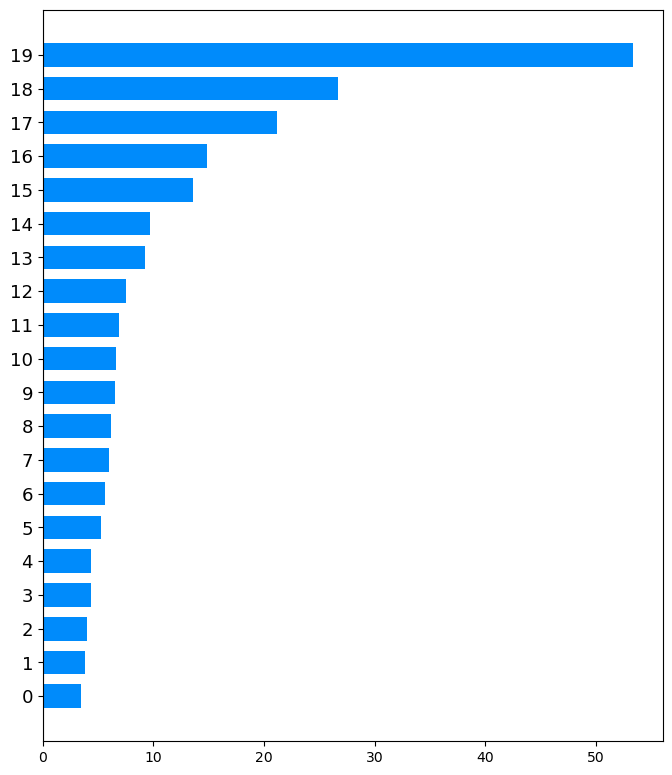

In [20]:
# features impmortance
shap.summary_plot(shap_values, X_test_scaled, plot_type="bar")


In [306]:
fig = plt.figure()


<Figure size 640x480 with 0 Axes>

IndexError: index 67 is out of bounds for axis 0 with size 12

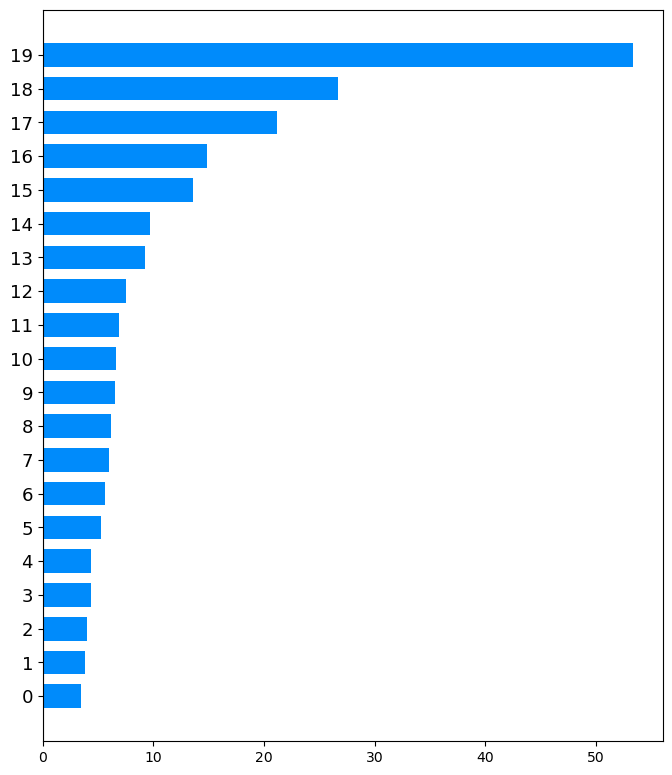

In [23]:
def sum_plot_elastic() :
        fig = plt.figure()
        fig = shap.summary_plot(shap_values, X_test_scaled, plot_type="bar")
        return fig

In [22]:
plt.show(fig)

NameError: name 'fig' is not defined

IndexError: index 67 is out of bounds for axis 0 with size 12

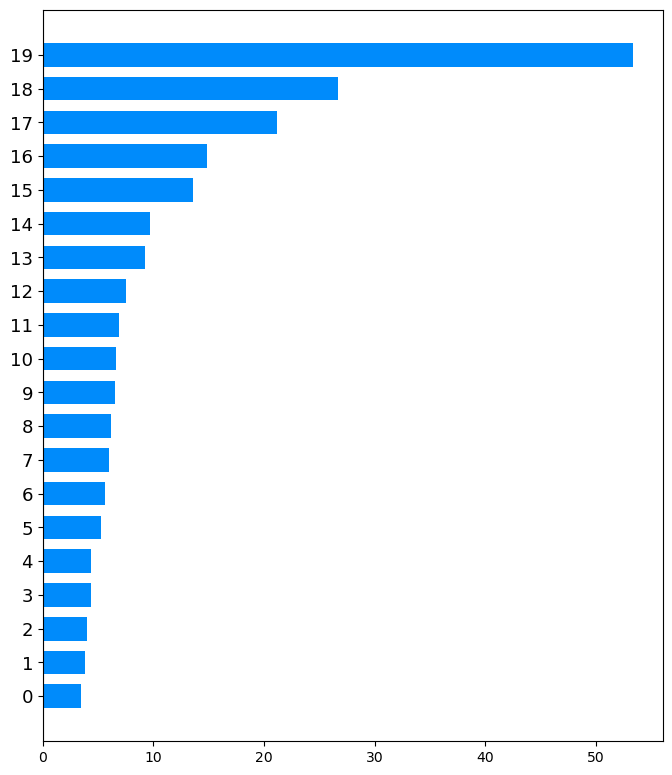

In [24]:
fig = plt.figure()
fig = shap.summary_plot(shap_values, X_test, plot_type="bar")


In [246]:
# de standardise les variables
shap_values.data = X_test.values

In [ ]:
mean_enc.encoder_dict_["IncGeo_BoroughName"].keys()
a = list(mean_enc.encoder_dict_["IncGeo_BoroughName"].keys())
a

In [ ]:
b = list(mean_enc.encoder_dict_["IncGeo_BoroughName"].values())
b

In [ ]:

# for categorical (or binned) data adding a small amount of x-jitter makes
# thin columns of dots more readable
shap.plots.scatter(shap_values[:, "IncGeo_BoroughName"], show=False)
#plt.xticks(b,a, rotation = 90)
plt.title("Titre")
plt.show()

In [ ]:
mean_enc.encoder_dict_

In [ ]:
shap_values

In [ ]:
# classical partial dependence plot show the distribution of feature values as a histogram on the x-axis
# which is the average value of the model output when we fix the median income feature to a given value. expected target response as a function of the input features of interest.
# permet de voir comment les changement dans un feature impact l'output du modele
# ligne grise horizontale : valeur attendu du model
# ligne grise vertical : medianne de la feature
# SHAP value for a specific feature  is just the difference between the expected model output and the partial dependence plot at the feature’s value xi
shap.partial_dependence_plot(
    "dst_StationIncident",
    lr_naif.predict,
    X_test,
    ice=False,
    model_expected_value=True,
    feature_expected_value=True,
    )

In [ ]:
shap.plots.scatter(shap_values, ylabel="SHAP value\n(higher means more likely to renew)")


In [ ]:
shap.summary_plot(shap_values,X_test)

In [ ]:
shap.plots.bar(shap_values)

In [ ]:
mean_enc.inverse_transform(X_test)


In [248]:
# redonne leur valueurs d'origine au var catégorielles pour avoir les noms de quartier type de feu etc... dans les exemples
X_test = mean_enc.inverse_transform(X_test)
# de standardise les variables
shap_values.data = X_test.values

In [291]:
len(X_test)

72135

In [290]:
len(shap_values)

72135

In [25]:
shap.plots.bar(shap_values[894], max_display=14)
# effet des variables pour la ligne 10 ligne

IndexError: index 12 is out of bounds for axis 0 with size 12

In [26]:
explainer.expected_value
# valeur moyenne attendue

304.18526628901964

IndexError: index 451 is out of bounds for axis 0 with size 12

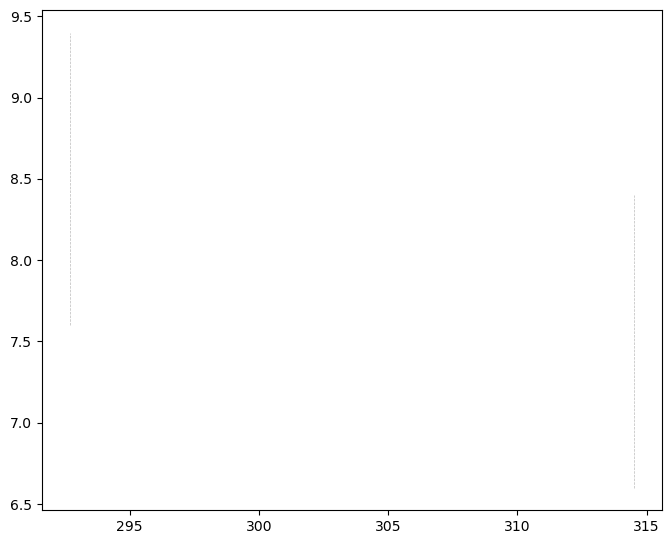

In [28]:
shap.plots.waterfall(shap_values[678])


In [252]:
# 
shap.force_plot(shap_values[678])

### shap classification

In [ ]:
pip install ipywidgets


In [39]:
import pickle 
modelBRF = pickle.load(open("ModeleClass2/BalancedRamdomForest", 'rb'))
ada = pickle.load(open("ModeleClass2/AdaBoostClass", 'rb'))
RF = pickle.load(open("ModeleClass2/RandomForest", 'rb'))
RUS = pickle.load(open("ModeleClass2/RUSBoostClassifier", 'rb'))

In [40]:
ada.n_features_in_

12

In [38]:
cd c:\\Users\\loreb\\Documents\\DS\\Projet_pompiers\\OCT23_CDS_Pompiers

c:\Users\loreb\Documents\DS\Projet_pompiers\OCT23_CDS_Pompiers


In [6]:
X_class = df_2020_mod.drop(columns=["FirstPumpArriving_TurnoutTimeSec","HourOfCall","Weekday","Month","Week_Weekend","CalYear","Same_Incident_Station",
                          "FirstPumpArriving_AttendanceTime","AttendanceTime_Min","FirstPump_Delayed",
                          "Station_DelayFreq","IncGeo_WardNameNew","Ward_DelayFreq","Bo_DelayFreq" ,'Incident_Fire', 'Incident_Special Service',
       'StopCode_Primary Fire', 'StopCode_Secondary Fire',
       'StopCode_Special Service', '_Non Residential', '_Other Residential',
       '_Outdoor', '_Outdoor Structure', '_Road Vehicle',"_Other Vehicle","London_Zone","IncidentGroup_orig"])



y_class = df_2020_mod.AttendanceTime_Min

# encodage de la target
y_class = y_class.replace({'0-3min' : 0,
          '3-6min' : 1,
           '6-9min' : 2,
           "9-12min" : 3,
           '+12min' : 4
          })
cat_variables = ["IncGeo_BoroughName","FirstPumpArriving_DeployedFromStation","SpecialServiceType"
                 ,"StopCodeDescription_orig","PropertyCategory_orig"]


from sklearn.preprocessing import RobustScaler

X_train,X_test,y_train,y_test = train_test_split(X_class,y_class, test_size = 0.25)

mean_enc = MeanEncoder(smoothing='auto')
X_train = mean_enc.fit_transform(X_train,y_train)
X_test = mean_enc.transform(X_test)

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)




C:\Users\loreb\AppData\Local\Temp\ipykernel_17124\871862969.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_class = y_class.replace({'0-3min' : 0,


In [36]:
m#odelBRF.fit(X_train_scaled, y_train)

KeyboardInterrupt: 

In [44]:
len(X_class.columns)

12

In [85]:
RF.n_features_in_

12

In [12]:
import shap.explainers

explainer = shap.TreeExplainer(RF,feature_names=X_class.columns)


InvalidModelError: Model type not yet supported by TreeExplainer: <class 'imblearn.ensemble._weight_boosting.RUSBoostClassifier'>

In [87]:
# sous forme de df au lieu de np array
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_class.columns)

shap_values = explainer(X_test_scaled)


In [50]:
print(shap_values.shape)
# lignes colonnes classes

(72135, 12, 5)


In [70]:
# remet les valeurs à leurs origine (non std)
X_test = mean_enc.inverse_transform(X_test)
shap_values.data = X_test.values

probilité d'arriver en 0-3min pour un individu n


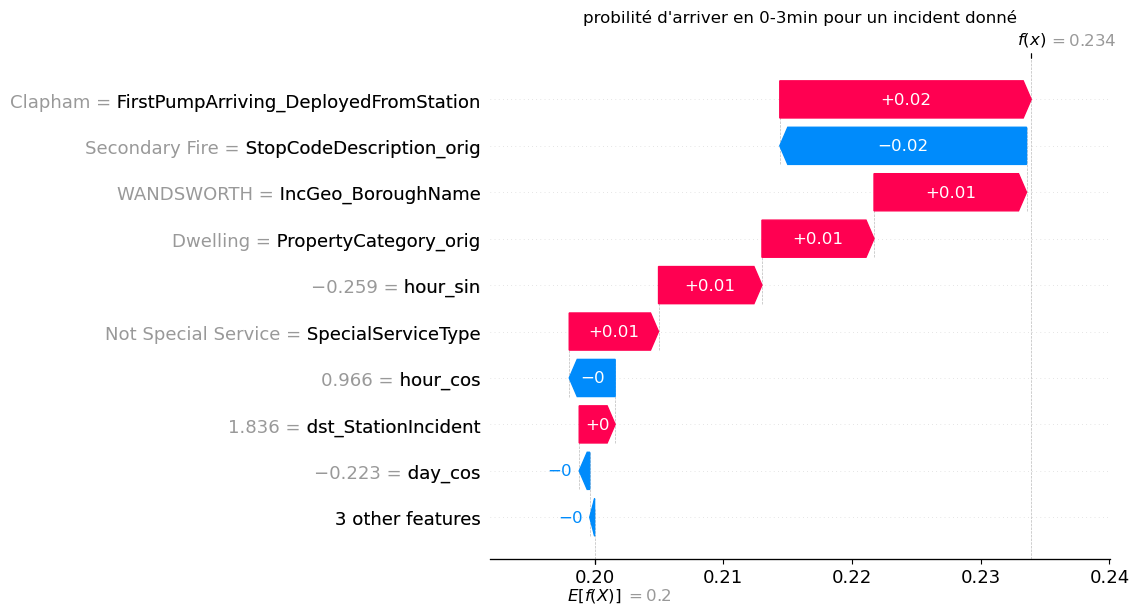

probilité d'arriver en 3-6min pour un individu n


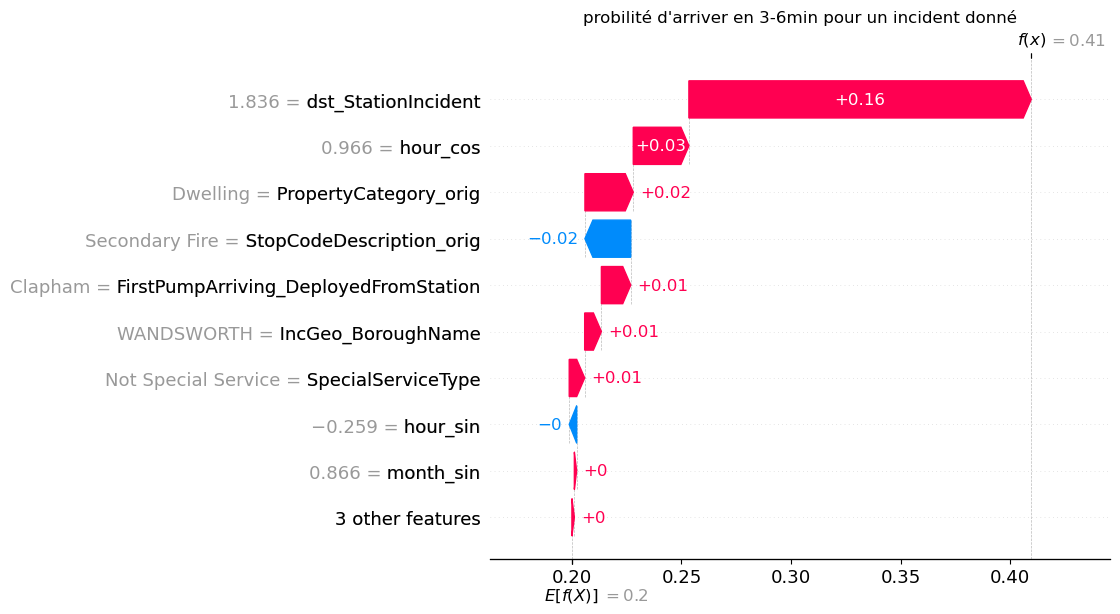

probilité d'arriver en 6-9min pour un individu n


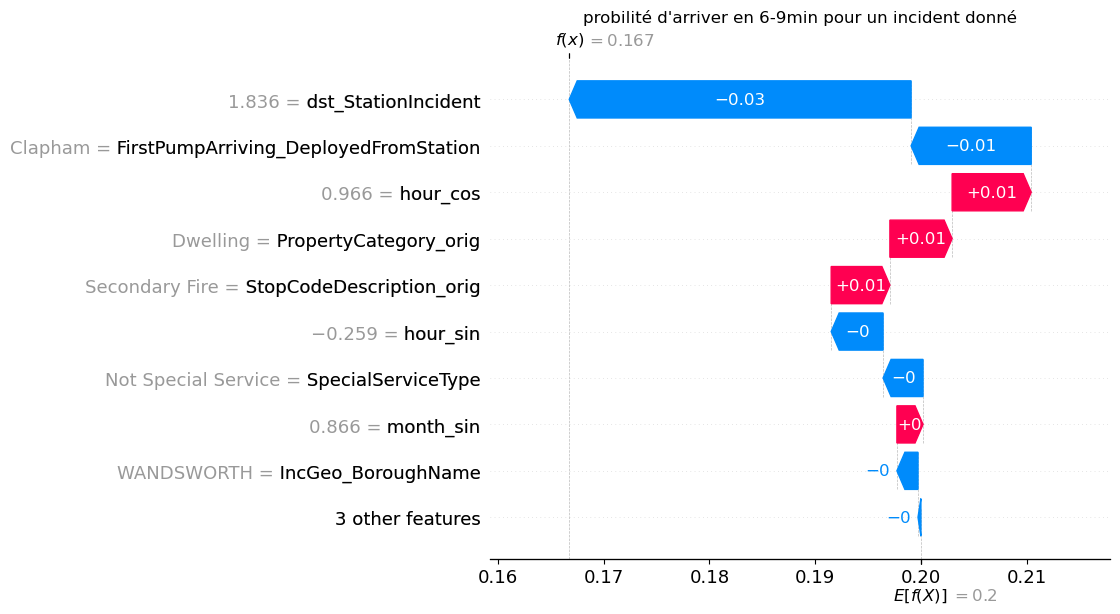

probilité d'arriver en 9-12min pour un individu n


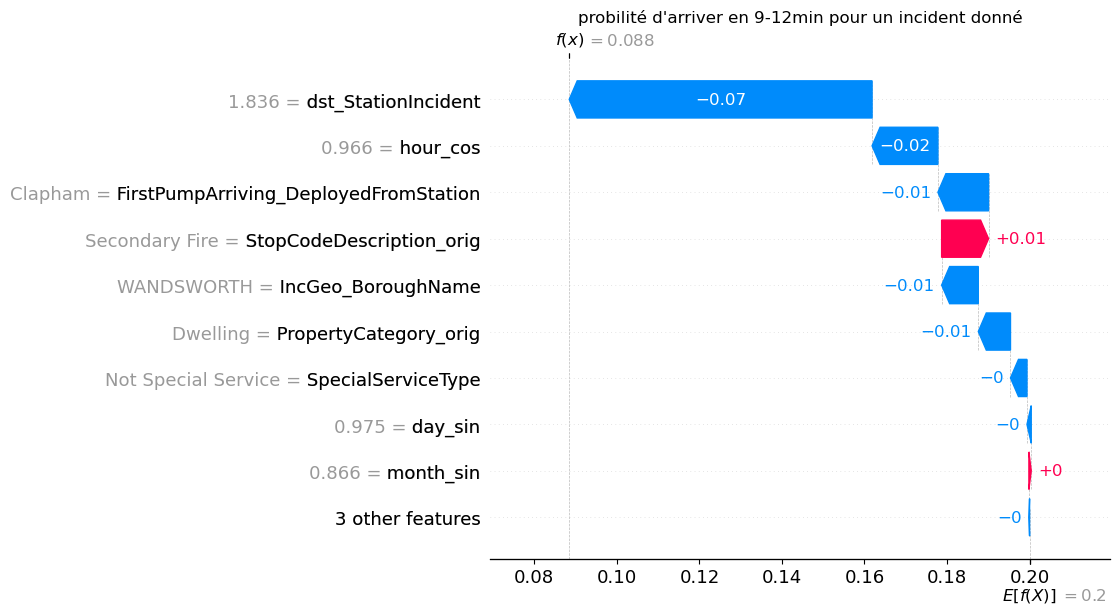

probilité d'arriver en +12min pour un individu n


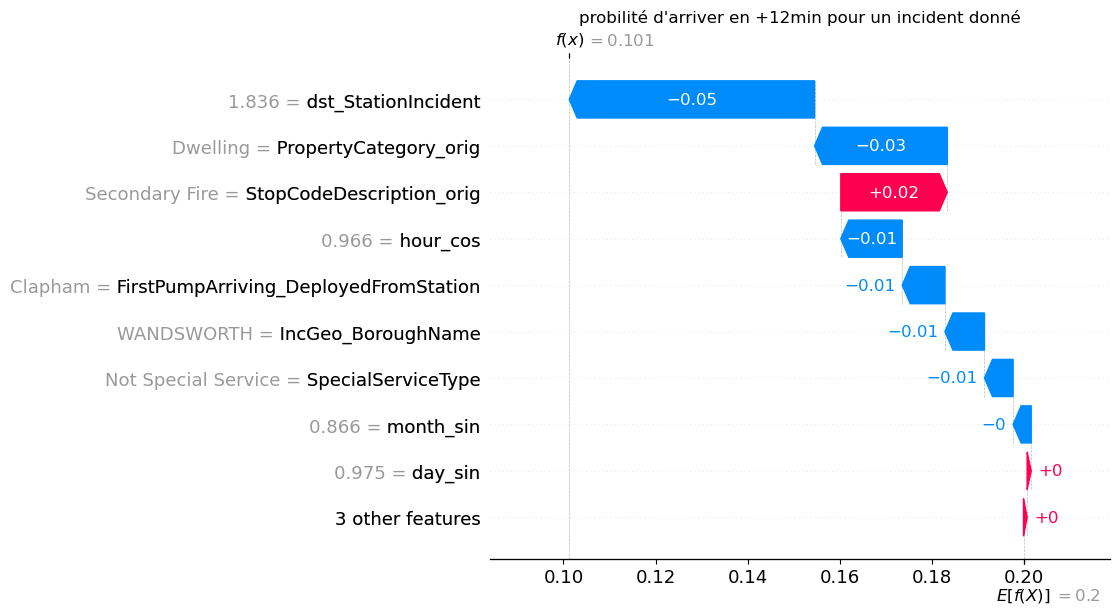

In [81]:
classes = ["0-3min","3-6min","6-9min","9-12min","+12min"]

for i,classe in zip(range(0,5), classes) :
    print("probilité d'arriver en",classe,"pour un individu n")
    
    shap.plots.waterfall(shap_values[7987,:,i],show = False)
    plt.title(f"probilité d'arriver en {classe} pour un incident donné")
    plt.show()
    
# expliquer comment la proba de la classe i a été faites pour l'individu n 


temps de réponse: 0-3min


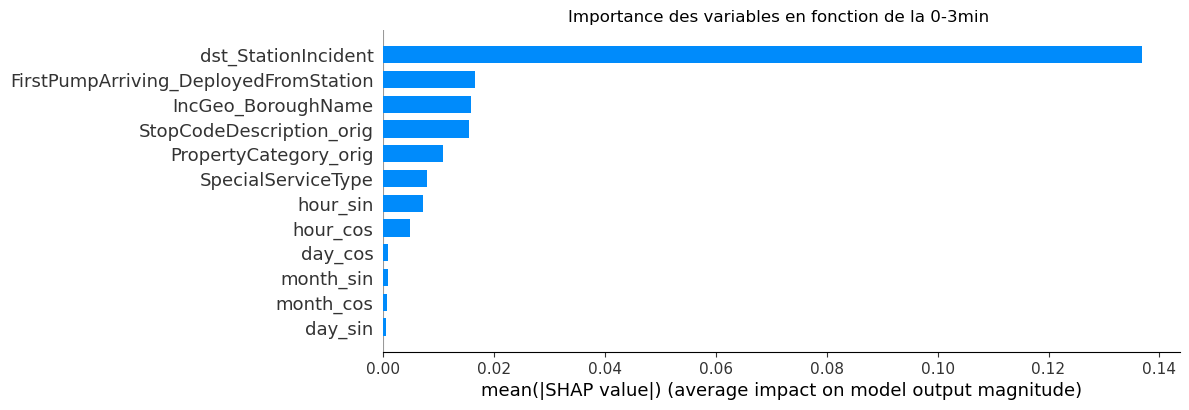

temps de réponse: 3-6min


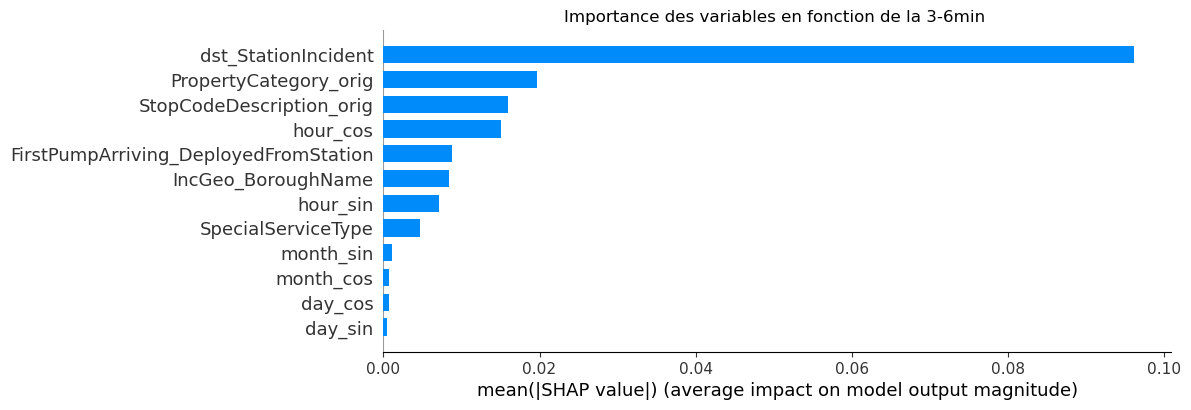

temps de réponse: 6-9min


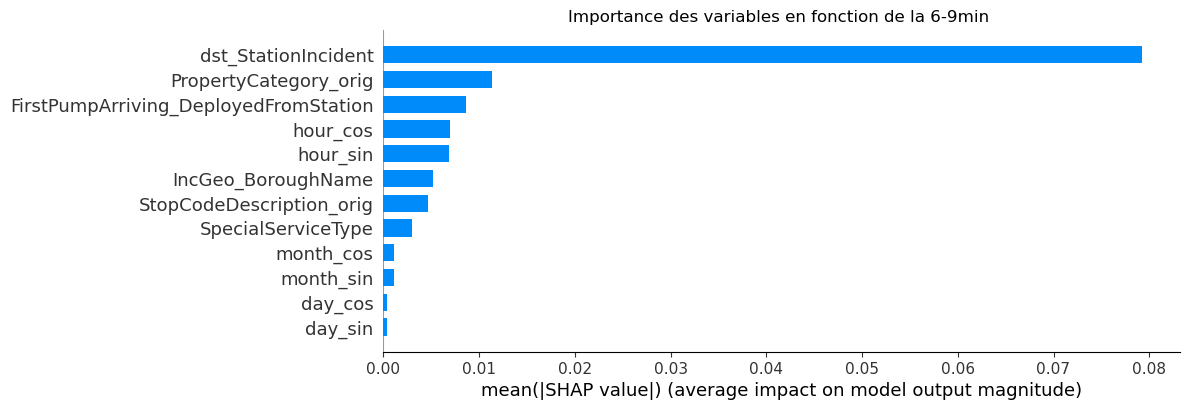

temps de réponse: 9-12min


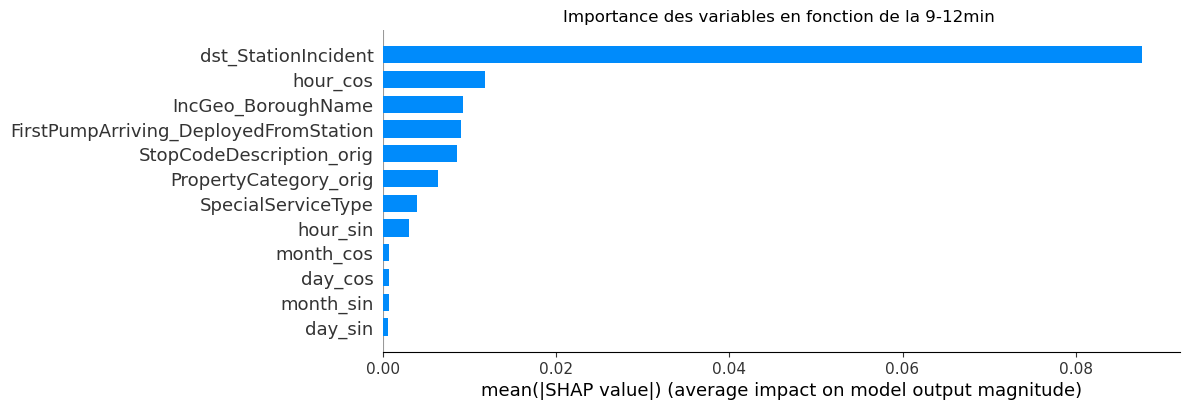

temps de réponse: +12min


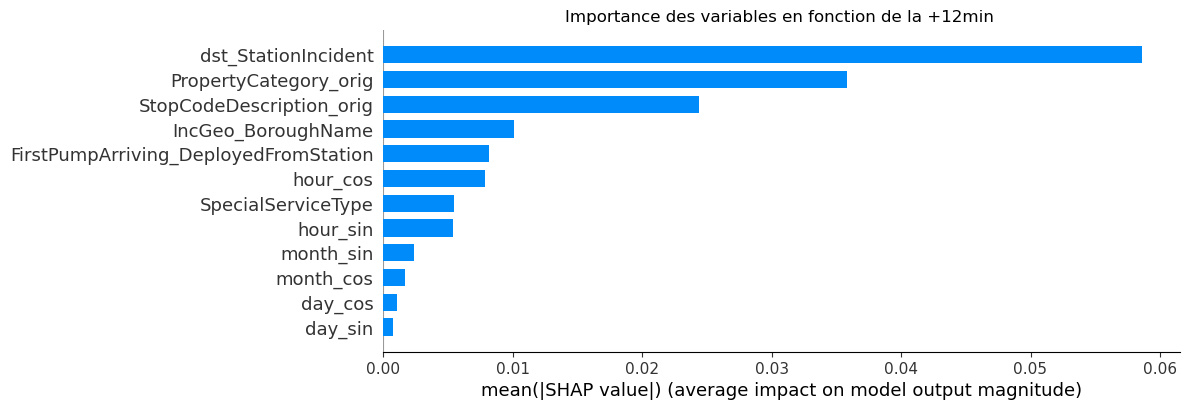

In [80]:
classes = ["0-3min","3-6min","6-9min","9-12min","+12min"]

for i,classe in zip(range(0,5),classes) : 
    print("temps de réponse:", classe)
    shap.summary_plot(shap_values[:,:,i], X_test_scaled, plot_type="bar",plot_size=[12,4],show=False)
    plt.title(f"Importance des variables en fonction de la {classe} ")
    plt.show()




effet des varibles. Temps: 0-3min


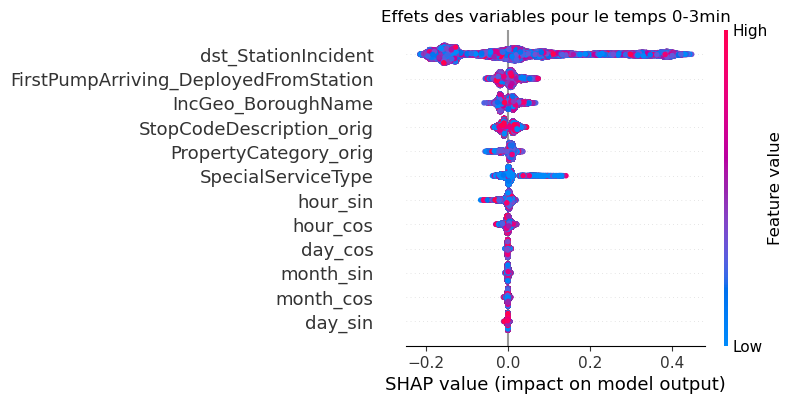

effet des varibles. Temps: 3-6min


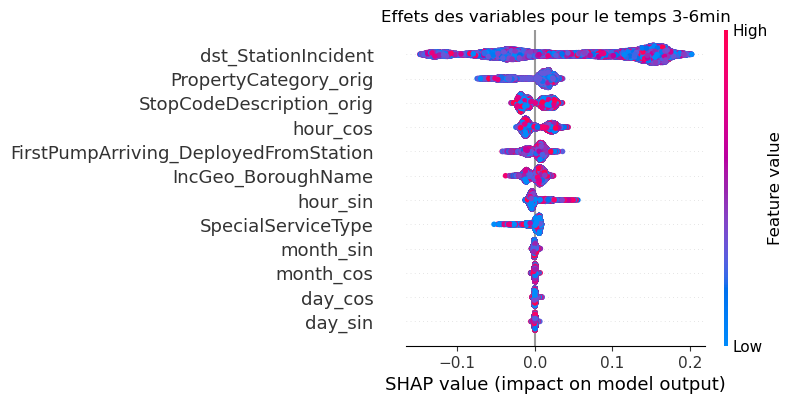

effet des varibles. Temps: 6-9min


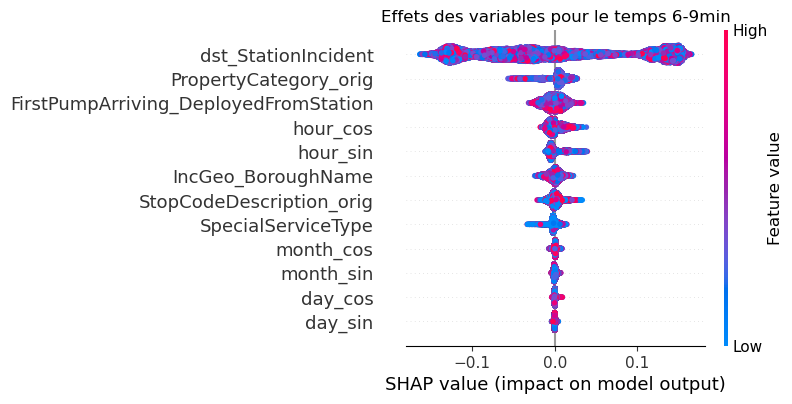

effet des varibles. Temps: 9-12min


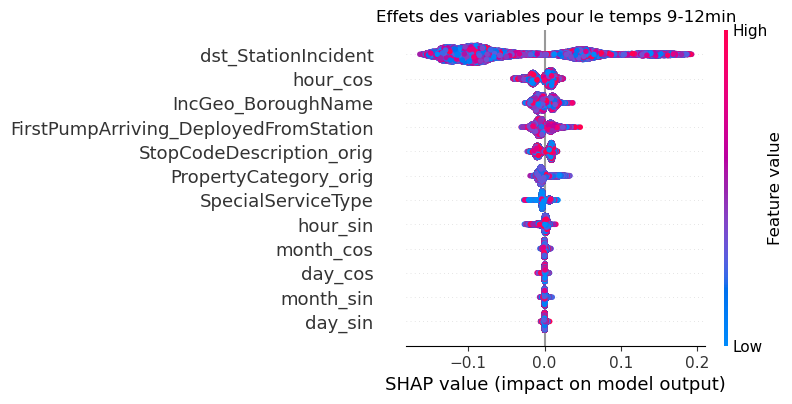

effet des varibles. Temps: +12min


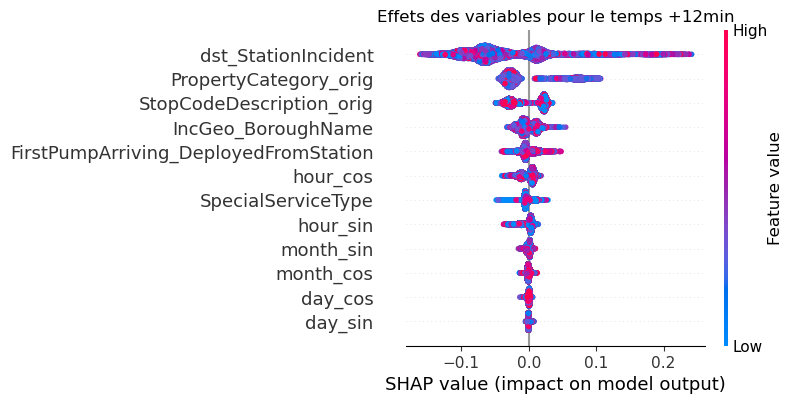

In [82]:
classes = ["0-3min","3-6min","6-9min","9-12min","+12min"]

for i,classe in zip(range(0,5),classes) : 
    print("effet des varibles. Temps:", classe)
    shap.summary_plot(shap_values[:,:,i], X_choisi, plot_type="dot",plot_size=[8,4], show=False)
    plt.title(f"Effets des variables pour le temps {classe}")
    plt.show()

In [55]:
# Pour obtenir des valeurs globales
preds = modelBRF.predict(X_test_scaled)

new_shap_values = []
for i, pred in enumerate(preds):
    # recupe les valeurs shap pour les classe prédites à la ligne x
    new_shap_values.append(shap_values.values[i][:,pred])

# remplacer les shap values

shap_values.values = np.array(new_shap_values)
# tab a deux dim
print(shap_values.shape)

(72135, 12)


Effet moyen des variables sur les probabilités


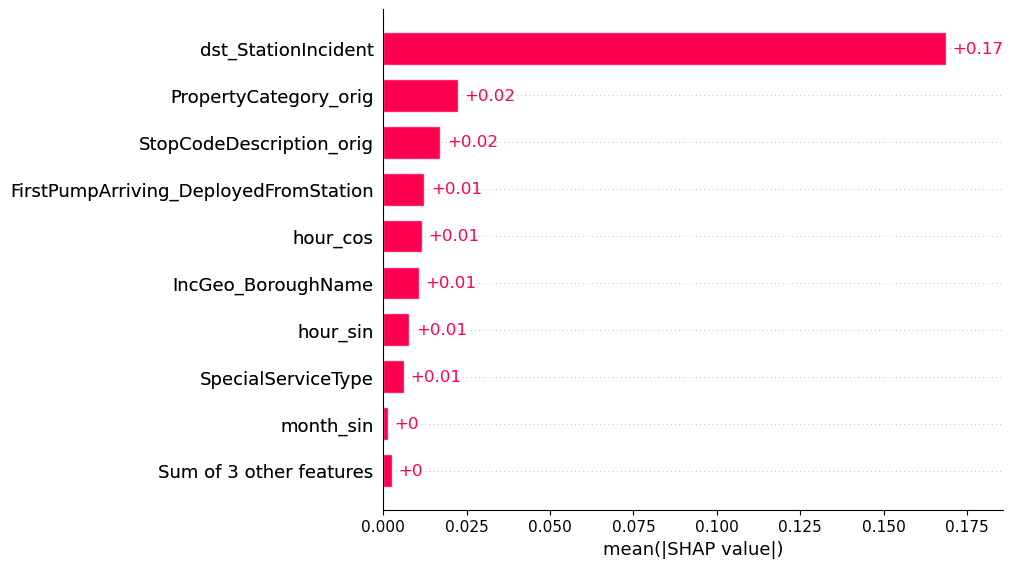

In [56]:
print("Effet moyen des variables sur les probabilités")
shap.plots.bar(shap_values)


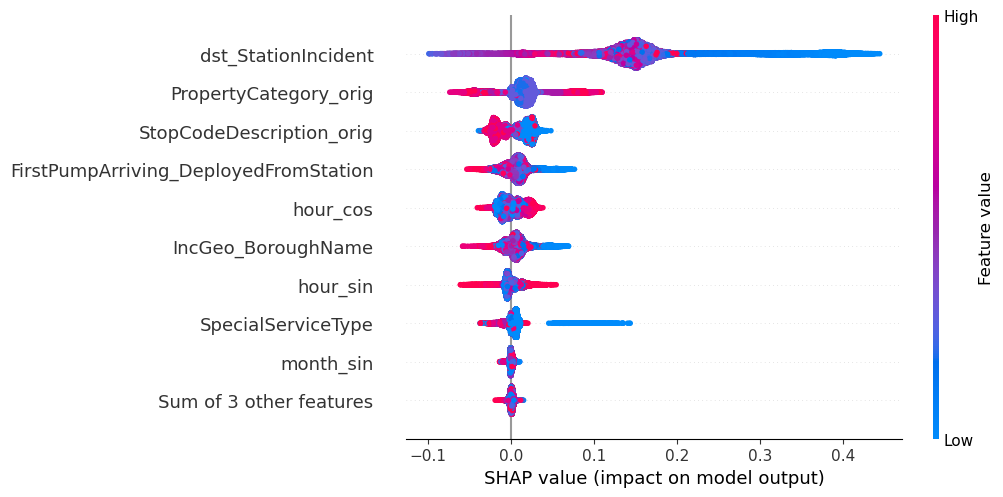

In [265]:
shap.plots.beeswarm(shap_values)

In [ ]:
### options 2

In [57]:
explainer = shap.Explainer(modelBRF,feature_names=X_class.columns)
shap_values_cat = explainer(X_test_scaled)
print(shap_values_cat.shape)

(72135, 12, 5)


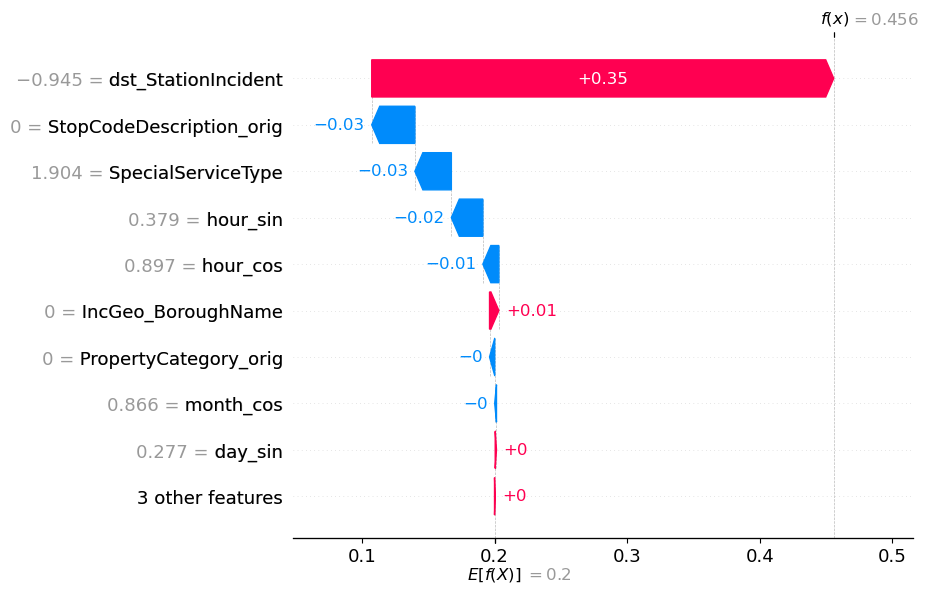

In [58]:
shap.plots.waterfall(shap_values_cat[65,:,0])

In [ ]:
mean0

In [59]:
# shap value moyenne pour chaque classe

mean0 = np.mean(np.abs(shap_values_cat.values[:,:,0]), axis =0)
mean1 = np.mean(np.abs(shap_values_cat.values[:,:,1]), axis =0)
mean2 = np.mean(np.abs(shap_values_cat.values[:,:,2]), axis =0)
mean3 = np.mean(np.abs(shap_values_cat.values[:,:,3]), axis =0)
mean4 = np.mean(np.abs(shap_values_cat.values[:,:,4]), axis =0)

df = pd.DataFrame({"0-3min" : mean0,
                   "3-6min" : mean1,
                   "6-9min" : mean2,
                   "9-12min" : mean3,
                   "+12min" : mean4}, index = X_test.columns)




In [60]:
df

0-3min    3-6min    6-9min   9-12min  \
month_cos                              0.000730  0.000783  0.001133  0.000711   
month_sin                              0.000868  0.001167  0.001123  0.000627   
day_cos                                0.000922  0.000728  0.000419  0.000688   
day_sin                                0.000576  0.000510  0.000419  0.000571   
hour_cos                               0.004734  0.015064  0.006906  0.011715   
hour_sin                               0.007162  0.007143  0.006862  0.002946   
SpecialServiceType                     0.007735  0.004654  0.002943  0.003849   
IncGeo_BoroughName                     0.016476  0.008725  0.005507  0.009355   
FirstPumpArriving_DeployedFromStation  0.017116  0.008999  0.008808  0.009148   
dst_StationIncident                    0.135915  0.096043  0.078993  0.087152   
StopCodeDescription_orig               0.015429  0.015923  0.004659  0.008486   
PropertyCategory_orig                  0.010711  0.019659  0.011352  0.006323   

                                         +12min  
month_cos                              0.001707  
month_sin                              0.002419  
day_cos                                0.001046  
day_sin                                0.000735  
hour_cos                               0.007844  
hour_sin                               0.005375  
SpecialServiceType                     0.005397  
IncGeo_BoroughName                     0.010551  
FirstPumpArriving_DeployedFromStation  0.008577  
dst_StationIncident                    0.058161  
StopCodeDescription_orig               0.024436  
PropertyCategory_orig                  0.035694

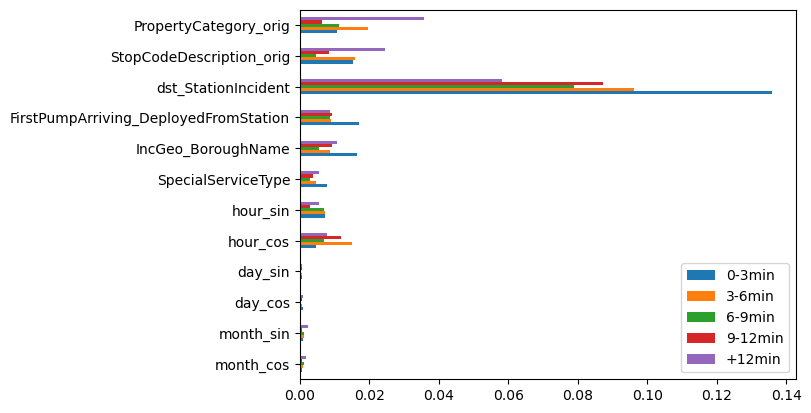

In [61]:
df.plot(kind = "barh")
plt.show()


In [270]:
# Pour obtenir des valeurs globales
preds = modelBRF.predict(X_test_scaled[0:101])

new_shap_values = []
for i, pred in enumerate(preds):
    # recupe les valeurs shap pour les classe prédites à la ligne x
    new_shap_values.append(shap_values_cat.values[i][:,pred])

# remplacer les shap values

shap_values_cat.values = np.array(new_shap_values)
# tab a deux dim
print(shap_values_cat.shape)

(101, 12)


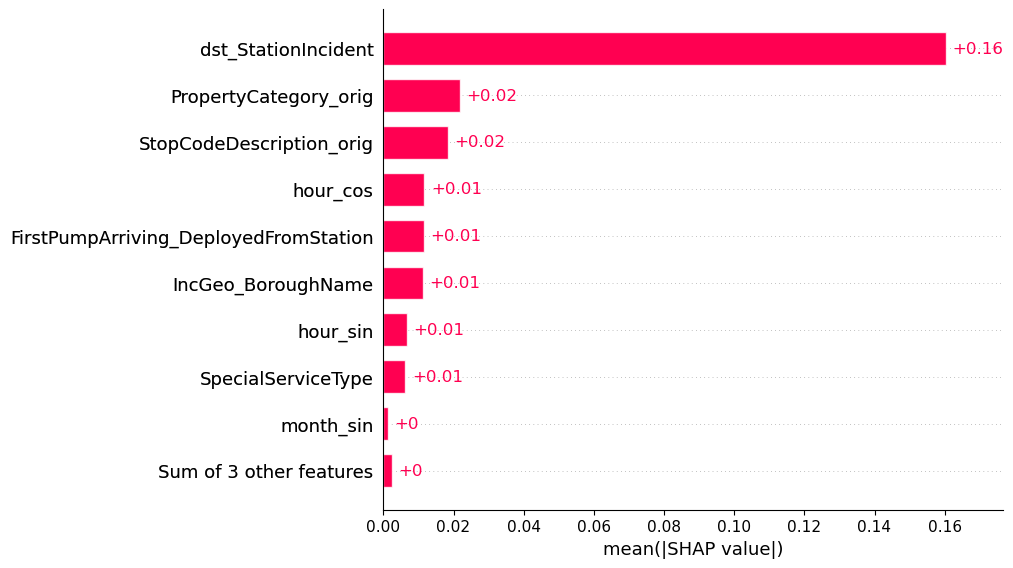

In [271]:
shap.plots.bar(shap_values_cat)


In [62]:
shap.plots.beeswarm(shap_values_cat)


ValueError: The beeswarm plot does not support plotting explanations with instances that have more than one dimension!

## enregistrement des modeles

In [ ]:
from joblib import dump, load
import pickle 

In [ ]:
# randomForest
modelRF = 'ModeleClass/RandomForest'
pickle.dump(RF, open(modelRF, 'wb'))

#addaboost
modelAda = 'ModeleClass/AdaBoostClass'
pickle.dump(DTC, open(modelAda, 'wb'))

#DTC
modelDTC = 'ModeleClass/DecisionTree'
pickle.dump(DTC, open(modelDTC, 'wb'))

# balanced fores
modelBRF = 'ModeleClass/BalancedRamdomForest'
pickle.dump(BRF_tunded, open(modelBRF, 'wb'))

# Rus
modelRus = 'ModeleClass/RUSBoostClassifier'
pickle.dump(RUS_best, open(modelRus, 'wb'))

In [41]:
# save des scalers classification
# meanencoder
file_meanEnc = '../Scalers/MeanEncoder_class'
pickle.dump(mean_enc, open(file_meanEnc, 'wb'))


# std scaler
file_scaler = '../Scalers/RbScaler_class'
pickle.dump(scaler, open(file_scaler, 'wb'))


In [ ]:
pip freeze > requirements.txt

In [ ]:
pip list --format=freeze > requirements.tx


In [6]:

# df_2020_mod = df_2020.drop(columns = ["IncidentNumber","DateOfCall","TimeOfCall","PropertyType","AddressQualifier",
#                 "Postcode_full","Postcode_district","IncidentStationGround","Easting_m","Northing_m","Easting_rounded","Northing_rounded","Latitude",
#                 "Longitude","Latitude_Station","Longitude_Station","NumStationsWithPumpsAttending","NumPumpsAttending","PumpCount",
#                 "PumpMinutesRounded","Notional Cost (£)","NumCalls","FirstPumpArriving_TravelTimeSec",
#                 "FirstPump_DelayCode_Description","FirstPump_Division_staion","tempsAPI"], axis = 1)

# df_2020_mod = df_2020_mod.dropna(axis=0)

# Features 
X = df_2020_mod.drop(columns=["Weekday","Month","HourOfCall","Week_Weekend","London_Zone","CalYear","Same_Incident_Station",
                    "FirstPumpArriving_AttendanceTime","AttendanceTime_Min","FirstPump_Delayed","FirstPumpArriving_TurnoutTimeSec",
                    "Station_DelayFreq","IncGeo_WardNameNew","Ward_DelayFreq","Bo_DelayFreq" ,'Incident_Fire', 'Incident_Special Service',
'StopCode_Primary Fire', 'StopCode_Secondary Fire',
'StopCode_Special Service', '_Non Residential', '_Other Residential',
'_Outdoor', '_Outdoor Structure', '_Road Vehicle'])

# y pour la regression
y_reg = df_2020_mod.FirstPumpArriving_AttendanceTime

# y pour la classification
y_class = df_2020_mod.AttendanceTime_Min

# encodage de la target
y_class = y_class.replace({'0-3min' : 0,
    '3-6min' : 1,
    '6-9min' : 2,
    "9-12min" : 3,
    '+12min' : 4
    })





C:\Users\loreb\AppData\Local\Temp\ipykernel_24832\2597188386.py:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_class = y_class.replace({'0-3min' : 0,


In [7]:
X_train_reg.columns

NameError: name 'X_train_reg' is not defined

In [8]:
print(len(X_train_reg.IncGeo_BoroughName.unique()))
print(len(X_train_reg.FirstPumpArriving_DeployedFromStation.unique()))
print(len(X_train_reg.IncidentGroup_orig.unique()))
print(len(X_train_reg.StopCodeDescription_orig.unique()))
print(len(X_train_reg.PropertyCategory_orig.unique()))


NameError: name 'X_train_reg' is not defined

In [311]:
print(len(X_test_reg.IncGeo_BoroughName.unique()))
print(len(X_test_reg.FirstPumpArriving_DeployedFromStation.unique()))
print(len(X_test_reg.IncidentGroup_orig.unique()))
print(len(X_test_reg.StopCodeDescription_orig.unique()))
print(len(X_test_reg.PropertyCategory_orig.unique()))

33
102
3
4
6


In [21]:
df_2020_mod.StopCodeDescription_orig.value_counts()

StopCodeDescription_orig
AFA                118829
Special Service     92768
Secondary Fire      52941
Primary Fire        23468
Name: count, dtype: int64

In [17]:
X_train_reg.columns

Index(['month_cos', 'month_sin', 'day_cos', 'day_sin', 'hour_cos', 'hour_sin',
       'SpecialServiceType', 'IncGeo_BoroughName',
       'FirstPumpArriving_DeployedFromStation', 'dst_StationIncident',
       'IncidentGroup_orig', 'StopCodeDescription_orig',
       'PropertyCategory_orig'],
      dtype='object')

In [13]:
X_train_reg,X_test_reg,y_train_reg, y_test_reg = train_test_split(X,y_reg, test_size = 0.25, random_state=45)

mean_enc_reg = MeanEncoder(smoothing='auto')
X_train_reg = mean_enc_reg.fit_transform(X_train_reg,y_train_reg)
X_test_reg = mean_enc_reg.transform(X_test_reg)

scaler_reg = RobustScaler()
X_train_reg_sc = scaler_reg.fit_transform(X_train_reg)
X_test_reg_sc = scaler_reg.transform(X_test_reg)



#chargement des modeles
RegressionLr = pickle.load(open('ModelesLineaire/lineaire_naif', 'rb'))
Lasso = pickle.load(open("ModelesLineaire/Lasso", 'rb'))  
Poly = pickle.load(open("ModelesLineaire/Poly", 'rb'))
Elastic = pickle.load(open("ModelesLineaire/Elastic", 'rb'))
RandomForest_reg = pickle.load(open("ModelesLineaire/RandomForest", 'rb'))

modeles_reg = ["Regression Linéaire", "Lasso","Polynomiale","RandomForest"
                ,"ElasticNet"]

dico_model_reg = { "Regression Linéaire": RegressionLr,
            "Lasso" : Lasso,
            "Polynomiale" : Poly,
            "RandomForest" : RandomForest_reg,
            "ElasticNet" : Elastic
            }

# def calcul_metrics_reg(model):

    
#     # valeurs pour le set de train
#     y_pred_train = model.predict(X_train_reg_sc)
#     R2_train = r2_score(y_train_reg, y_pred_train)
#     MAE_train = mean_absolute_error(y_train_reg,y_pred_train)
#     MSE_train = mean_squared_error(y_train_reg,y_pred_train)

#     # valeur pour le set de test
#     y_pred_test = model.predict(X_test_reg_sc)
#     R2_test = r2_score(y_test_reg, y_pred_test)
#     MAE_test = mean_absolute_error(y_test_reg,y_pred_test)
#     MSE_test = mean_squared_error(y_test_reg,y_pred_test)
    
#     return R2_train, MAE_train, MSE_train, R2_test, MAE_test, MSE_test

md = Elastic
# print("R2 train :", calcul_metrics_reg(md)[0], " R2 test :", calcul_metrics_reg(md)[3] )
# print("MAE train :" , calcul_metrics_reg(md)[1]," MAE test :",calcul_metrics_reg(md)[4] )
# print("MSE train :", calcul_metrics_reg(md)[2]," MSE test :" ,calcul_metrics_reg(md)[5])
# print("Différence MSE train - MSE train : " , (calcul_metrics_reg(md)[2] - calcul_metrics_reg(md)[5]))


In [ ]:
print(calcul_metrics_reg(md)[2])
print(calcul_metrics_reg(md)[5])

In [ ]:
mean_enc_reg.encoder_dict_

In [ ]:
X_test_reg

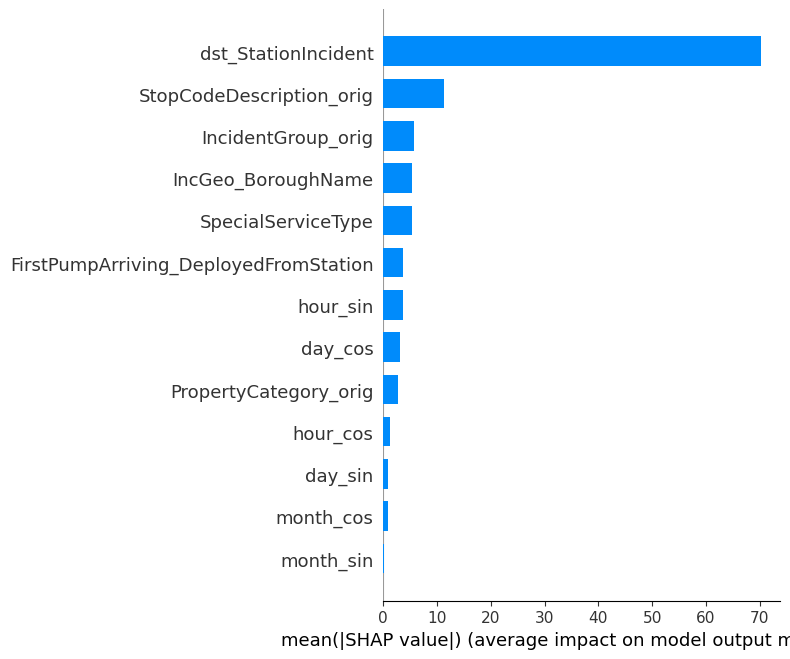

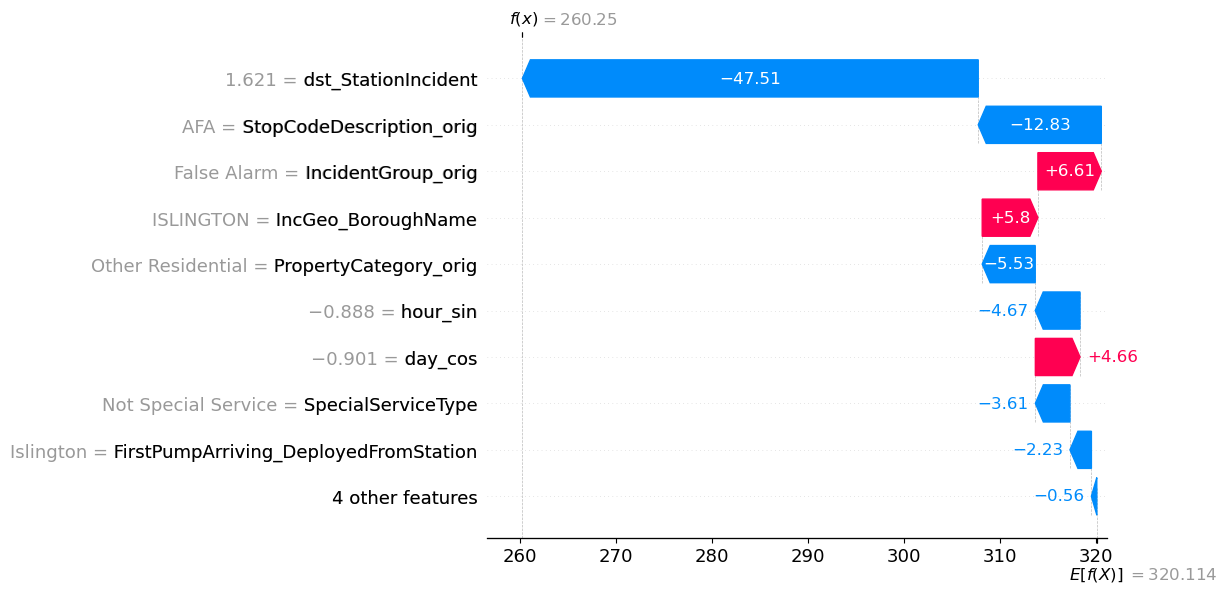

In [16]:
X_train_reg,X_test_reg,y_train_reg, y_test_reg = train_test_split(X,y_reg, test_size = 0.25, random_state=45)

mean_enc_reg = MeanEncoder(smoothing='auto')
X_train_reg = mean_enc_reg.fit_transform(X_train_reg,y_train_reg)
X_test_reg = mean_enc_reg.transform(X_test_reg)

scaler_reg = RobustScaler()
X_train_reg_sc = scaler_reg.fit_transform(X_train_reg)
X_test_reg_sc = scaler_reg.transform(X_test_reg)



#chargement des modeles
RegressionLr = pickle.load(open('ModelesLineaire/lineaire_naif', 'rb'))
Lasso = pickle.load(open("ModelesLineaire/Lasso", 'rb'))  
Poly = pickle.load(open("ModelesLineaire/Poly", 'rb'))
Elastic = pickle.load(open("ModelesLineaire/Elastic", 'rb'))
RandomForest_reg = pickle.load(open("ModelesLineaire/RandomForest", 'rb'))

modeles_reg = ["Regression Linéaire", "Lasso","Polynomiale","RandomForest"
                ,"ElasticNet"]

dico_model_reg = { "Regression Linéaire": RegressionLr,
            "Lasso" : Lasso,
            "Polynomiale" : Poly,
            "RandomForest" : RandomForest_reg,
            "ElasticNet" : Elastic
            }



import shap.explainers
# pour visualisation des plots
shap.plots.initjs()

explainer = shap.explainers.LinearExplainer(Elastic, X_test_reg_sc,feature_names=X.columns)
shap_values = explainer(X_test_reg_sc)


# # plot des features importances
fig = plt.figure()
shap.summary_plot(shap_values, X_test_reg_sc, plot_type="bar")


# # redonne aux variables leur valeur d'origine
X_test_reg = mean_enc_reg.inverse_transform(X_test_reg)
shap_values.data = X_test_reg.values

fig = plt.figure()
shap.plots.waterfall(shap_values[678])


## CLASIFFICACTION WERONIKA

In [8]:
X_class = df_2020_mod.drop(columns=["FirstPumpArriving_TurnoutTimeSec","HourOfCall","Weekday","Month","Periode","Periode_Rush","Week_Weekend","CalYear","Same_Incident_Station",
                          "FirstPumpArriving_AttendanceTime","AttendanceTime_Min","FirstPump_Delayed",
                          "Station_DelayFreq","IncGeo_WardNameNew","Ward_DelayFreq","Bo_DelayFreq" ,'Incident_Fire', 'Incident_Special Service',
       'StopCode_Primary Fire', 'StopCode_Secondary Fire',
       'StopCode_Special Service', '_Non Residential', '_Other Residential',
       '_Outdoor', '_Outdoor Structure', '_Road Vehicle',"_Other Vehicle","London_Zone","IncidentGroup_orig"])


# class Weronika

bins_3 = [1.0, 251.0, 346.0, 1200.0]
class_labels_3 = ['0', '1', '2']
bins_4 = [1.0, 227.0, 296.0, 379.0, 1200.0]
class_labels_4 = ['0', '1', '2', '3']
bins_5 = [0, 211, 269, 325, 405, 1200]
class_labels_5 = ['0', '1', '2', '3','4']

# Assignation des classes en utilisant pd.cut 3 colonnes pour chaque bins
y_bins3 = pd.cut(df_2020_mod['FirstPumpArriving_AttendanceTime'], bins=bins_3, labels=class_labels_3, include_lowest=True)
y_bins4 = pd.cut(df_2020_mod['FirstPumpArriving_AttendanceTime'], bins=bins_4, labels=class_labels_4, include_lowest=True)
y_bins5 = pd.cut(df_2020_mod['FirstPumpArriving_AttendanceTime'], bins=bins_5, labels=class_labels_5, include_lowest=True)
# Ordinal Encoding
y_bins3 = y_bins3.astype(int)  # Convertir les labels en entiers
y_bins4 = y_bins4.astype(int)
y_bins5 = y_bins5.astype(int)



cat_variables = ["IncGeo_BoroughName","FirstPumpArriving_DeployedFromStation","SpecialServiceType"
                 ,"StopCodeDescription_orig","PropertyCategory_orig"]





In [9]:
from sklearn.preprocessing import RobustScaler

############## BINS 3
X_train,X_test,y_train_bin3,y_test_bin3 = train_test_split(X_class,y_bins3, test_size = 0.25,random_state=42)

mean_enc_bin3 = MeanEncoder(variables=cat_variables , smoothing='auto',unseen='encode')
X_train = mean_enc_bin3.fit_transform(X_train,y_train_bin3)
X_test = mean_enc_bin3.transform(X_test)

scaler_bin3 = RobustScaler()
X_train_bin3 = scaler_bin3.fit_transform(X_train)
X_test_bin3 = scaler_bin3.transform(X_test)

############## BINS 4

X_train,X_test,y_train_bin4,y_test_bin4 = train_test_split(X_class,y_bins4, test_size = 0.25,random_state=42)

mean_enc_bin4 = MeanEncoder(variables=cat_variables , smoothing='auto',unseen='encode')
X_train = mean_enc_bin4.fit_transform(X_train,y_train_bin4)
X_test = mean_enc_bin4.transform(X_test)

scaler_bin4 = RobustScaler()
X_train_bin4 = scaler_bin4.fit_transform(X_train)
X_test_bin4 = scaler_bin4.transform(X_test)


############## BINS 5

X_train,X_test,y_train_bin5,y_test_bin5 = train_test_split(X_class,y_bins5, test_size = 0.25,random_state=42)

mean_enc_bin5 = MeanEncoder(variables=cat_variables , smoothing='auto',unseen='encode')
X_train = mean_enc_bin5.fit_transform(X_train,y_train_bin5)
X_test = mean_enc_bin5.transform(X_test)

scaler_bin5 = RobustScaler()
X_train_bin5 = scaler_bin5.fit_transform(X_train)
X_test_bin5 = scaler_bin5.transform(X_test)



In [11]:

# save des scalers classification
# meanencoder
import pickle

file_meanEnc = '../Scalers/MeanEncoder_classBin3'
pickle.dump(mean_enc_bin3, open(file_meanEnc, 'wb'))

file_meanEnc = '../Scalers/MeanEncoder_classBin4'
pickle.dump(mean_enc_bin4, open(file_meanEnc, 'wb'))

file_meanEnc = '../Scalers/MeanEncoder_classBin5'
pickle.dump(mean_enc_bin5, open(file_meanEnc, 'wb'))

# std scaler
file_scaler = '../Scalers/RbScaler_classBin3'
pickle.dump(scaler_bin3, open(file_scaler, 'wb'))

file_scaler = '../Scalers/RbScaler_classBin4'
pickle.dump(scaler_bin4, open(file_scaler, 'wb'))

file_scaler = '../Scalers/RbScaler_classBin5'
pickle.dump(scaler_bin5, open(file_scaler, 'wb'))


In [122]:
pip install tensorflow

  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 4.2/376.0 MB 25.2 MB/s eta 0:00:15
    --------------------------------------- 8.9/376.0 MB 24.1 MB/s eta 0:00:16
   - -------------------------------------- 14.9/376.0 MB 25.4 MB/s eta 0:00:15
   -- ------------------------------------- 23.1/376.0 MB 29.2 MB/s eta 0:00:13
   --- ------------------------------------ 31.2/376.0 MB 30.9 MB/s eta 0:00:12
   ---- ----------------------------------- 38.8/376.0 MB 32.0 MB/s eta 0:00:11
   ----- ---------------------------------- 48.0/376.0 MB 33.6 MB/s eta 0:00:10
   ------ -

In [127]:

lg3 = pickle.load(open('../ModelesClassW/Bin3/logistic_regression_model.pkl', 'rb'))
rf3 =  pickle.load(open('../ModelesClassW/Bin3/RandomForestClassifier.pkl', 'rb'))
tensor3 =  pickle.load(open('../ModelesClassW/Bin3/TensorflowKeras.pkl', 'rb'))
xg3 = pickle.load(open('../ModelesClassW/Bin3/XGBoost.pkl', 'rb'))


################
lg4 = pickle.load(open('../ModelesClassW/Bin4/logistic_regression_model.pkl', 'rb'))
rf4 =  pickle.load(open('../ModelesClassW/Bin4/RandomForestClassifier.pkl', 'rb'))
tensor4 =  pickle.load(open('../ModelesClassW/Bin4/TensorflowKeras.pkl', 'rb'))
xg4 = pickle.load(open('../ModelesClassW/Bin4/XGBoost.pkl', 'rb'))

#############

lg5 = pickle.load(open('../ModelesClassW/Bin5/logistic_regression_model.pkl', 'rb'))
rf5 =  pickle.load(open('../ModelesClassW/Bin5/RandomForestClassifier.pkl', 'rb'))
tensor5 =  pickle.load(open('../ModelesClassW/Bin5/TensorflowKeras.pkl', 'rb'))
xg5 = pickle.load(open('../ModelesClassW/Bin5/XGBoost.pkl', 'rb'))


c:\Users\loreb\anaconda3\envs\pompiersLit\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LogisticRegression from version 1.3.0 when using version 1.5.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\loreb\anaconda3\envs\pompiersLit\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.0 when using version 1.5.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\loreb\anaconda3\envs\pompiersLit\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier f

ImportError: cannot import name 'slice_along_axis' from 'keras.src.backend.common.backend_utils' (c:\Users\loreb\anaconda3\envs\pompiersLit\Lib\site-packages\keras\src\backend\common\backend_utils.py)

In [99]:
xg.save_config()

'{"learner":{"generic_param":{"device":"cpu","fail_on_invalid_gpu_id":"0","n_jobs":"0","nthread":"0","random_state":"0","seed":"0","seed_per_iteration":"0","validate_parameters":"0"},"gradient_booster":{"gbtree_model_param":{"num_parallel_tree":"1","num_trees":"2000"},"gbtree_train_param":{"process_type":"default","tree_method":"auto","updater":"grow_quantile_histmaker","updater_seq":"grow_quantile_histmaker"},"name":"gbtree","specified_updater":false,"tree_train_param":{"alpha":"0","cache_opt":"1","colsample_bylevel":"1","colsample_bynode":"1","colsample_bytree":"1","eta":"0.300000012","gamma":"0","grow_policy":"depthwise","interaction_constraints":"","lambda":"1","learning_rate":"0.300000012","max_bin":"256","max_cat_threshold":"64","max_cat_to_onehot":"4","max_delta_step":"0","max_depth":"6","max_leaves":"0","min_child_weight":"1","min_split_loss":"0","monotone_constraints":"()","refresh_leaf":"1","reg_alpha":"0","reg_lambda":"1","sampling_method":"uniform","sketch_ratio":"2","spars

In [ ]:
# refaire les modele pour tensor et rdforest

In [150]:
pip install scikit-optimize

  Using cached scikit_optimize-0.10.2-py2.py3-none-any.whl.metadata (9.7 kB)
  Using cached pyaml-25.1.0-py3-none-any.whl.metadata (12 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
Using cached scikit_optimize-0.10.2-py2.py3-none-any.whl (107 kB)
Using cached pyaml-25.1.0-py3-none-any.whl (26 kB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.4.2 which is incompatible.


In [12]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, root_mean_squared_error,r2_score
from sklearn.metrics import classification_report
from sklearn.metrics import balanced_accuracy_score, f1_score, accuracy_score

In [13]:
def rapport_mat(model, X_test, y_test, order):
            
            y_pred = model.predict(X_test)

            mat = pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])
            rapport = classification_report(y_test, y_pred, target_names=order, output_dict=True)
            return mat, pd.DataFrame(rapport).transpose()



In [14]:
order3 = ['1-251', ' 251-346', '346-1200']

order4 = ['1-227', '227-296', '296-379', '379-1200']

order5 = ['0-211', '211-269', '269-325', '325-405','405-1200']

#### refit de logistic reg

In [15]:
from sklearn.linear_model import LogisticRegression

In [130]:
lg5.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'multinomial',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [35]:
lg3 = LogisticRegression(max_iter= 1000, solver = "lbfgs", penalty =  'l2')
lg4 = LogisticRegression(max_iter= 1000, solver = "lbfgs", penalty =  'l2')
lg5 = LogisticRegression(max_iter= 1000, solver = "lbfgs", penalty =  'l2')


lg3 = lg3.fit(X_train_bin3, y_train_bin3)
lg4 = lg4.fit(X_train_bin4, y_train_bin4)
lg5 = lg5.fit(X_train_bin5, y_train_bin5)

In [183]:
modelg3 = '../ModelesClassW/Bin3/LG3'
pickle.dump(lg3, open(modelg3, 'wb'))

modelg4 = '../ModelesClassW/Bin4/LG4'
pickle.dump(lg4, open(modelg4, 'wb'))

modelg5 = '../ModelesClassW/Bin5/LG5'
pickle.dump(lg5, open(modelg5, 'wb'))


In [188]:
bins_3

[1.0, 251.0, 346.0, 1200.0]

In [195]:
mat, rapport = rapport_mat(lg3,X_test_bin3,y_test_bin3,order3)
display(mat)
display(rapport)

Classe prédite      0      1      2
Classe réelle                      
0               16904   5448    667
1                5995  13969   5188
2                1517   6075  15978

precision    recall  f1-score       support
1-251          0.692333  0.734350  0.712723  23019.000000
 251-346       0.547976  0.555383  0.551655  25152.000000
346-1200       0.731828  0.677896  0.703830  23570.000000
accuracy       0.653058  0.653058  0.653058      0.653058
macro avg      0.657379  0.655876  0.656069  71741.000000
weighted avg   0.654698  0.653058  0.653332  71741.000000

In [240]:
print(accuracy_score(y_test_bin3,lg3.predict(X_test_bin3)))
print(accuracy_score(y_test_bin4,lg4.predict(X_test_bin4)))
print(accuracy_score(y_test_bin4,lg5.predict(X_test_bin5)))


0.6530575263796156
0.5505080776682789
0.37877921969306255


##### randomForest

In [17]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

In [36]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(X_train_bin3,y_train_bin3)

RF4 = RandomForestClassifier()
RF4.fit(X_train_bin4,y_train_bin4)

RF5 = RandomForestClassifier()
RF5.fit(X_train_bin5,y_train_bin5)

RandomForestClassifier()

In [244]:
print("RF3 ",accuracy_score(y_test_bin3,RF.predict(X_test_bin3)))
print("RF4 ",accuracy_score(y_test_bin4,RF4.predict(X_test_bin4)))
print("RF5 ",accuracy_score(y_test_bin4,RF5.predict(X_test_bin5)))


RF3  0.6667456545071856
RF4  0.5652834501888738
RF5  0.3897910539301097


In [245]:
print("LG3 ",accuracy_score(y_test_bin3,lg3.predict(X_test_bin3)))
print("RF3 ",accuracy_score(y_test_bin3,RF.predict(X_test_bin3)))

print("LG4 ",accuracy_score(y_test_bin4,lg4.predict(X_test_bin4)))
print("RF4 ",accuracy_score(y_test_bin4,RF4.predict(X_test_bin4)))

print("LG5 ",accuracy_score(y_test_bin5,lg5.predict(X_test_bin5)))
print("RF5 ",accuracy_score(y_test_bin5,RF5.predict(X_test_bin5)))

LG3  0.6530575263796156
RF3  0.6667456545071856
LG4  0.5505080776682789
RF4  0.5652834501888738
LG5  0.47380159183730364
RF35  0.4826668153496606


In [196]:
mat, rapport = rapport_mat(RF,X_test_bin3,y_test_bin3,order3)
display(mat)
display(rapport)

Classe prédite      0      1      2
Classe réelle                      
0               16756   5570    693
1                5464  15017   4671
2                1329   6281  15960

precision    recall  f1-score       support
1-251          0.711538  0.727920  0.719636  23019.000000
 251-346       0.558918  0.597050  0.577355  25152.000000
346-1200       0.748452  0.677132  0.711008  23570.000000
accuracy       0.665352  0.665352  0.665352      0.665352
macro avg      0.672969  0.667367  0.669333  71741.000000
weighted avg   0.670158  0.665352  0.666918  71741.000000

In [218]:
# pour stop si no improvement
from skopt.callbacks import DeltaYStopper 
# pour stop au bout de x min
from skopt.callbacks import DeadlineStopper
import datetime

In [234]:
parameters_rf = {
              "criterion" : Categorical(["gini","entropy","log_loss"]),
              "n_estimators" : Integer(100,200),
              'max_depth' : Integer(3,9),
              'max_features' : Categorical(["sqrt",'log2'])
              }

cv = StratifiedKFold(n_splits = 3, shuffle=True)

early_stop = DeltaYStopper(delta=0.02)
deadline_stop = DeadlineStopper(total_time=1200)

# search pour MAD SC
bay_rf = BayesSearchCV(RF, 
                    search_spaces = parameters_rf,
                    n_iter=30,
                    cv = cv, scoring = "accuracy",
                    n_jobs=1, verbose=1,refit=True
                    )



In [235]:
bay_rf.fit(X_train_bin3,y_train_bin3,callback=[early_stop,deadline_stop])


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


BayesSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=True),
              estimator=RandomForestClassifier(), n_iter=30, scoring='accuracy',
              search_spaces={'criterion': Categorical(categories=('gini', 'entropy', 'log_loss'), prior=None),
                             'max_depth': Integer(low=3, high=9, prior='uniform', transform='normalize'),
                             'max_features': Categorical(categories=('sqrt', 'log2'), prior=None),
                             'n_estimators': Integer(low=100, high=200, prior='uniform', transform='normalize')},
              verbose=1)

In [236]:
print("Best Score:", bay_rf.best_score_)
print("Best Parameters:", bay_rf.best_params_)


Best Score: 0.6564585075736455
Best Parameters: OrderedDict({'criterion': 'entropy', 'max_depth': 8, 'max_features': 'log2', 'n_estimators': 103})


In [ ]:
mat, rapport = rapport_mat(bay_rf.best_estimator,X_test_bin3,y_test_bin3,order3)
display(mat)
display(rapport)

In [237]:
bay_rf.fit(X_train_bin5,y_train_bin5,callback=[early_stop,deadline_stop])


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


BayesSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=True),
              estimator=RandomForestClassifier(), n_iter=30, scoring='accuracy',
              search_spaces={'criterion': Categorical(categories=('gini', 'entropy', 'log_loss'), prior=None),
                             'max_depth': Integer(low=3, high=9, prior='uniform', transform='normalize'),
                             'max_features': Categorical(categories=('sqrt', 'log2'), prior=None),
                             'n_estimators': Integer(low=100, high=200, prior='uniform', transform='normalize')},
              verbose=1)

In [246]:
modelg3 = '../ModelesClassW/Bin3/RF3'
pickle.dump(RF, open(modelg3, 'wb'))

modelg4 = '../ModelesClassW/Bin4/RF4'
pickle.dump(RF4, open(modelg4, 'wb'))

modelg5 = '../ModelesClassW/Bin5/RF5'
pickle.dump(RF5, open(modelg5, 'wb'))


##### xgboost

In [39]:
import xgboost as xgb 
from xgboost import XGBClassifier

In [40]:
xgb = XGBClassifier(objective = "multi:softmax")
xgb.fit(X_train_bin3,y_train_bin3)

xgb4 = XGBClassifier(objective = "multi:softmax")
xgb4.fit(X_train_bin4,y_train_bin4)

xgb5 = XGBClassifier(objective = "multi:softmax")
xgb5.fit(X_train_bin5,y_train_bin5)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [253]:
print("LG3 ",accuracy_score(y_test_bin3,lg3.predict(X_test_bin3)))
print("RF3 ",accuracy_score(y_test_bin3,RF.predict(X_test_bin3)))
print("XG3 ",accuracy_score(y_test_bin3,xgb.predict(X_test_bin3)))


print("LG4 ",accuracy_score(y_test_bin4,lg4.predict(X_test_bin4)))
print("RF4 ",accuracy_score(y_test_bin4,RF4.predict(X_test_bin4)))
print("XG4 ",accuracy_score(y_test_bin4,xgb4.predict(X_test_bin4)))


print("LG5 ",accuracy_score(y_test_bin5,lg5.predict(X_test_bin5)))
print("RF5 ",accuracy_score(y_test_bin5,RF5.predict(X_test_bin5)))
print("XG5 ",accuracy_score(y_test_bin5,xgb5.predict(X_test_bin5)))


LG3  0.6530575263796156
RF3  0.6667456545071856
XG3  0.6804337826347556
LG4  0.5505080776682789
RF4  0.5652834501888738
XG4  0.585160507938278
LG5  0.47380159183730364
RF5  0.4826668153496606
XG5  0.5085376562913815


In [254]:
xgb3 = XGBClassifier(objective = "multi:softmax")

parameters_xg = {
              'colsample_bytree' : Real(0.5,1),
              "subsample" :Real(0.5,1),
              'eta' : Real(0.01,0.3),
              "gamma" : Integer(0,7),
              "lambda" : Real(0.1,3),
              "alpha" : Real(0.1,3)
              }

cv = StratifiedKFold(n_splits = 3, shuffle=True)

early_stop = DeltaYStopper(delta=0.02)
deadline_stop = DeadlineStopper(total_time=1200)

# search pour MAD SC
xg_rf = BayesSearchCV(xgb3, 
                    search_spaces = parameters_xg,
                    n_iter=30,
                    cv = cv, scoring = "accuracy",
                    n_jobs=1, verbose=1,refit=True
                    )



In [255]:
xg_rf.fit(X_train_bin3,y_train_bin3)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

BayesSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=True),
              estimator=XGBClassifier(base_score=None, booster=None,
                                      callbacks=None, colsample_bylevel=None,
                                      colsample_bynode=None,
                                      colsample_bytree=None, device=None,
                                      early_stopping_rounds=None,
                                      enable_categorical=False,
                                      eval_metric=None, feature_types=None,
                                      gamma=None, grow_policy=None,
                                      importance_...
                             'colsample_bytree': Real(low=0.5, high=1, prior='uniform', transform='normalize'),
                             'eta': Real(low=0.01, high=0.3, prior='uniform', transform='normalize'),
                             'gamma': Integer(low=0, high=7, prior='uniform', transform='normalize'),
                             'lambda': Real(low=0.1, high=3, prior='uniform', transform='normalize'),
                             'subsample': Real(low=0.5, high=1, prior='uniform', transform='normalize')},
              verbose=1)

In [256]:
print("Best Score:", xg_rf.best_score_)
print("Best Parameters:", xg_rf.best_params_)

Best Score: 0.6832078803085215
Best Parameters: OrderedDict({'alpha': 3.0, 'colsample_bytree': 1.0, 'eta': 0.3, 'gamma': 0, 'lambda': 0.1, 'subsample': 1.0})


In [257]:
xgb3 = XGBClassifier(objective = "multi:softmax")

parameters_xg = {
              'colsample_bytree' : Real(0.5,1),
              "subsample" :Real(0.5,1),
              'eta' : Real(0.01,0.3),
              "gamma" : Integer(0,7),
              "lambda" : Real(0.1,3),
              "alpha" : Real(0.1,3)
              }

cv = StratifiedKFold(n_splits = 3, shuffle=True)

early_stop = DeltaYStopper(delta=0.02)
deadline_stop = DeadlineStopper(total_time=1200)

# search pour MAD SC
bay_xgb4 = BayesSearchCV(xgb3, 
                    search_spaces = parameters_xg,
                    n_iter=30,
                    cv = cv, scoring = "accuracy",
                    n_jobs=1, verbose=1,refit=True
                    )

bay_xgb4.fit(X_train_bin4,y_train_bin4)

print("Best Score:", bay_xgb4.best_score_)
print("Best Parameters:", bay_xgb4.best_params_)


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

In [ ]:
## pas specialement meirlleur avec tuning donc laisse base


In [44]:
modelg3 = '../ModelesClassW/Bin3/XGB3'
pickle.dump(xgb, open(modelg3, 'wb'))

modelg4 = '../ModelesClassW/Bin4/XGB4'
pickle.dump(xgb4, open(modelg4, 'wb'))

modelg5 = '../ModelesClassW/Bin5/XGB5'
pickle.dump(xgb5, open(modelg5, 'wb'))


### tensor

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [22]:

# Définir le modèle
model = Sequential([
    Dense(128, activation='relu', input_shape=(12,)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu'),
    BatchNormalization(),

    Dense(3, activation='softmax')  # num_classes = nombre de classes dans ta cible
])

# Compiler le modèle
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',  
    metrics=['accuracy']
)


In [23]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


epochs = 100
batch_size = 256

history = model.fit(X_train_bin3, y_train_bin3,
                    epochs = epochs,
                    batch_size = batch_size,
                    validation_split = 0.2,
                    callbacks = [early_stopping])

Epoch 1/100
673/673 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5854 - loss: 0.9064 - val_accuracy: 0.6611 - val_loss: 0.7431
Epoch 2/100
673/673 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6508 - loss: 0.7679 - val_accuracy: 0.6619 - val_loss: 0.7381
Epoch 3/100
673/673 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6532 - loss: 0.7604 - val_accuracy: 0.6633 - val_loss: 0.7377
Epoch 4/100
673/673 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6567 - loss: 0.7550 - val_accuracy: 0.6642 - val_loss: 0.7358
Epoch 5/100
673/673 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6585 - loss: 0.7504 - val_accuracy: 0.6634 - val_loss: 0.7361
Epoch 6/100
673/673 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6593 - loss: 0.7523 - val_accuracy: 0.6651 - val_loss: 0.7342
Epoch 7/100
673/673 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6571 - loss: 0.7540 - val_accuracy: 0.6638 - val_loss: 0.7369
Epoch 8/100
673/673 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6589 - loss: 0.7510 - val_accu

In [33]:
################modele 4

model4 = Sequential([
    Dense(128, activation='relu', input_shape=(12,)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu'),
    BatchNormalization(),

    Dense(4, activation='softmax')  
])

# Compiler le modèle
model4.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',  
    metrics=['accuracy']
)

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

epochs = 100
batch_size = 256

history = model4.fit(X_train_bin4, y_train_bin4,
                    epochs = epochs,
                    batch_size = batch_size,
                    validation_split = 0.2,
                    callbacks = [early_stopping])


############################################ model 5

model5 = Sequential([
    Dense(128, activation='relu', input_shape=(12,)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu'),
    BatchNormalization(),

    Dense(5, activation='softmax')  
])

# Compiler le modèle
model5.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',  
    metrics=['accuracy']
)


early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

epochs = 100
batch_size = 256

history = model5.fit(X_train_bin5, y_train_bin5,
                    epochs = epochs,
                    batch_size = batch_size,
                    validation_split = 0.2,
                    callbacks = [early_stopping])

Epoch 1/100


c:\Users\loreb\anaconda3\envs\pompiersLit\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


673/673 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4773 - loss: 1.1588 - val_accuracy: 0.5633 - val_loss: 0.9843
Epoch 2/100
673/673 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5494 - loss: 1.0135 - val_accuracy: 0.5664 - val_loss: 0.9802
Epoch 3/100
673/673 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5520 - loss: 1.0079 - val_accuracy: 0.5687 - val_loss: 0.9768
Epoch 4/100
673/673 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5551 - loss: 1.0028 - val_accuracy: 0.5693 - val_loss: 0.9755
Epoch 5/100
673/673 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5554 - loss: 1.0011 - val_accuracy: 0.5698 - val_loss: 0.9749
Epoch 6/100
673/673 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5586 - loss: 0.9969 - val_accuracy: 0.5719 - val_loss: 0.9739
Epoch 7/100
673/673 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5606 - loss: 0.9919 - val_accuracy: 0.5693 - val_loss: 0.9742
Epoch 8/100
673/673 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5589 - loss: 0.9951 - val_accuracy: 0.5706

In [41]:
print("LG3 ",accuracy_score(y_test_bin3,lg3.predict(X_test_bin3)))
print("RF3 ",accuracy_score(y_test_bin3,RF.predict(X_test_bin3)))
print("XG3 ",accuracy_score(y_test_bin3,xgb.predict(X_test_bin3)))
print("DP3 ",accuracy_score(y_test_bin3,np.argmax(model.predict(X_test_bin3),axis=1)))


print("LG4 ",accuracy_score(y_test_bin4,lg4.predict(X_test_bin4)))
print("RF4 ",accuracy_score(y_test_bin4,RF4.predict(X_test_bin4)))
print("XG4 ",accuracy_score(y_test_bin4,xgb4.predict(X_test_bin4)))
print("DP4 ",accuracy_score(y_test_bin4,np.argmax(model4.predict(X_test_bin4),axis=1)))


print("LG5 ",accuracy_score(y_test_bin5,lg5.predict(X_test_bin5)))
print("RF5 ",accuracy_score(y_test_bin5,RF5.predict(X_test_bin5)))
print("XG5 ",accuracy_score(y_test_bin5,xgb5.predict(X_test_bin5)))
print("DP5 ",accuracy_score(y_test_bin5,np.argmax(model5.predict(X_test_bin5),axis=1)))


LG3  0.6530575263796156
RF3  0.6662577884333923
XG3  0.6804337826347556
2242/2242 ━━━━━━━━━━━━━━━━━━━━ 2s 710us/step
DP3  0.665268117255126
LG4  0.5505080776682789
RF4  0.5632344126789423
XG4  0.585160507938278
2242/2242 ━━━━━━━━━━━━━━━━━━━━ 2s 705us/step
DP4  0.5651022427900364
LG5  0.47380159183730364
RF5  0.4824716689201433
XG5  0.5085376562913815
2242/2242 ━━━━━━━━━━━━━━━━━━━━ 2s 795us/step
DP5  0.49342774703447123


In [42]:
print("DP5 ",accuracy_score(y_test_bin5,np.argmax(model5.predict(X_test_bin5),axis=1)))


2242/2242 ━━━━━━━━━━━━━━━━━━━━ 2s 931us/step
DP5  0.49342774703447123


In [43]:
modelg3 = '../ModelesClassW/Bin3/Tensor3'
pickle.dump(model, open(modelg3, 'wb'))

modelg4 = '../ModelesClassW/Bin4/Tensor4'
pickle.dump(model4, open(modelg4, 'wb'))

modelg5 = '../ModelesClassW/Bin5/Tensor5'
pickle.dump(model5, open(modelg5, 'wb'))
